In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../..')

In [3]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from stack_segmentation.stack import Stack

In [5]:
from stack_segmentation.aug_pipelines import medium_aug
from stack_segmentation.io import make_dataloader, collate_fn_basic
from stack_segmentation.training import handle_stacks_data, make_model, train_loop
from stack_segmentation.unet import UNet
from stack_segmentation.pipeline_config import dataloaders_conf, model_conf, train_conf

In [6]:
from exp_config import data_conf

## Prepare train, validation and test data

In [7]:
data_train, data_val, data_test = handle_stacks_data(**data_conf)

720it [00:01, 618.28it/s]
100%|██████████| 720/720 [00:08<00:00, 84.47it/s]
8280it [00:00, 231400.62it/s]
7920it [00:00, 226278.99it/s]
700it [00:00, 731.89it/s]
100%|██████████| 700/700 [00:07<00:00, 89.58it/s] 
8280it [00:00, 228181.95it/s]
7920it [00:00, 66002.03it/s]
710it [00:00, 731.26it/s]
100%|██████████| 710/710 [00:08<00:00, 88.01it/s] 
7920it [00:00, 217640.39it/s]
7560it [00:00, 204762.71it/s]
720it [00:00, 743.18it/s]
100%|██████████| 720/720 [00:08<00:00, 86.41it/s]
8280it [00:00, 227220.51it/s]
720it [00:01, 696.27it/s]
100%|██████████| 720/720 [00:08<00:00, 83.21it/s]
8280it [00:00, 64380.86it/s]
700it [00:00, 741.48it/s]
100%|██████████| 700/700 [00:07<00:00, 90.80it/s] 
8280it [00:00, 236011.37it/s]
509it [00:00, 1040.77it/s]
100%|██████████| 509/509 [00:02<00:00, 172.72it/s]
3664it [00:00, 234388.71it/s]
700it [00:00, 750.29it/s]
100%|██████████| 700/700 [00:07<00:00, 90.01it/s] 
8280it [00:00, 203485.31it/s]
700it [00:00, 729.75it/s]
100%|██████████| 700/700 [00:07<

In [8]:
len(data_train), len(data_val), len(data_test)

(24480, 23400, 11)

In [9]:
dataloader_train = make_dataloader(
    samples=data_train, 
    collate_fn=collate_fn_basic,
    **dataloaders_conf['train']
)

dataloader_val = make_dataloader(
    samples=data_val, 
    collate_fn=collate_fn_basic,
    **dataloaders_conf['val']
)

dataloaders_test = {
    name: make_dataloader(
        samples=data, 
        collate_fn=collate_fn_basic,
        **dataloaders_conf['test']
    ) for name, data in data_test.items()}

## Create model and metrics

In [10]:
from stack_segmentation.metrics import accuracy, precision, recall, f1, pr_auc, iou

In [11]:
metrics = {
    'accuracy': accuracy, 
    'precision': precision, 
    'recall': recall, 
    'f1': f1,
    'pr_auc': pr_auc, 
    'iou': iou,
}

In [12]:
model_conf

{'device': 'cuda:0',
 'weight': [1, 10],
 'loss': [('BCE', 0.5), ('Dice_log', 0.5)],
 'lr': 0.0001,
 'min_lr': 1e-06,
 'weight_decay': 0.0001,
 'factor': 0.5,
 'patience': 5}

In [13]:
model, criterion, optimizer, scheduler = make_model(**model_conf)

## Run experiment

In [14]:
results = train_loop(
    model=model,
    dataloader_train=dataloader_train, 
    dataloader_val=dataloader_val,
    dataloaders_test=dataloaders_test,
    criterion=criterion, 
    optimizer=optimizer, 
    scheduler=scheduler,
    metrics=metrics,
    exp_name=data_conf['conf_name'],
    **train_conf)

  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 0...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.17539


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.06589
Epoch 1...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.10521


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.078279
EarlyStopping counter: 1 out of 10
Epoch 2...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.10055


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.067719
EarlyStopping counter: 2 out of 10
Epoch 3...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.098268


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.05708
Epoch 4...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.096966


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.058939
EarlyStopping counter: 1 out of 10
Epoch 5...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.094176


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.044355
Epoch 7...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.093451


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.044304
Epoch 8...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.092559


 48%|████▊     | 351/732 [00:27<00:27, 13.70it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.040311
EarlyStopping counter: 4 out of 10
Epoch 16...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.087036


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.034652
Epoch 17...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.087039


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.032357
Epoch 18...


 57%|█████▋    | 435/765 [01:32<01:08,  4.81it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.08366


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.039915
EarlyStopping counter: 1 out of 10
Epoch 26...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.083155


100%|██████████| 732/732 [00:55<00:00, 13.18it/s]


Mean val loss: 0.030614


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 27...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.08296


 66%|██████▌   | 481/732 [00:36<00:18, 13.58it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.030168
EarlyStopping counter: 3 out of 10
Epoch 35...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.080885


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.030474
EarlyStopping counter: 4 out of 10
Epoch 36...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.081013


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.030579
EarlyStopping counter: 5 out of 10
Epoch 37...


 61%|██████    | 463/765 [01:37<01:02,  4.82it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.079846


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.030064
EarlyStopping counter: 1 out of 10
Epoch 44...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.079597


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.02924
EarlyStopping counter: 2 out of 10
Epoch 45...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.079395


100%|██████████| 732/732 [00:55<00:00, 13.17it/s]


Mean val loss: 0.028778


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 46...


 35%|███▍      | 265/765 [00:56<01:44,  4.81it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.078864


100%|██████████| 732/732 [00:55<00:00, 13.17it/s]


Mean val loss: 0.028126


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 53...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.078629


100%|██████████| 732/732 [00:55<00:00, 13.17it/s]


Mean val loss: 0.028157


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 54...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.078721


 73%|███████▎  | 531/732 [00:40<00:14, 13.82it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 732/732 [00:55<00:00, 13.16it/s]


Mean val loss: 0.028127


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 62...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.077423


100%|██████████| 732/732 [00:55<00:00, 13.17it/s]


Mean val loss: 0.028132


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 63...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.076732


100%|██████████| 732/732 [00:55<00:00, 13.19it/s]


Mean val loss: 0.027569


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 64...


 64%|██████▎   | 486/765 [01:42<00:56,  4.90it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.076176


100%|██████████| 732/732 [00:55<00:00, 13.17it/s]


Mean val loss: 0.027555


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 71...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.076335


100%|██████████| 732/732 [00:55<00:00, 13.18it/s]


Mean val loss: 0.027346


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 72...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.075987


 73%|███████▎  | 533/732 [00:40<00:14, 13.85it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.027625
EarlyStopping counter: 1 out of 10
Epoch 80...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.075845


100%|██████████| 732/732 [00:55<00:00, 13.19it/s]


Mean val loss: 0.026972


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 81...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.075678


100%|██████████| 732/732 [00:55<00:00, 13.19it/s]


Mean val loss: 0.027053


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 82...


 50%|█████     | 386/765 [01:21<01:19,  4.77it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.07499


100%|██████████| 732/732 [00:55<00:00, 13.18it/s]


Mean val loss: 0.026881


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 90...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.07506
Epoch    90: reducing learning rate of group 0 to 5.0000e-05.


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.027186
EarlyStopping counter: 1 out of 10
Epoch 91...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.074009


 37%|███▋      | 271/732 [00:21<00:33, 13.93it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.073485


100%|██████████| 732/732 [00:55<00:00, 13.20it/s]


Mean val loss: 0.026473


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 99...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.073461
Epoch    99: reducing learning rate of group 0 to 2.5000e-05.


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.026663
EarlyStopping counter: 1 out of 10
Epoch 100...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.073062


100%|██████████| 732/732 [00:55<00:00, 13.19it/s]


Mean val loss: 0.026285


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 101...


 44%|████▍     | 338/765 [01:12<01:29,  4.75it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.073156


100%|██████████| 732/732 [00:55<00:00, 13.18it/s]


Mean val loss: 0.026314


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 108...


 17%|█▋        | 128/765 [00:28<02:10,  4.87it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 732/732 [00:55<00:00, 13.19it/s]


Mean val loss: 0.026278


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 109...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072987
Epoch   109: reducing learning rate of group 0 to 1.2500e-05.


100%|██████████| 732/732 [00:55<00:00, 13.19it/s]


Mean val loss: 0.02609


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 110...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072699


 41%|████      | 297/732 [00:23<00:31, 13.75it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072625


100%|██████████| 732/732 [00:55<00:00, 13.21it/s]


Mean val loss: 0.026013


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 117...


 67%|██████▋   | 513/765 [01:48<00:52,  4.81it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072454


100%|██████████| 732/732 [00:55<00:00, 13.21it/s]


Mean val loss: 0.025991


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 119...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072955


100%|██████████| 732/732 [00:55<00:00, 13.21it/s]


Mean val loss: 0.026073


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 120...


 22%|██▏       | 165/765 [00:36<02:04,  4.83it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072914


100%|██████████| 732/732 [00:55<00:00, 13.19it/s]


Mean val loss: 0.025936


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 127...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072678


100%|██████████| 732/732 [00:55<00:00, 13.18it/s]


Mean val loss: 0.026012


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 128...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072972


  6%|▌         | 45/732 [00:05<00:50, 13.70it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072016


100%|██████████| 732/732 [00:55<00:00, 13.18it/s]


Mean val loss: 0.025961


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 136...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072223


100%|██████████| 732/732 [00:55<00:00, 13.19it/s]


Mean val loss: 0.02595


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 137...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072391


100%|██████████| 732/732 [00:55<00:00, 13.17it/s]


Mean val loss: 0.025951


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 138...


 19%|█▉        | 145/765 [00:32<02:07,  4.84it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 732/732 [00:55<00:00, 13.19it/s]


Mean val loss: 0.025951


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 145...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072266


100%|██████████| 732/732 [00:55<00:00, 13.20it/s]


Mean val loss: 0.025932


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 146...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.07267


100%|██████████| 732/732 [00:55<00:00, 13.19it/s]


Mean val loss: 0.025948


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 147...


 83%|████████▎ | 633/765 [02:13<00:27,  4.84it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072082


100%|██████████| 732/732 [00:55<00:00, 13.18it/s]


Mean val loss: 0.025915


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 155...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072495


100%|██████████| 732/732 [00:55<00:00, 13.18it/s]


Mean val loss: 0.025913


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 156...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072596


 14%|█▍        | 105/732 [00:09<00:45, 13.71it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 732/732 [00:55<00:00, 13.20it/s]


Mean val loss: 0.025918


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 162...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072648


100%|██████████| 732/732 [00:55<00:00, 13.19it/s]


Mean val loss: 0.025923


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 163...


 63%|██████▎   | 484/765 [01:42<00:58,  4.82it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 732/732 [00:55<00:00, 13.20it/s]


Mean val loss: 0.025931


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 165...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072252


 97%|█████████▋| 707/732 [00:53<00:01, 13.85it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072209


100%|██████████| 732/732 [00:55<00:00, 13.12it/s]


Mean val loss: 0.025913


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 172...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072236


100%|██████████| 732/732 [00:55<00:00, 13.14it/s]


Mean val loss: 0.025908


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 173...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072833


100%|██████████| 732/732 [00:55<00:00, 13.12it/s]


Mean val loss: 0.025893


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 174...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072476


100%|██████████| 732/732 [00:55<00:00, 13.13it/s]


Mean val loss: 0.025902


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 175...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.07257


100%|██████████| 732/732 [00:55<00:00, 13.12it/s]


Mean val loss: 0.025905


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 176...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072202


100%|██████████| 732/732 [00:55<00:00, 13.11it/s]


Mean val loss: 0.025943


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 177...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.07223


100%|██████████| 732/732 [00:55<00:00, 13.12it/s]


Mean val loss: 0.025911


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 178...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072782


100%|██████████| 732/732 [00:55<00:00, 13.11it/s]


Mean val loss: 0.025907


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 179...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072524


100%|██████████| 732/732 [00:55<00:00, 13.11it/s]


Mean val loss: 0.025945


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 180...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072171


100%|██████████| 732/732 [00:55<00:00, 13.14it/s]


Mean val loss: 0.025918


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 181...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072093


100%|██████████| 732/732 [00:55<00:00, 13.11it/s]


Mean val loss: 0.025908


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 182...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.07237


100%|██████████| 732/732 [00:55<00:00, 13.12it/s]


Mean val loss: 0.025926


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 183...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072208


100%|██████████| 732/732 [00:55<00:00, 13.12it/s]


Mean val loss: 0.025921


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 184...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072382


100%|██████████| 732/732 [00:55<00:00, 13.13it/s]


Mean val loss: 0.025916


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 185...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072141


100%|██████████| 732/732 [00:55<00:00, 13.13it/s]


Mean val loss: 0.025904


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 186...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072222


100%|██████████| 732/732 [00:55<00:00, 13.12it/s]


Mean val loss: 0.025921


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 187...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072329


100%|██████████| 732/732 [00:55<00:00, 13.15it/s]


Mean val loss: 0.025914


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 188...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072061


100%|██████████| 732/732 [00:55<00:00, 13.14it/s]


Mean val loss: 0.025911


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 189...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072204


100%|██████████| 732/732 [00:55<00:00, 13.13it/s]


Mean val loss: 0.025918


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 190...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072332


100%|██████████| 732/732 [00:55<00:00, 13.10it/s]


Mean val loss: 0.0259


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 191...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072776


100%|██████████| 732/732 [00:55<00:00, 13.10it/s]


Mean val loss: 0.025897


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 192...


 23%|██▎       | 179/765 [00:39<02:02,  4.77it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072337


100%|██████████| 732/732 [00:55<00:00, 13.10it/s]


Mean val loss: 0.025892


 99%|█████████▉| 257/259 [02:32<00:01,  1.71it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Dump experiment results

In [15]:
import pickle
import json

In [16]:
p = './{}_exp_results.pkl'.format(data_conf['conf_name'])
# p = 'carb96558_exp_results.pkl'
with open(p, 'wb') as f:
    pickle.dump(results, f)

In [19]:
p = './{}_exp_results.pkl'.format(data_conf['conf_name'])
with open(p, 'rb') as f:
    results = pickle.load(f)

In [ ]:
# import torch
# torch.save(model.state_dict(), './{}_exp_model.torch'.format(data_conf['conf_name']))

In [ ]:
model_conf

In [14]:
import torch
model.load_state_dict(torch.load('./{}.pt'.format(data_conf['conf_name'])))

<All keys matched successfully>

## Train and validation losses

In [17]:
from itertools import chain

In [18]:
train_losses = list(chain(*[item for item in results['train_losses']]))
val_losses = list(chain(*[item for item in results['val_losses']]))

In [19]:
def moving_average(a, n=5) :
    ret = np.cumsum([a[0]] * (n - 1) + a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

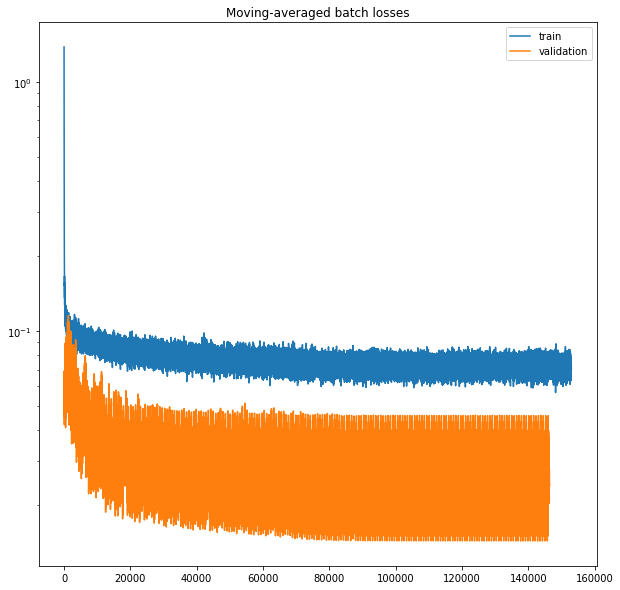

In [20]:
plt.figure(figsize=(10, 10))
plt.title('Moving-averaged batch losses')
plt.plot(np.arange(len(train_losses)), moving_average(train_losses), label='train')
plt.plot(np.arange(len(val_losses)), moving_average(val_losses), label='validation')

plt.yscale('log')
plt.legend(loc='best')

# plt.ylim([1e-2, 1])
plt.show()

In [22]:
mean_train_loss = [np.mean(item) for item in results['train_losses']]
mean_val_loss = [np.mean(item) for item in results['val_losses']]

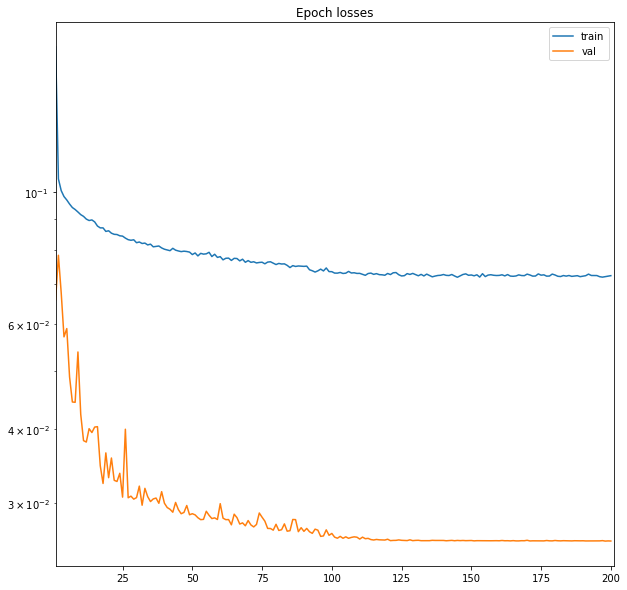

In [23]:
plt.figure(figsize=(10, 10))
plt.title('Epoch losses')
plt.plot(np.arange(len(mean_train_loss)) + 1, mean_train_loss, label='train')
plt.plot(np.arange(len(mean_val_loss)) + 1, mean_val_loss, label='val')

plt.yscale('log')
plt.legend(loc='best')

plt.xlim([1, len(mean_train_loss) + 1])
plt.show()

## Predicted samples

In [15]:
import os

In [16]:
import torch

In [18]:
from visualization_utils import output_to_binary, plot_sample, make_colored_diff

In [19]:
threshold = 0.5
to_plot = 10
device = model_conf['device']

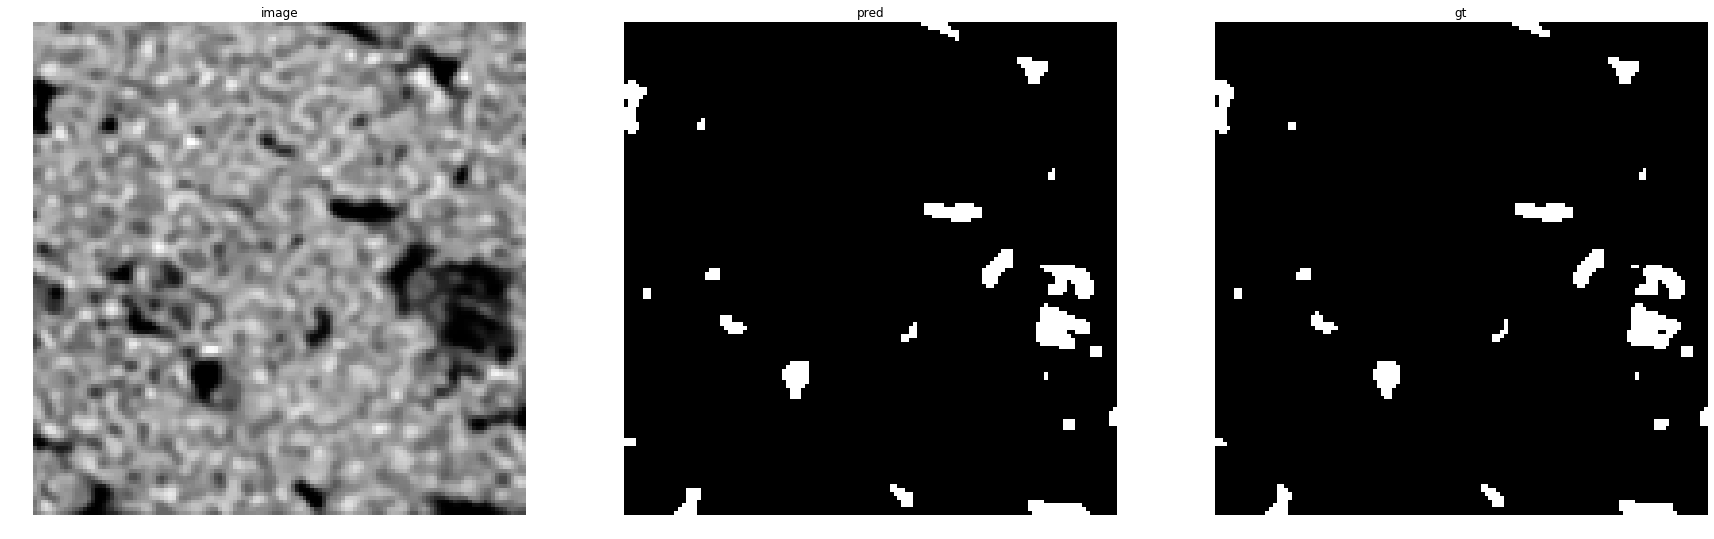

accuracy    : 0.9969482421875
precision   : 0.9488372093023256
recall      : 0.972972972972973
f1          : 0.9607535321821037
pr_auc      : 0.9952184362530159
iou         : 0.9244712990936556


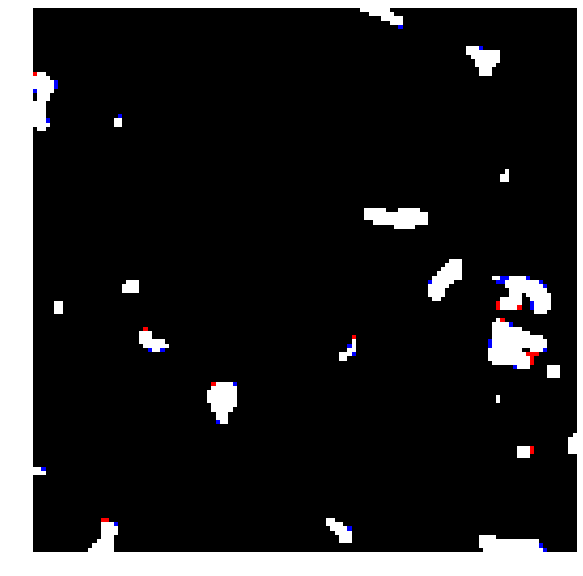

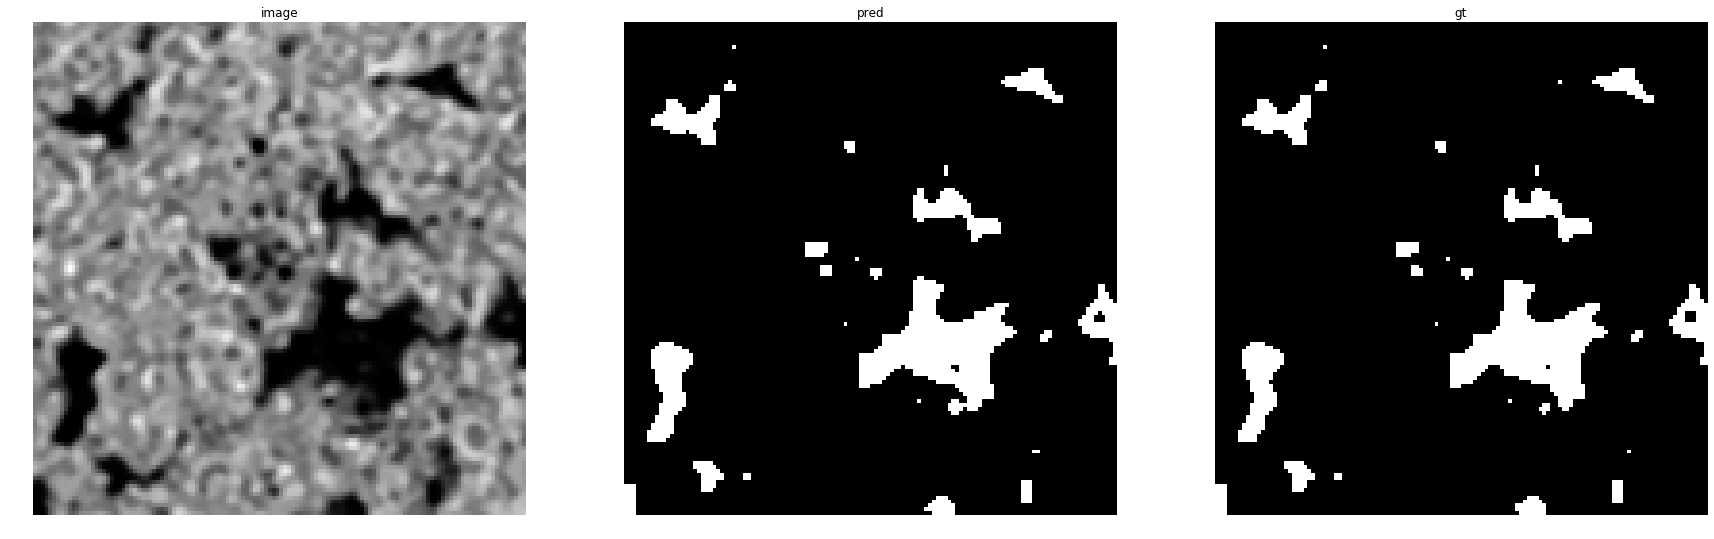

accuracy    : 0.99725341796875
precision   : 0.9769874476987448
recall      : 0.9915074309978769
f1          : 0.9841938883034773
pr_auc      : 0.9988166363721144
iou         : 0.9688796680497925


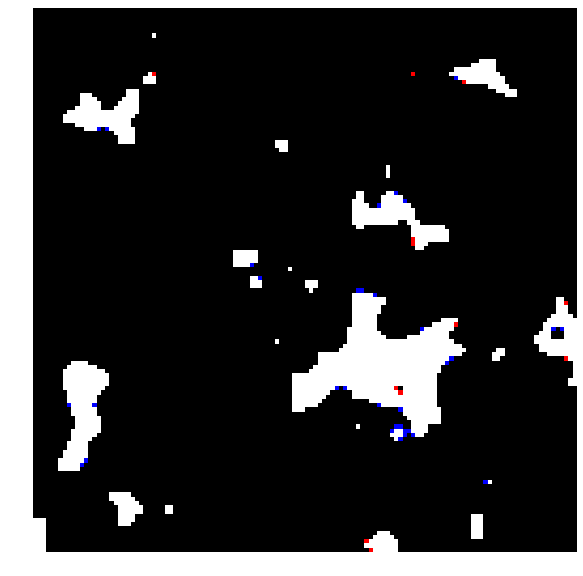

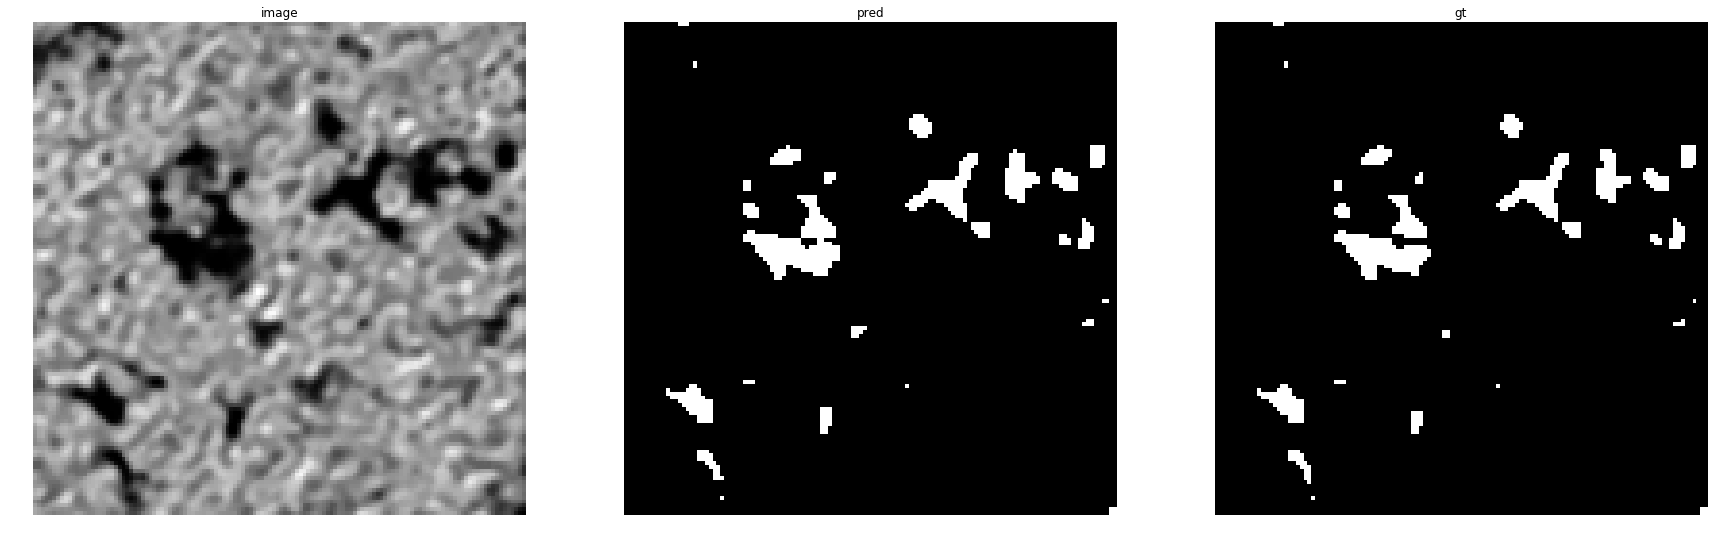

accuracy    : 0.99688720703125
precision   : 0.9414114513981359
recall      : 0.9901960784313726
f1          : 0.9651877133105803
pr_auc      : 0.9966122475833972
iou         : 0.9327176781002638


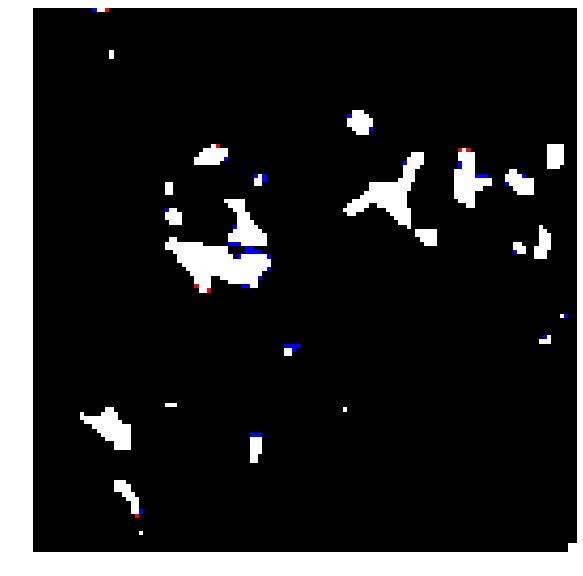

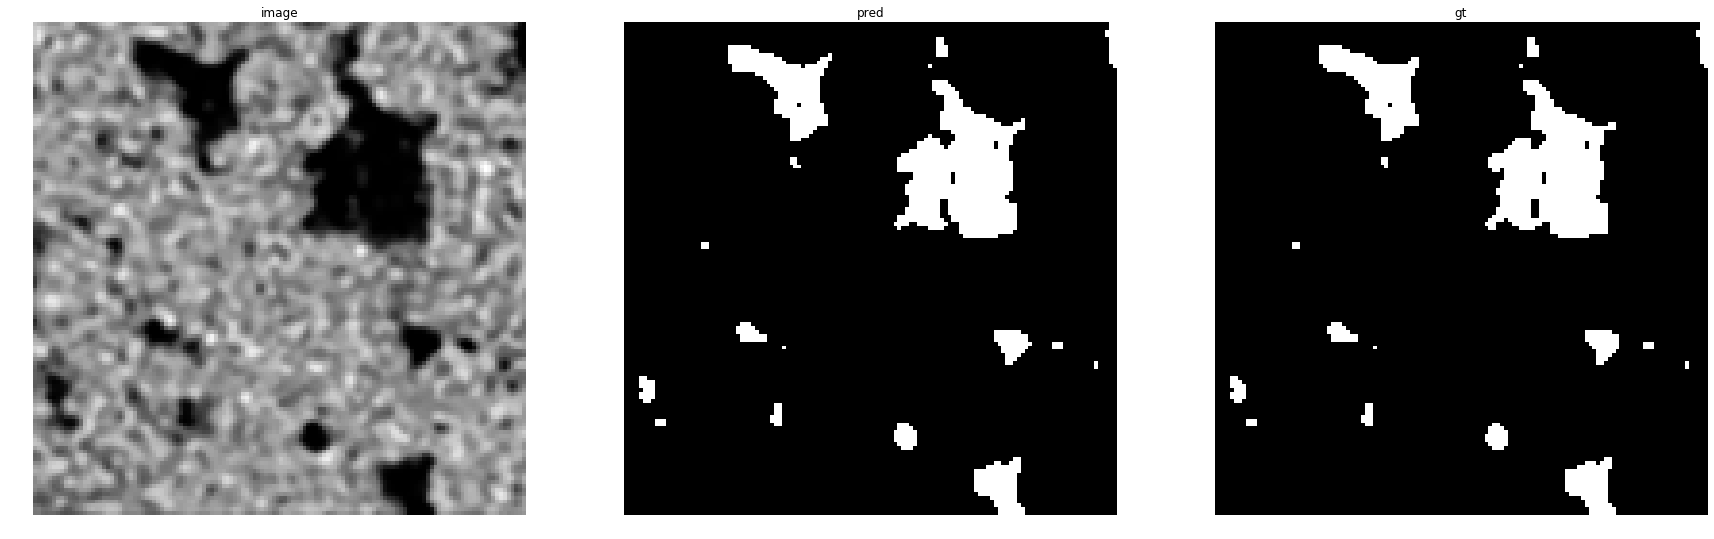

accuracy    : 0.99774169921875
precision   : 0.9800550206327373
recall      : 0.994417306350314
f1          : 0.9871839279528922
pr_auc      : 0.999236391071983
iou         : 0.9746922024623803


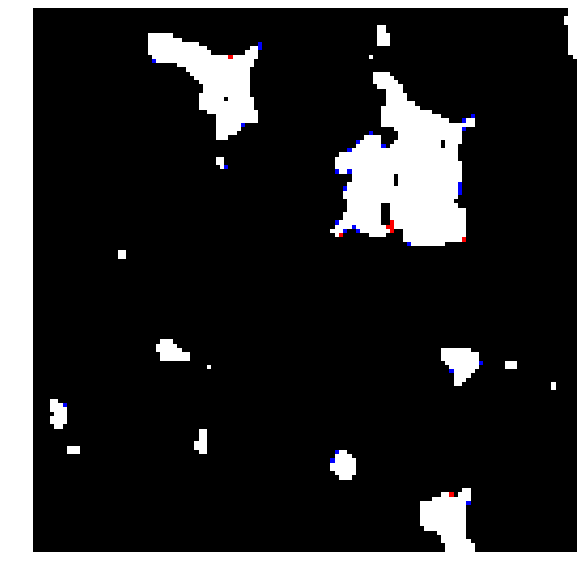

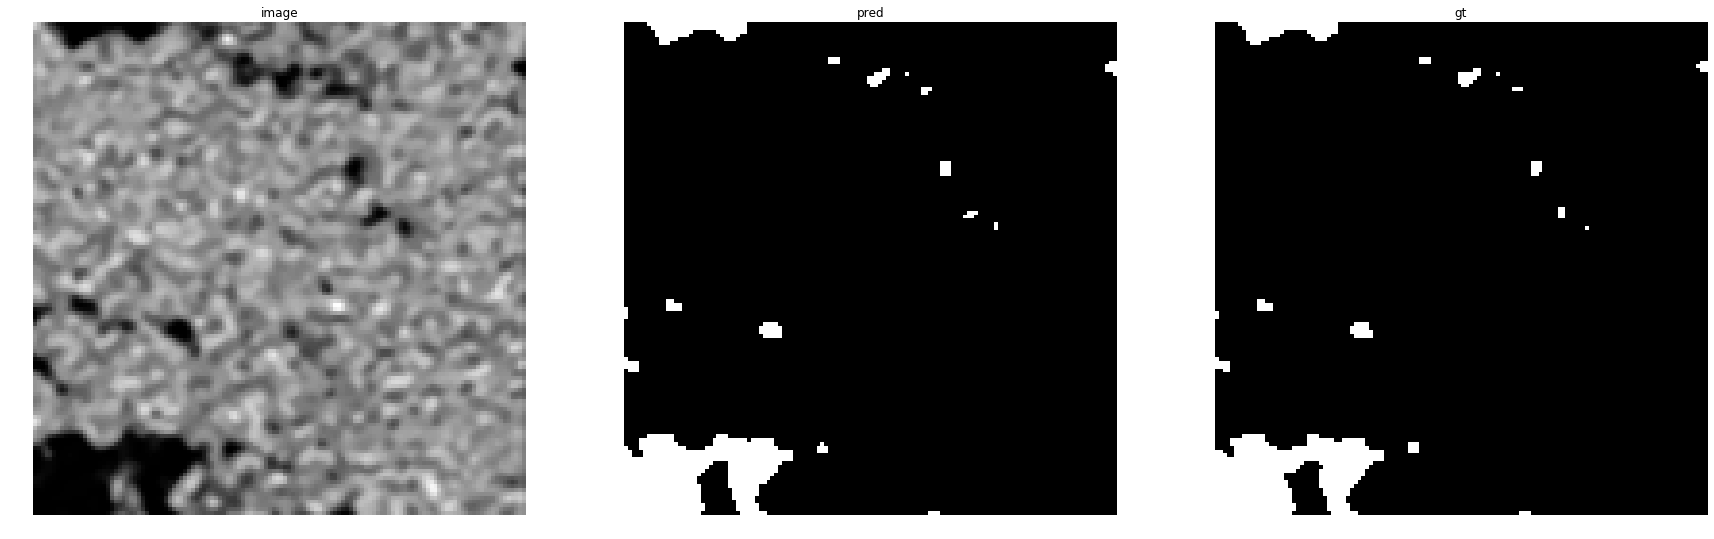

accuracy    : 0.9979248046875
precision   : 0.9713261648745519
recall      : 0.9878493317132442
f1          : 0.9795180722891567
pr_auc      : 0.9989538633894377
iou         : 0.9598583234946871


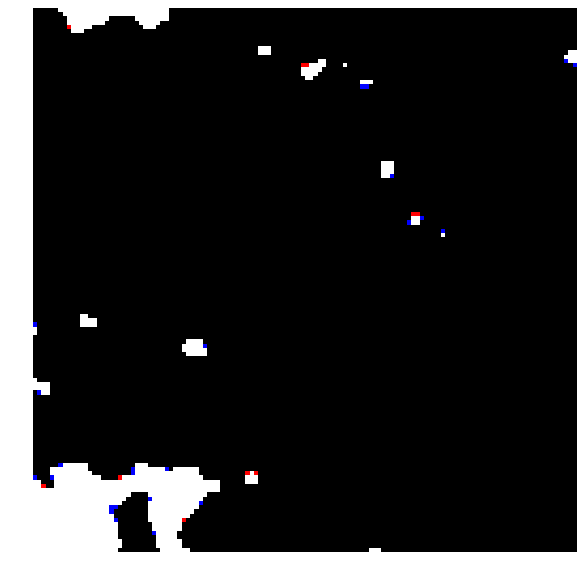

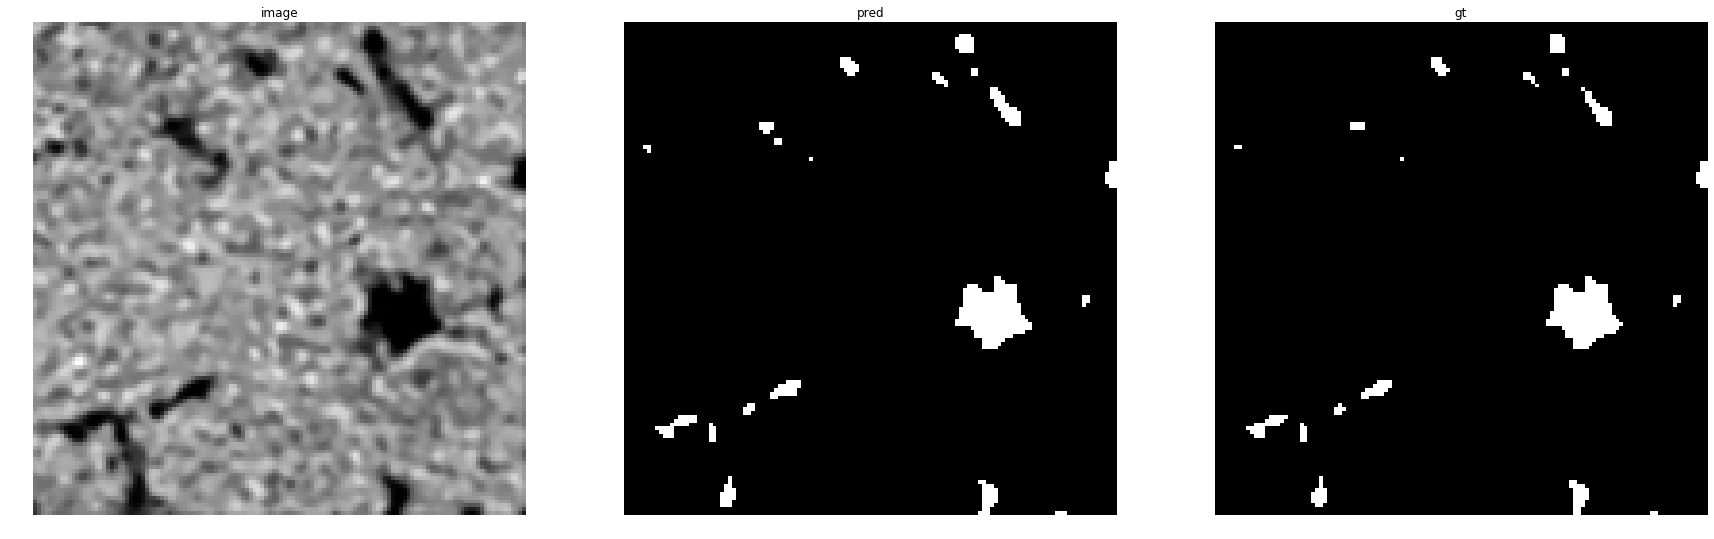

accuracy    : 0.997802734375
precision   : 0.9329140461215933
recall      : 0.9910913140311804
f1          : 0.961123110151188
pr_auc      : 0.9969703749798775
iou         : 0.9251559251559252


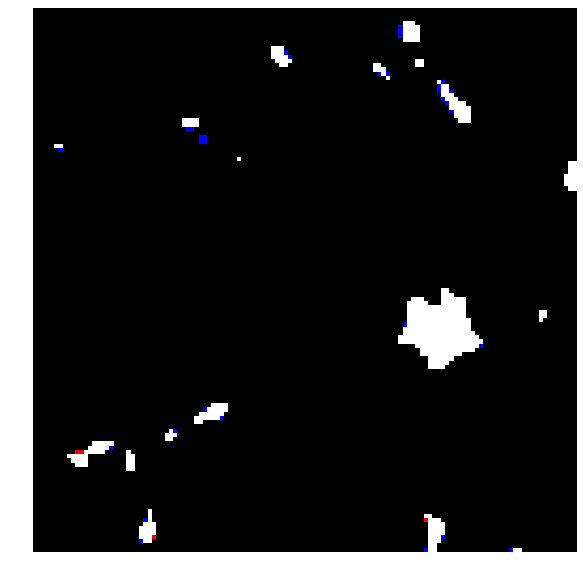

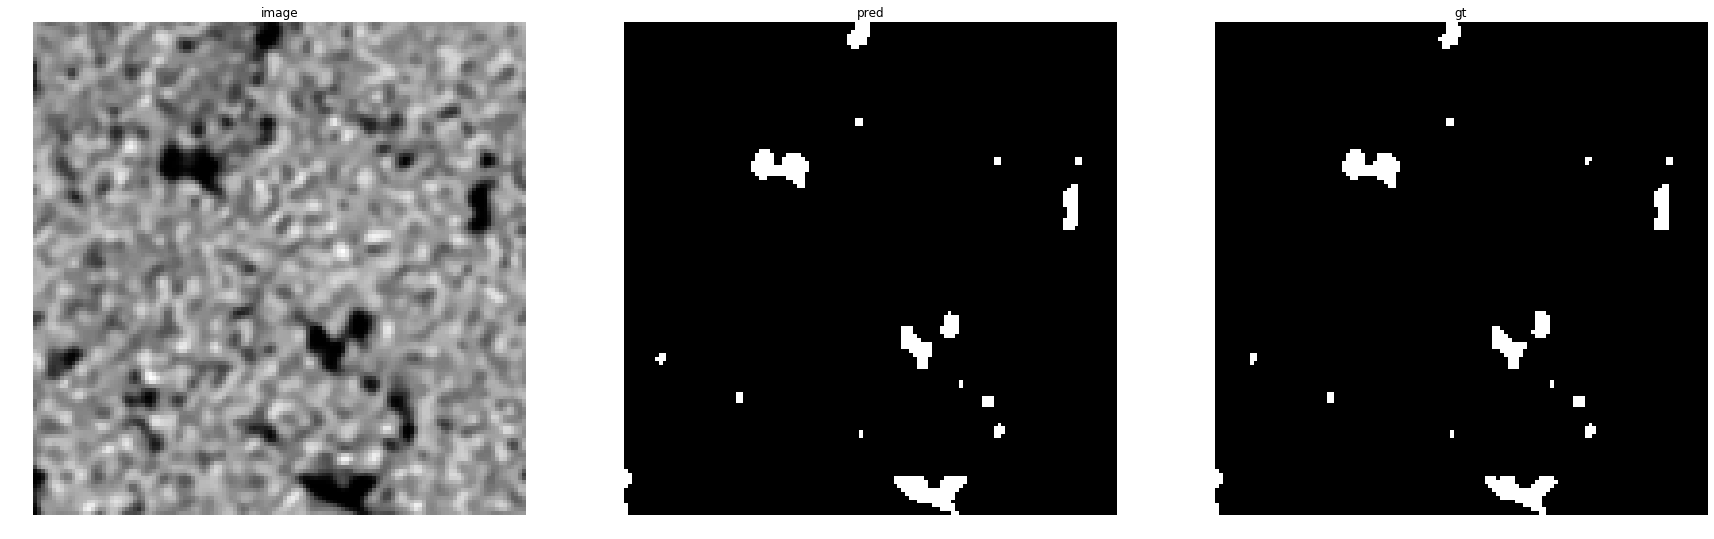

accuracy    : 0.99847412109375
precision   : 0.9527363184079602
recall      : 0.9845758354755784
f1          : 0.9683944374209861
pr_auc      : 0.9965361562303456
iou         : 0.9387254901960784


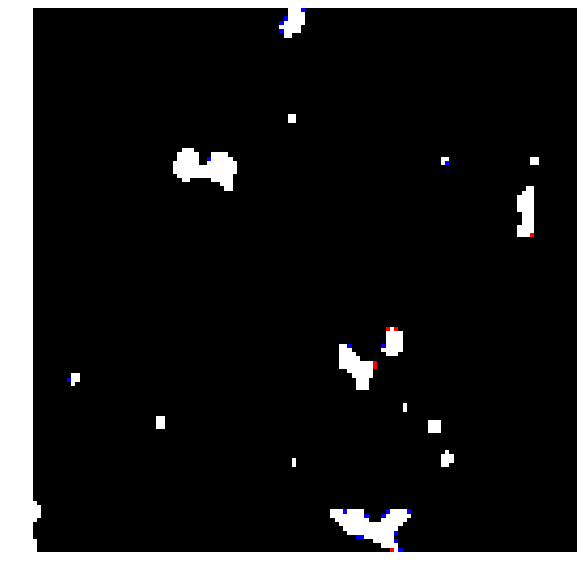

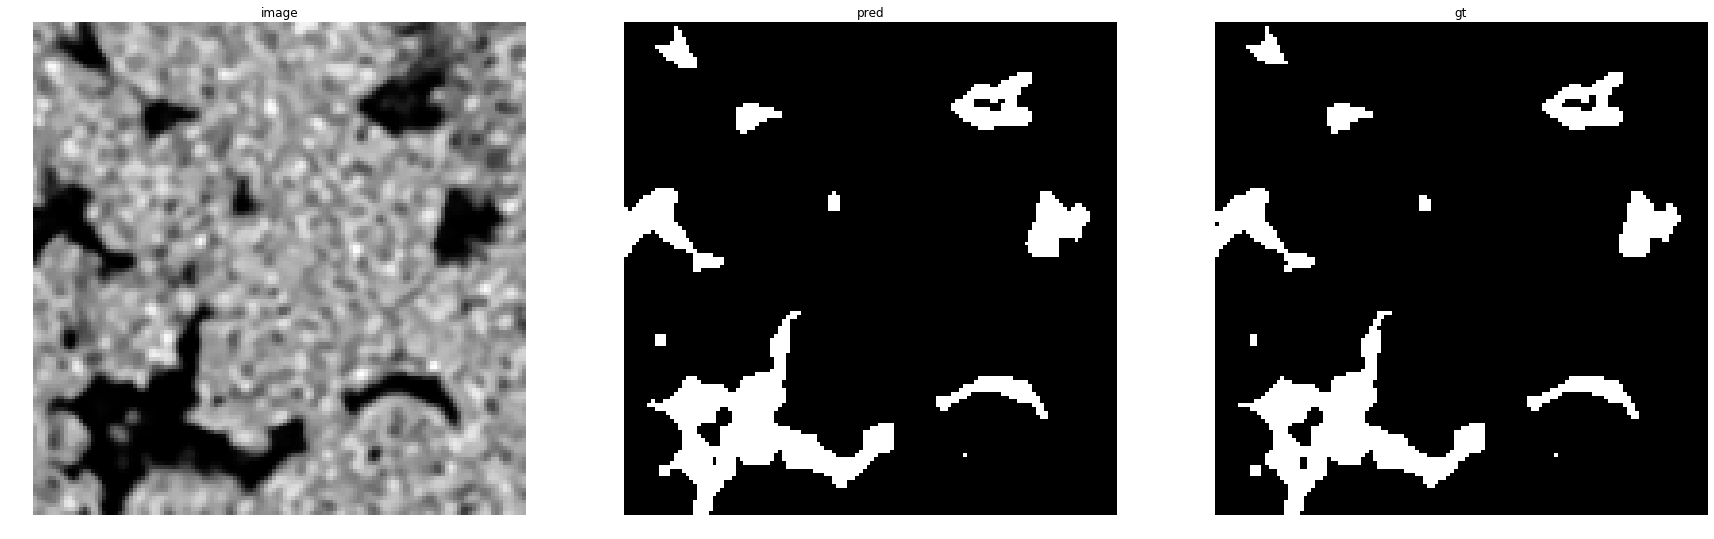

accuracy    : 0.9959716796875
precision   : 0.9654403567447045
recall      : 0.9976958525345622
f1          : 0.9813031161473087
pr_auc      : 0.9991657044459333
iou         : 0.9632925472747497


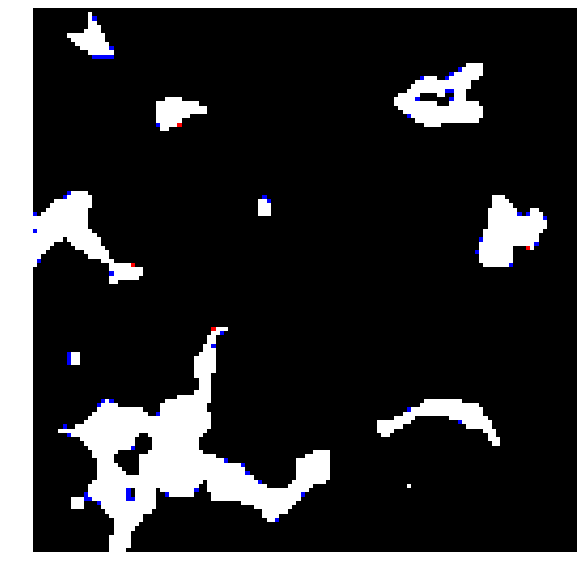

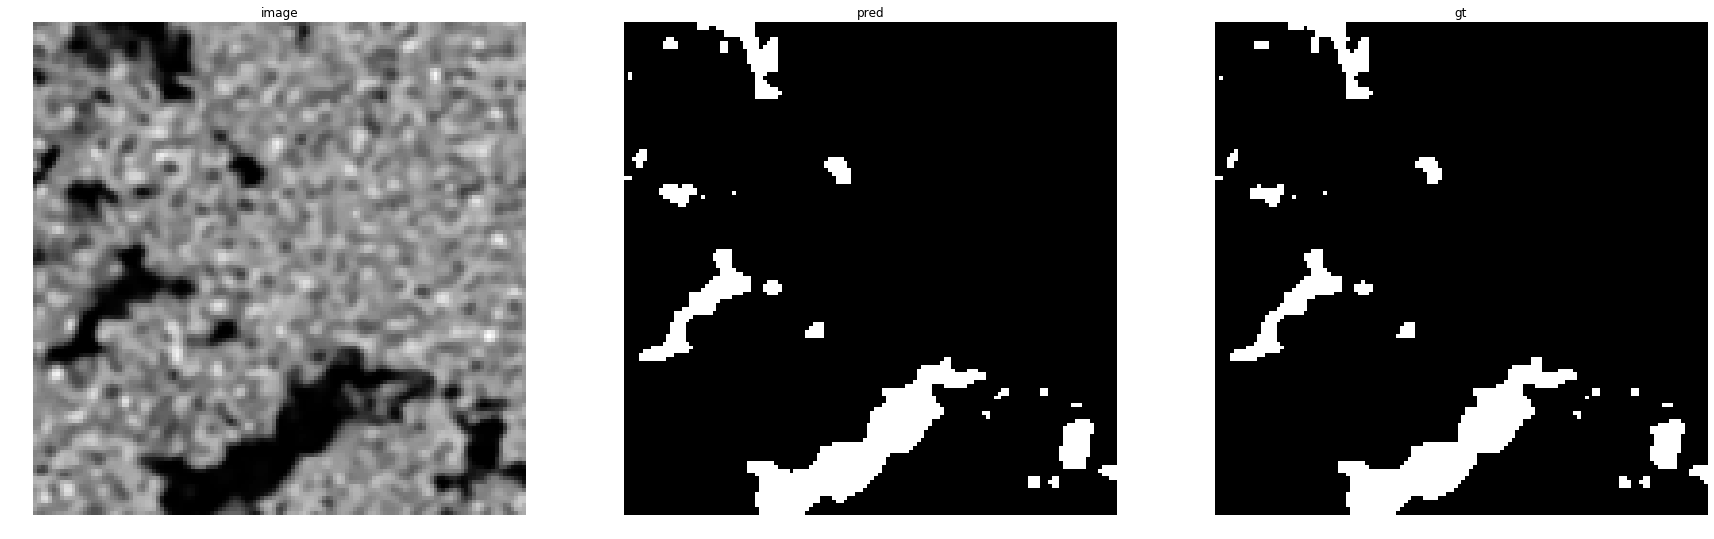

accuracy    : 0.99615478515625
precision   : 0.9633620689655172
recall      : 0.991130820399113
f1          : 0.9770491803278688
pr_auc      : 0.9982991023228593
iou         : 0.9551282051282052


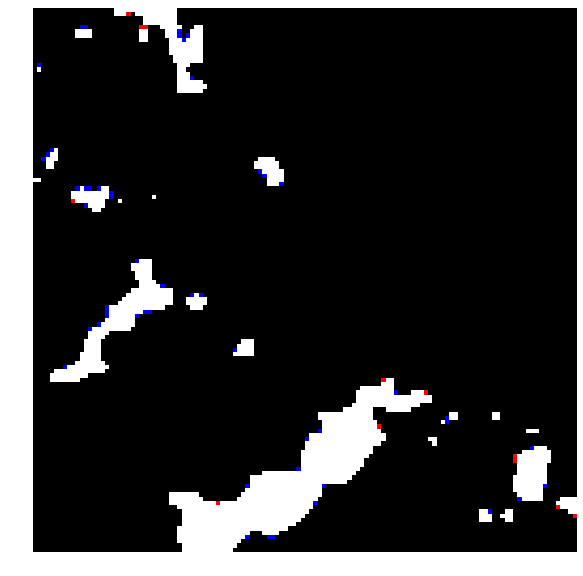

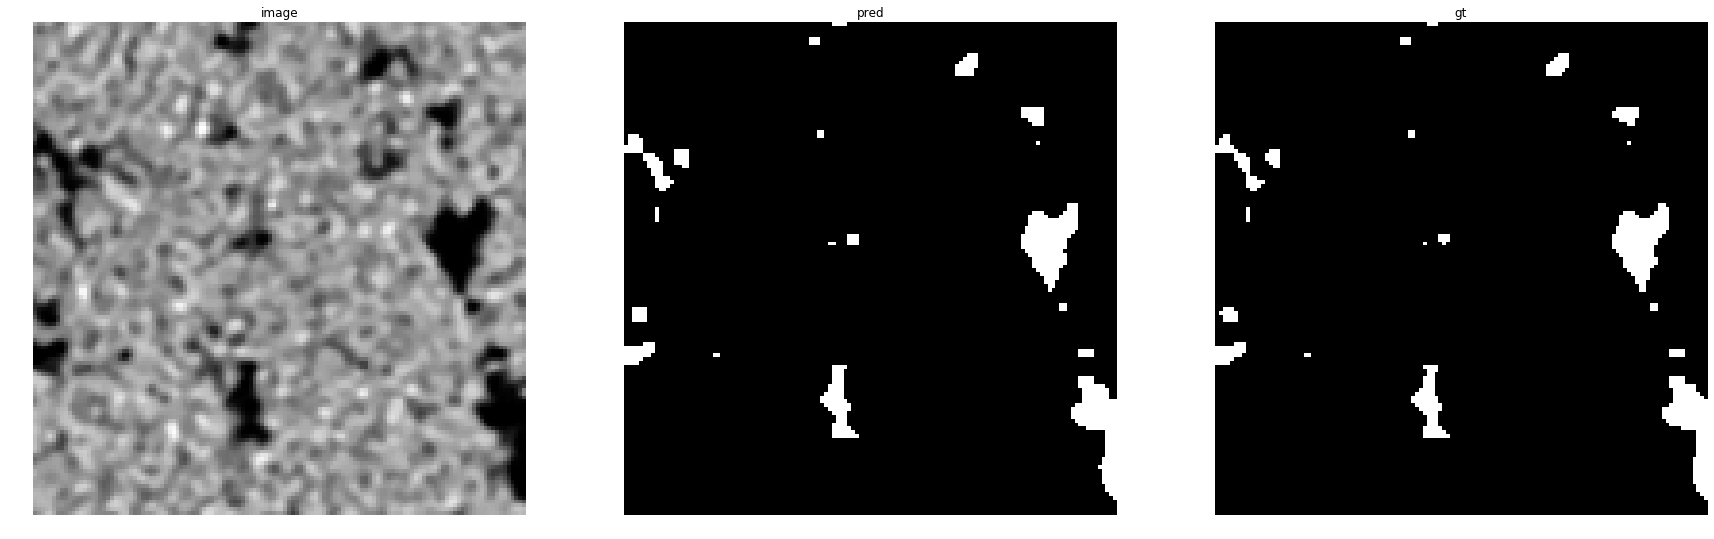

accuracy    : 0.99761962890625
precision   : 0.9560117302052786
recall      : 0.9863842662632375
f1          : 0.9709605361131796
pr_auc      : 0.9975006675401408
iou         : 0.9435600578871202


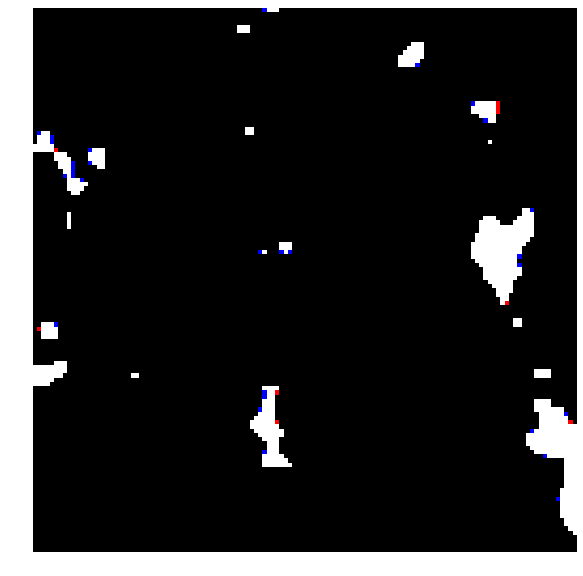

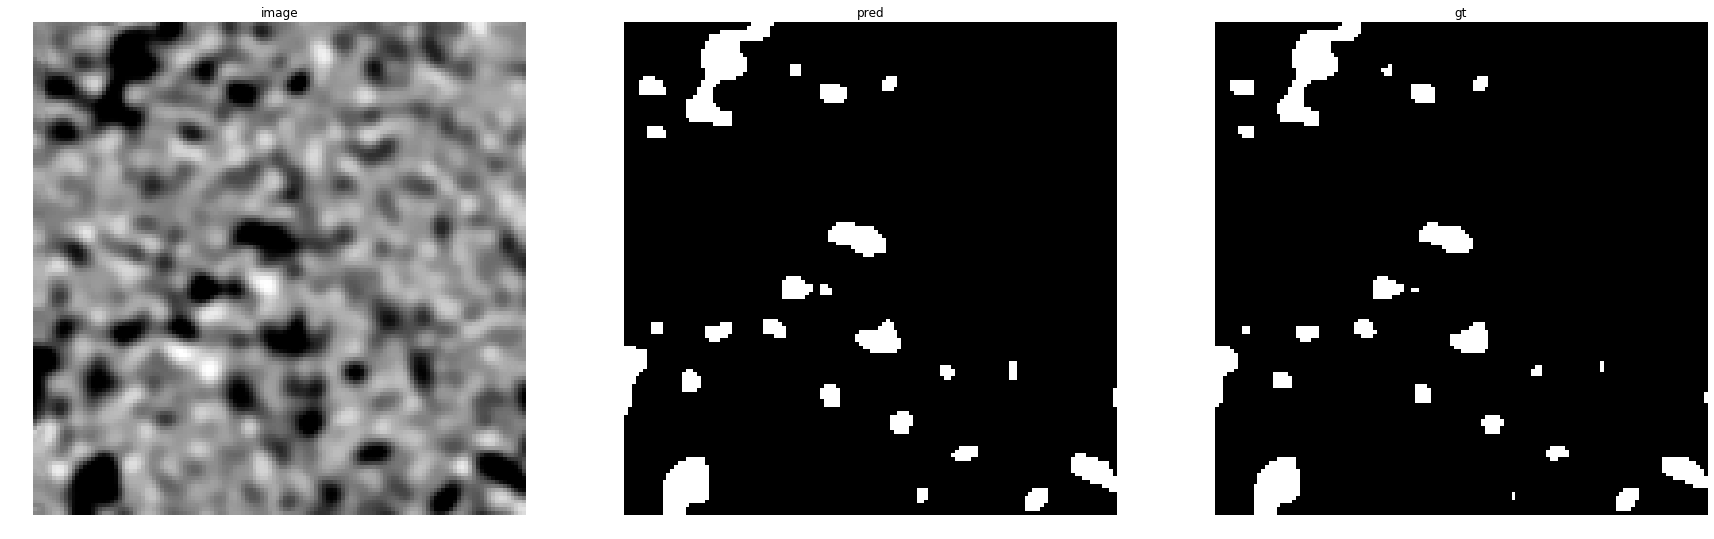

accuracy    : 0.99163818359375
precision   : 0.8733459357277883
recall      : 0.9967637540453075
f1          : 0.9309823677581864
pr_auc      : 0.9923318531605005
iou         : 0.8708765315739868


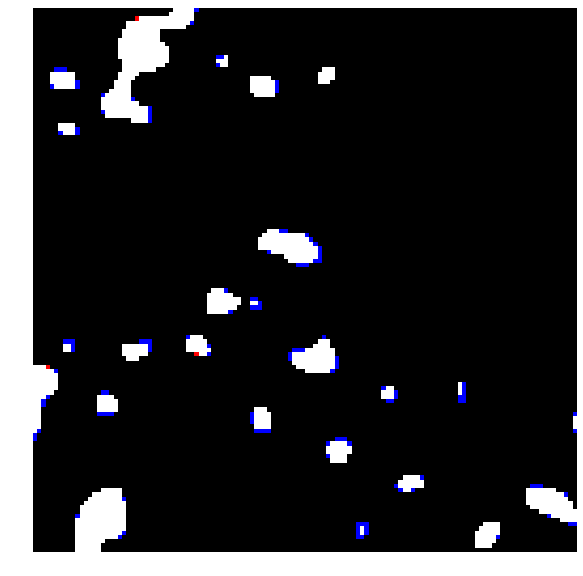

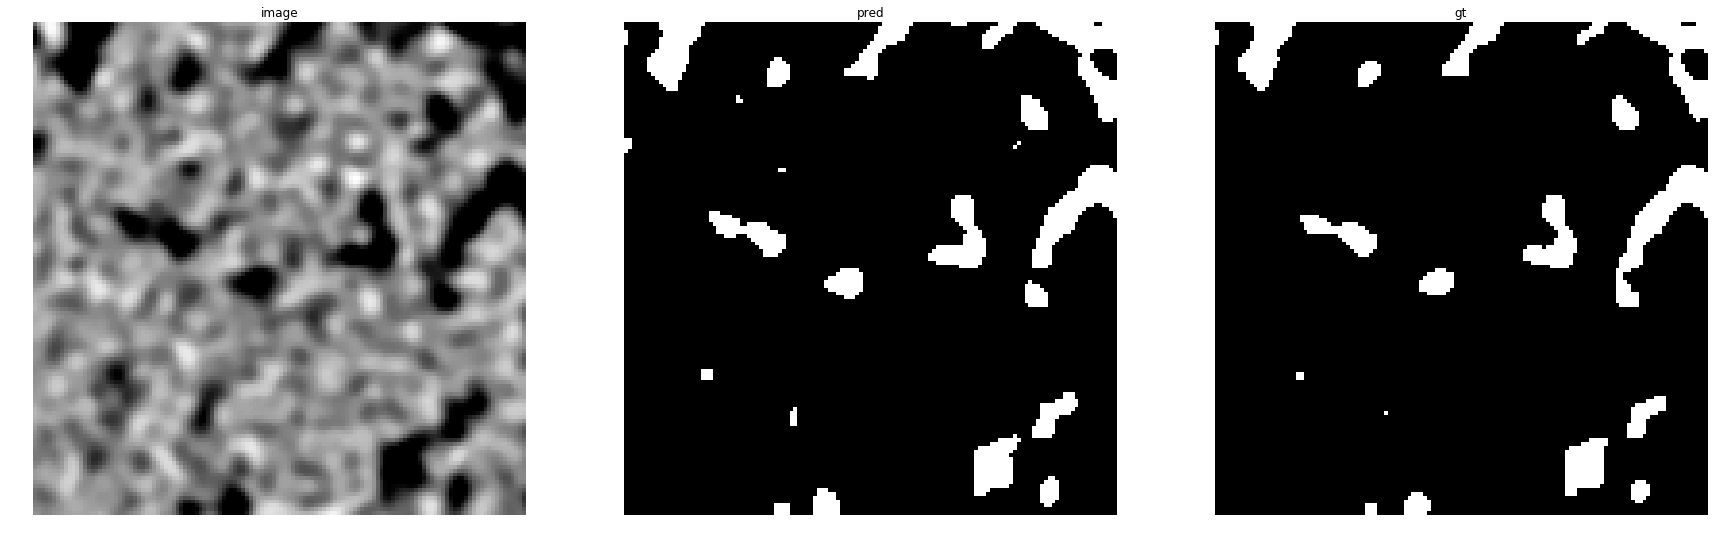

accuracy    : 0.990234375
precision   : 0.9046979865771813
recall      : 0.986822840409956
f1          : 0.9439775910364145
pr_auc      : 0.9934081024312951
iou         : 0.8938992042440318


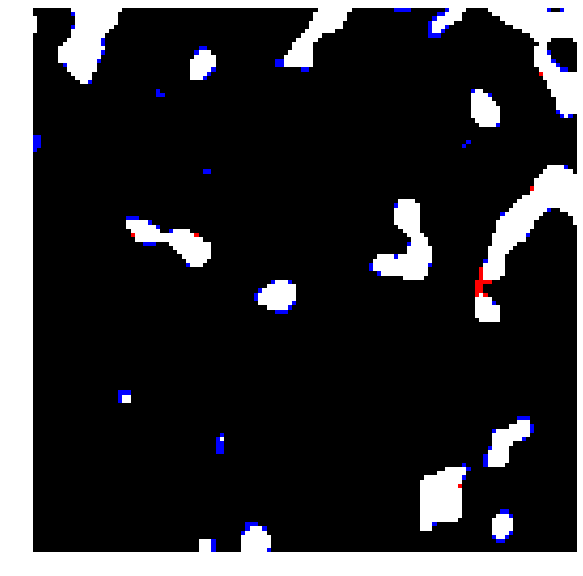

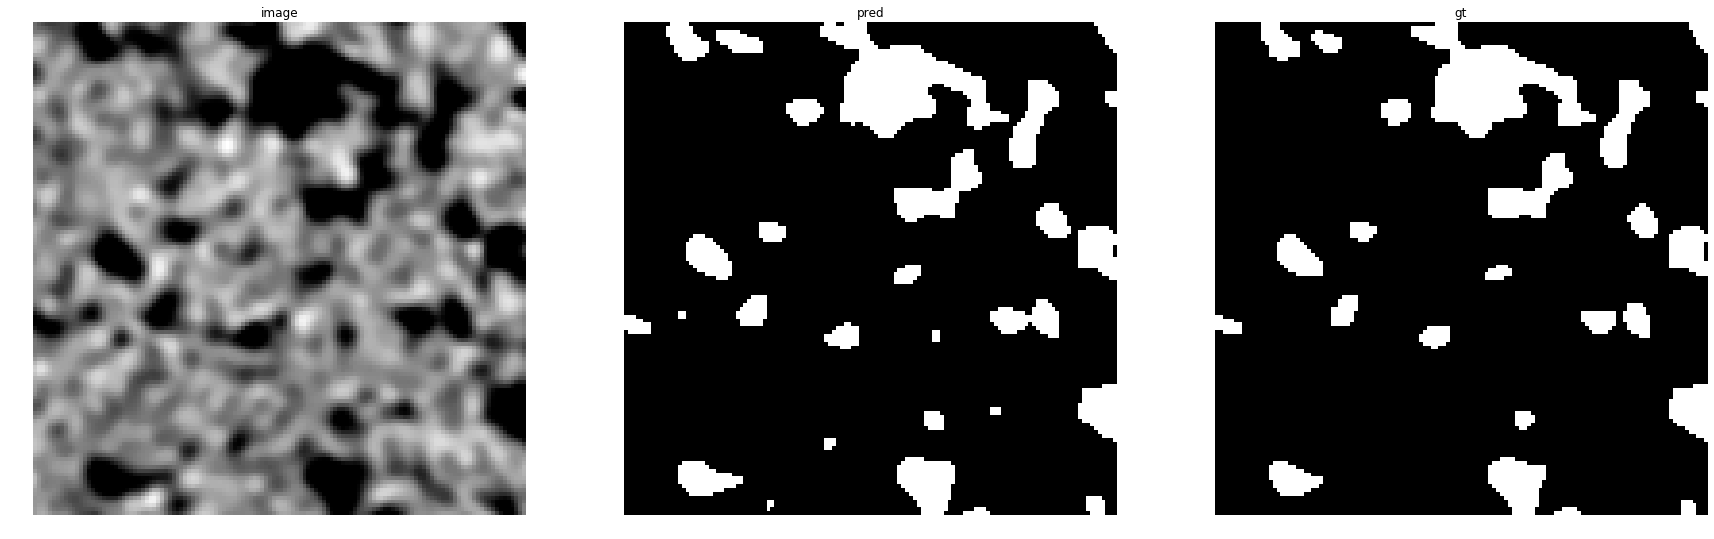

accuracy    : 0.986328125
precision   : 0.9045936395759717
recall      : 0.9961089494163424
f1          : 0.9481481481481482
pr_auc      : 0.9950765151832192
iou         : 0.9014084507042254


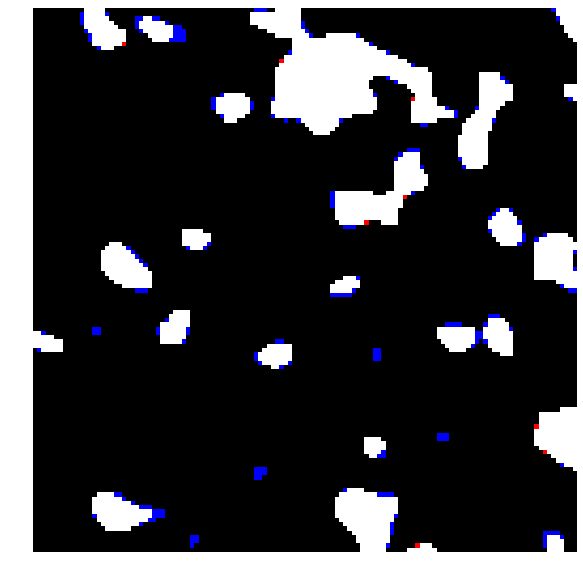

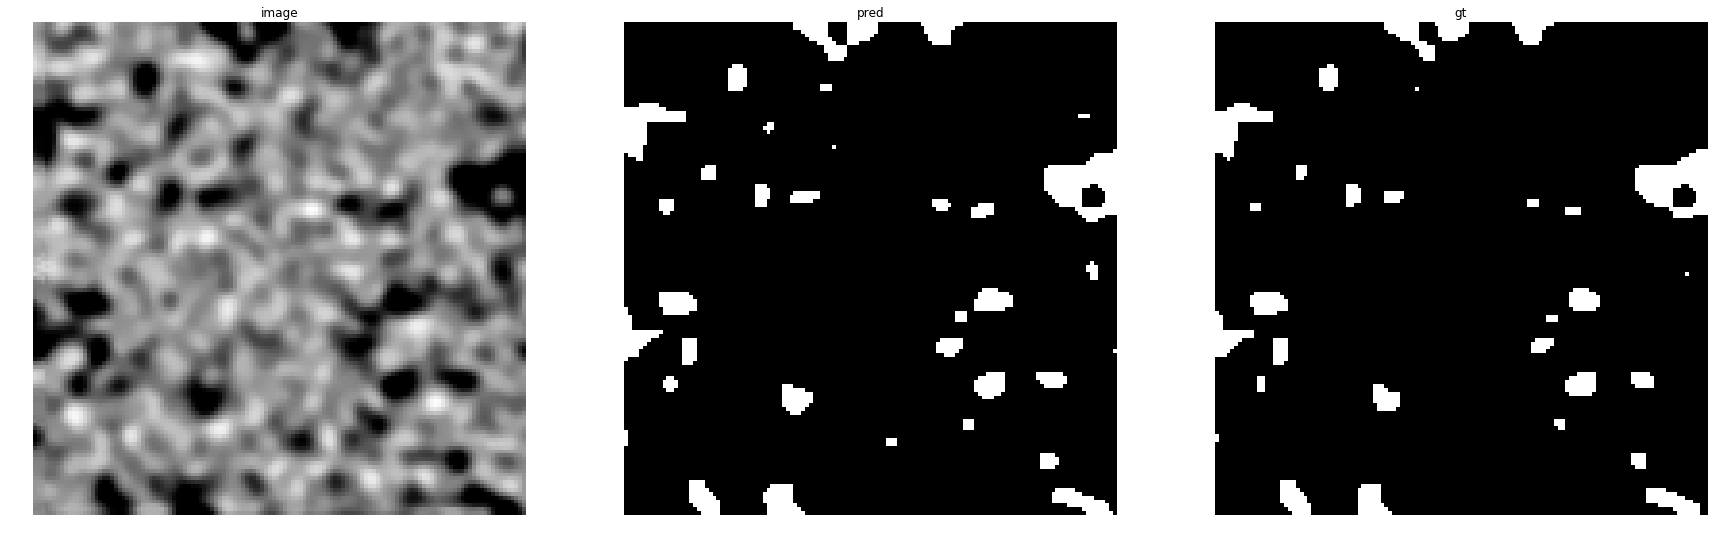

accuracy    : 0.98907470703125
precision   : 0.8585526315789473
recall      : 0.9933396764985728
f1          : 0.9210410233789148
pr_auc      : 0.9875273290273893
iou         : 0.8536385936222404


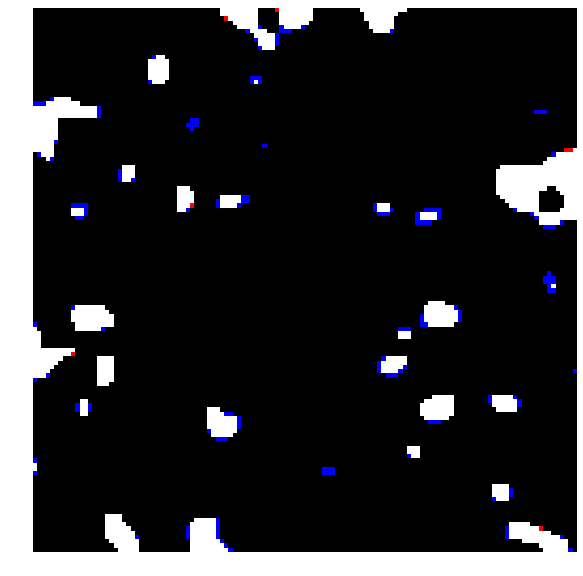

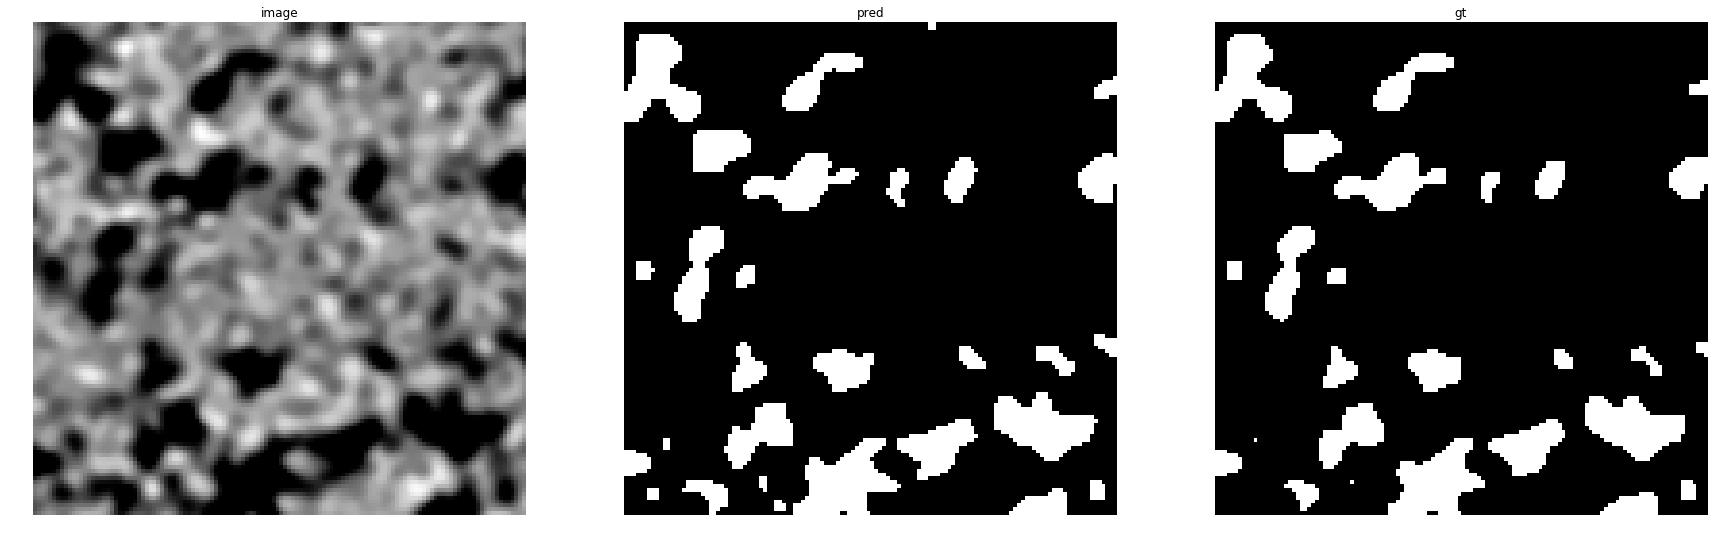

accuracy    : 0.98333740234375
precision   : 0.9028614457831325
recall      : 0.9937836717778699
f1          : 0.9461432235154863
pr_auc      : 0.9941282543894445
iou         : 0.8977910894795956


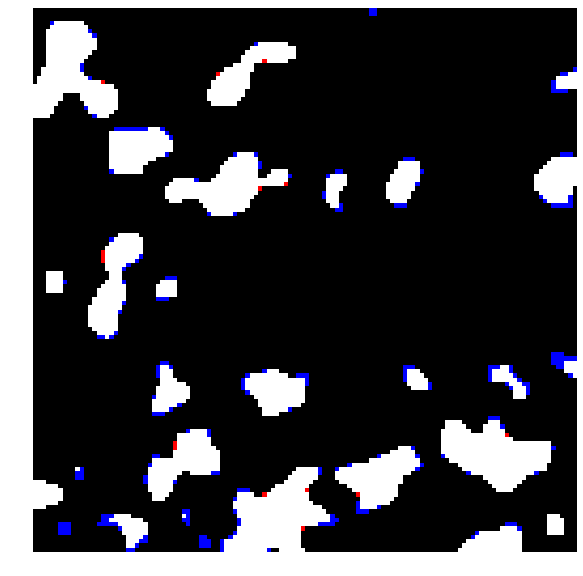

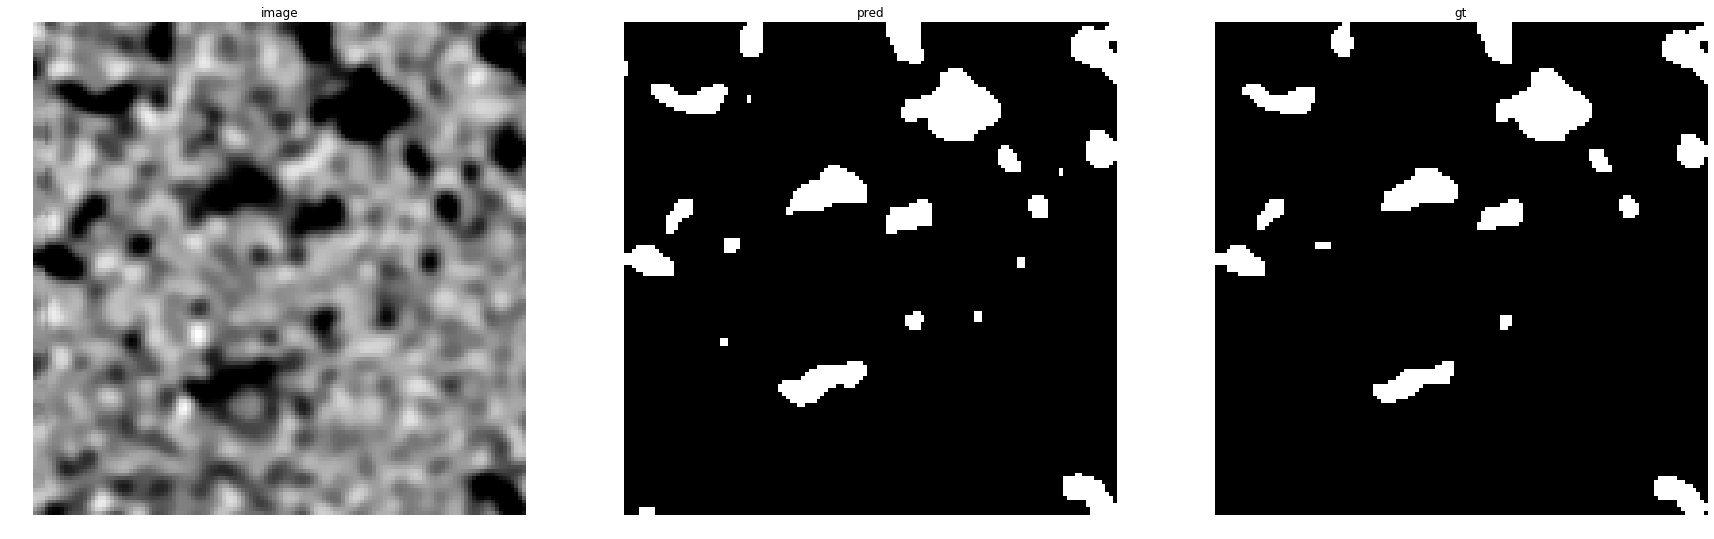

accuracy    : 0.9891357421875
precision   : 0.8770090845562544
recall      : 0.9984089101034208
f1          : 0.9337797619047619
pr_auc      : 0.9950358459226222
iou         : 0.875785066294487


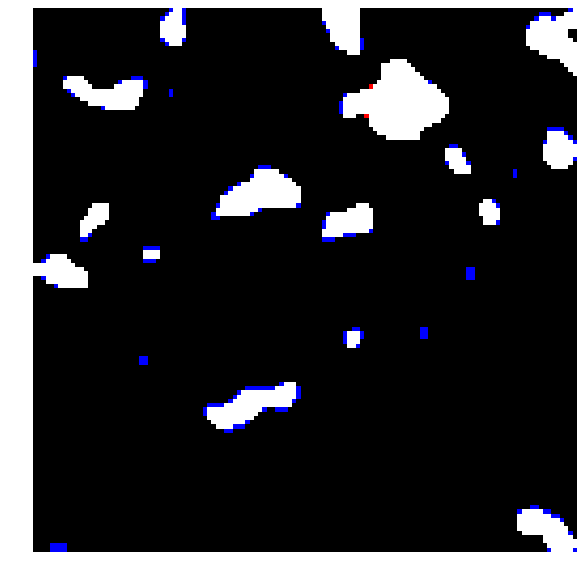

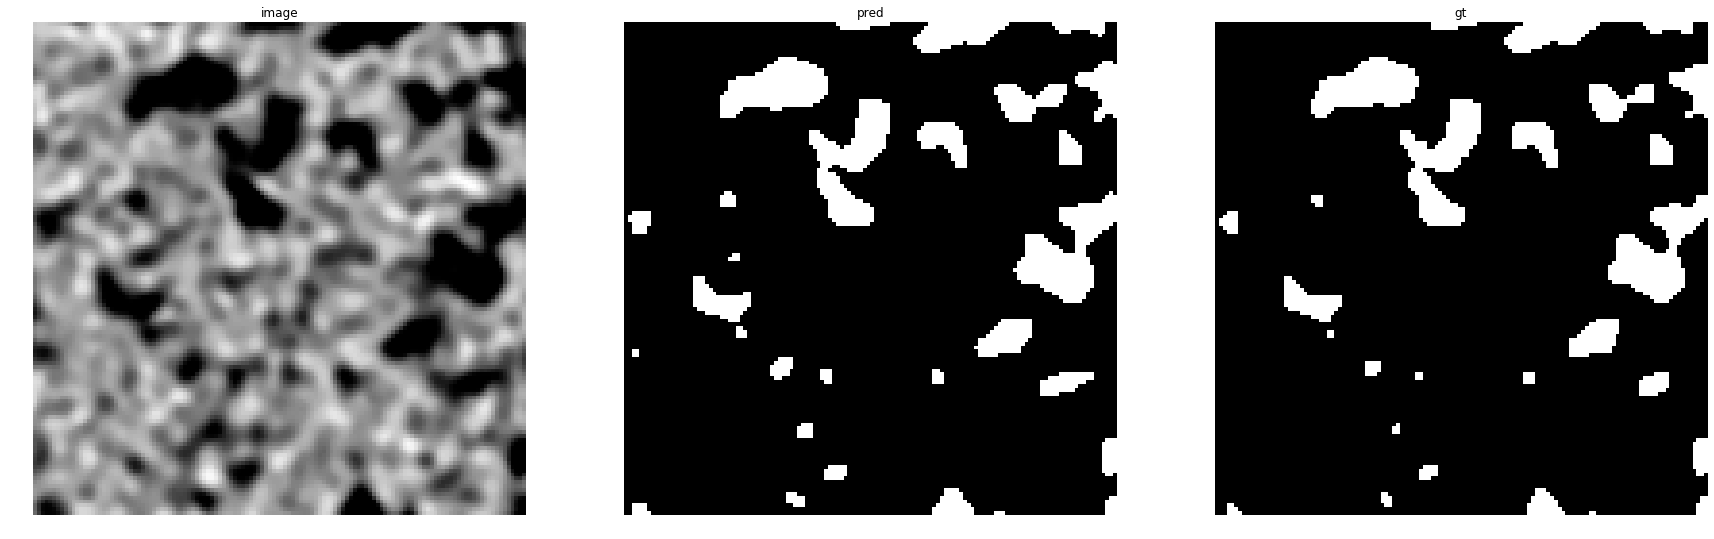

accuracy    : 0.987060546875
precision   : 0.9021215043394407
recall      : 0.9952127659574468
f1          : 0.9463834092058676
pr_auc      : 0.9943408397444385
iou         : 0.8982237157945271


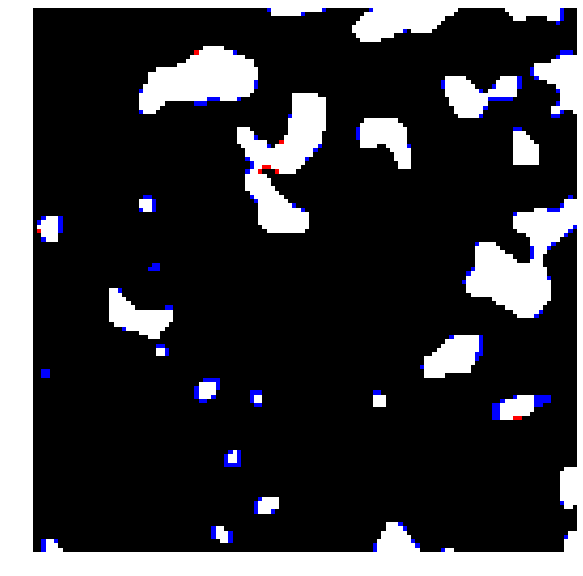

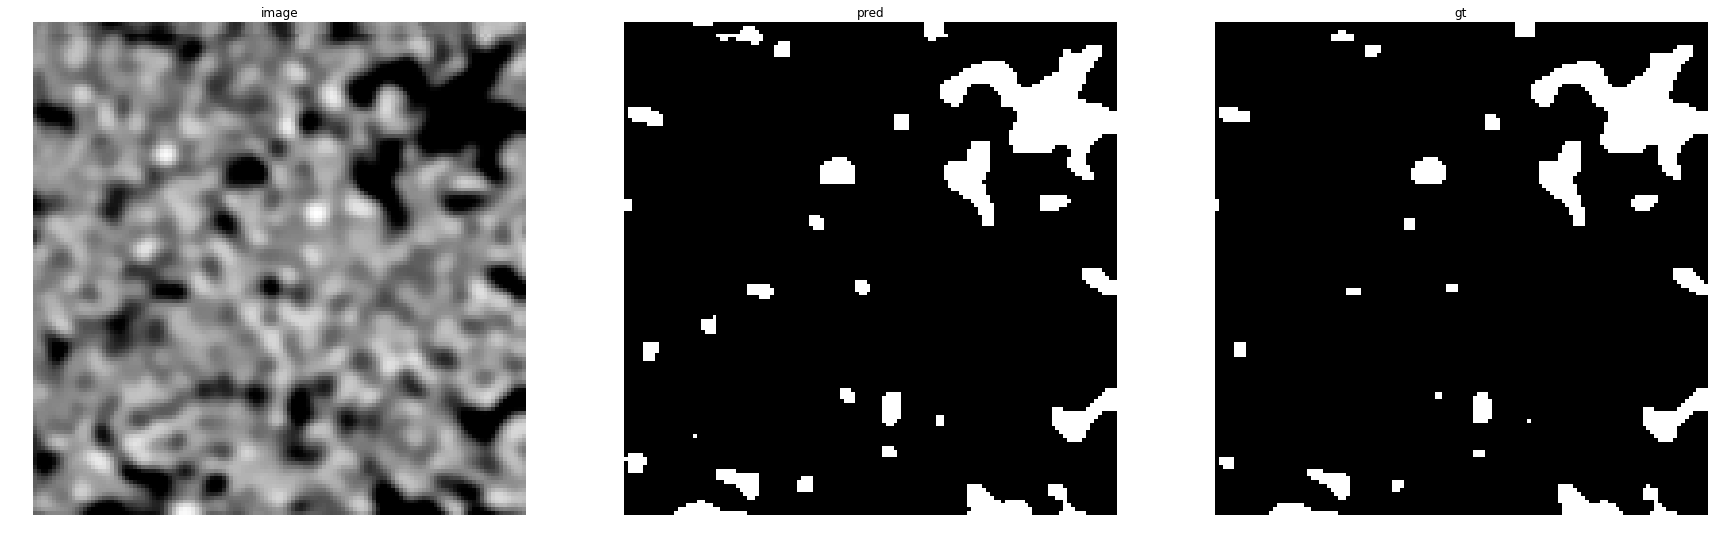

accuracy    : 0.988037109375
precision   : 0.8793650793650793
recall      : 0.99568655643422
f1          : 0.9339177343223196
pr_auc      : 0.9905956000347645
iou         : 0.8760278304870335


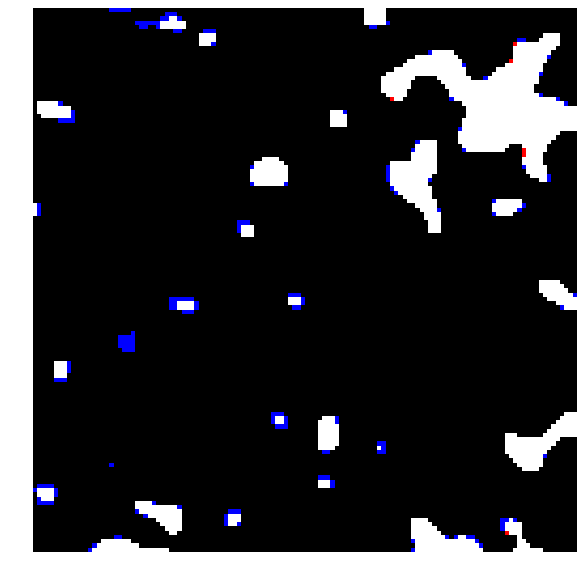

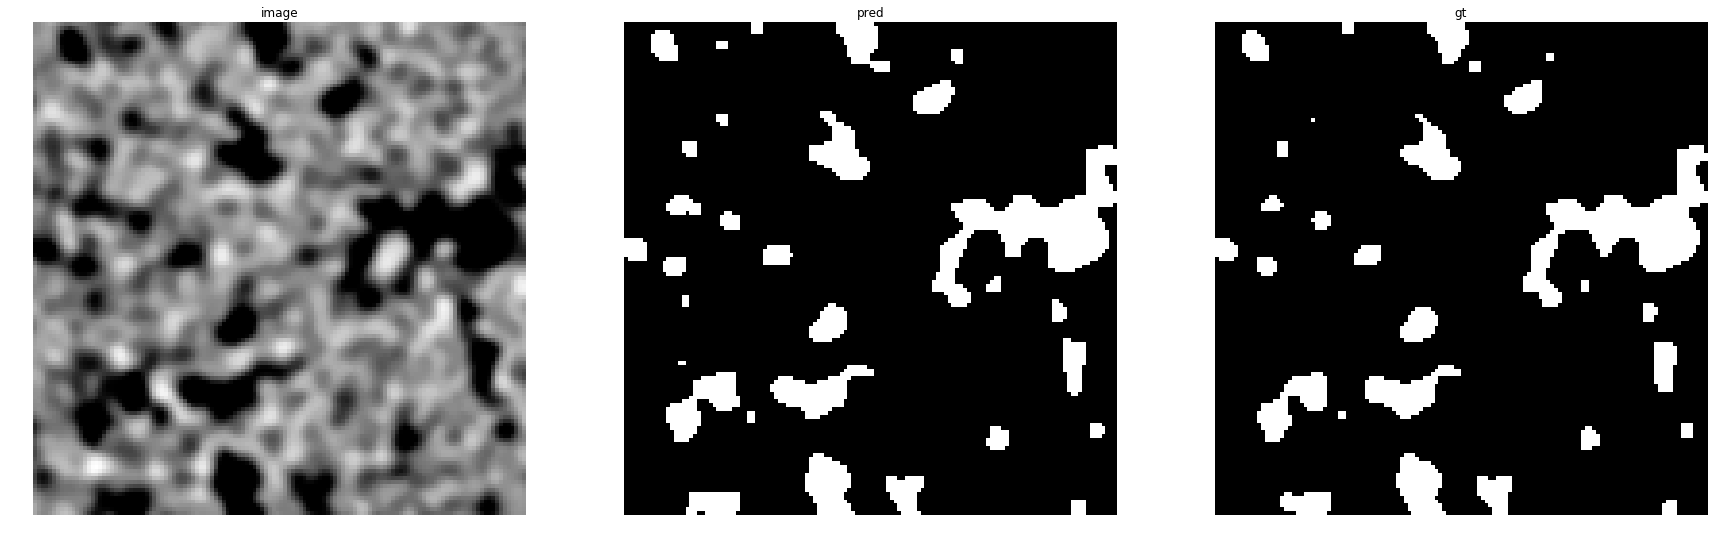

accuracy    : 0.98760986328125
precision   : 0.9109972041006523
recall      : 0.9938993390950687
f1          : 0.9506442985655239
pr_auc      : 0.9949350238647309
iou         : 0.9059314179796107


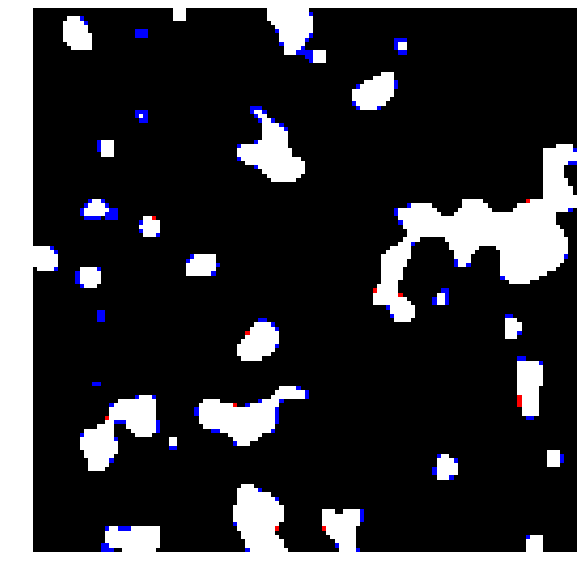

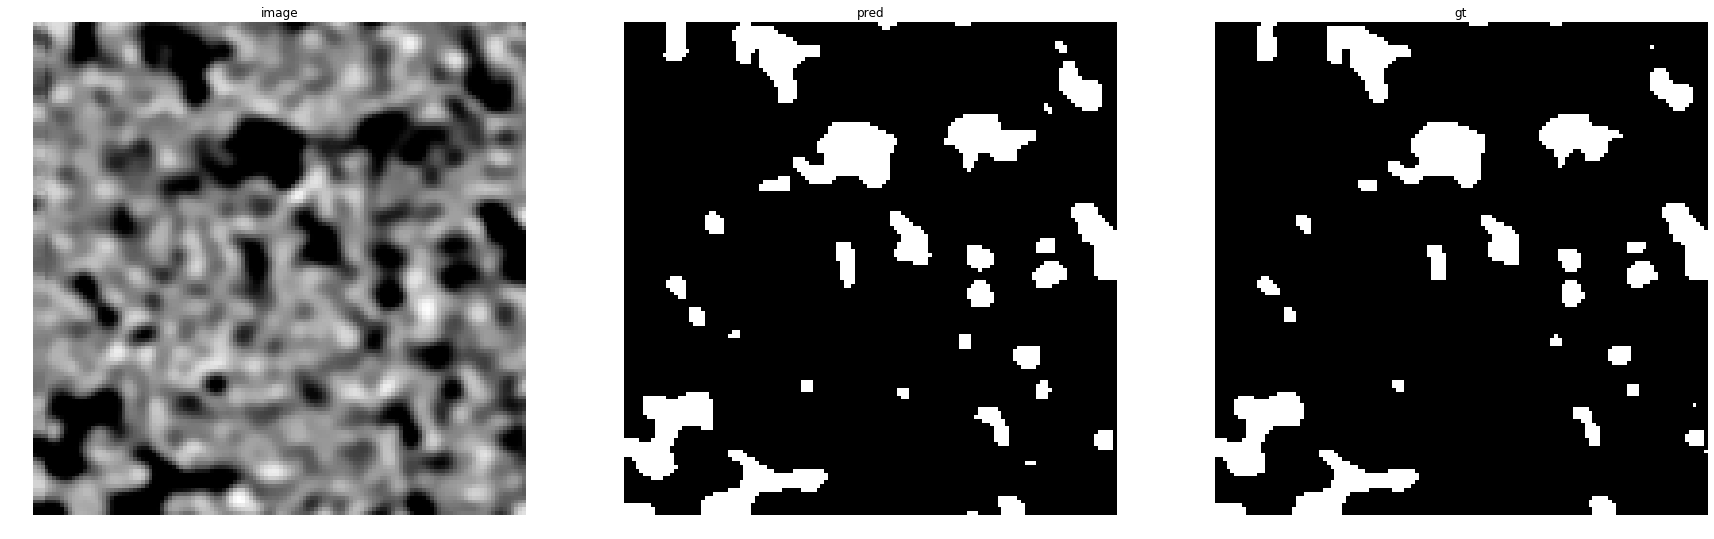

accuracy    : 0.9833984375
precision   : 0.8774834437086093
recall      : 0.9930406852248393
f1          : 0.9316926167754896
pr_auc      : 0.9925887661708084
iou         : 0.8721203573107663


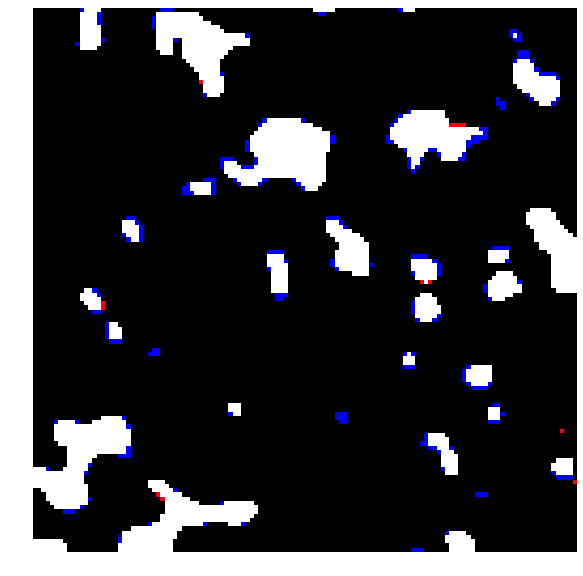

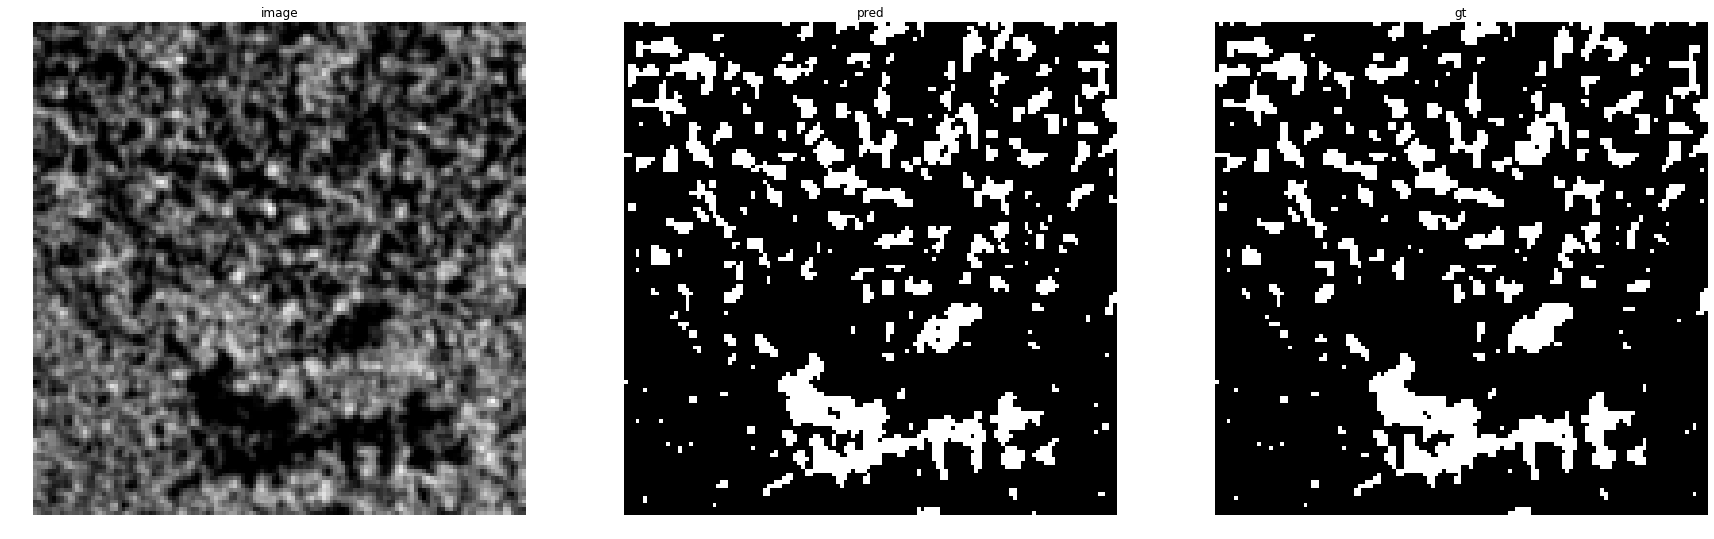

accuracy    : 0.97564697265625
precision   : 0.9366531165311653
recall      : 0.9287873698354048
f1          : 0.9327036599763873
pr_auc      : 0.9858326894453868
iou         : 0.8738938053097345


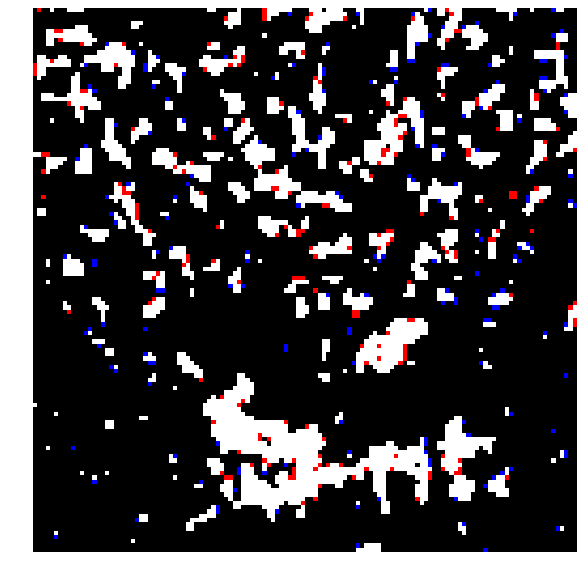

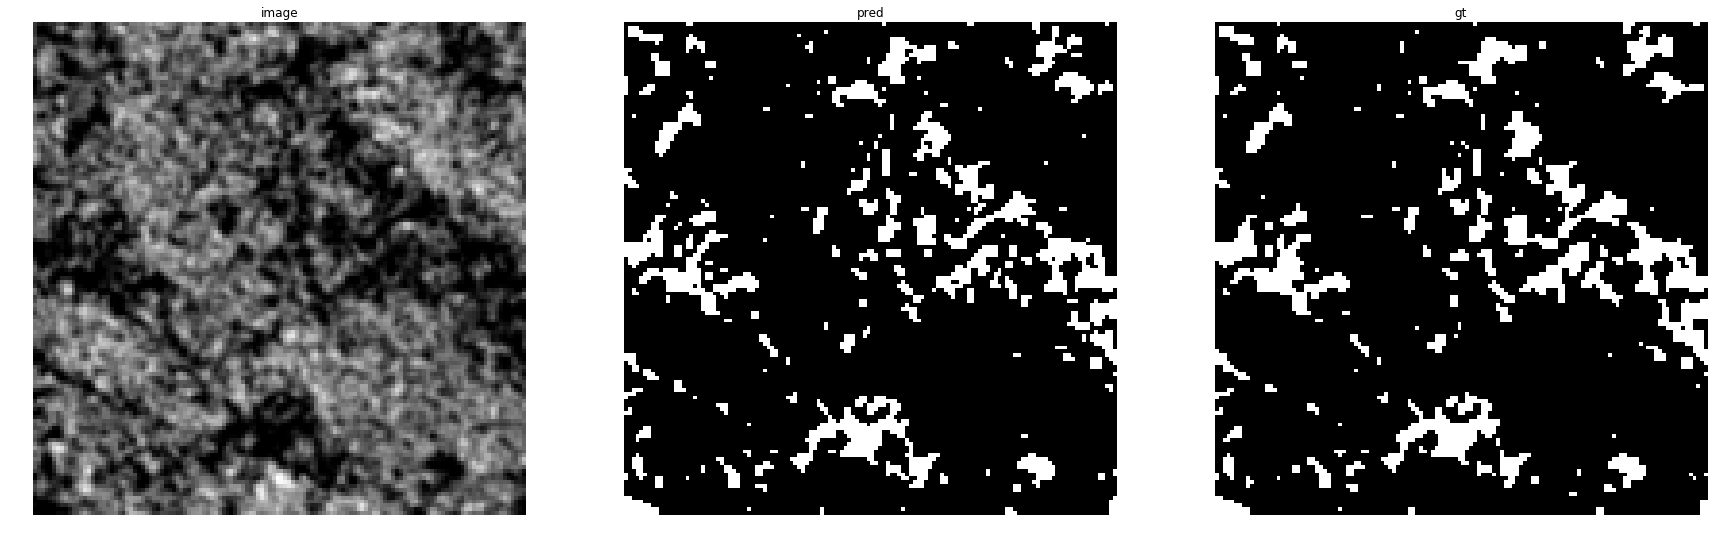

accuracy    : 0.979248046875
precision   : 0.9495683780099955
recall      : 0.901250539025442
f1          : 0.9247787610619469
pr_auc      : 0.9832080371748972
iou         : 0.8600823045267489


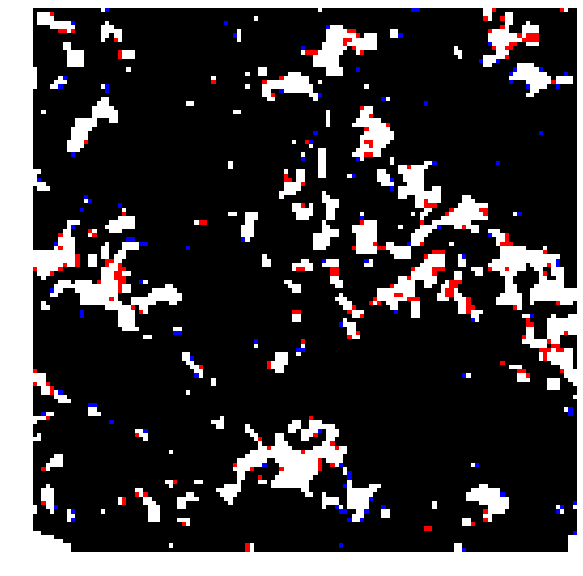

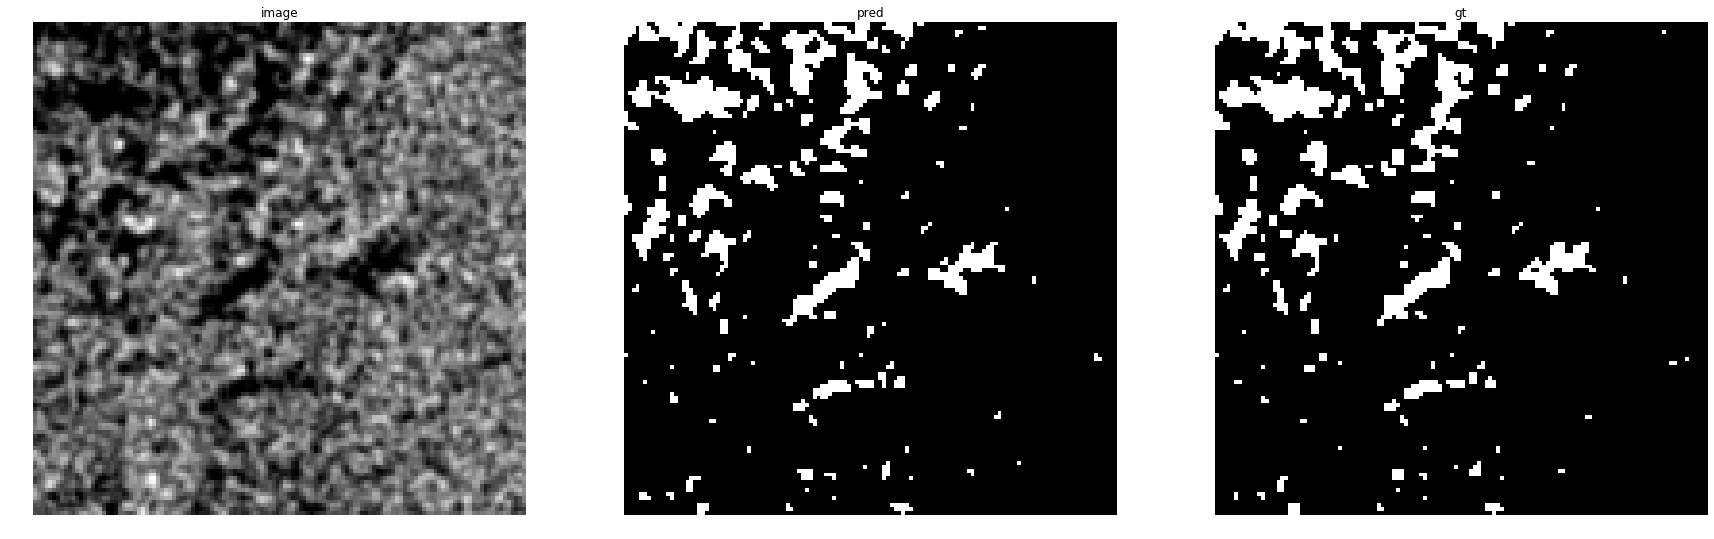

accuracy    : 0.9873046875
precision   : 0.9507299270072993
recall      : 0.9248520710059172
f1          : 0.937612477504499
pr_auc      : 0.9873380296593068
iou         : 0.8825522303783173


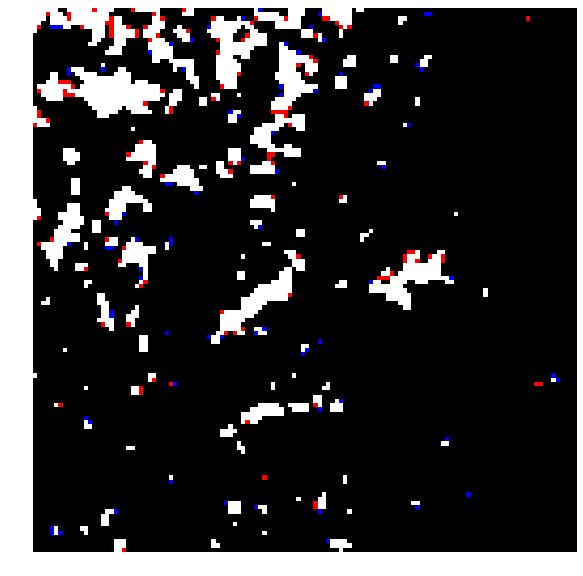

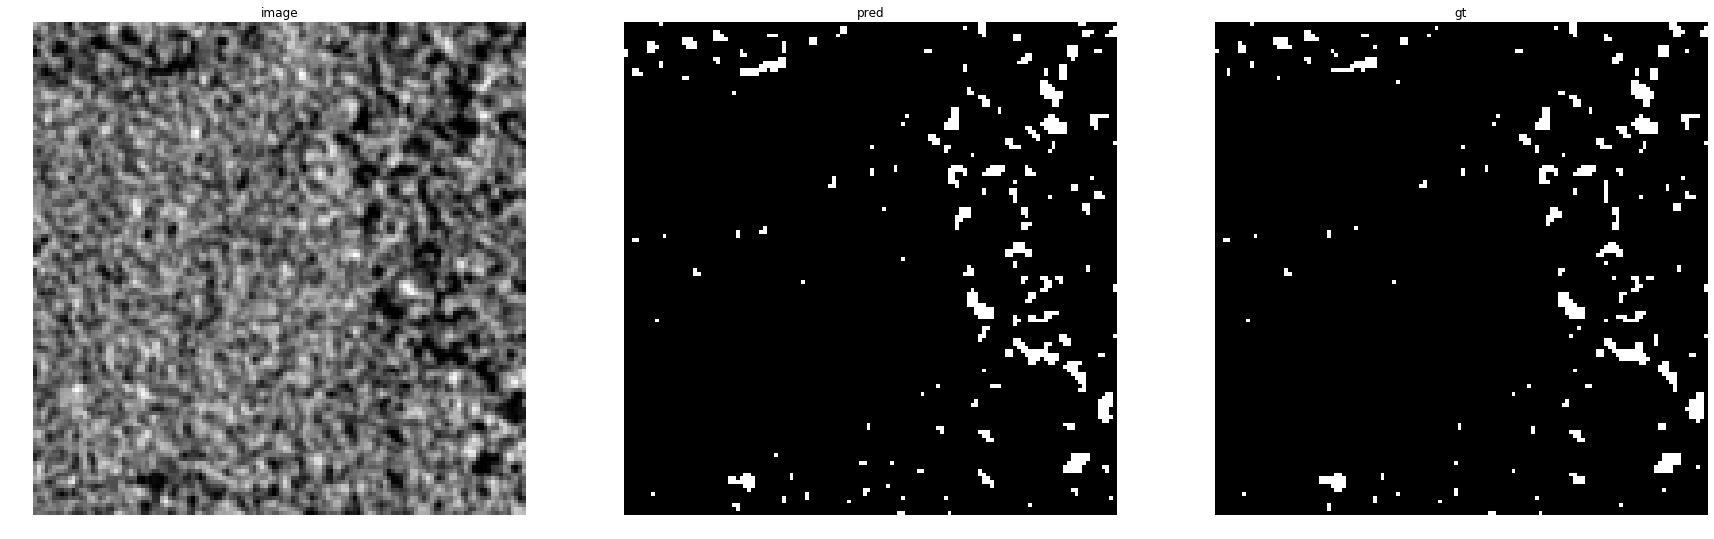

accuracy    : 0.99176025390625
precision   : 0.841799709724238
recall      : 0.9570957095709571
f1          : 0.8957528957528957
pr_auc      : 0.9820348599543303
iou         : 0.8111888111888111


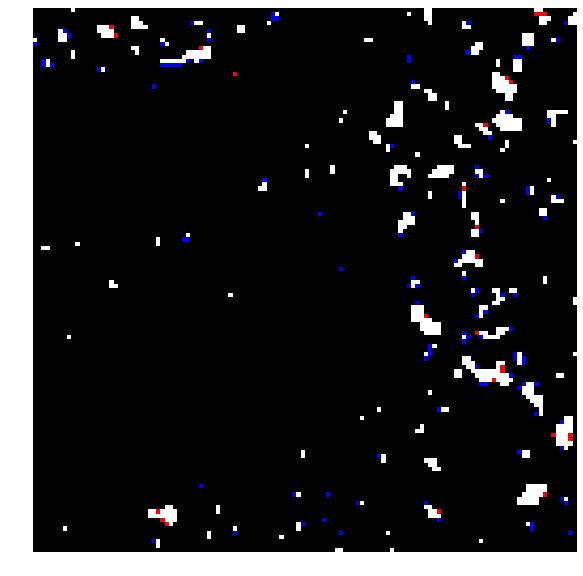

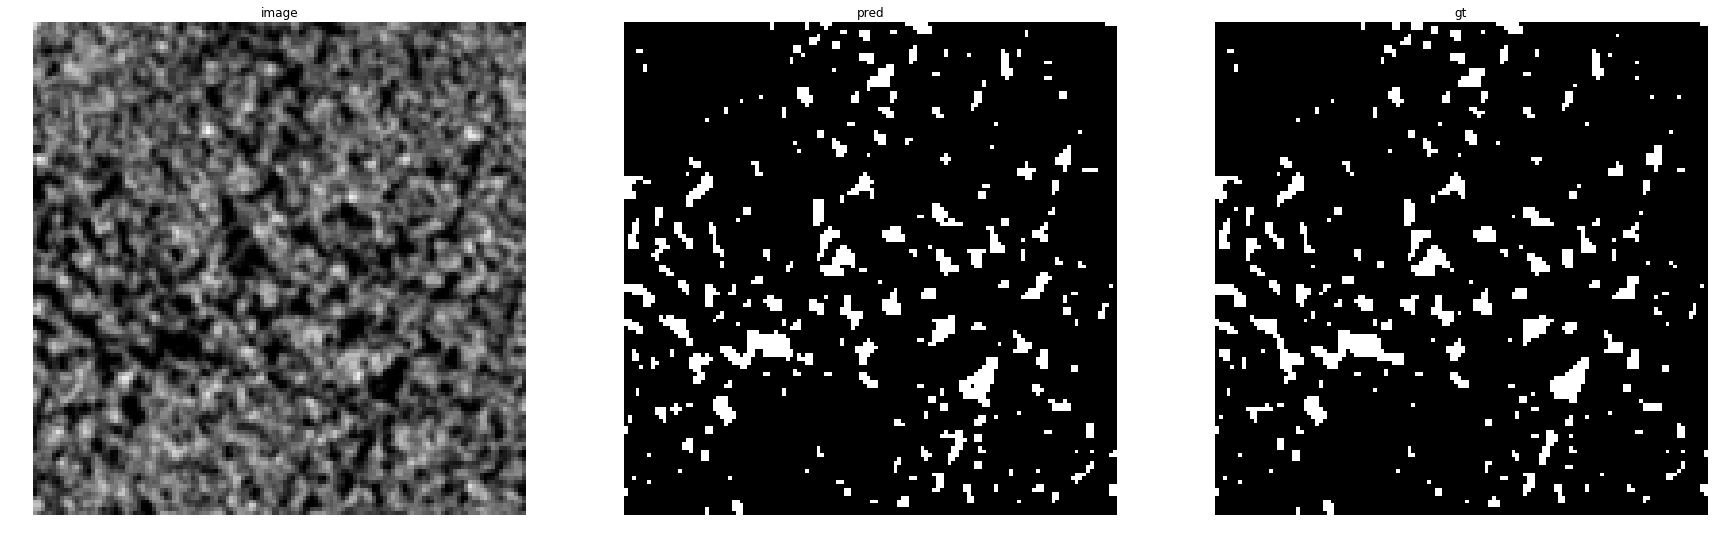

accuracy    : 0.9854736328125
precision   : 0.899803536345776
recall      : 0.9417409184372858
f1          : 0.9202947086403216
pr_auc      : 0.9832656307030181
iou         : 0.8523573200992556


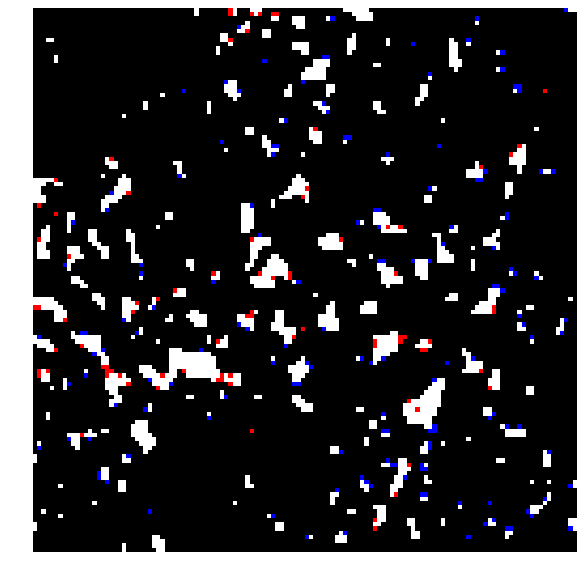

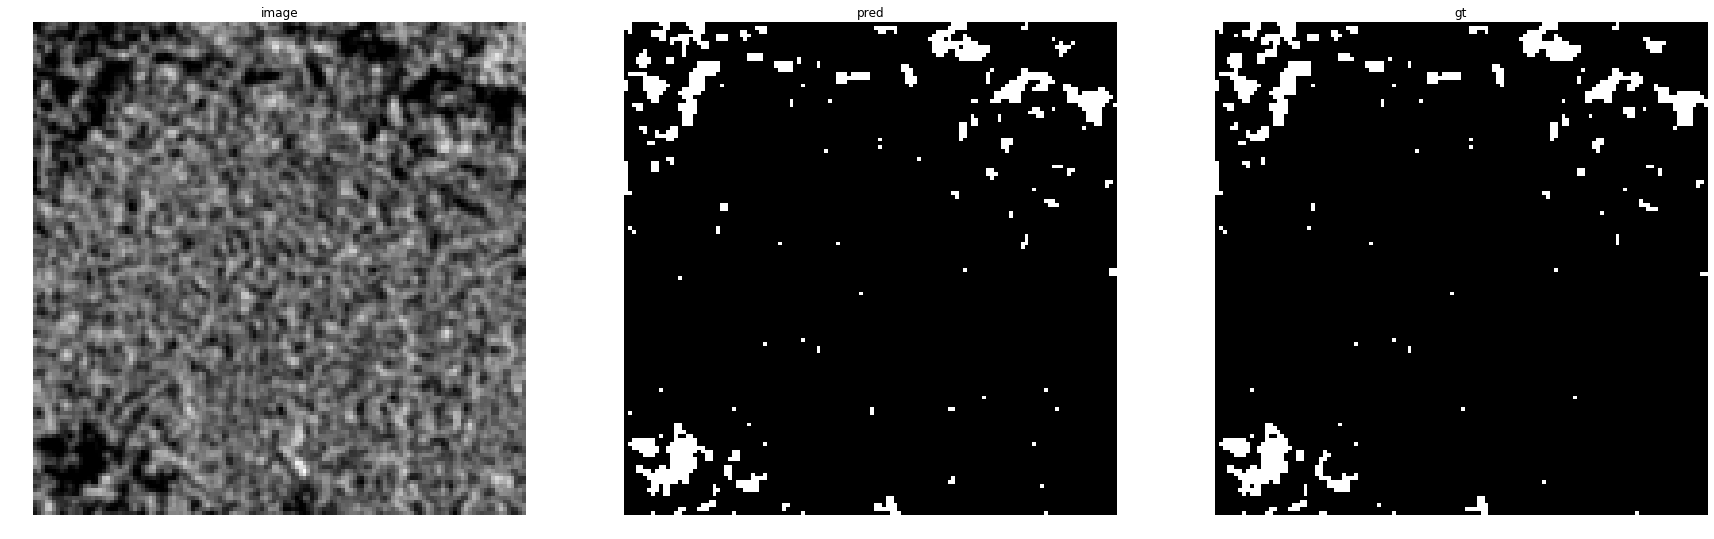

accuracy    : 0.992919921875
precision   : 0.9233296823658269
recall      : 0.9482564679415073
f1          : 0.9356270810210876
pr_auc      : 0.987052690173329
iou         : 0.8790406673618353


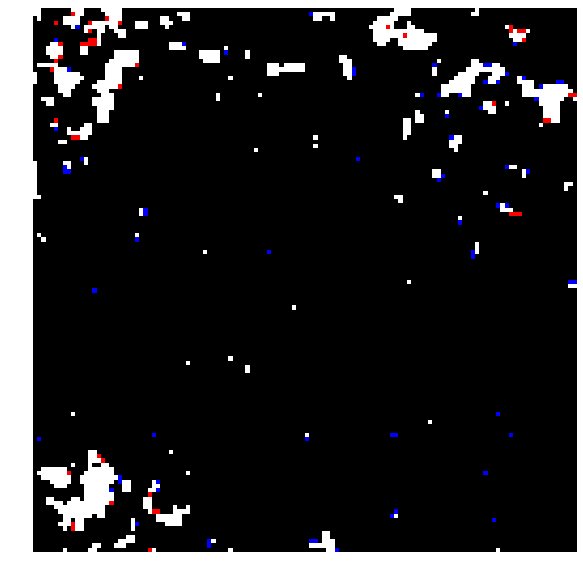

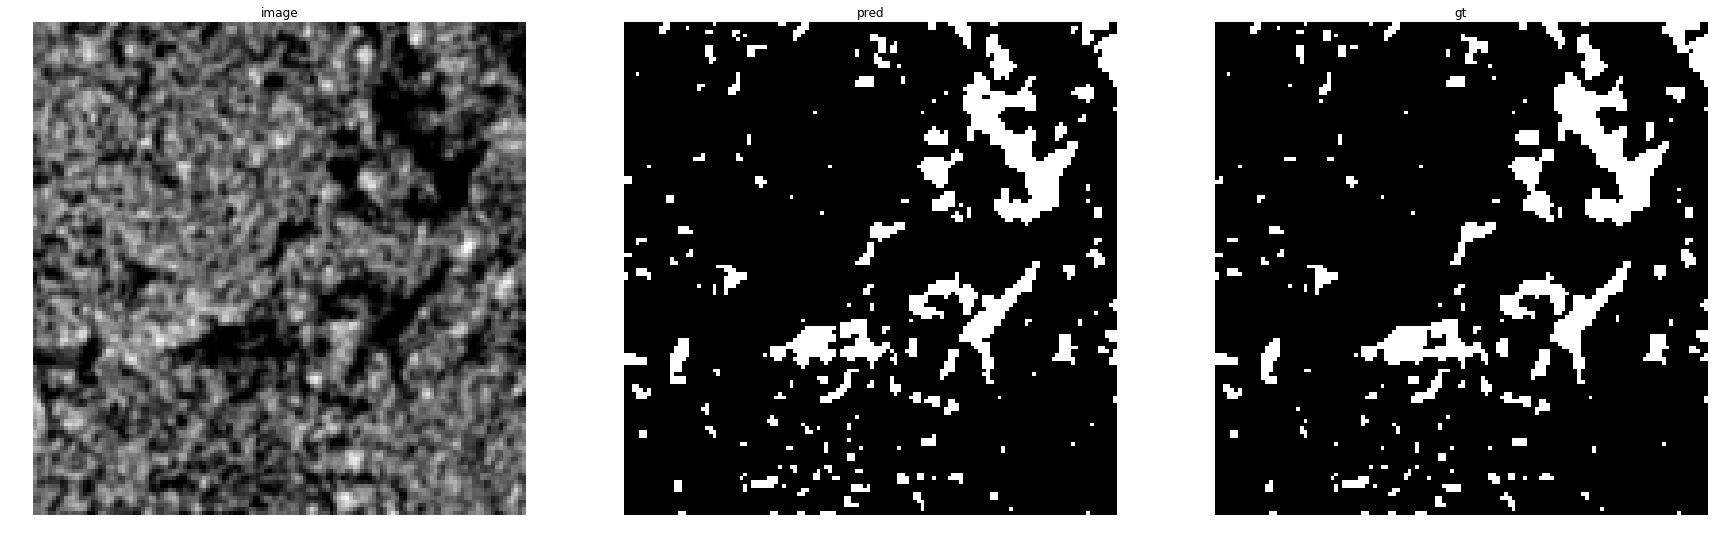

accuracy    : 0.986572265625
precision   : 0.950132625994695
recall      : 0.9342723004694836
f1          : 0.9421357180431352
pr_auc      : 0.9868321647416031
iou         : 0.8906016907011437


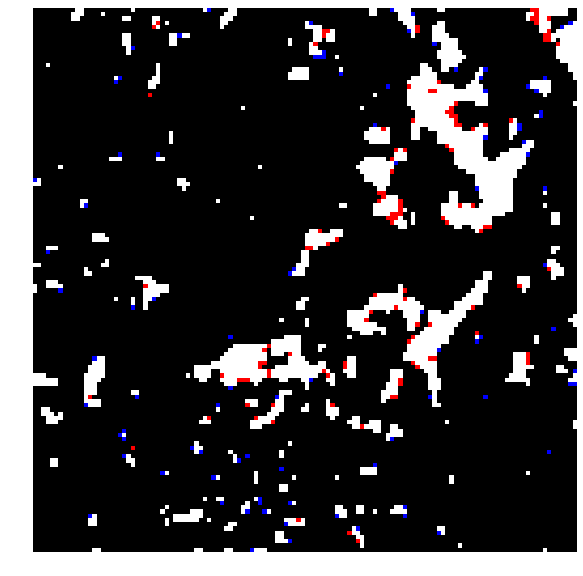

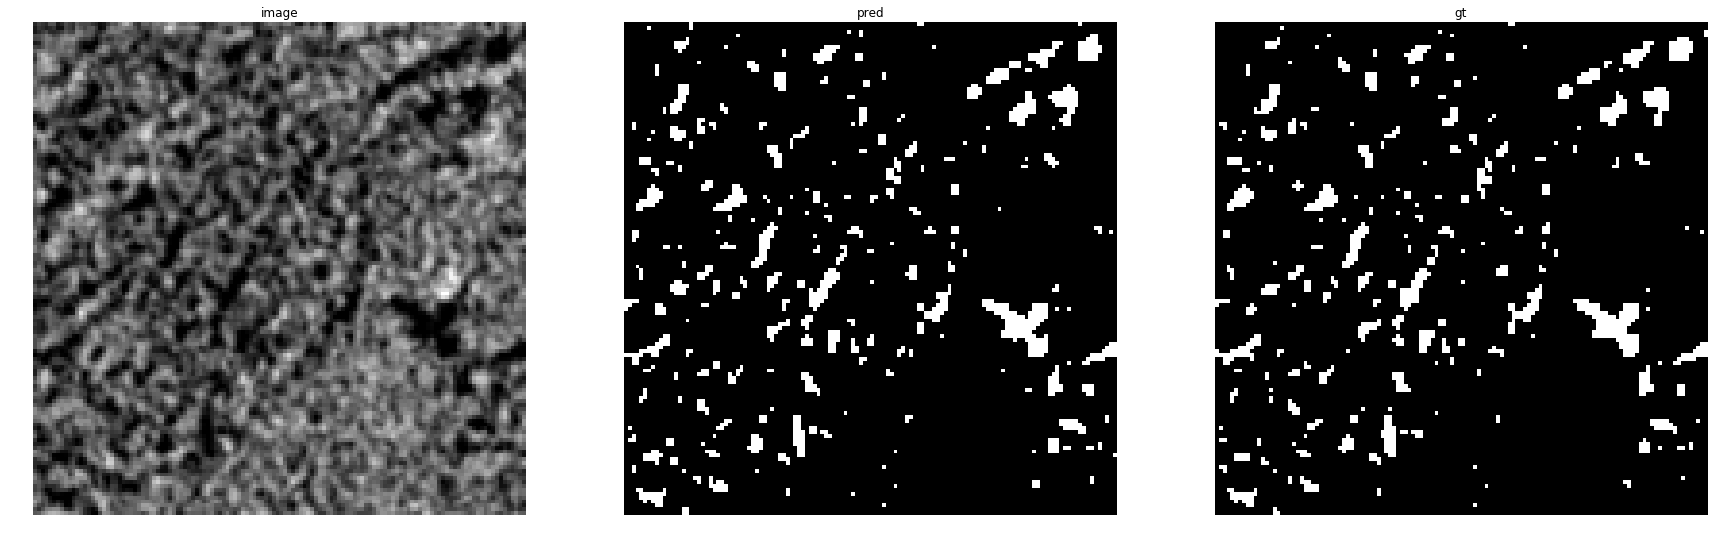

accuracy    : 0.9869384765625
precision   : 0.9014404852160728
recall      : 0.9340141398271798
f1          : 0.9174382716049382
pr_auc      : 0.9815591920366559
iou         : 0.8474697077690663


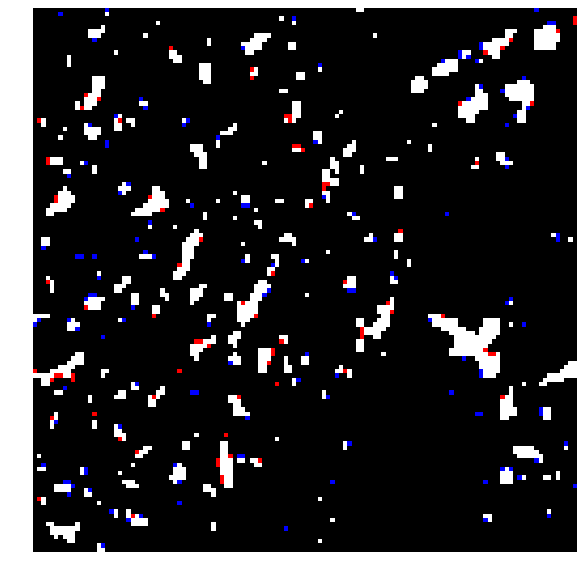

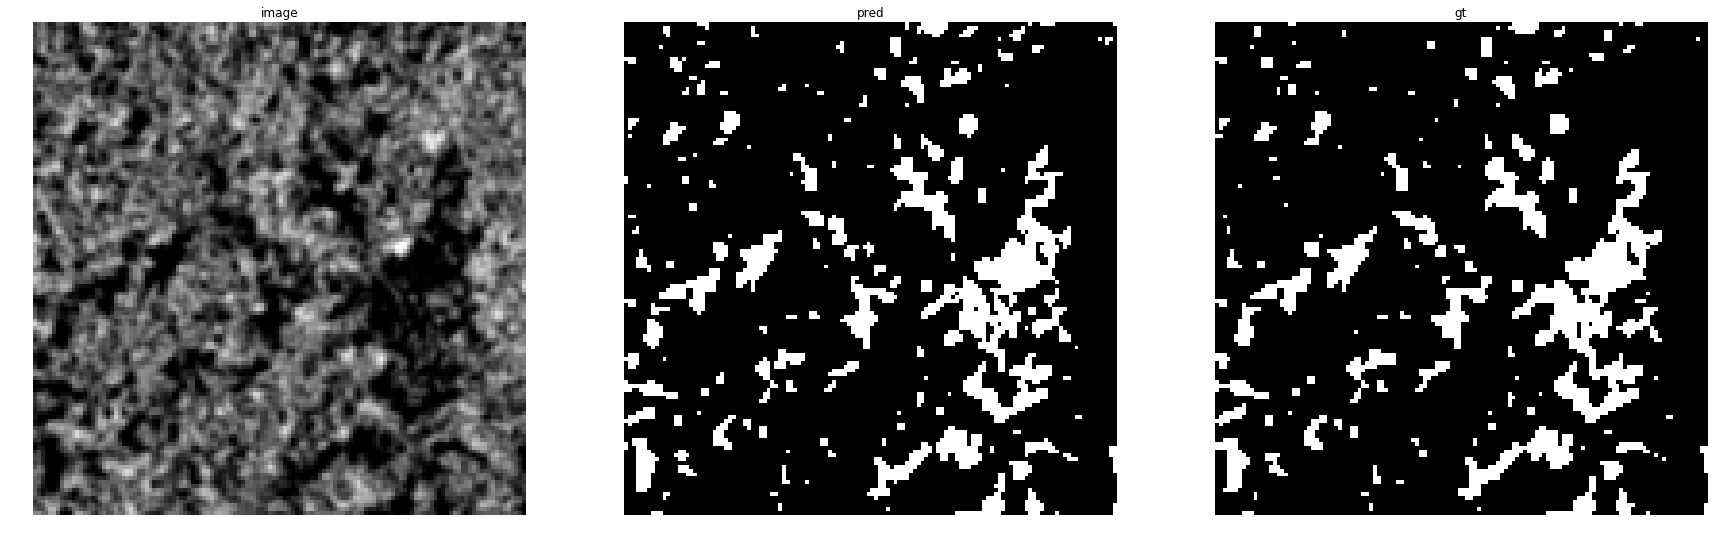

accuracy    : 0.98187255859375
precision   : 0.9299202685690307
recall      : 0.9445865302642796
f1          : 0.9371960245294988
pr_auc      : 0.9885896835129536
iou         : 0.8818145642658177


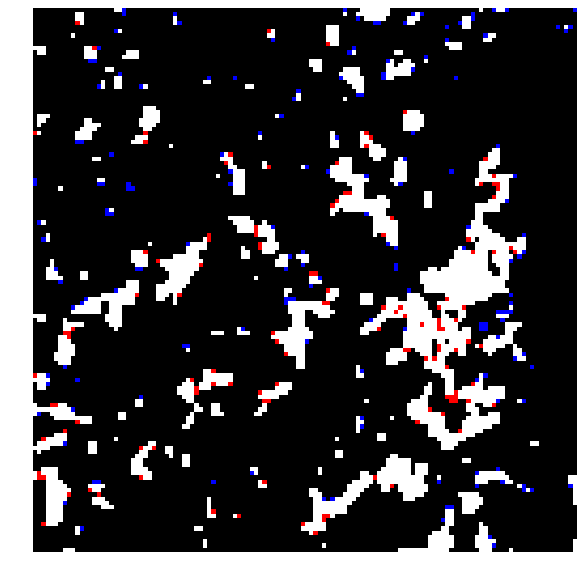

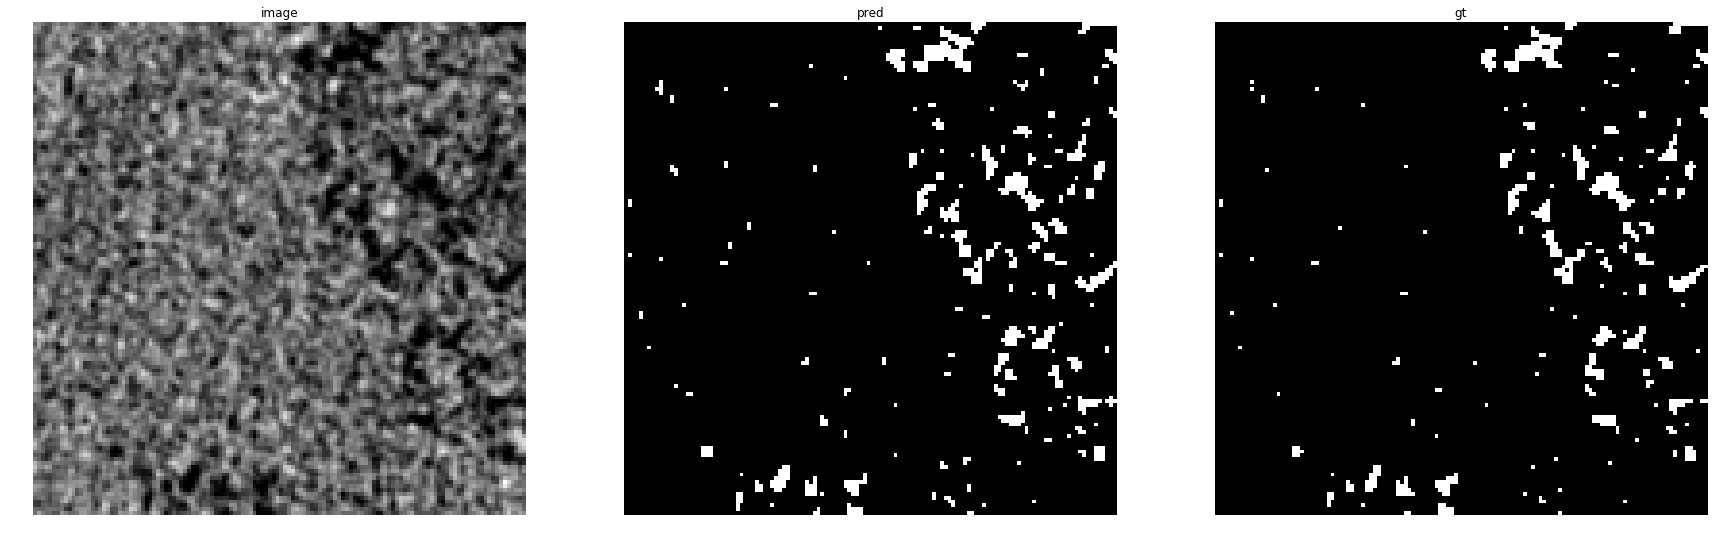

accuracy    : 0.98870849609375
precision   : 0.8199513381995134
recall      : 0.9479606188466948
f1          : 0.8793215916503587
pr_auc      : 0.9733804333232436
iou         : 0.7846332945285215


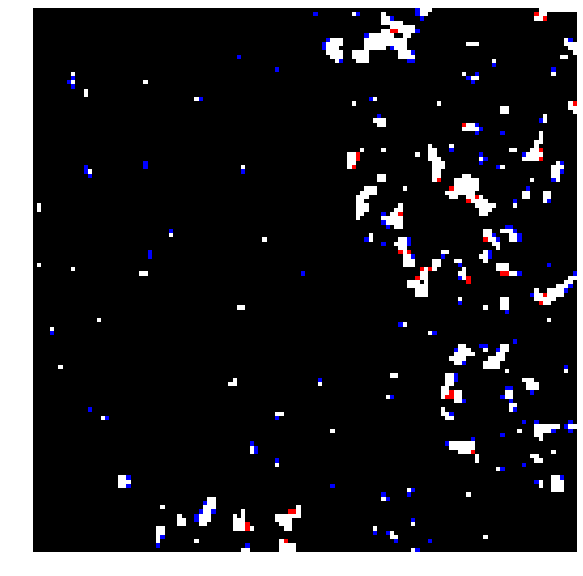

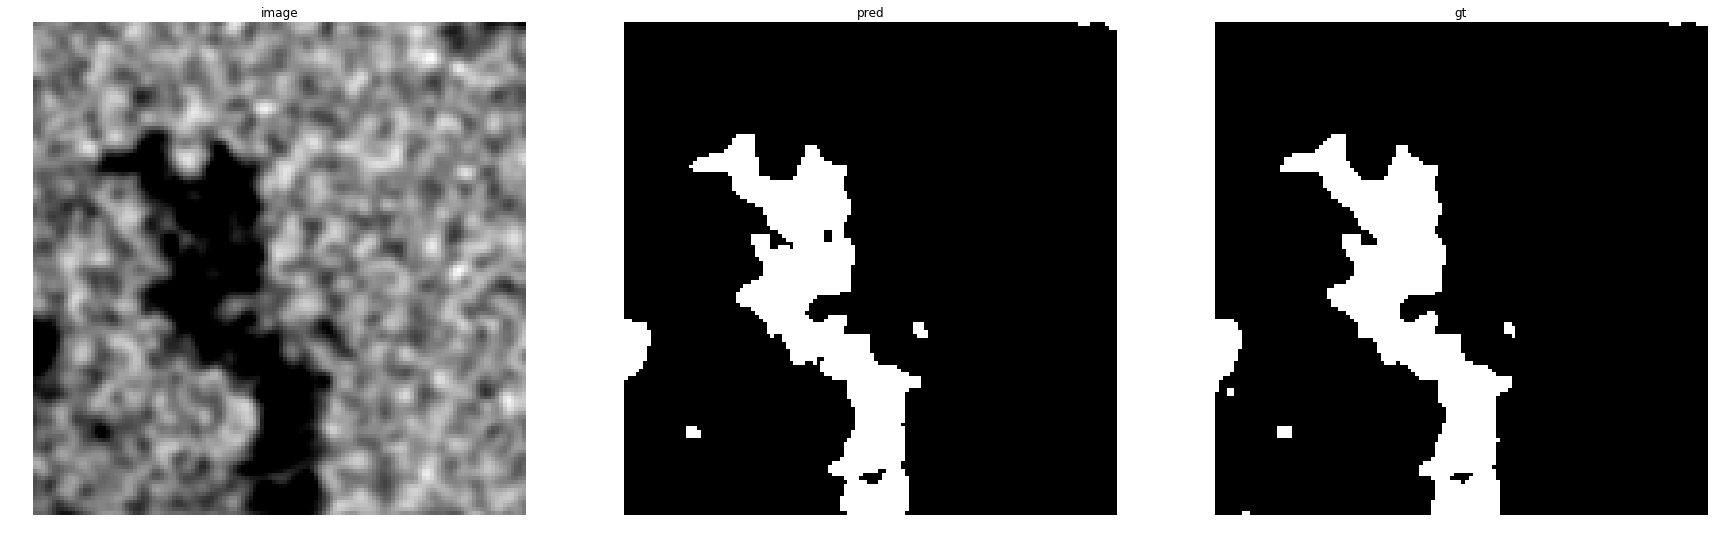

accuracy    : 0.9940185546875
precision   : 0.9911547911547911
recall      : 0.9618502622794468
f1          : 0.9762826718296224
pr_auc      : 0.9989336588687647
iou         : 0.9536643026004729


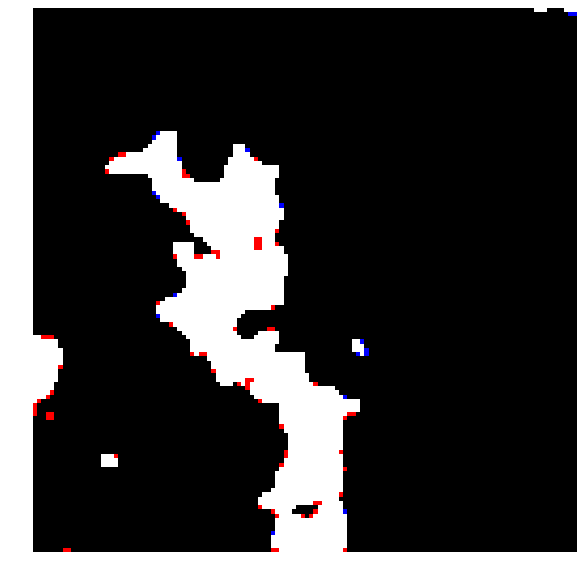

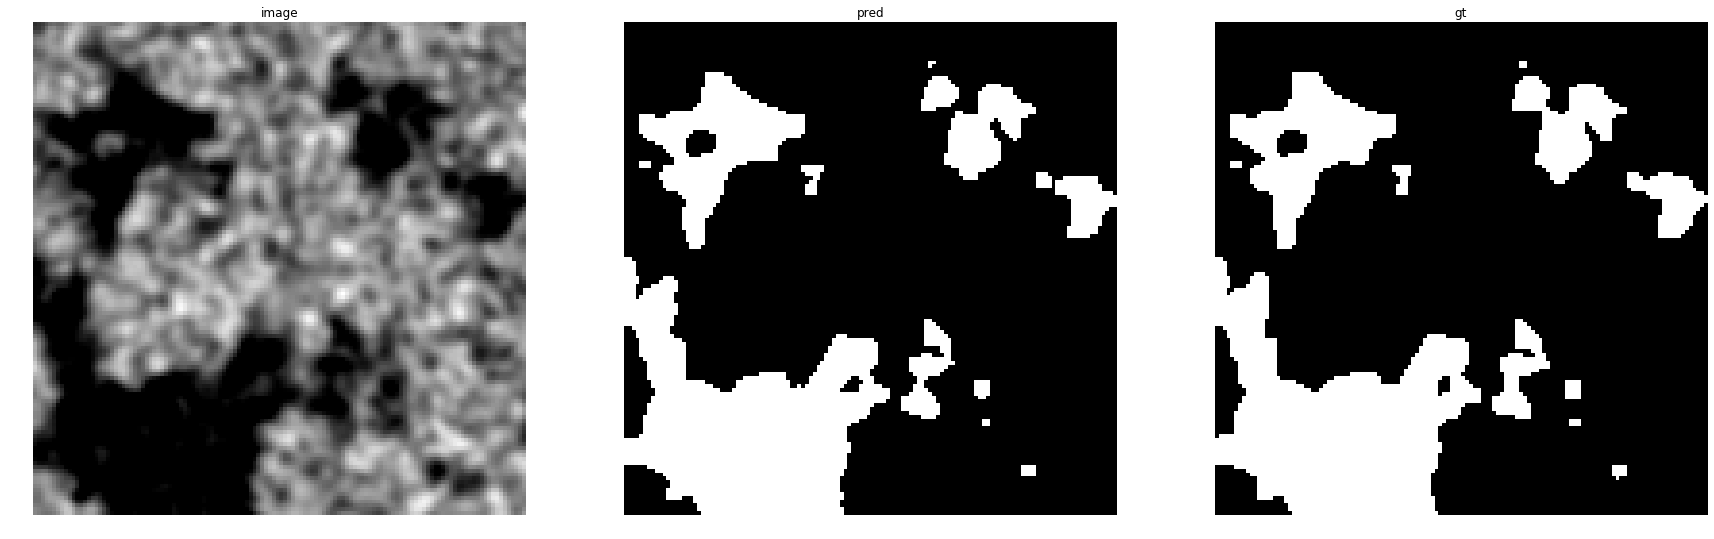

accuracy    : 0.990478515625
precision   : 0.995334370139969
recall      : 0.9653092006033183
f1          : 0.9800918836140888
pr_auc      : 0.9991776243914949
iou         : 0.960960960960961


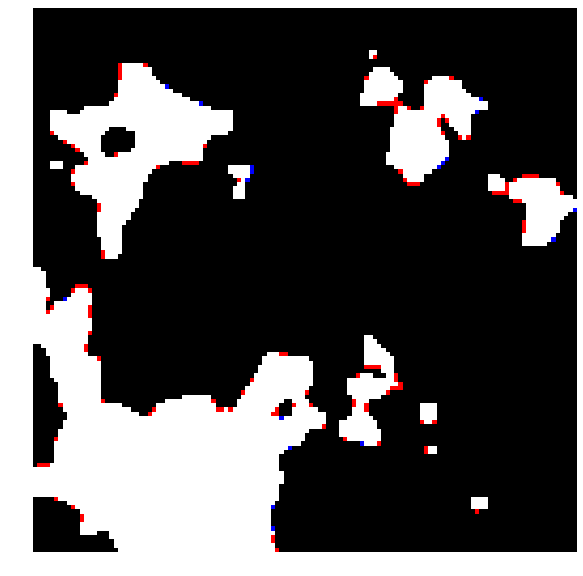

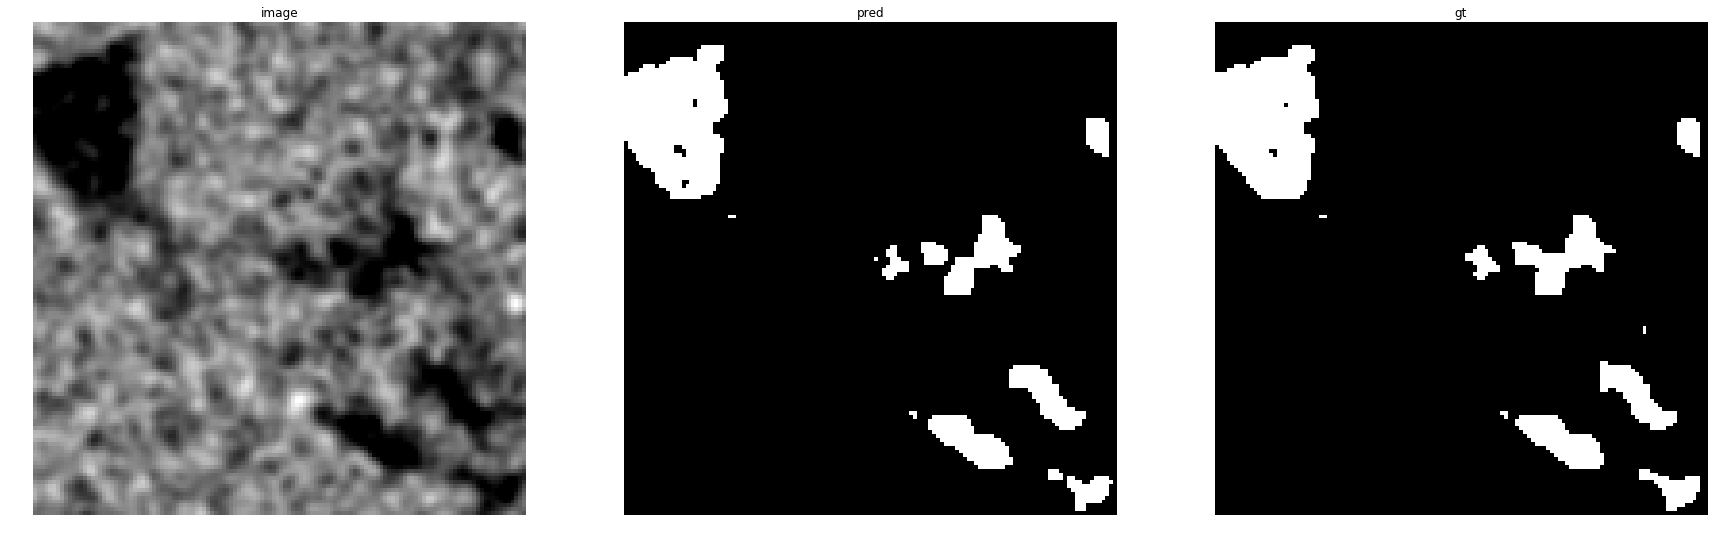

accuracy    : 0.993896484375
precision   : 0.9887788778877887
recall      : 0.9475015812776724
f1          : 0.9677002583979327
pr_auc      : 0.9976617288892332
iou         : 0.9374217772215269


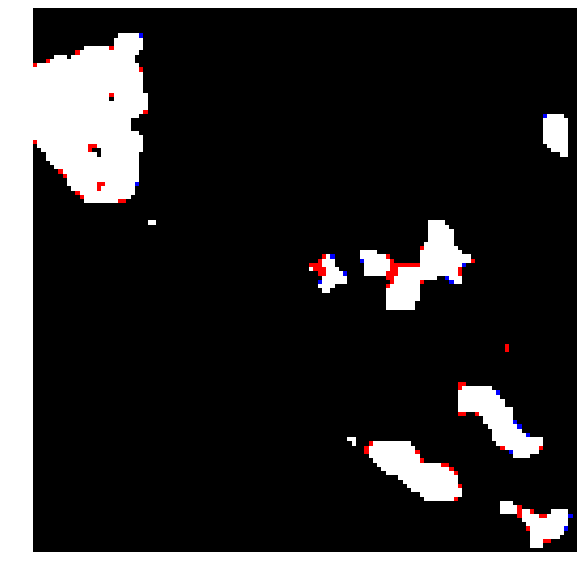

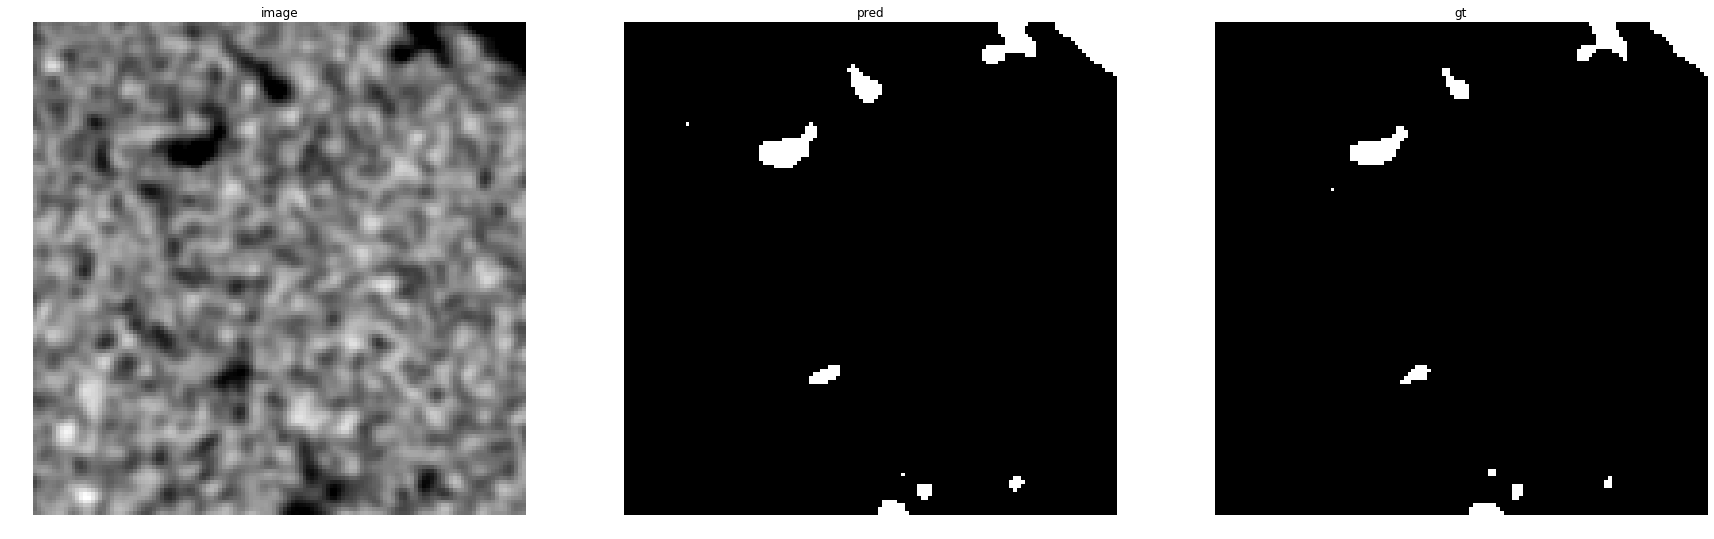

accuracy    : 0.99444580078125
precision   : 0.8148984198645598
recall      : 0.9756756756756757
f1          : 0.8880688806888068
pr_auc      : 0.985158240449437
iou         : 0.7986725663716814


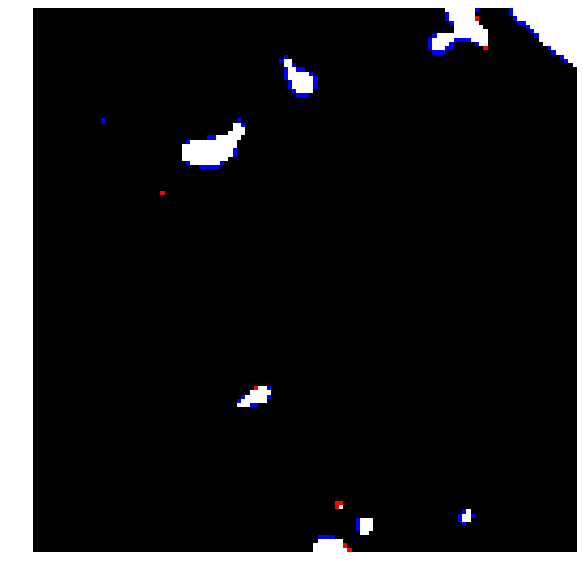

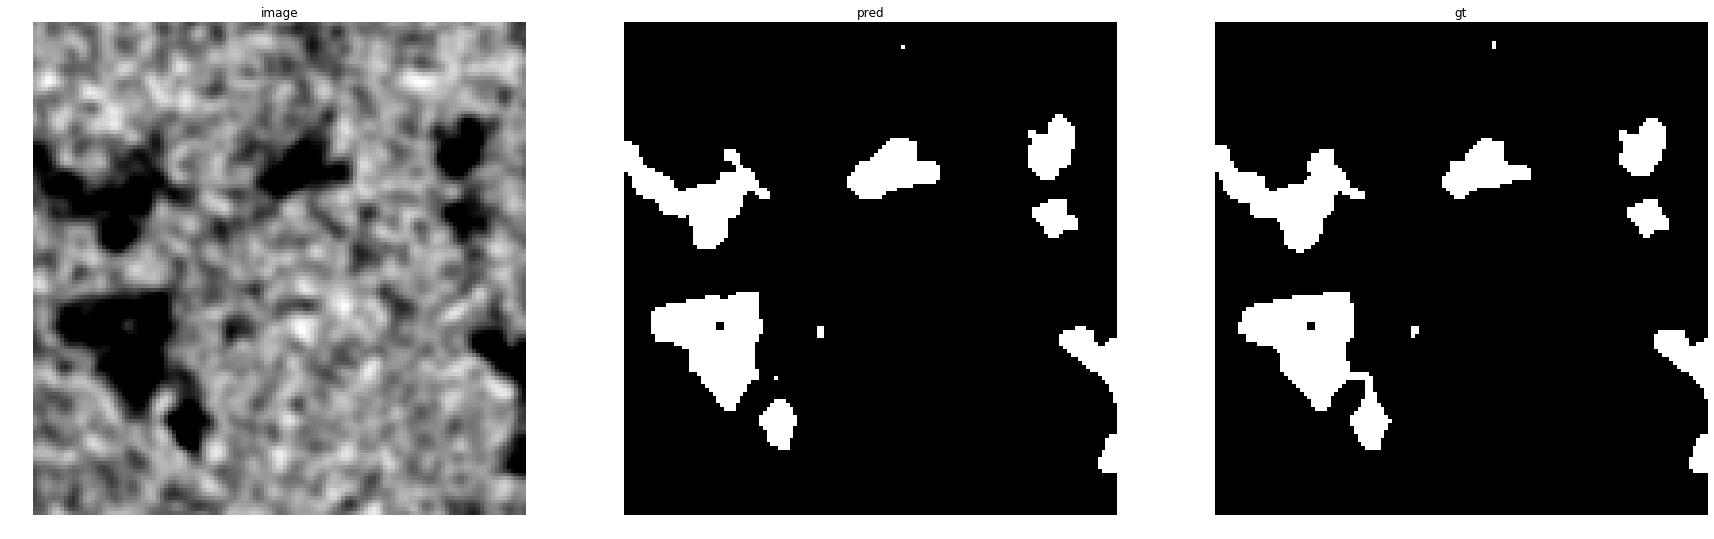

accuracy    : 0.9881591796875
precision   : 0.951073985680191
recall      : 0.9343493552168816
f1          : 0.9426374926079243
pr_auc      : 0.991525576279844
iou         : 0.8914988814317674


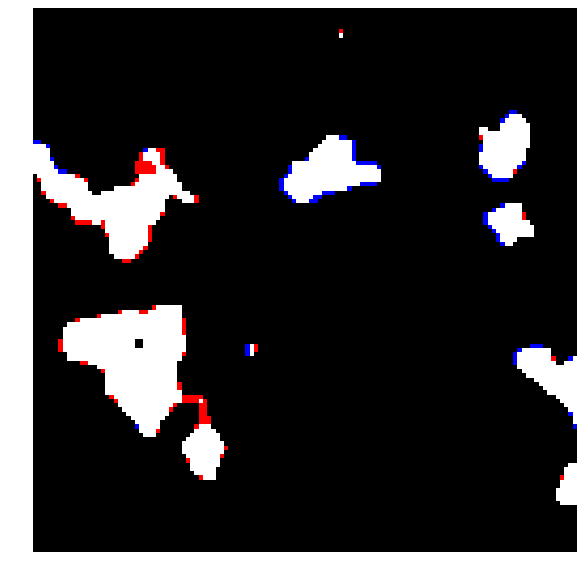

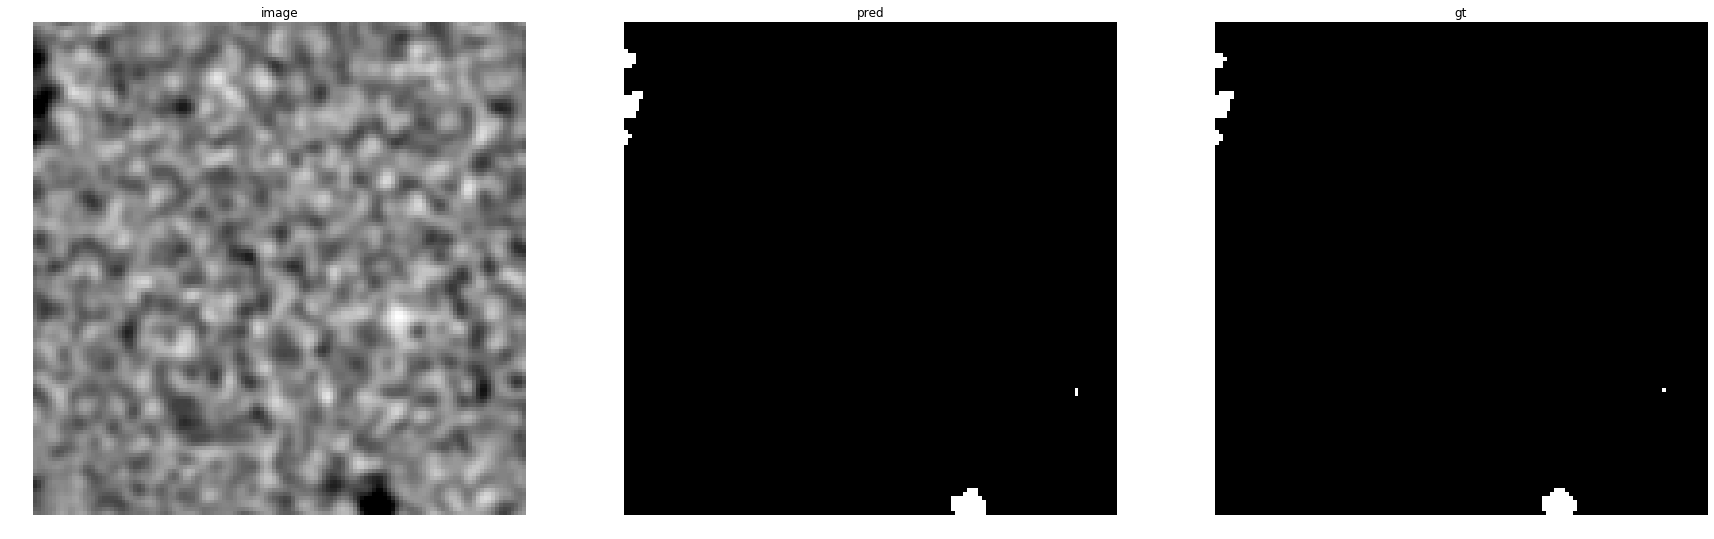

accuracy    : 0.999267578125
precision   : 0.9263157894736842
recall      : 0.946236559139785
f1          : 0.9361702127659575
pr_auc      : 0.9879932875146994
iou         : 0.88


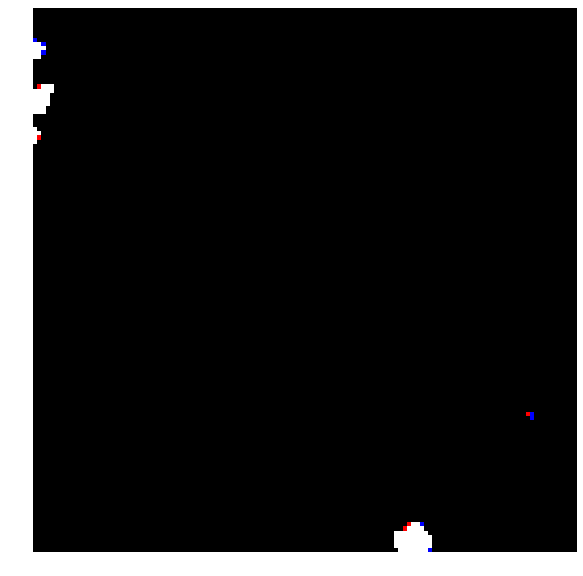

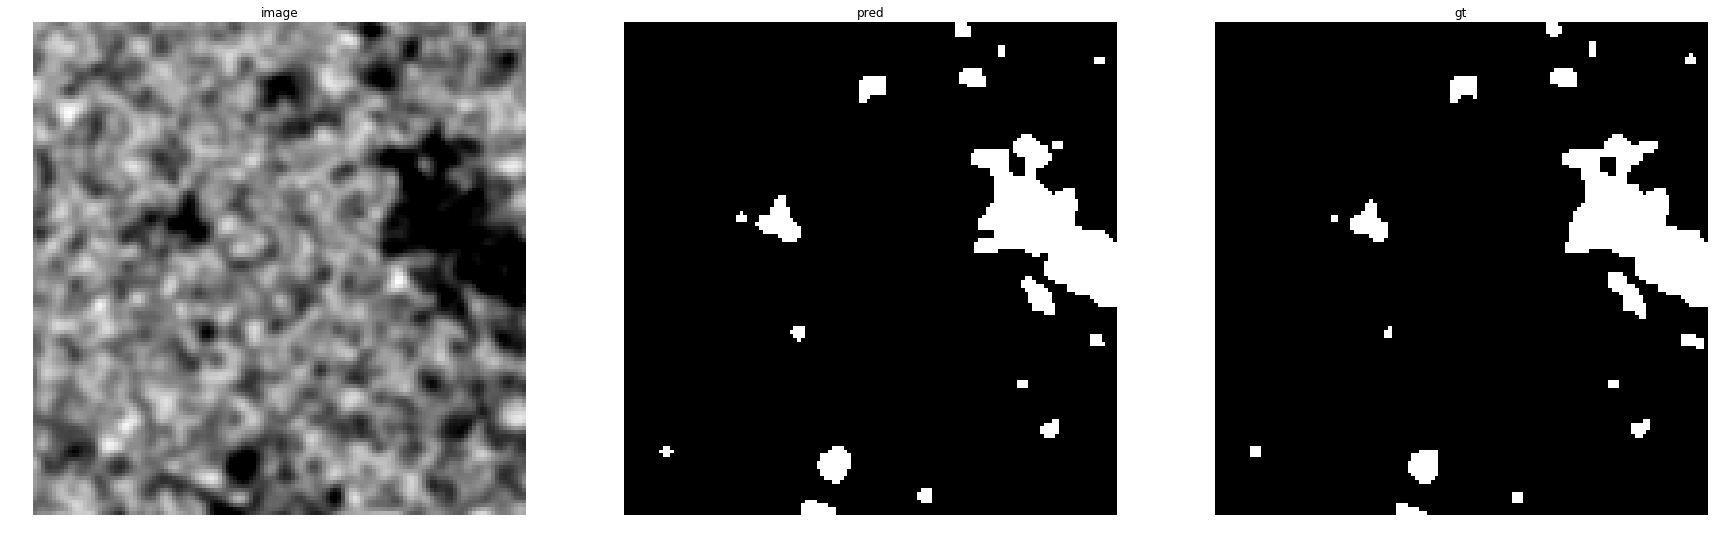

accuracy    : 0.9925537109375
precision   : 0.9511589403973509
recall      : 0.948019801980198
f1          : 0.9495867768595042
pr_auc      : 0.9937098344886788
iou         : 0.9040125885129819


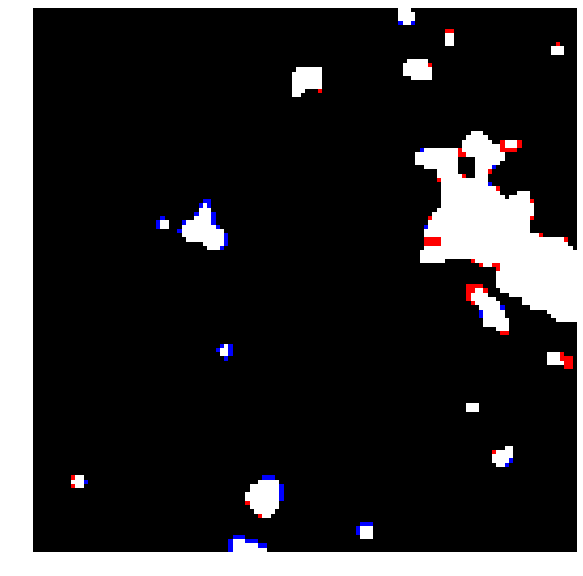

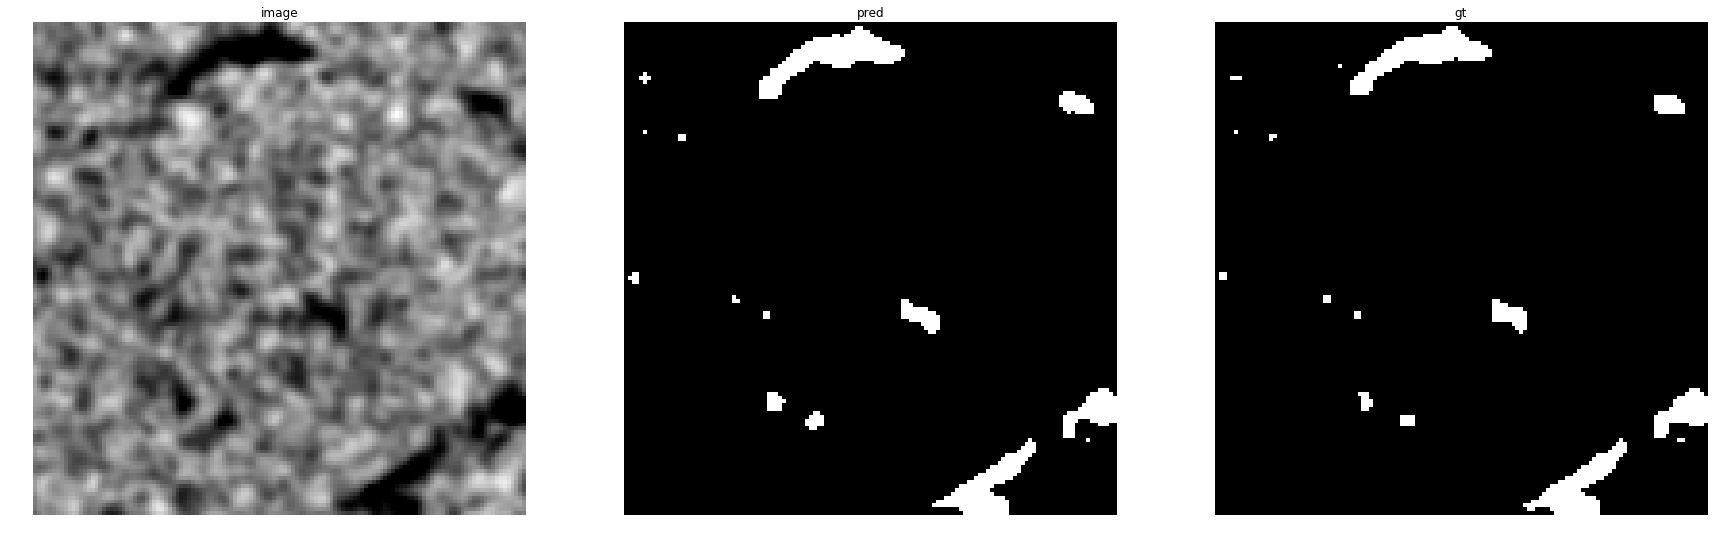

accuracy    : 0.994384765625
precision   : 0.905848787446505
recall      : 0.9606656580937972
f1          : 0.9324522760646109
pr_auc      : 0.9869820351714828
iou         : 0.8734525447042641


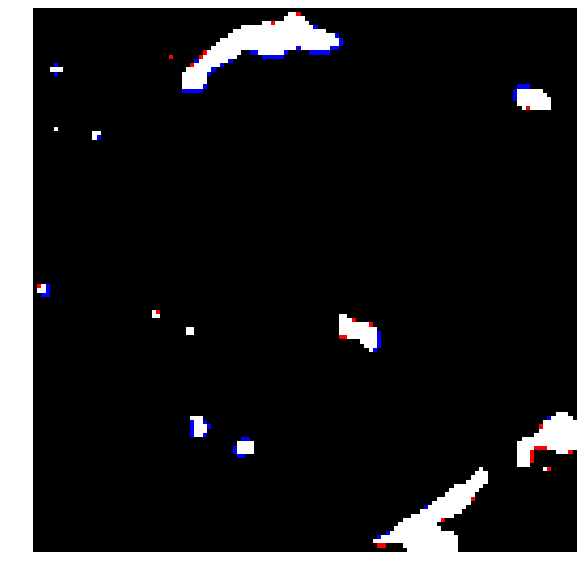

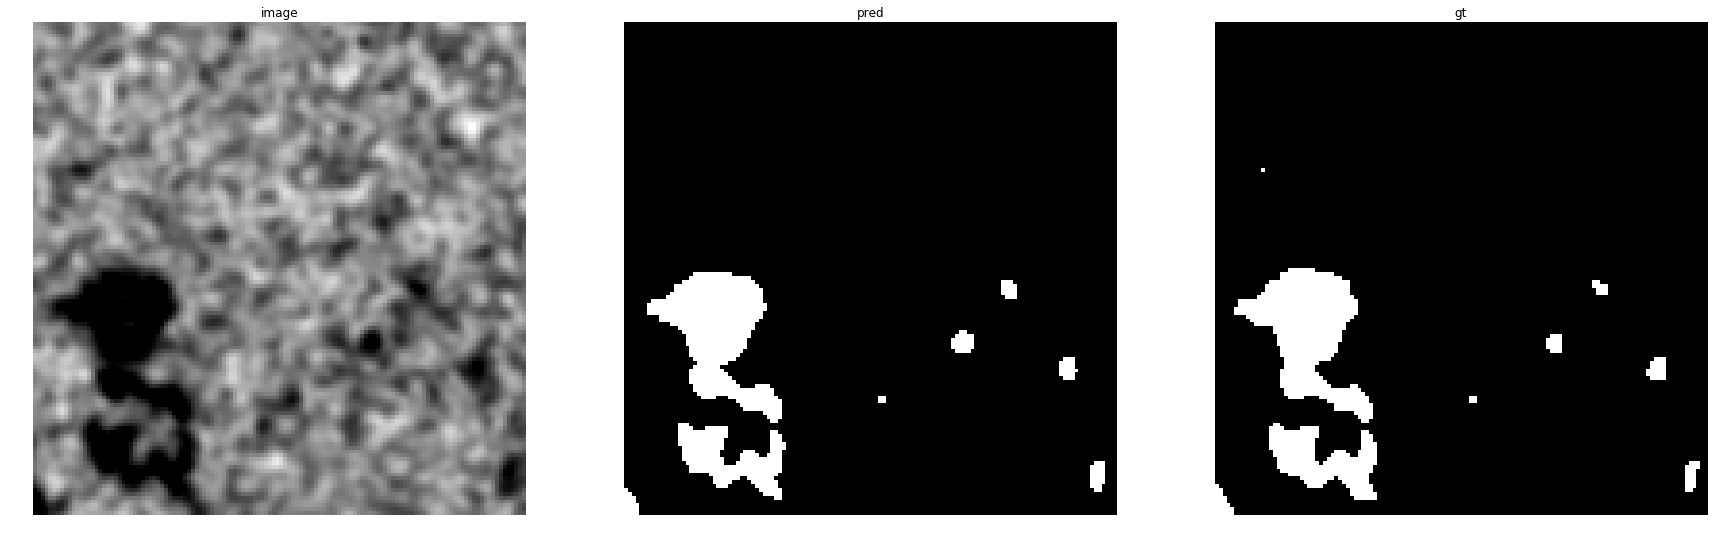

accuracy    : 0.99359130859375
precision   : 0.9649621212121212
recall      : 0.937442502299908
f1          : 0.9510032664489034
pr_auc      : 0.9941675492241041
iou         : 0.9065836298932385


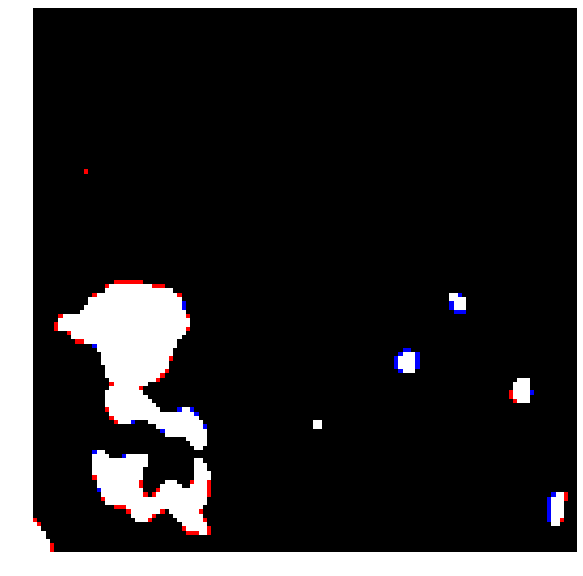

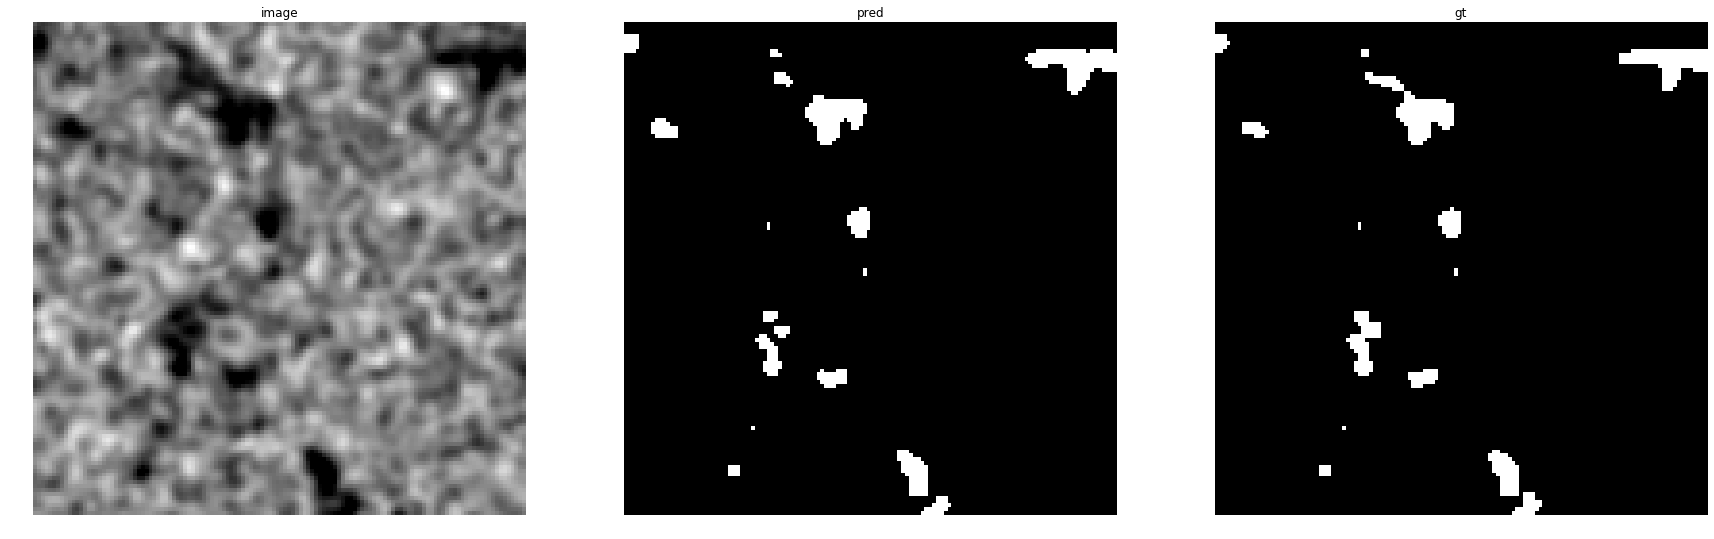

accuracy    : 0.994384765625
precision   : 0.9263157894736842
recall      : 0.9134948096885813
f1          : 0.9198606271777003
pr_auc      : 0.9832142393788135
iou         : 0.8516129032258064


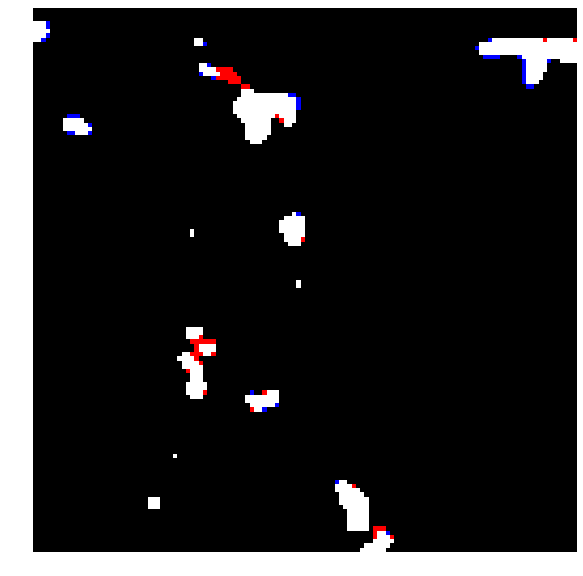

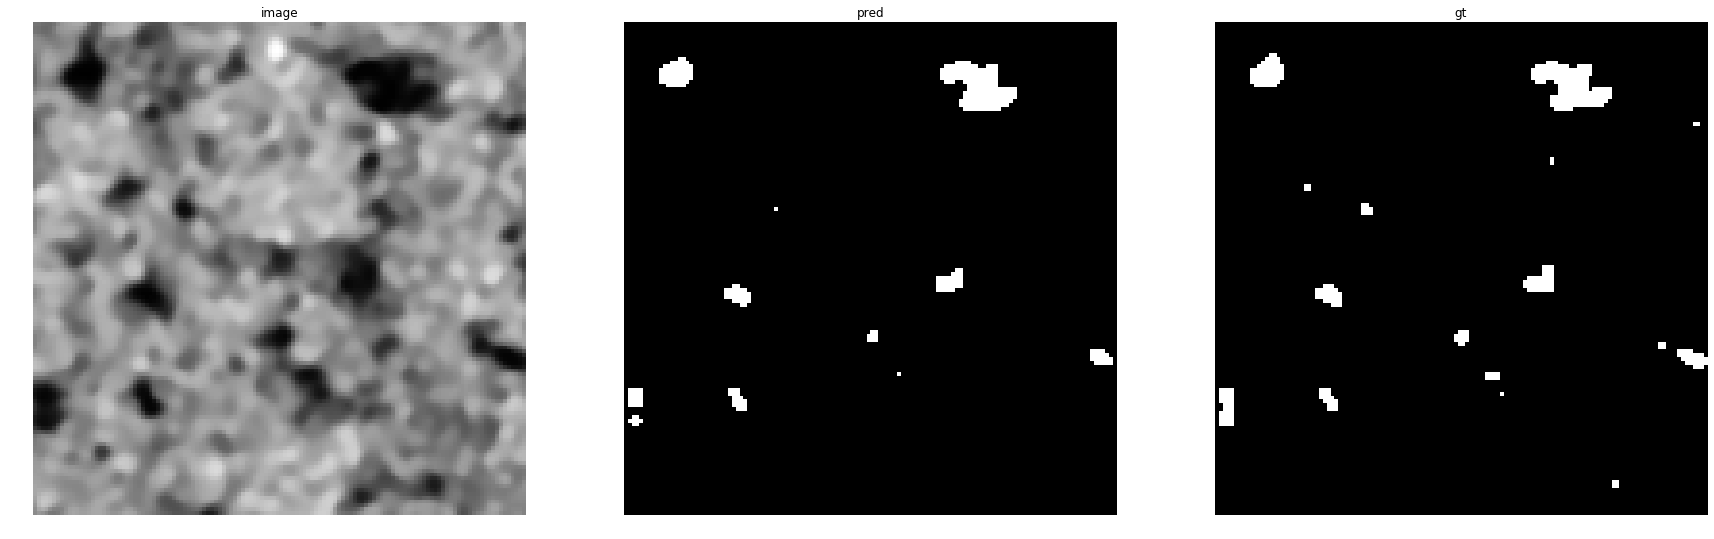

accuracy    : 0.994384765625
precision   : 0.9659090909090909
recall      : 0.8095238095238095
f1          : 0.8808290155440414
pr_auc      : 0.9720607173255618
iou         : 0.7870370370370371


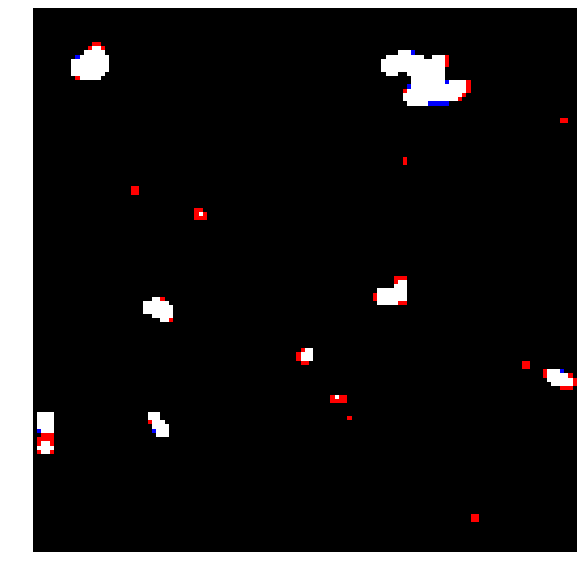

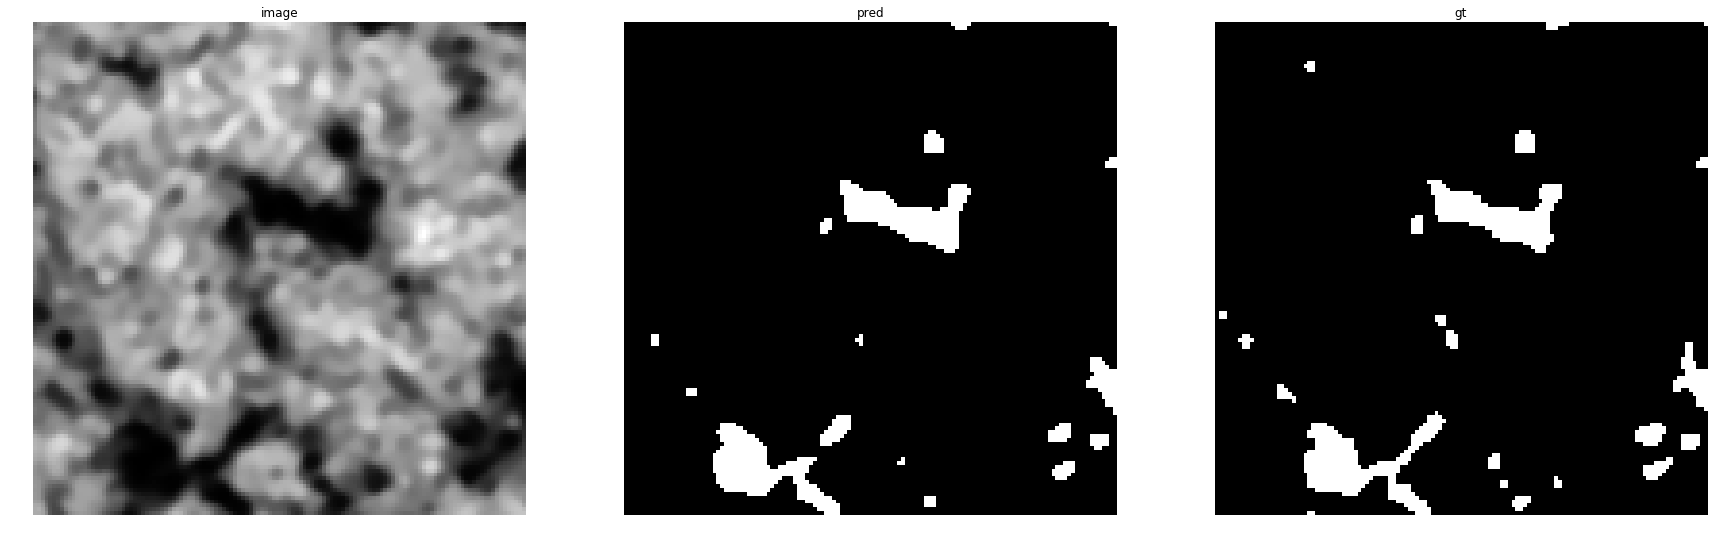

accuracy    : 0.99017333984375
precision   : 0.9649717514124294
recall      : 0.8678861788617886
f1          : 0.9138576779026218
pr_auc      : 0.9829536222117699
iou         : 0.8413793103448276


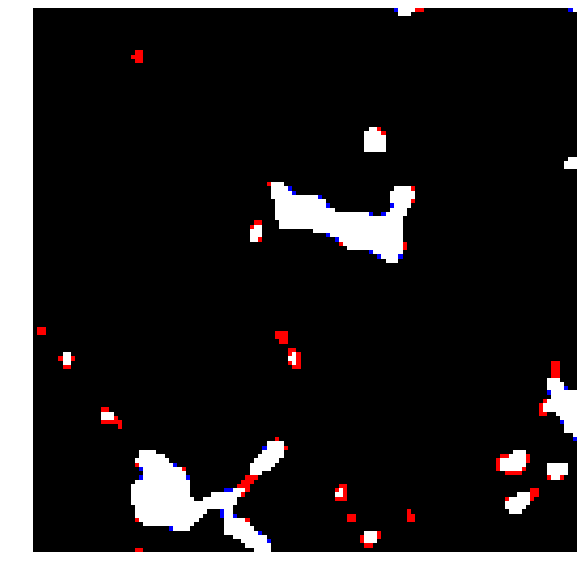

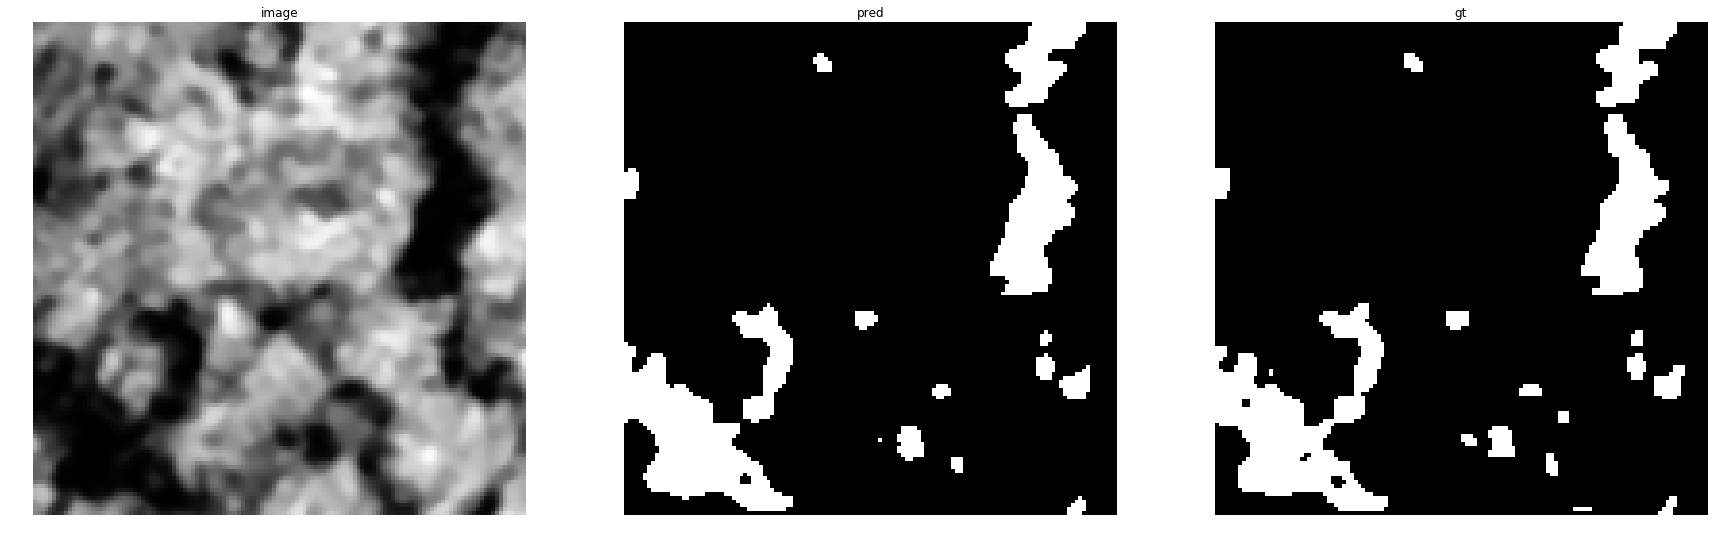

accuracy    : 0.98883056640625
precision   : 0.9552594002855783
recall      : 0.9575381679389313
f1          : 0.956397426733381
pr_auc      : 0.9939113857418558
iou         : 0.9164383561643835


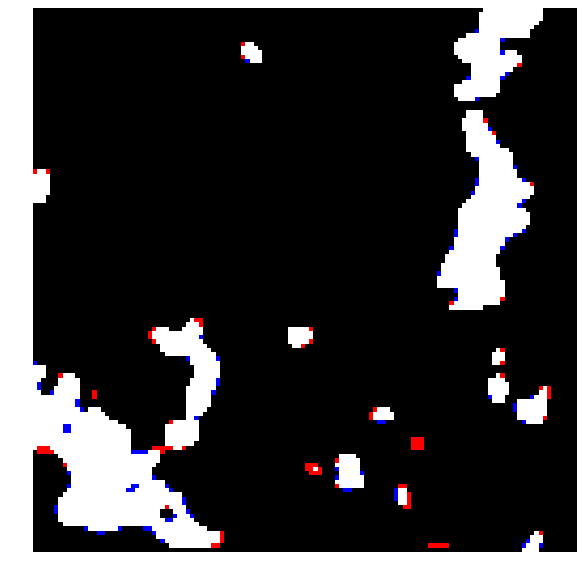

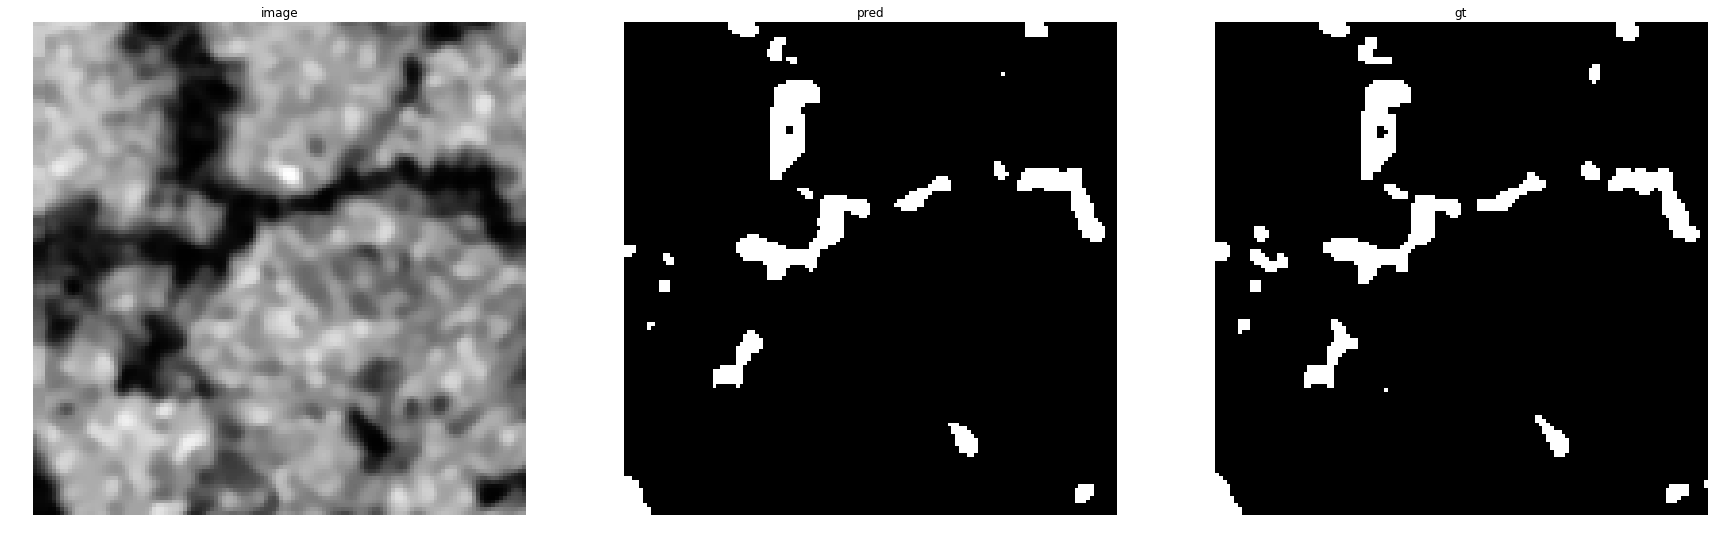

accuracy    : 0.98785400390625
precision   : 0.9608433734939759
recall      : 0.8567591763652641
f1          : 0.9058211074301941
pr_auc      : 0.9829096829280012
iou         : 0.8278546712802768


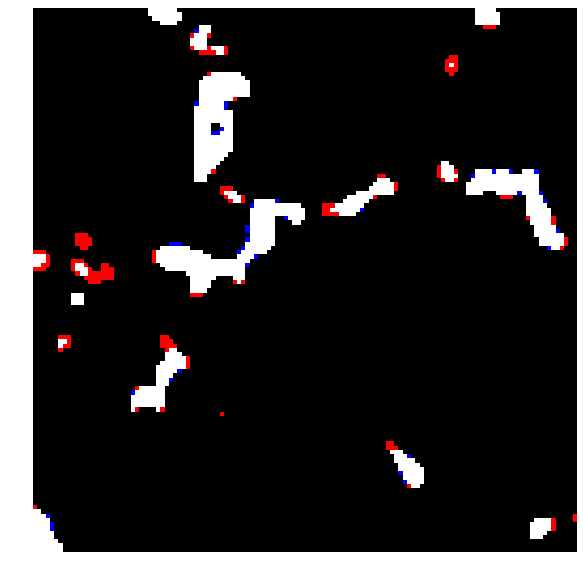

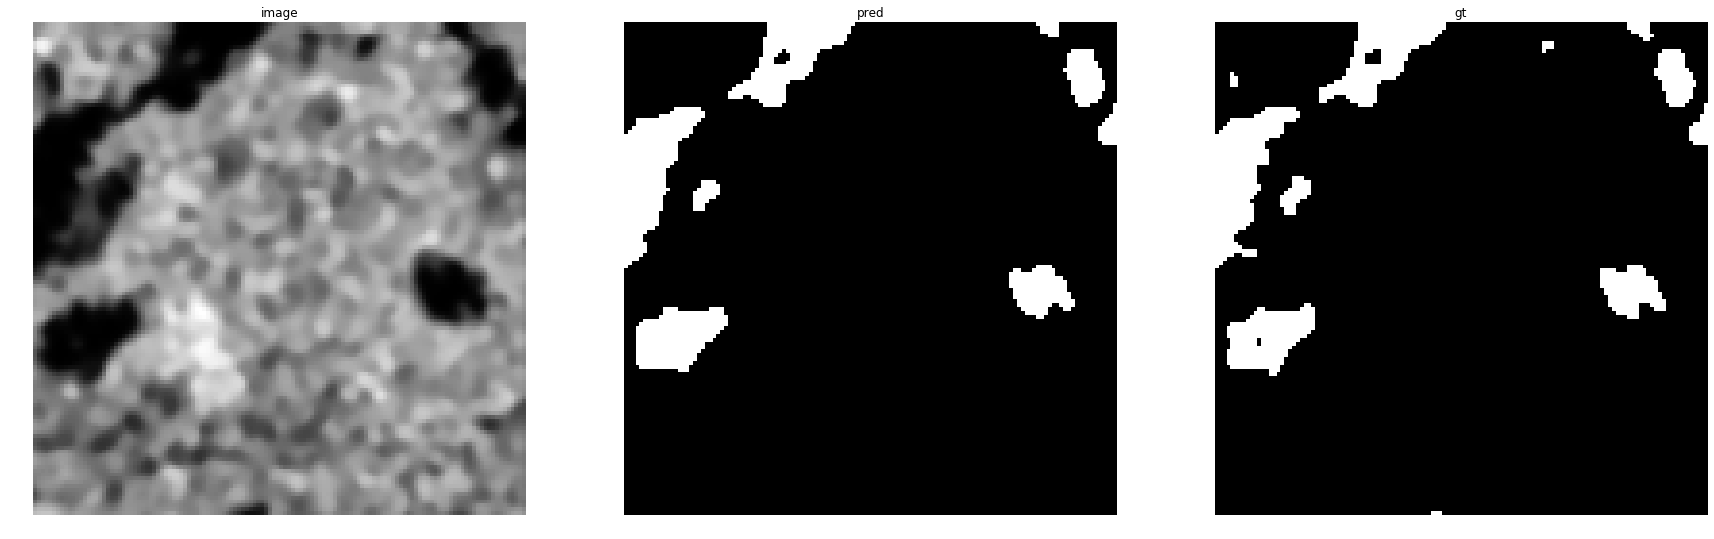

accuracy    : 0.9932861328125
precision   : 0.9675141242937854
recall      : 0.9553695955369595
f1          : 0.9614035087719298
pr_auc      : 0.9959272114232111
iou         : 0.9256756756756757


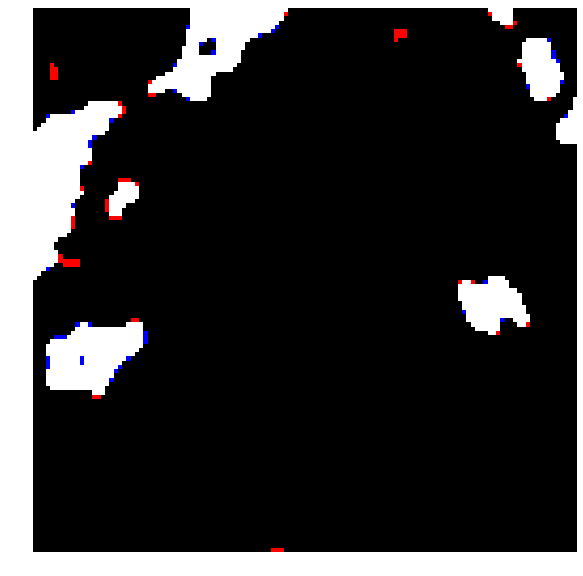

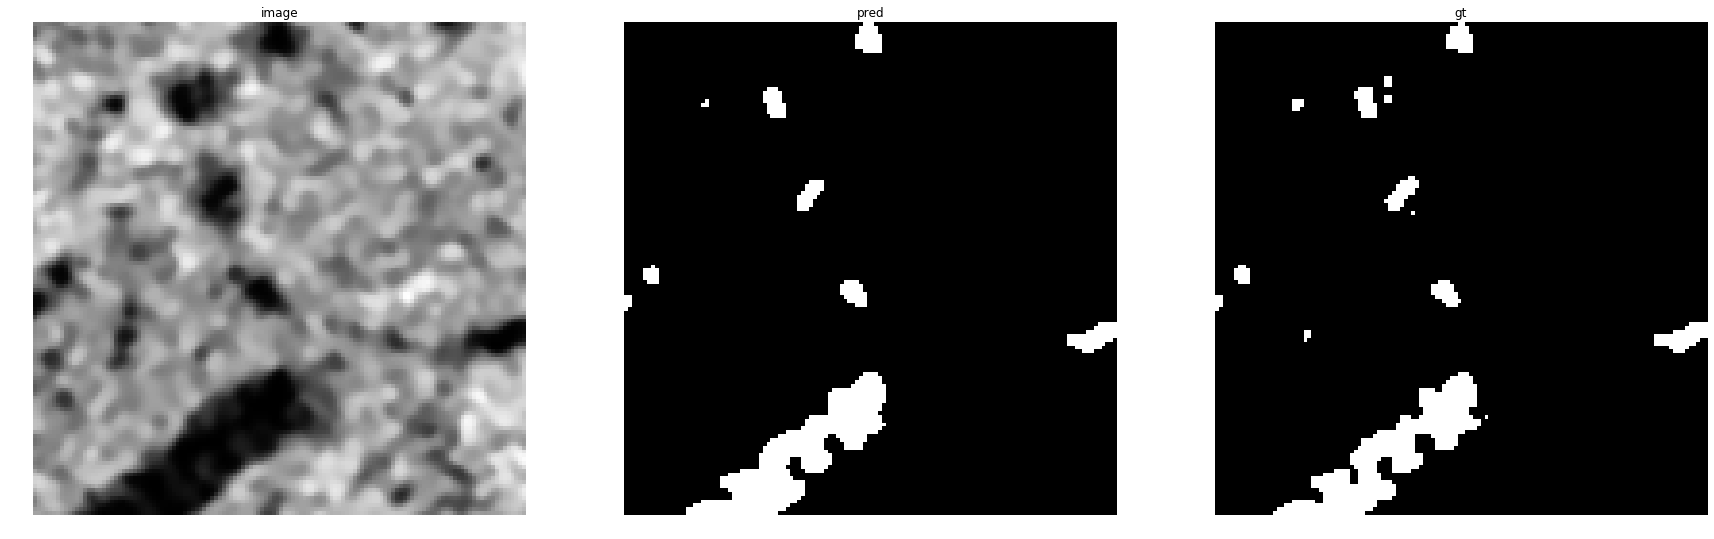

accuracy    : 0.99420166015625
precision   : 0.9430167597765363
recall      : 0.9504504504504504
f1          : 0.9467190128996074
pr_auc      : 0.9886088596038071
iou         : 0.898828541001065


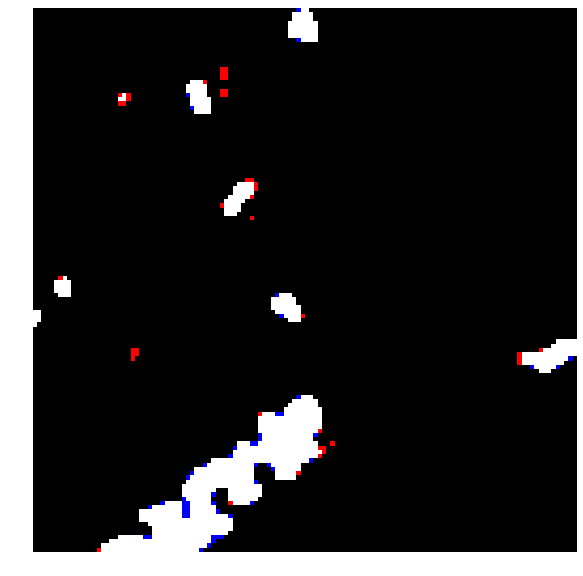

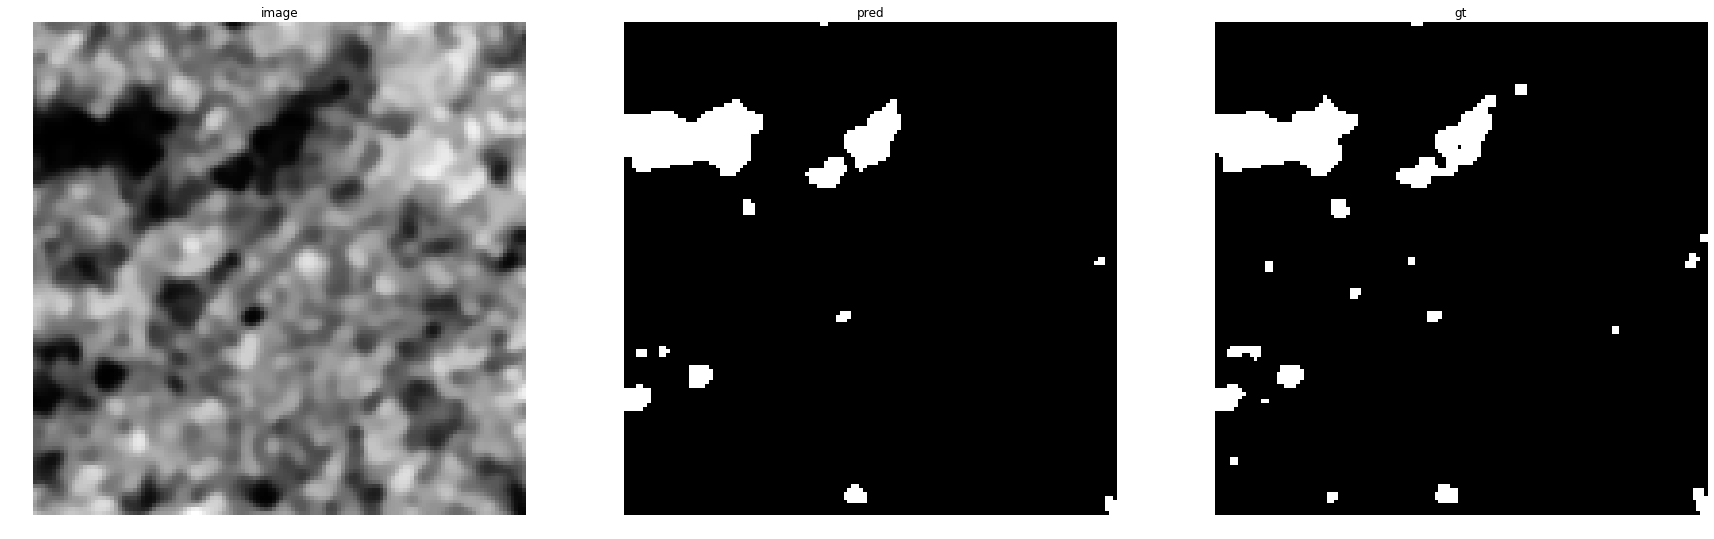

accuracy    : 0.991943359375
precision   : 0.982373678025852
recall      : 0.8772298006295908
f1          : 0.926829268292683
pr_auc      : 0.987854551263712
iou         : 0.8636363636363636


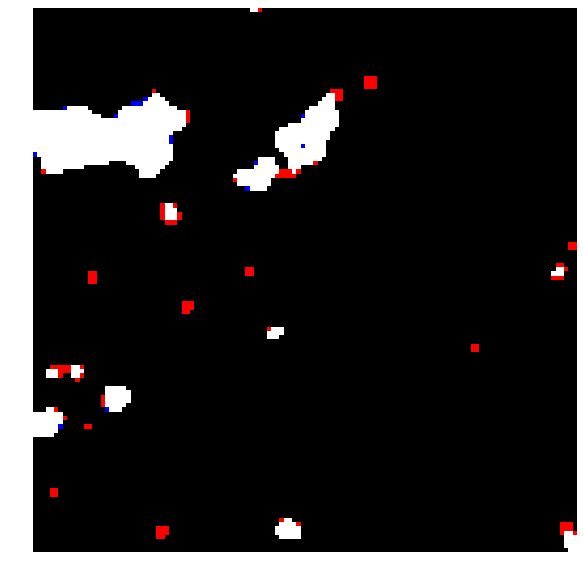

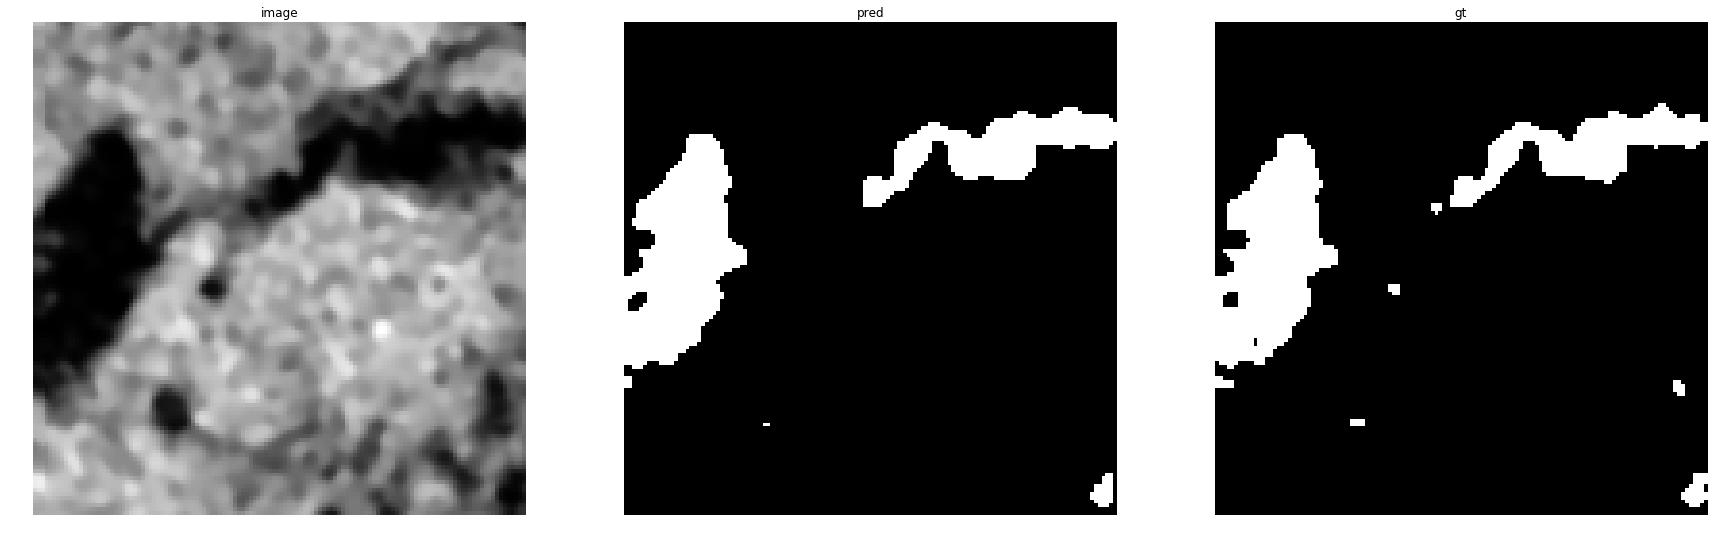

accuracy    : 0.99249267578125
precision   : 0.9696016771488469
recall      : 0.9660574412532638
f1          : 0.9678263144127649
pr_auc      : 0.9972735975320373
iou         : 0.937658388241257


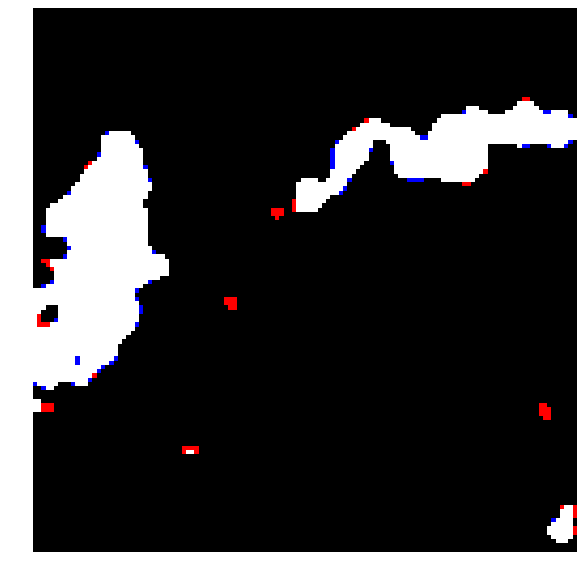

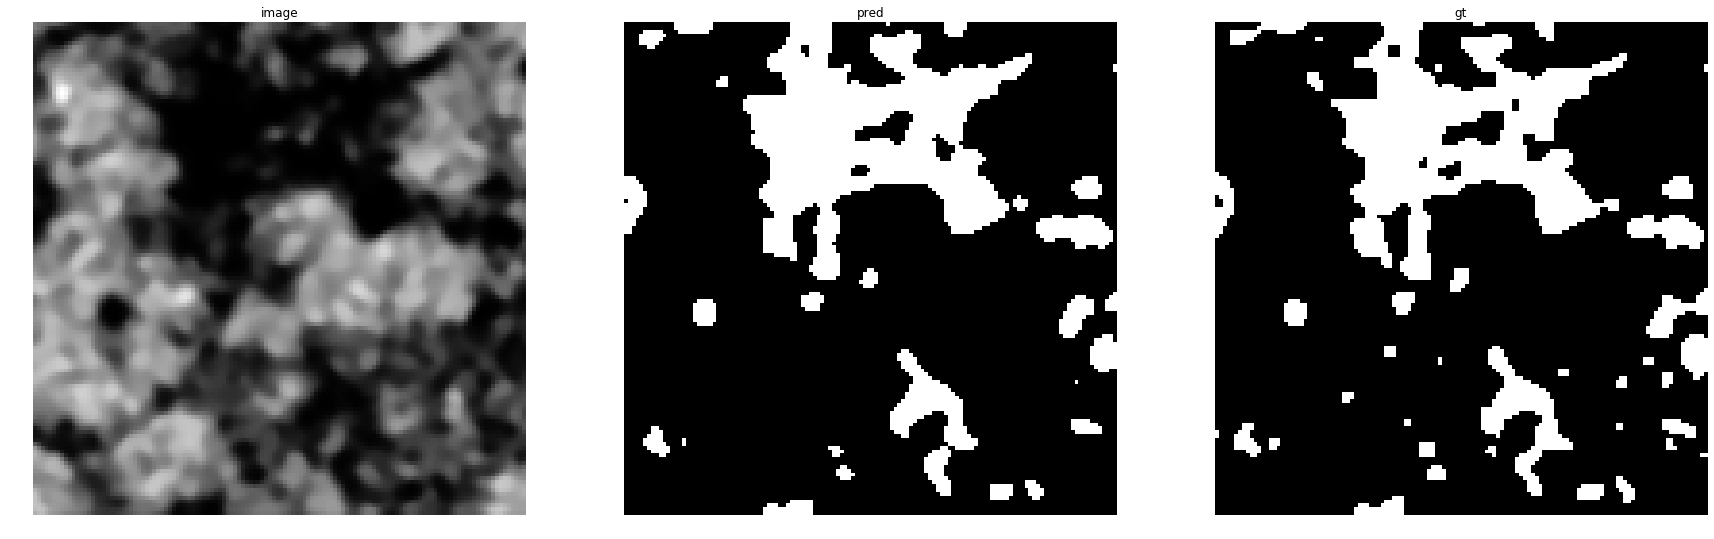

accuracy    : 0.970947265625
precision   : 0.9257381449448255
recall      : 0.9318522966076254
f1          : 0.9287851585876721
pr_auc      : 0.9858437726370336
iou         : 0.8670391061452514


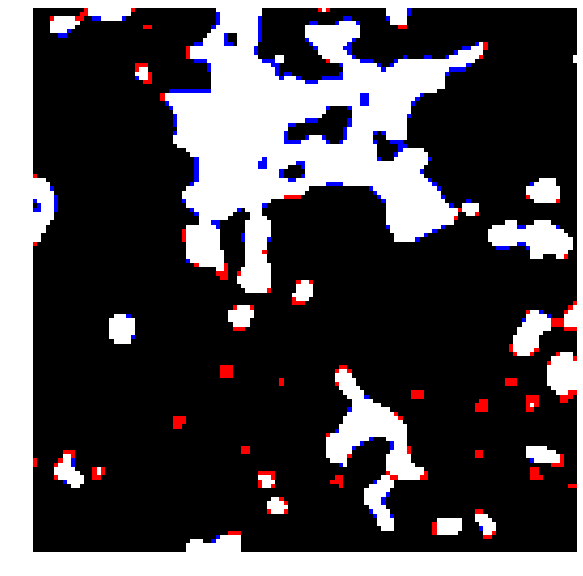

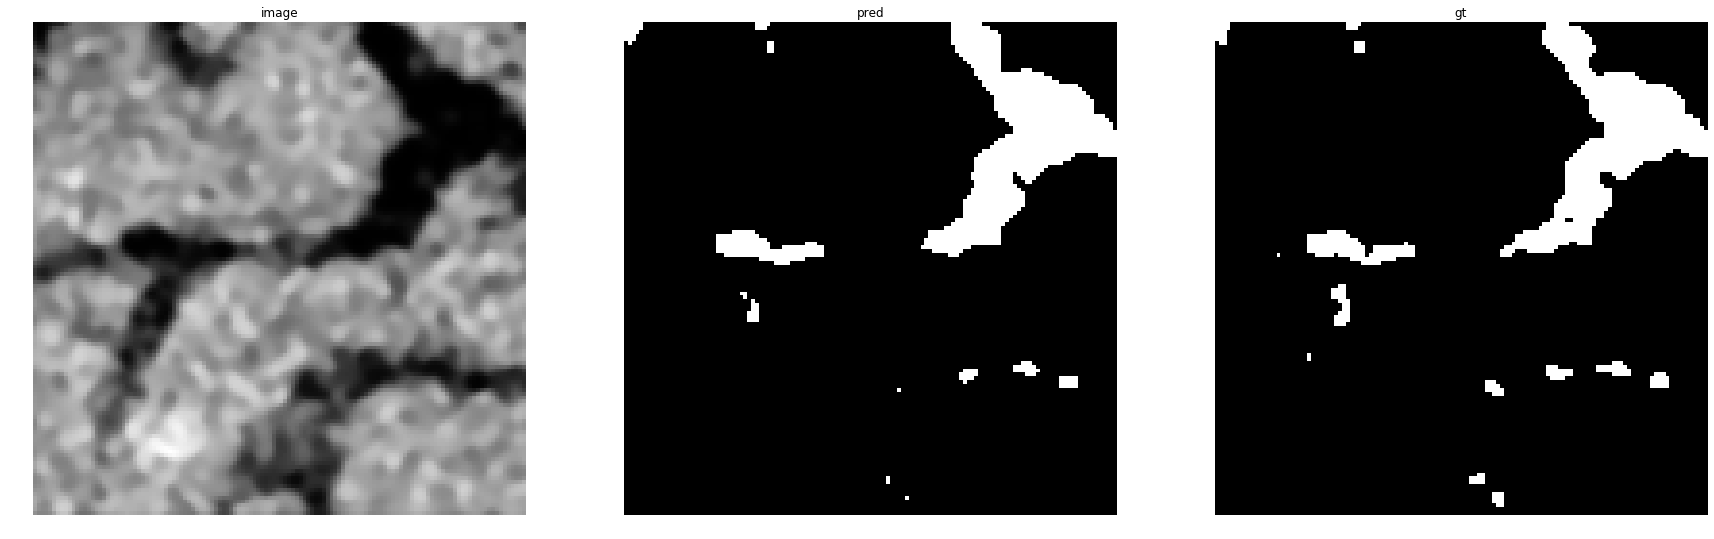

accuracy    : 0.9893798828125
precision   : 0.9380466472303207
recall      : 0.9353197674418605
f1          : 0.9366812227074236
pr_auc      : 0.9890713828072389
iou         : 0.8809034907597536


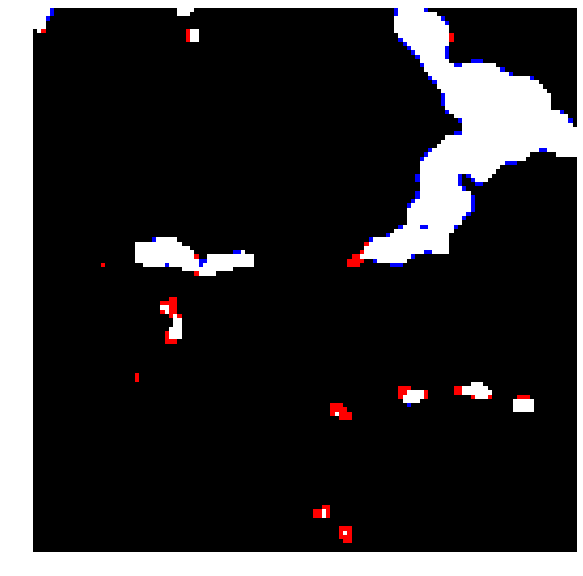

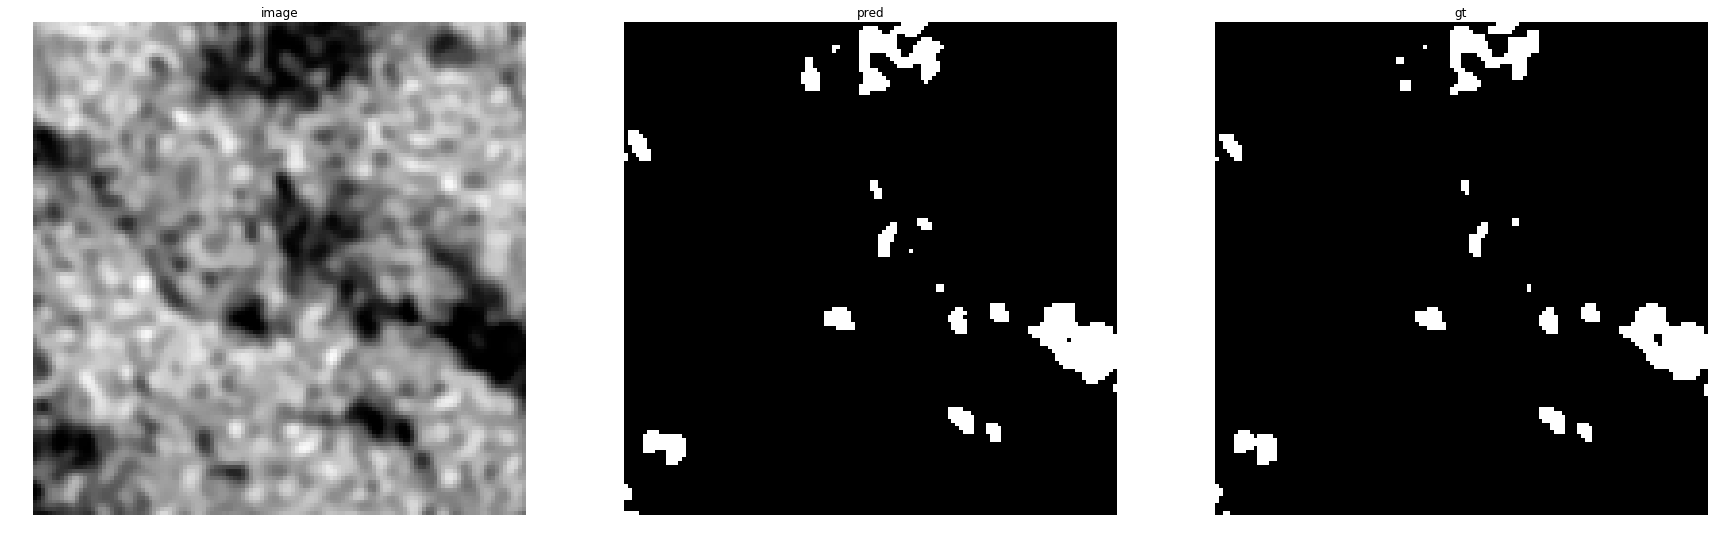

accuracy    : 0.99273681640625
precision   : 0.8871733966745843
recall      : 0.9688715953307393
f1          : 0.9262244265344081
pr_auc      : 0.9897385490860434
iou         : 0.8625866050808314


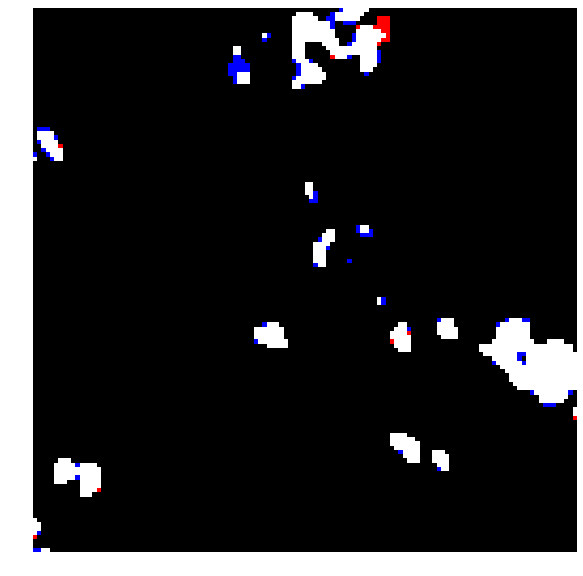

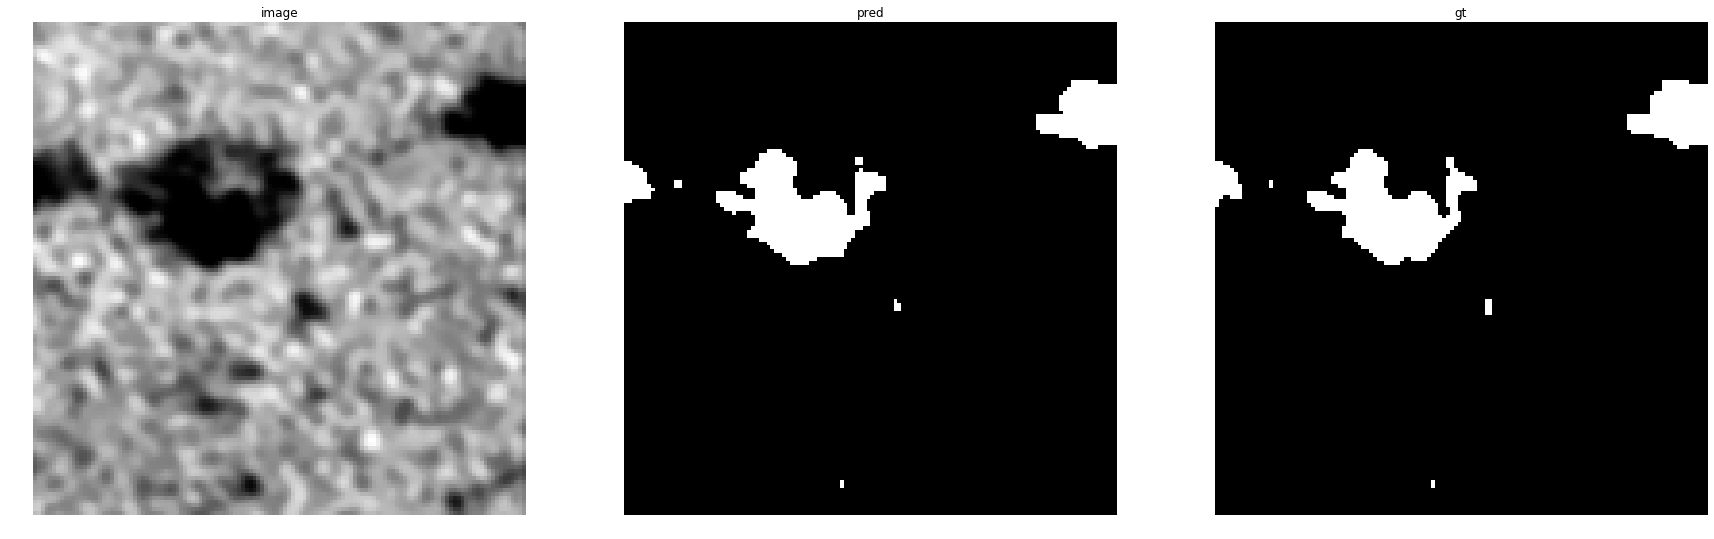

accuracy    : 0.99725341796875
precision   : 0.9671794871794872
recall      : 0.9864016736401674
f1          : 0.9766960124287933
pr_auc      : 0.9983796560509872
iou         : 0.9544534412955465


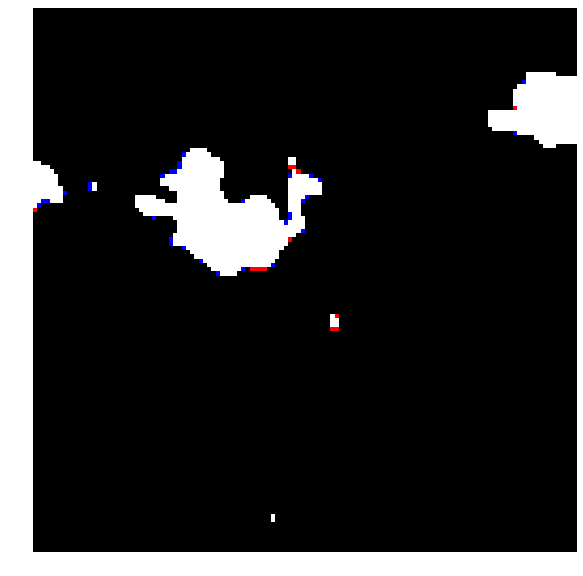

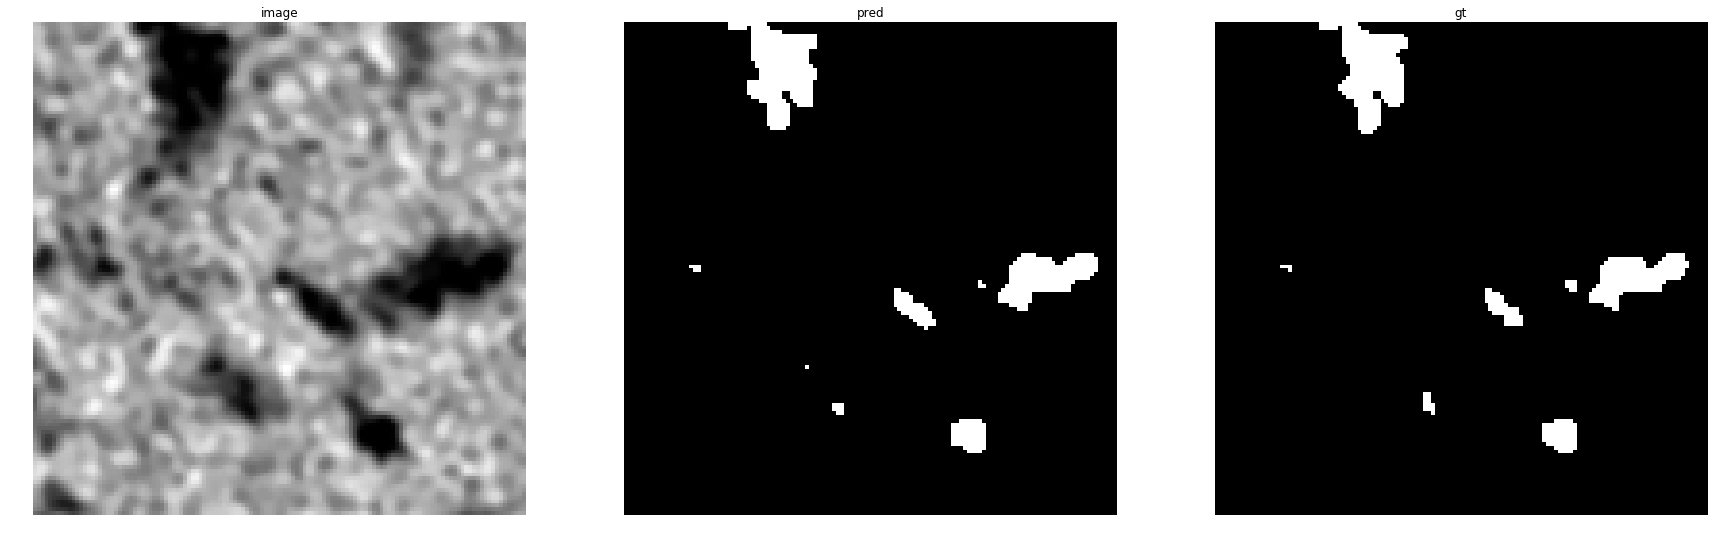

accuracy    : 0.99639892578125
precision   : 0.9442896935933147
recall      : 0.9727403156384505
f1          : 0.9583038869257952
pr_auc      : 0.996043859176569
iou         : 0.9199457259158752


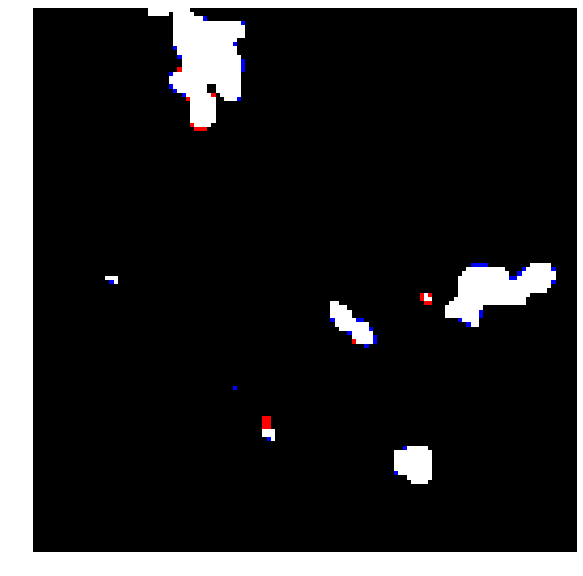

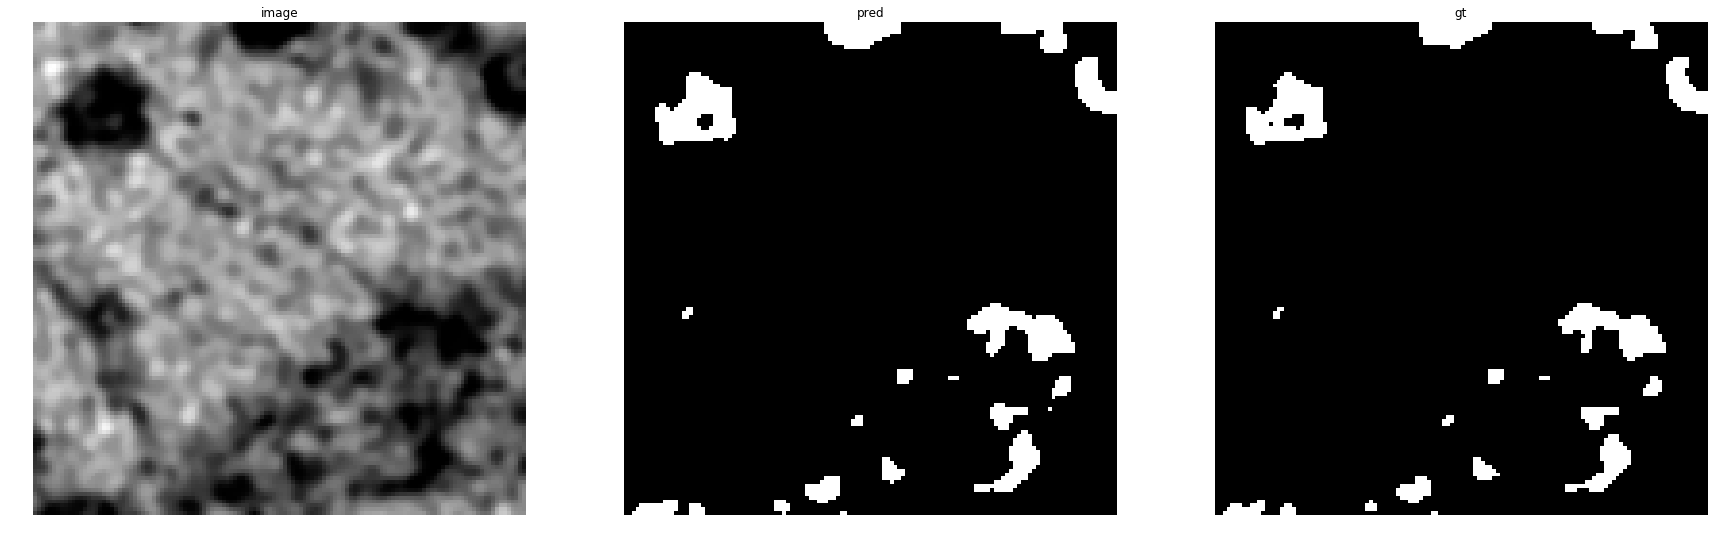

accuracy    : 0.9935302734375
precision   : 0.9144676979071884
recall      : 0.9882005899705014
f1          : 0.9499054820415879
pr_auc      : 0.9957451970182771
iou         : 0.9045904590459046


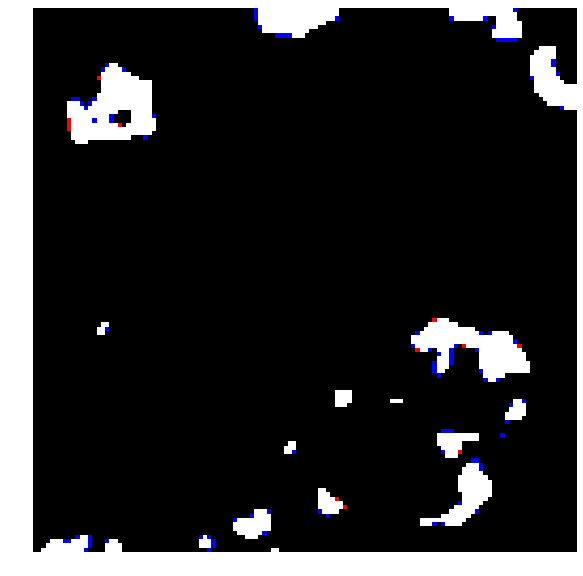

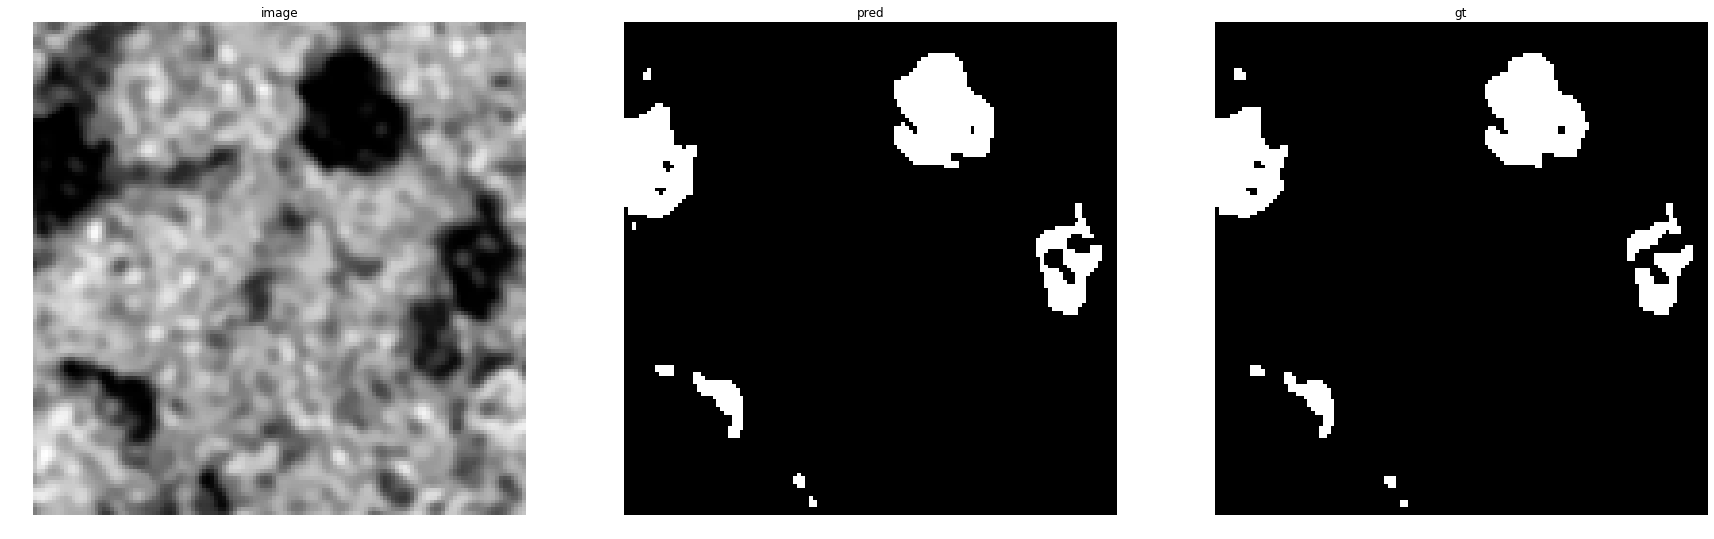

accuracy    : 0.994873046875
precision   : 0.9454001495886313
recall      : 0.9913725490196078
f1          : 0.9678407350689127
pr_auc      : 0.9976146306809687
iou         : 0.9376854599406528


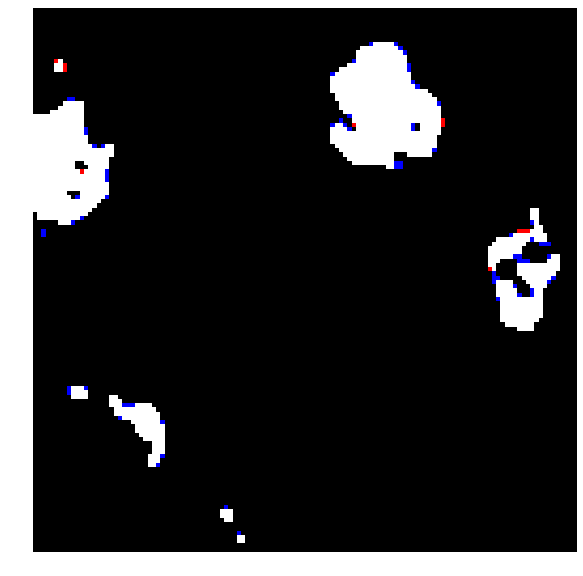

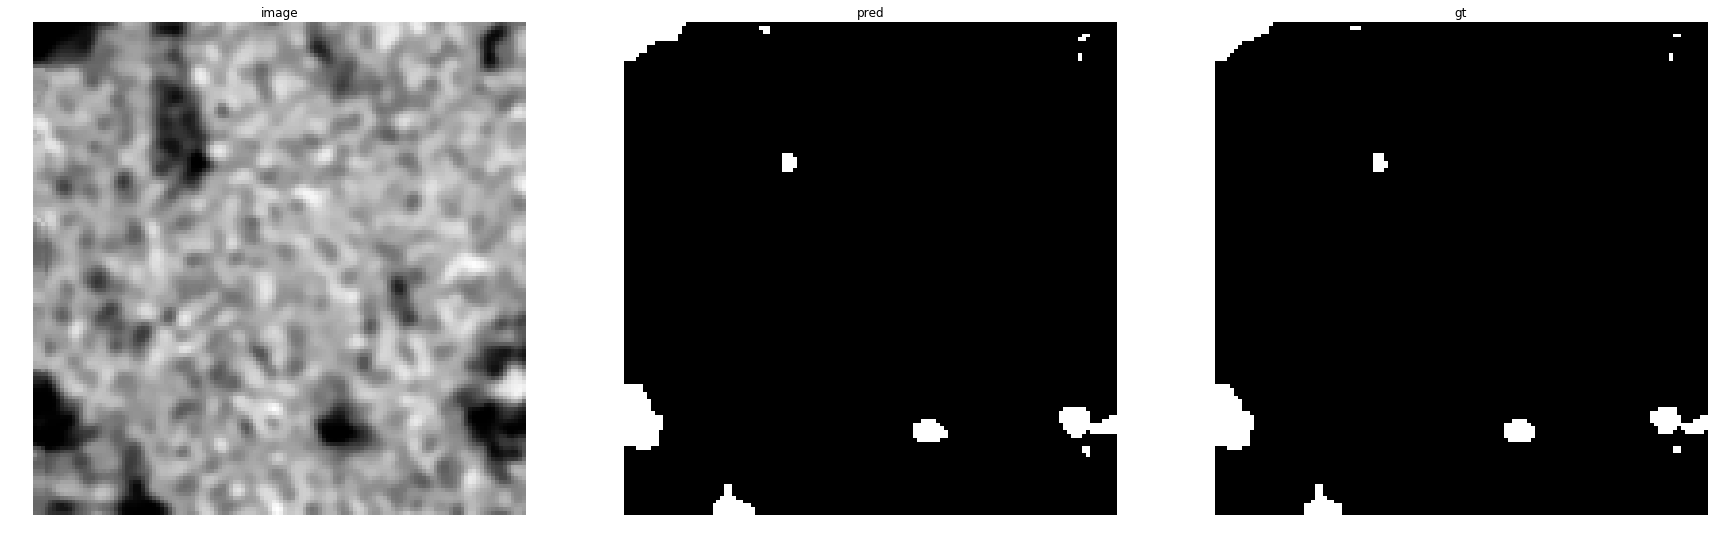

accuracy    : 0.997802734375
precision   : 0.919908466819222
recall      : 0.9975186104218362
f1          : 0.9571428571428571
pr_auc      : 0.998234725125984
iou         : 0.9178082191780822


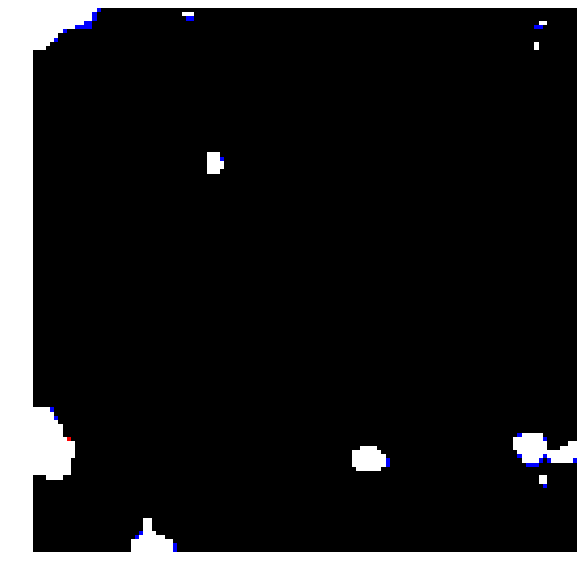

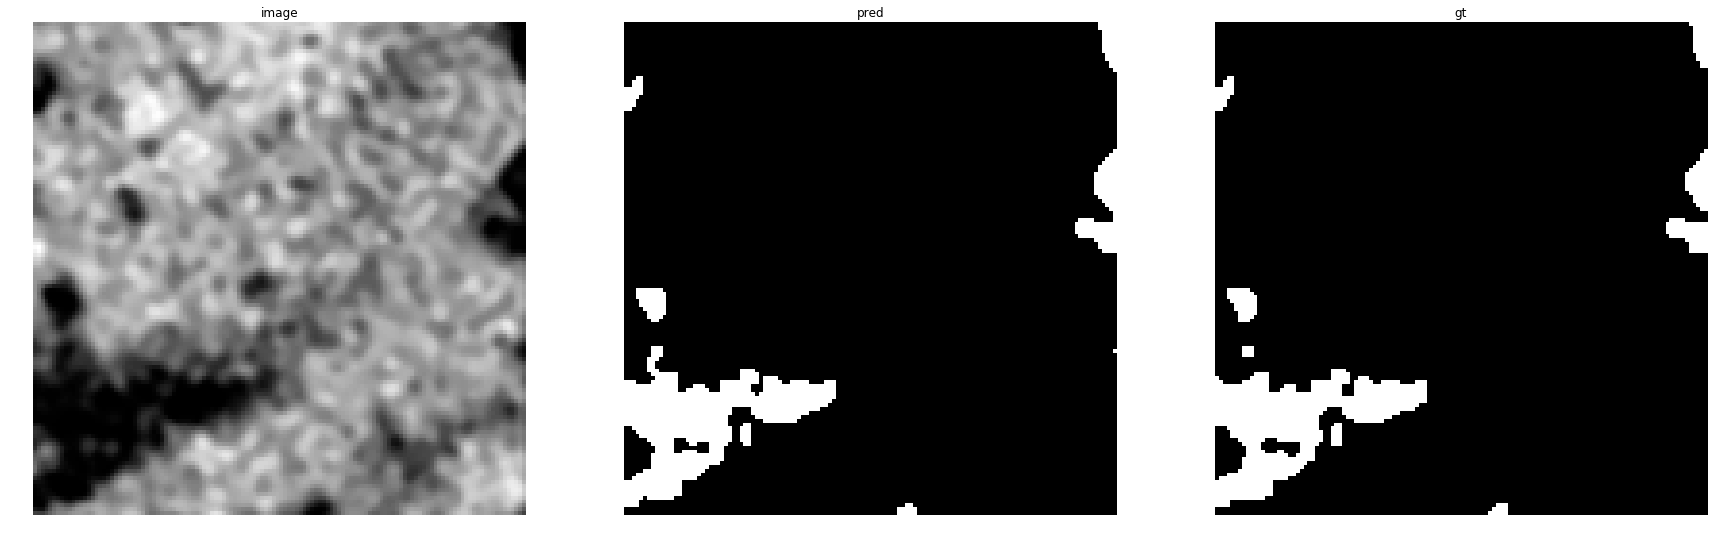

accuracy    : 0.99615478515625
precision   : 0.9586435070306039
recall      : 0.9889078498293515
f1          : 0.9735405291894162
pr_auc      : 0.9982892597309883
iou         : 0.9484451718494271


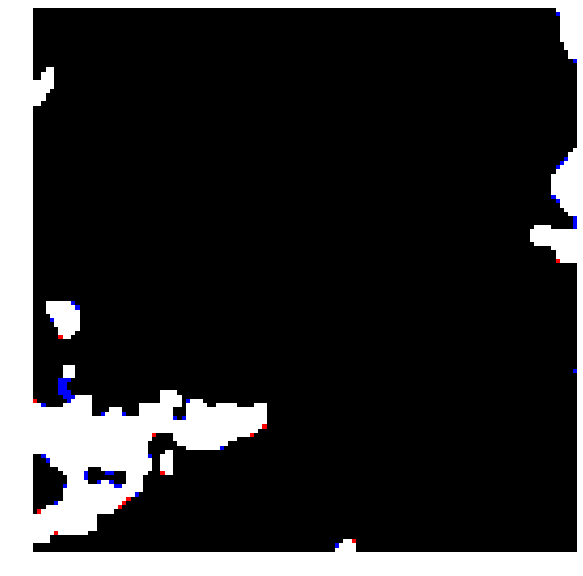

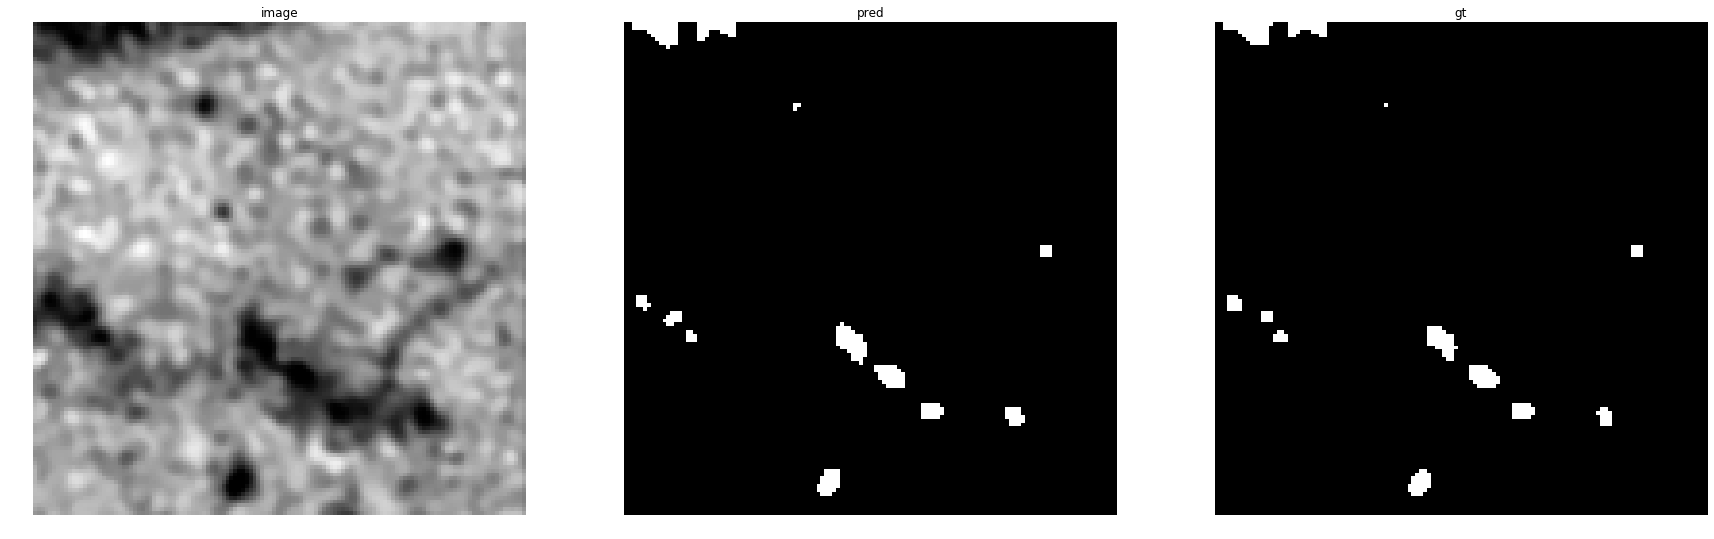

accuracy    : 0.99774169921875
precision   : 0.9047619047619048
recall      : 0.9672727272727273
f1          : 0.9349736379613357
pr_auc      : 0.9901951277399018
iou         : 0.8778877887788779


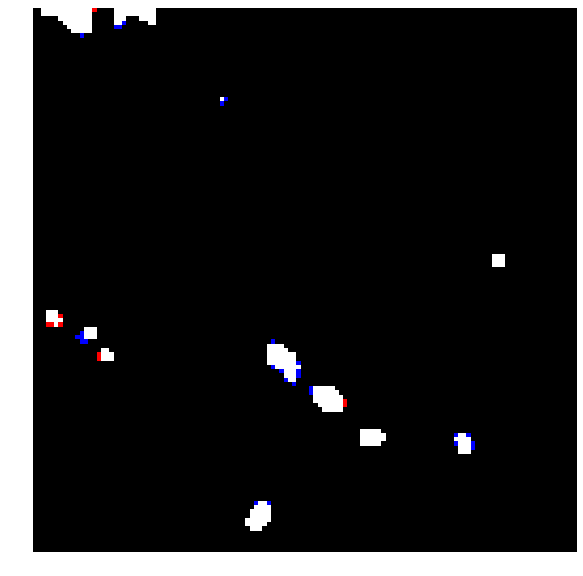

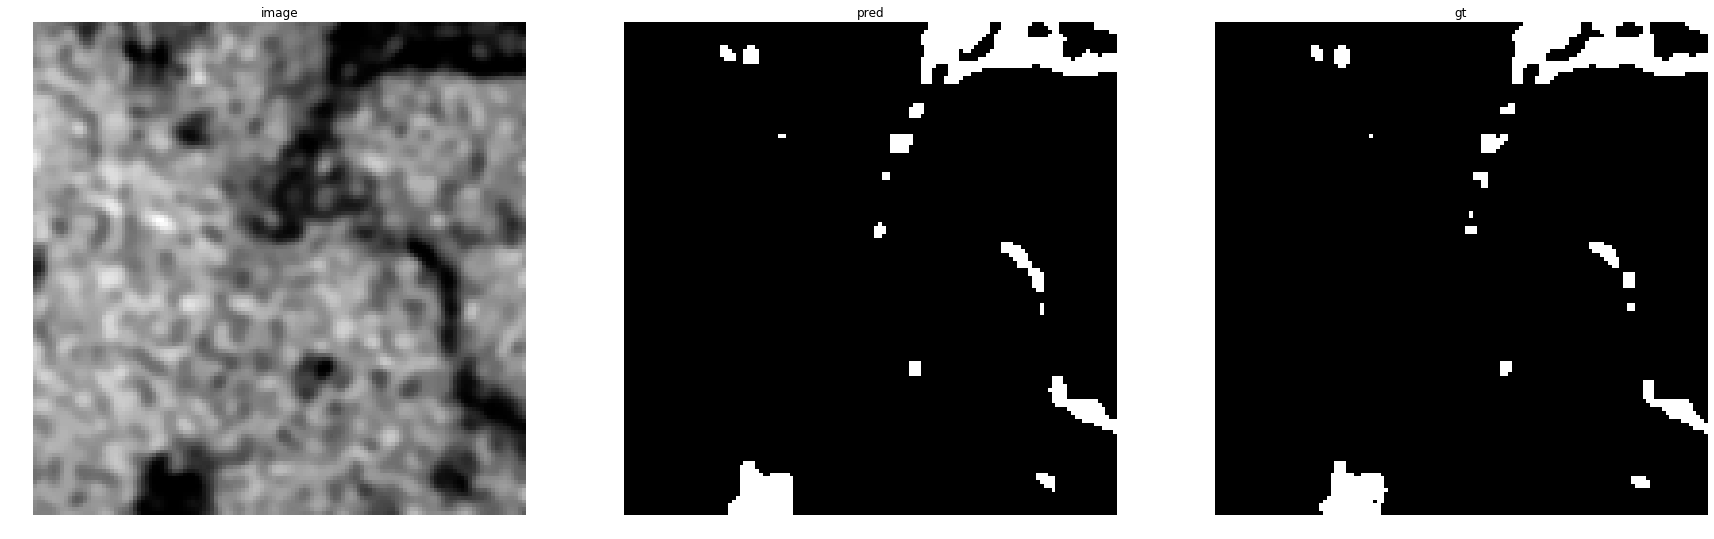

accuracy    : 0.99346923828125
precision   : 0.9078242229367631
recall      : 0.9758064516129032
f1          : 0.9405885619100499
pr_auc      : 0.9925033809918994
iou         : 0.8878406708595388


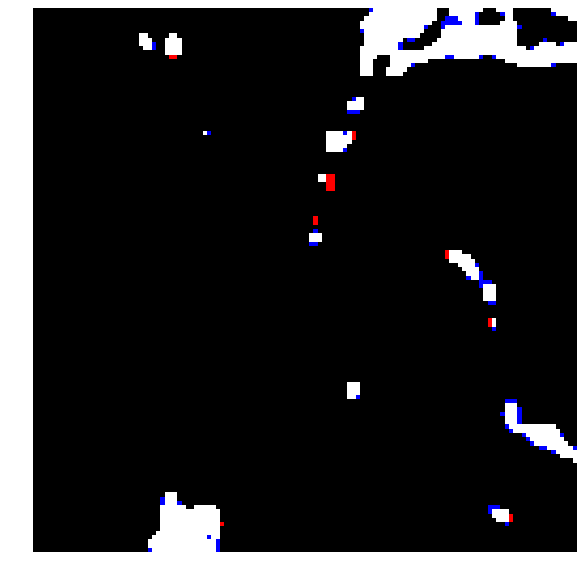

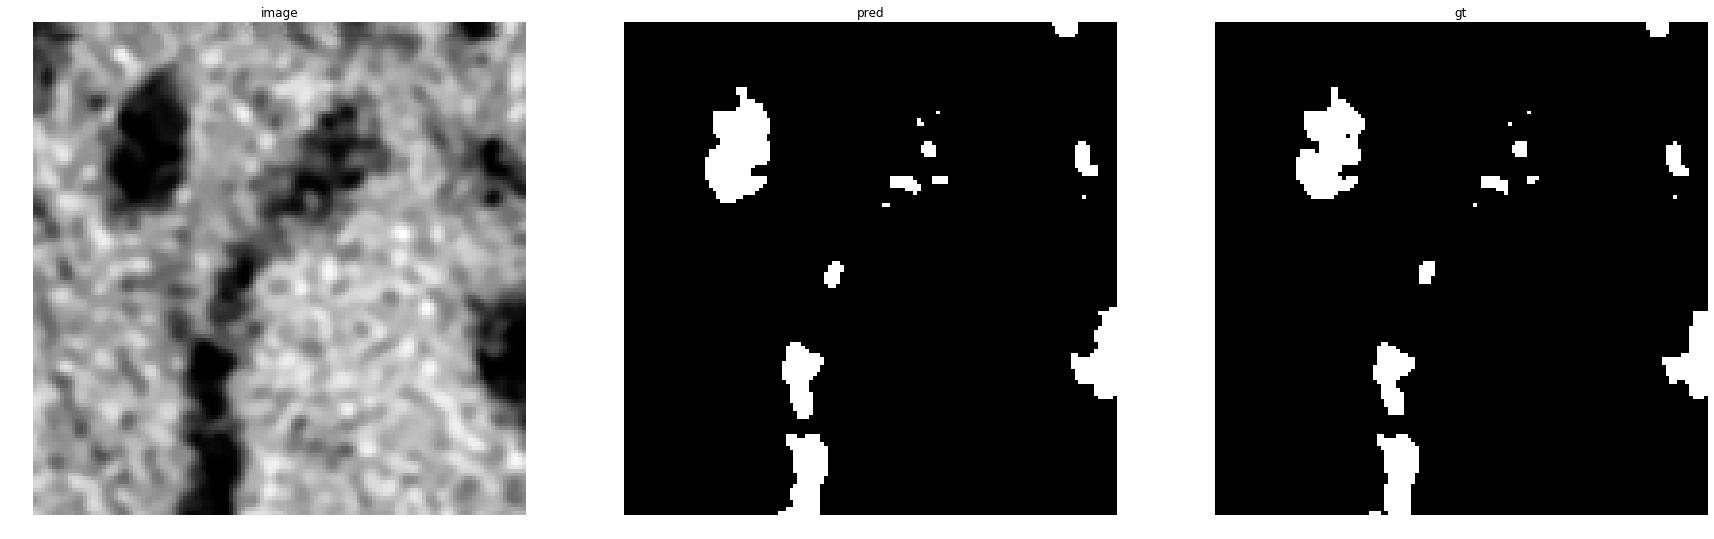

accuracy    : 0.99456787109375
precision   : 0.915625
recall      : 0.9909808342728298
f1          : 0.9518137520303195
pr_auc      : 0.995740588839299
iou         : 0.9080578512396694


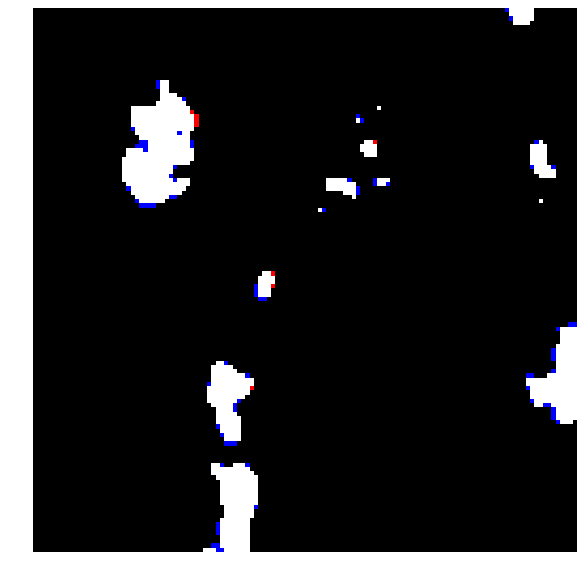

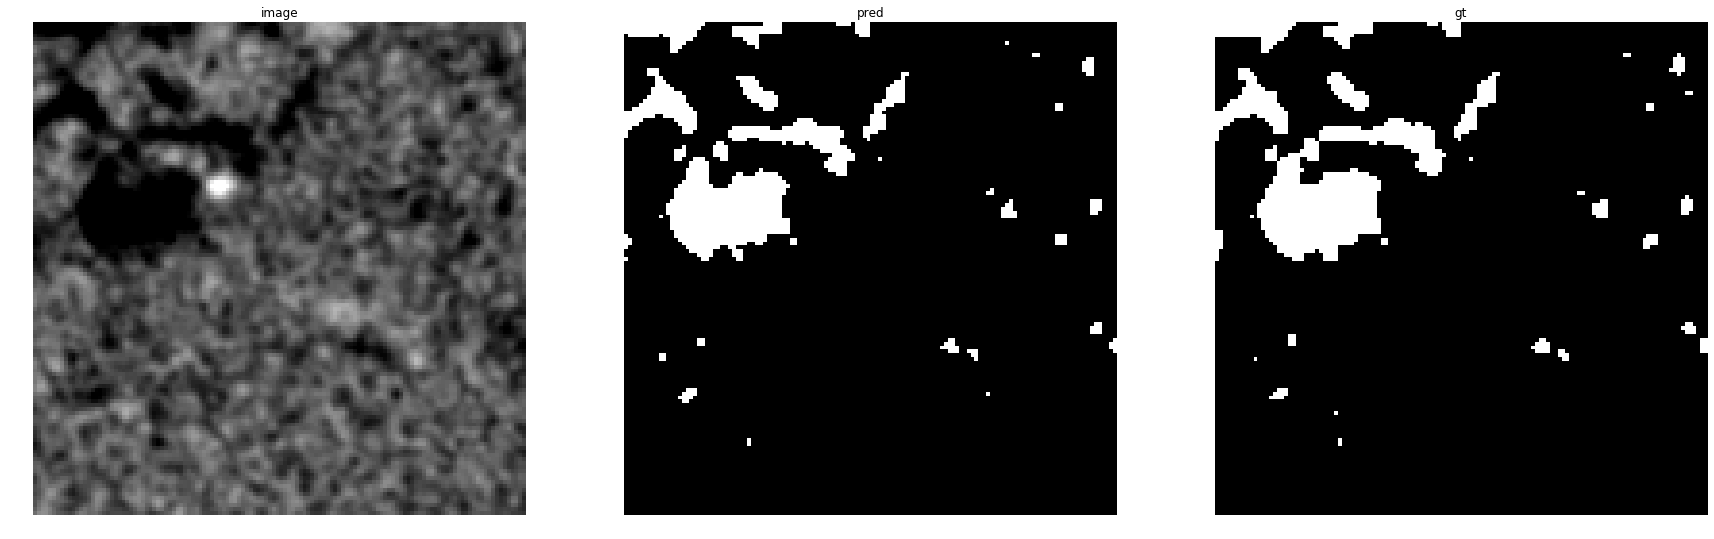

accuracy    : 0.99078369140625
precision   : 0.9877582249426167
recall      : 0.9053295932678822
f1          : 0.9447493596780095
pr_auc      : 0.9936049713150739
iou         : 0.8952843273231623


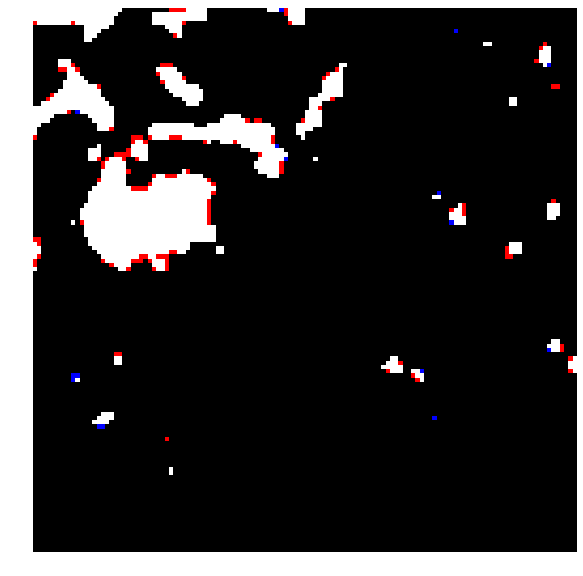

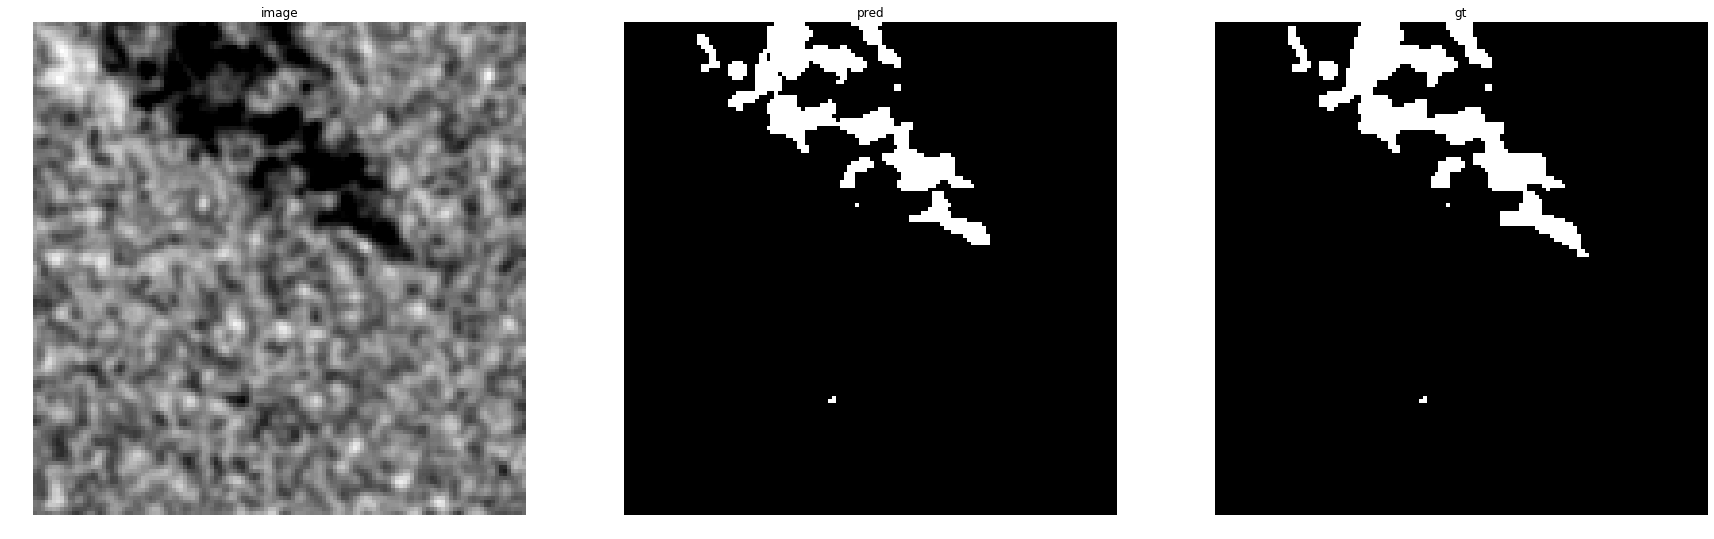

accuracy    : 0.99102783203125
precision   : 0.9979508196721312
recall      : 0.870420017873101
f1          : 0.9298329355608592
pr_auc      : 0.9962334741457322
iou         : 0.8688670829616414


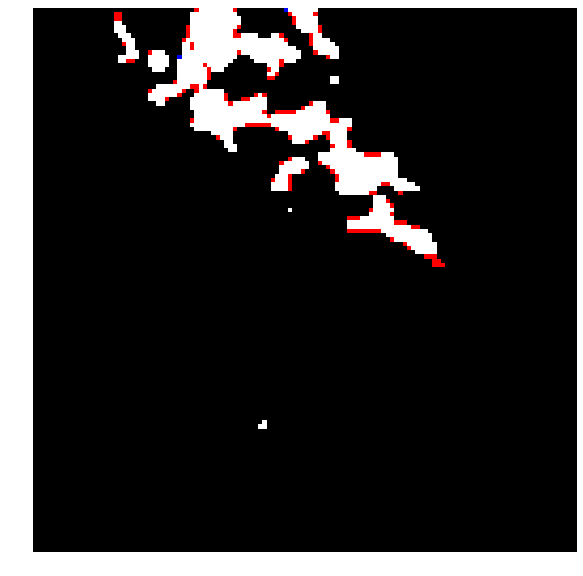

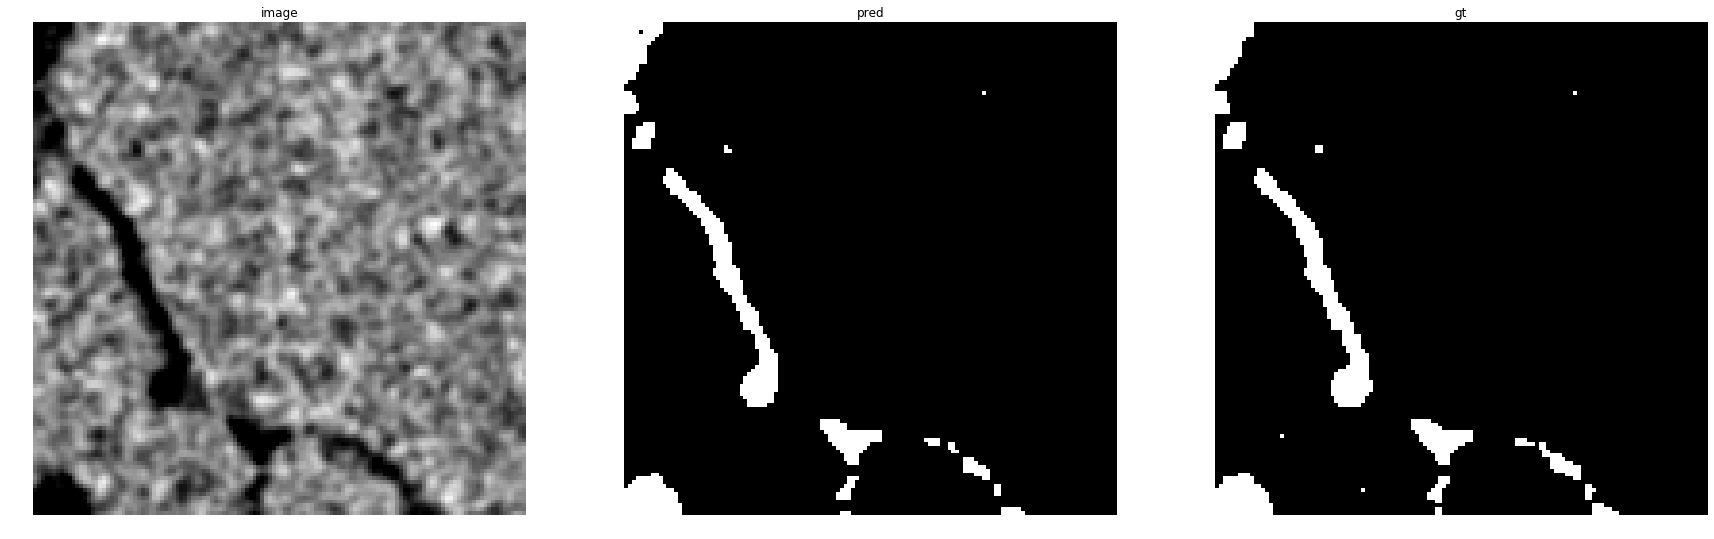

accuracy    : 0.99560546875
precision   : 0.9962168978562421
recall      : 0.919674039580908
f1          : 0.9564164648910412
pr_auc      : 0.9967036182937652
iou         : 0.9164733178654292


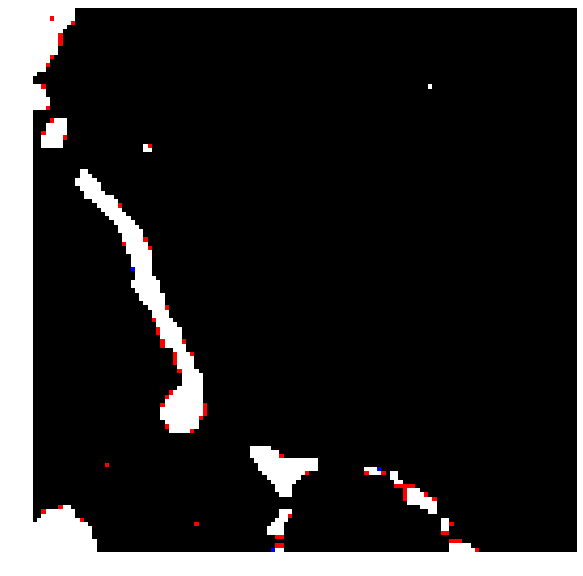

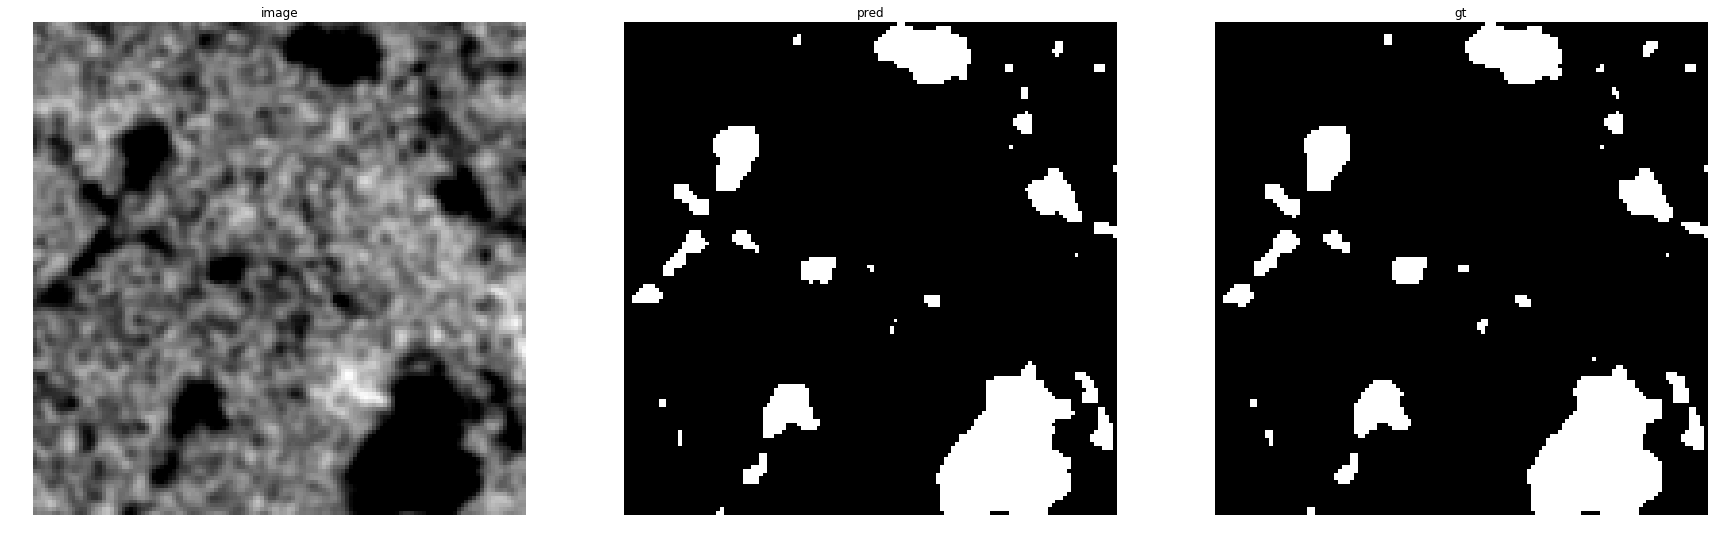

accuracy    : 0.99407958984375
precision   : 0.9906542056074766
recall      : 0.9627151051625239
f1          : 0.9764848484848484
pr_auc      : 0.9981744539294307
iou         : 0.9540502131691142


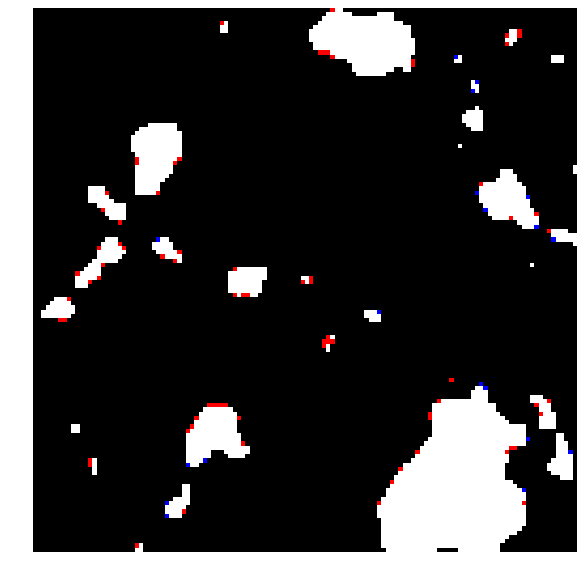

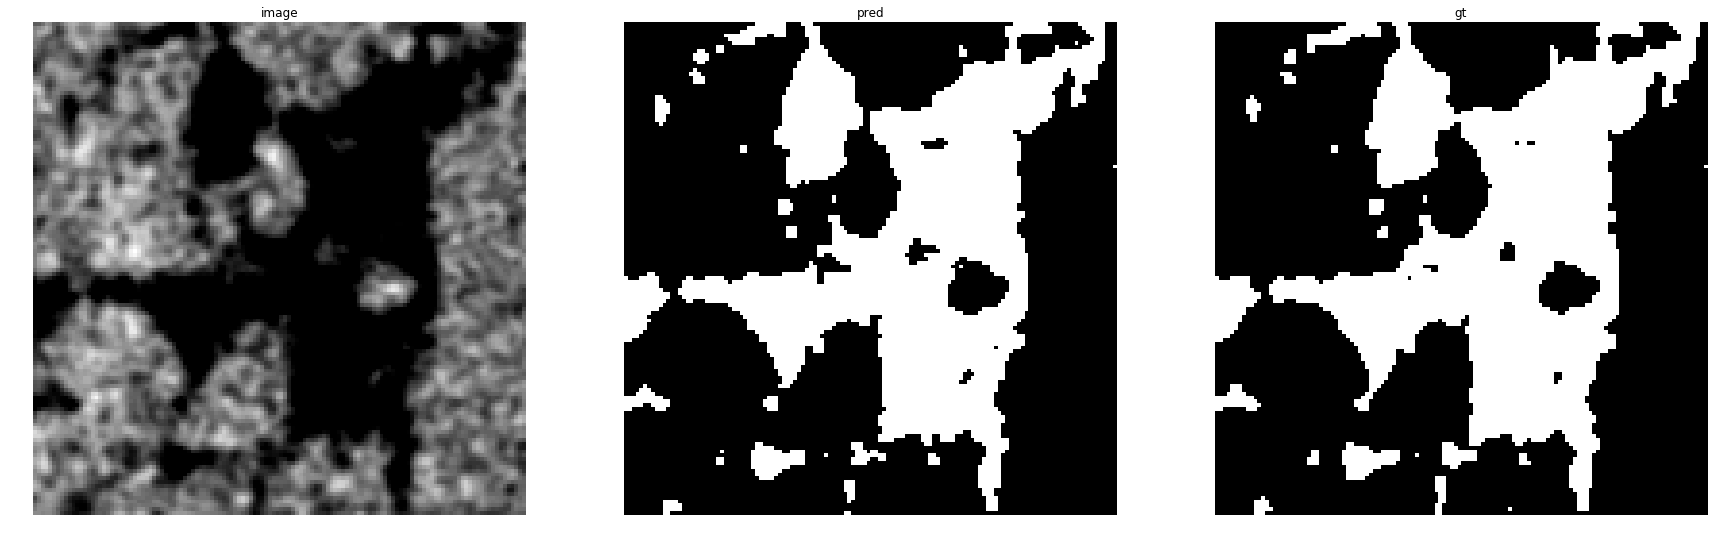

accuracy    : 0.98297119140625
precision   : 0.9961089494163424
recall      : 0.9542066027689031
f1          : 0.9747076420995376
pr_auc      : 0.9987082341704125
iou         : 0.9506631299734748


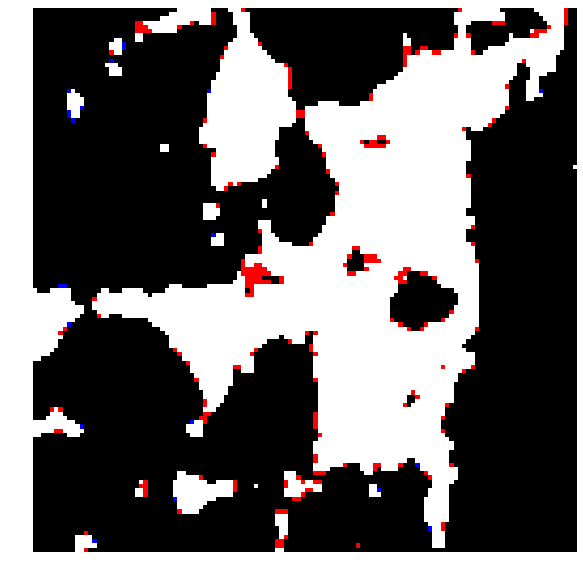

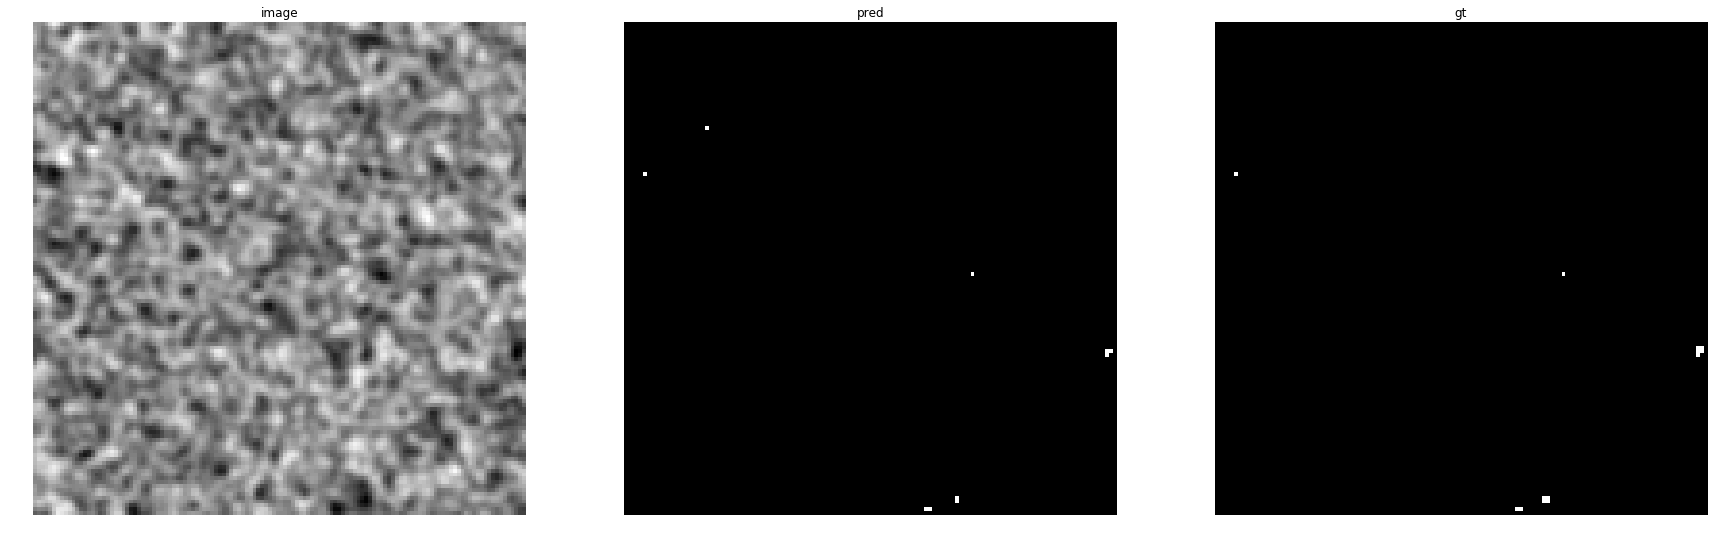

accuracy    : 0.99969482421875
precision   : 0.9
recall      : 0.6923076923076923
f1          : 0.7826086956521738
pr_auc      : 0.8459706959706959
iou         : 0.6428571428571429


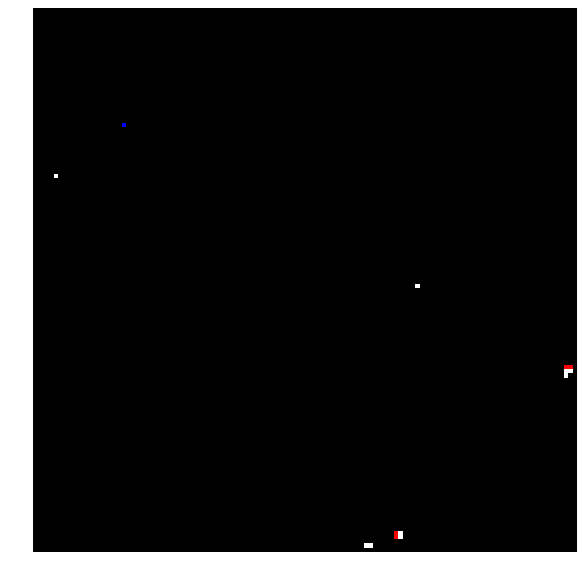

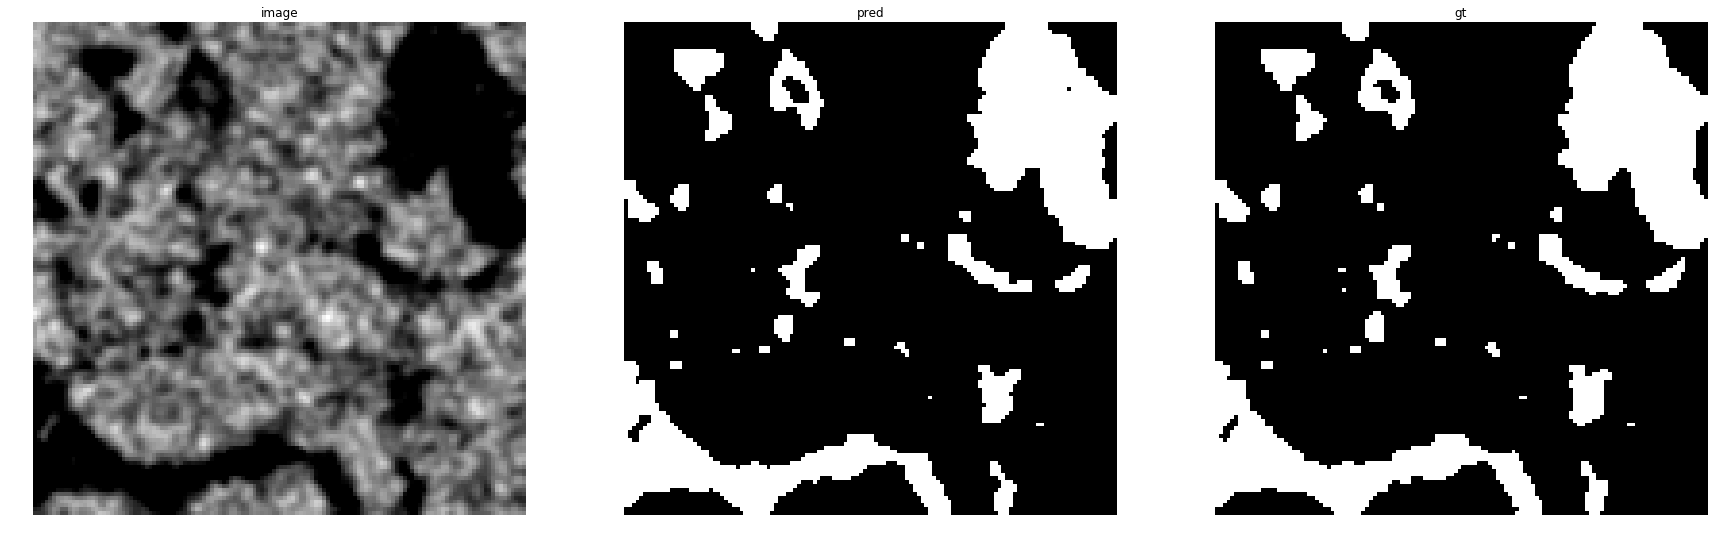

accuracy    : 0.98785400390625
precision   : 0.9964973730297724
recall      : 0.9480699805609553
f1          : 0.9716806603102319
pr_auc      : 0.9987776232210257
iou         : 0.9449211181843343


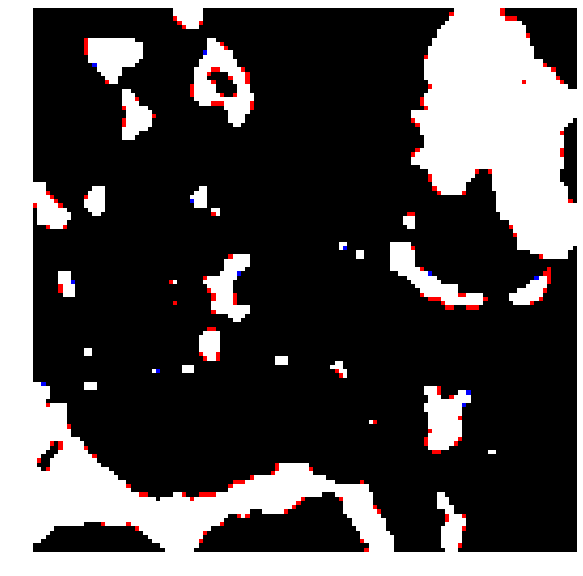

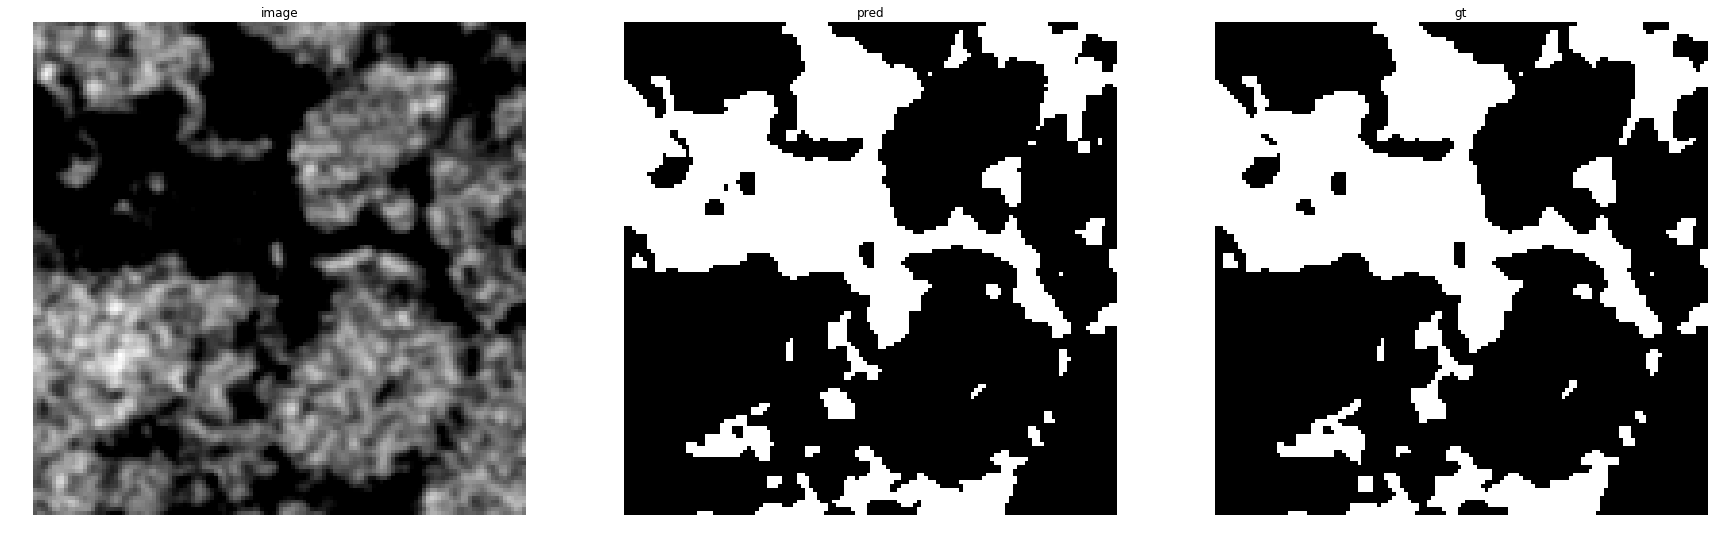

accuracy    : 0.98065185546875
precision   : 0.9972268441486412
recall      : 0.9469803370786517
f1          : 0.9714542998649258
pr_auc      : 0.9986500553627973
iou         : 0.9444930835230257


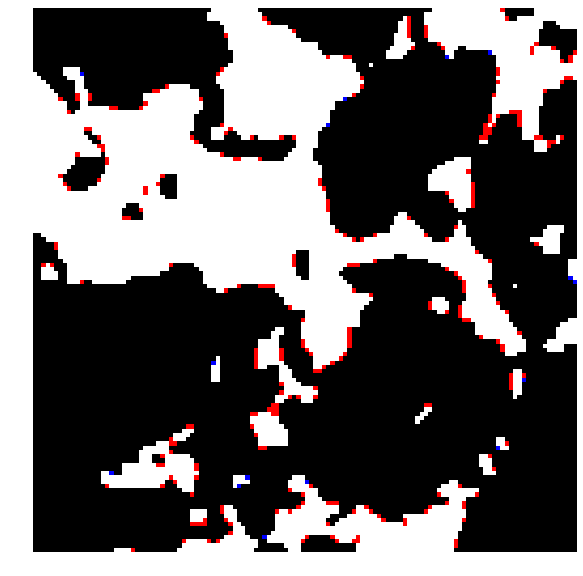

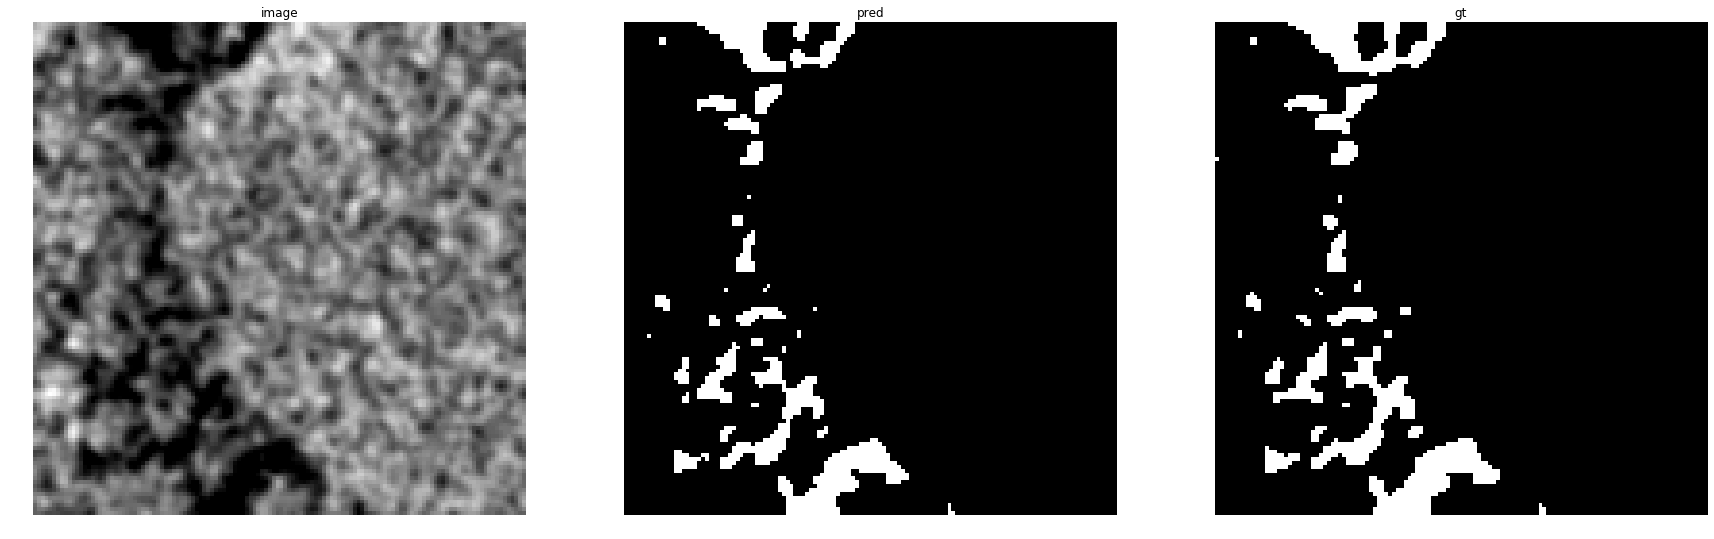

accuracy    : 0.98858642578125
precision   : 0.9927862939585211
recall      : 0.86015625
f1          : 0.9217245709501883
pr_auc      : 0.9907879827768296
iou         : 0.8548136645962733


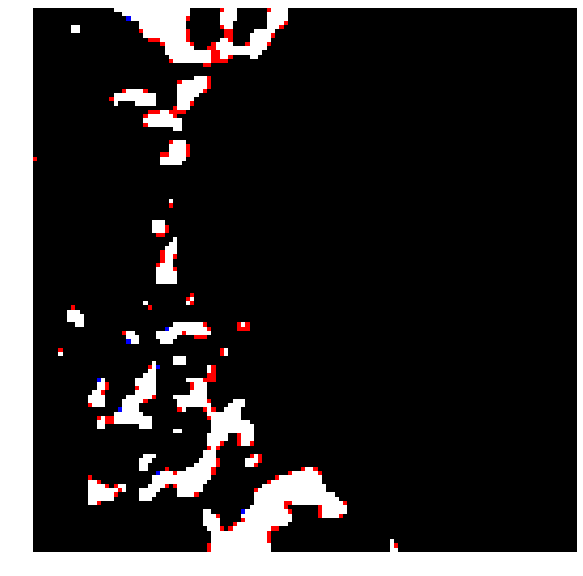

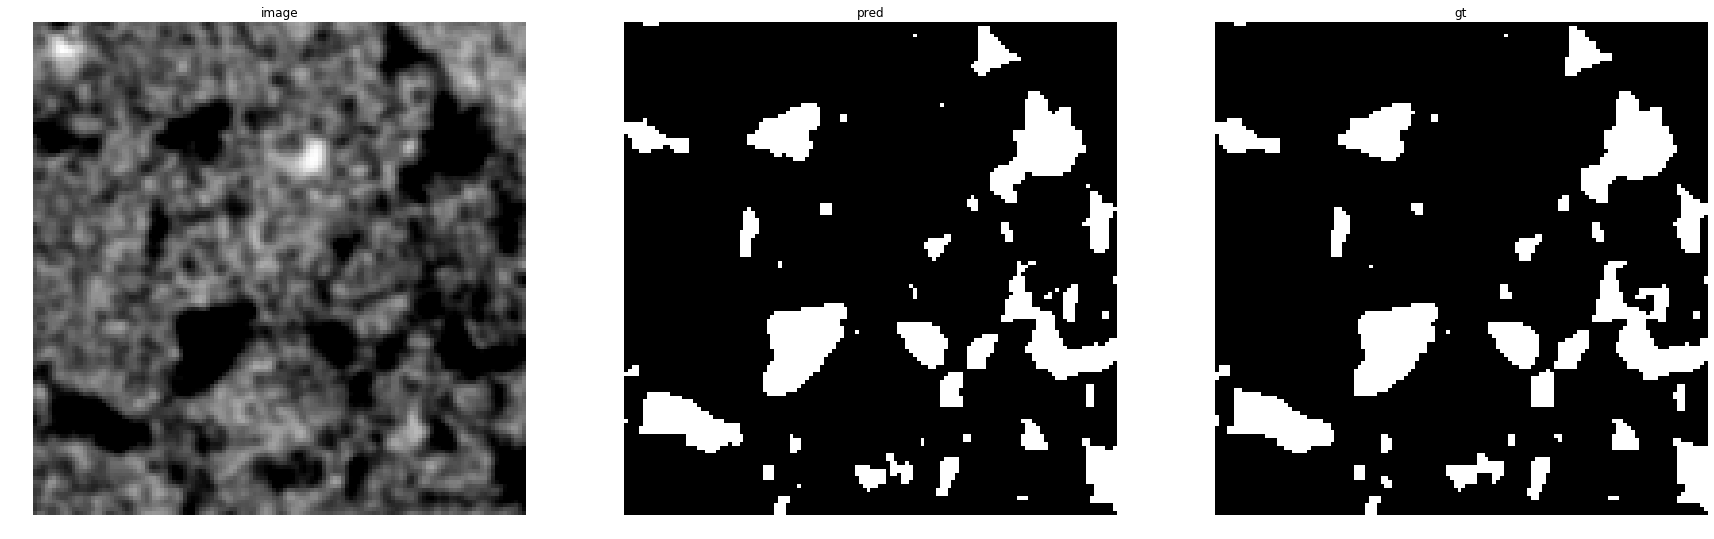

accuracy    : 0.98687744140625
precision   : 0.992738146091414
recall      : 0.9214908802537668
f1          : 0.9557886078552333
pr_auc      : 0.9953242378830477
iou         : 0.9153209925167388


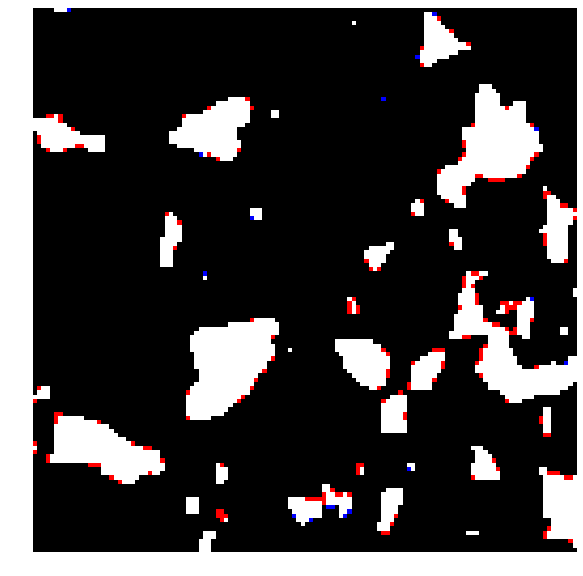

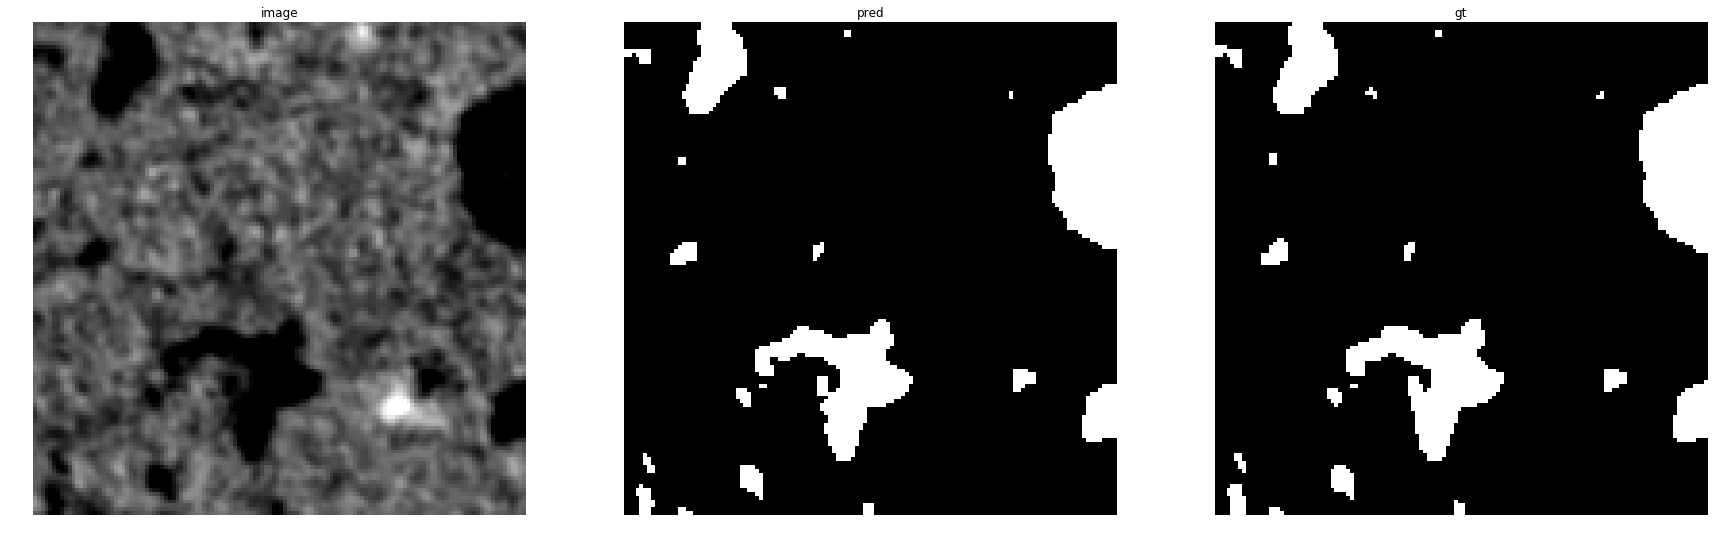

accuracy    : 0.9945068359375
precision   : 0.994988864142539
recall      : 0.9566381156316917
f1          : 0.9754366812227073
pr_auc      : 0.9984523182530125
iou         : 0.9520511454448588


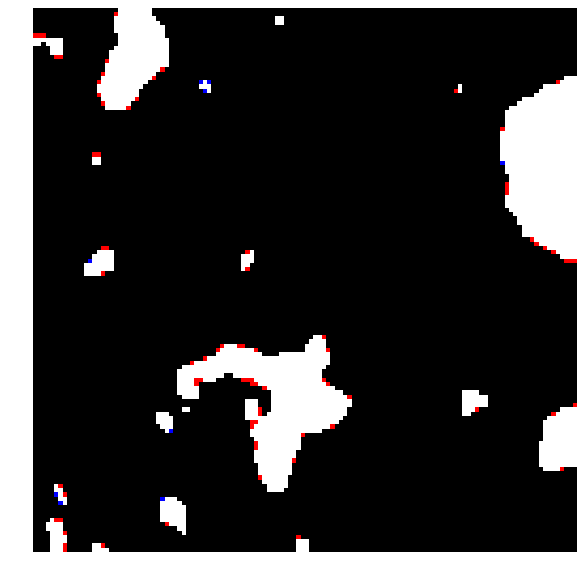

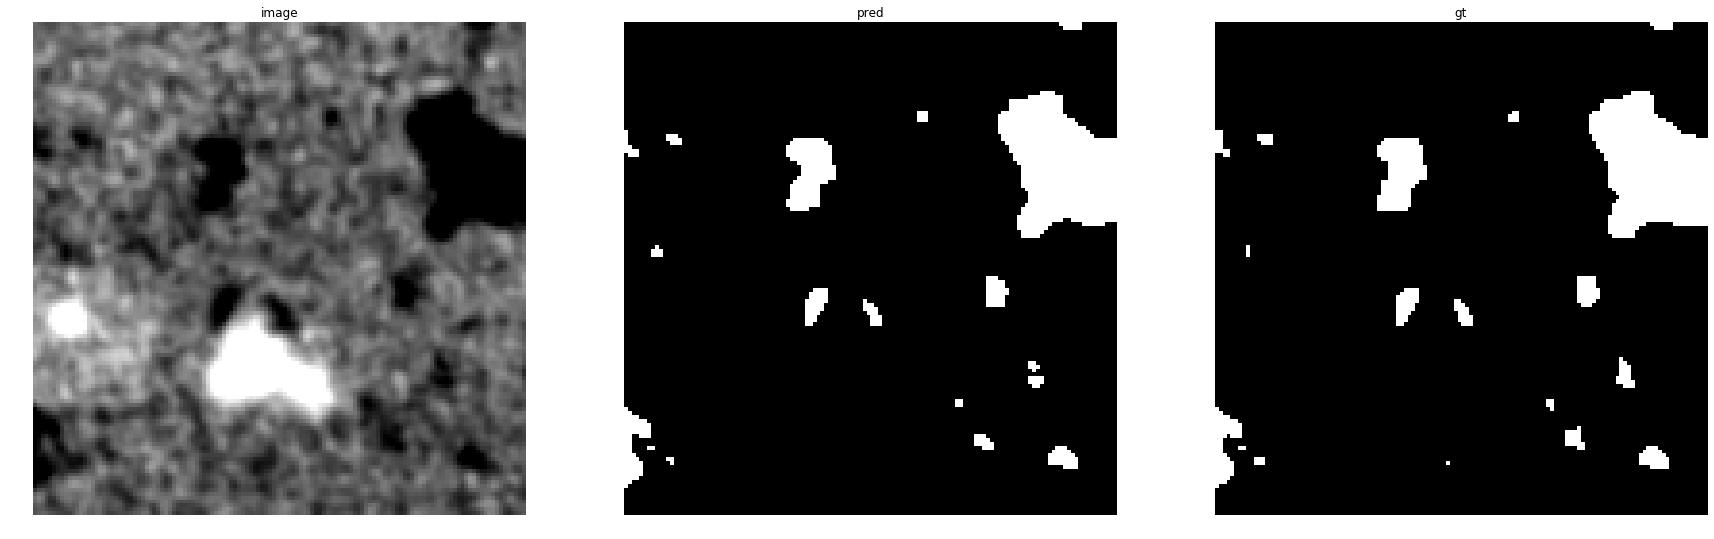

accuracy    : 0.99505615234375
precision   : 0.990625
recall      : 0.9483919222139118
f1          : 0.9690485288498281
pr_auc      : 0.9970776975507757
iou         : 0.9399555226093402


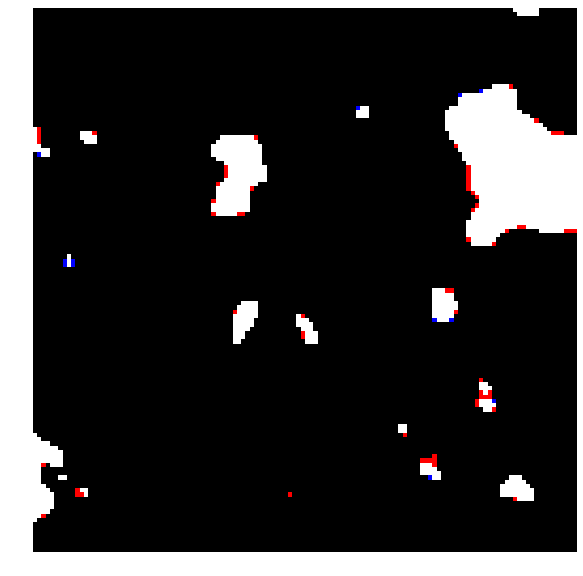

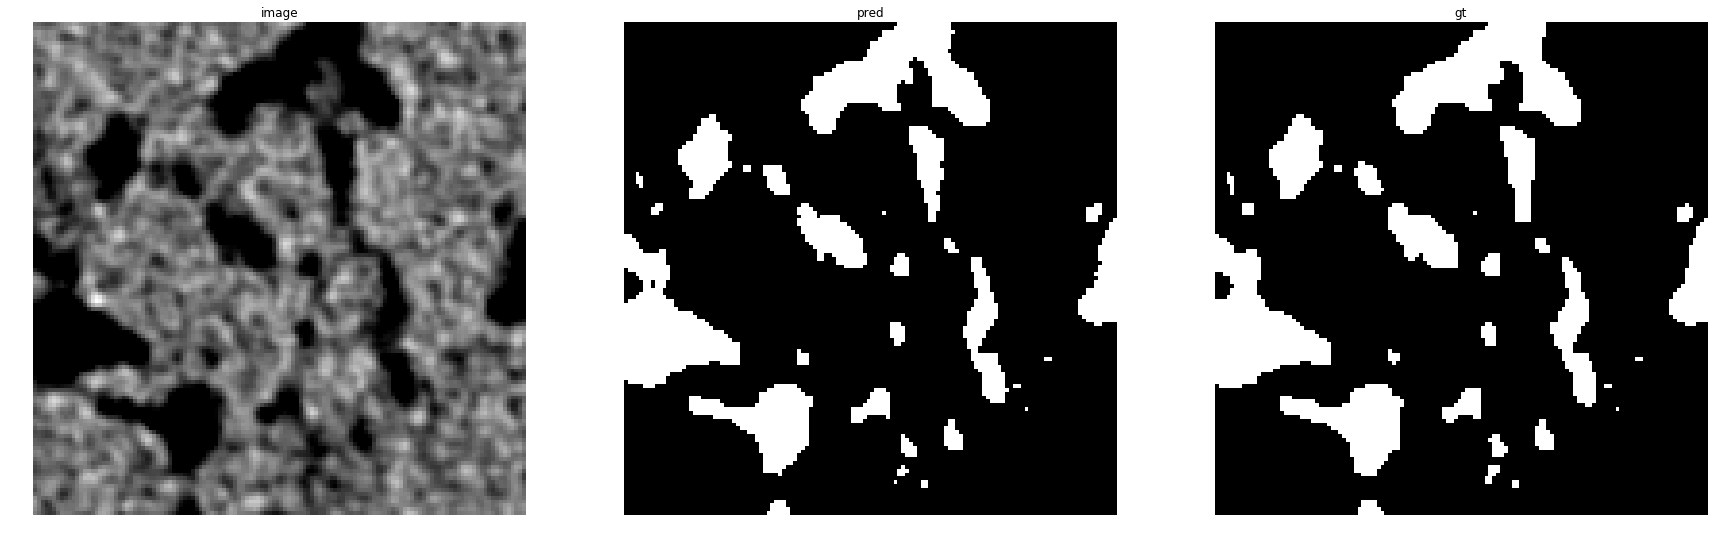

accuracy    : 0.9891357421875
precision   : 0.992790194664744
recall      : 0.9457417582417582
f1          : 0.9686950404502286
pr_auc      : 0.9984592262534082
iou         : 0.9392905866302865


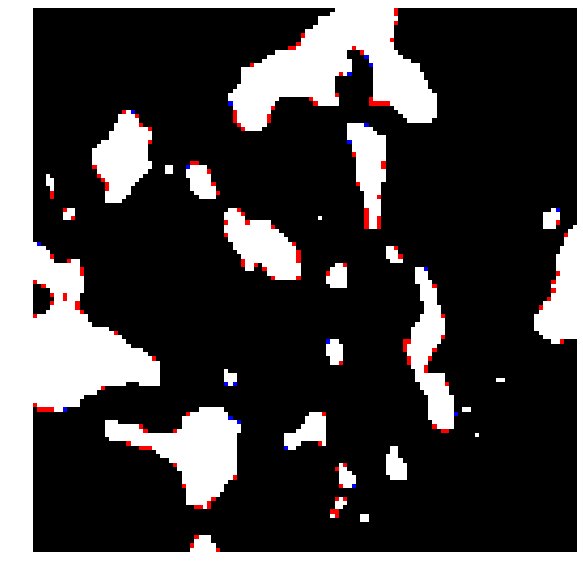

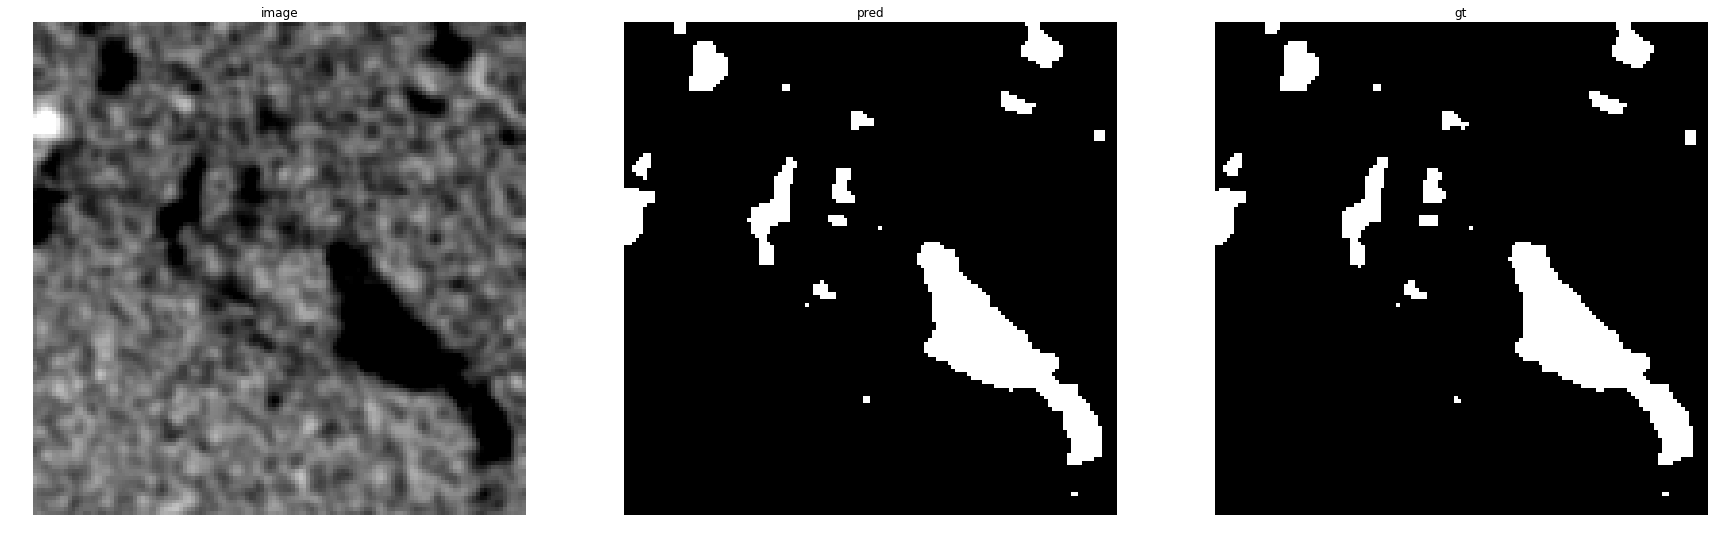

accuracy    : 0.99609375
precision   : 0.9896551724137931
recall      : 0.9669811320754716
f1          : 0.978186775732788
pr_auc      : 0.9982098377853268
iou         : 0.9573048699132756


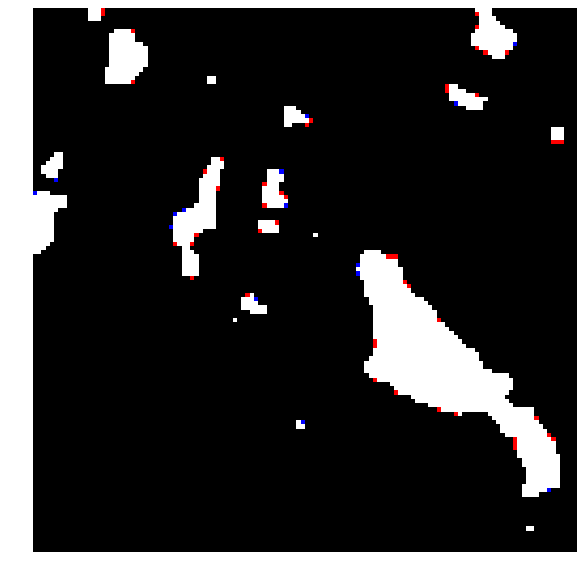

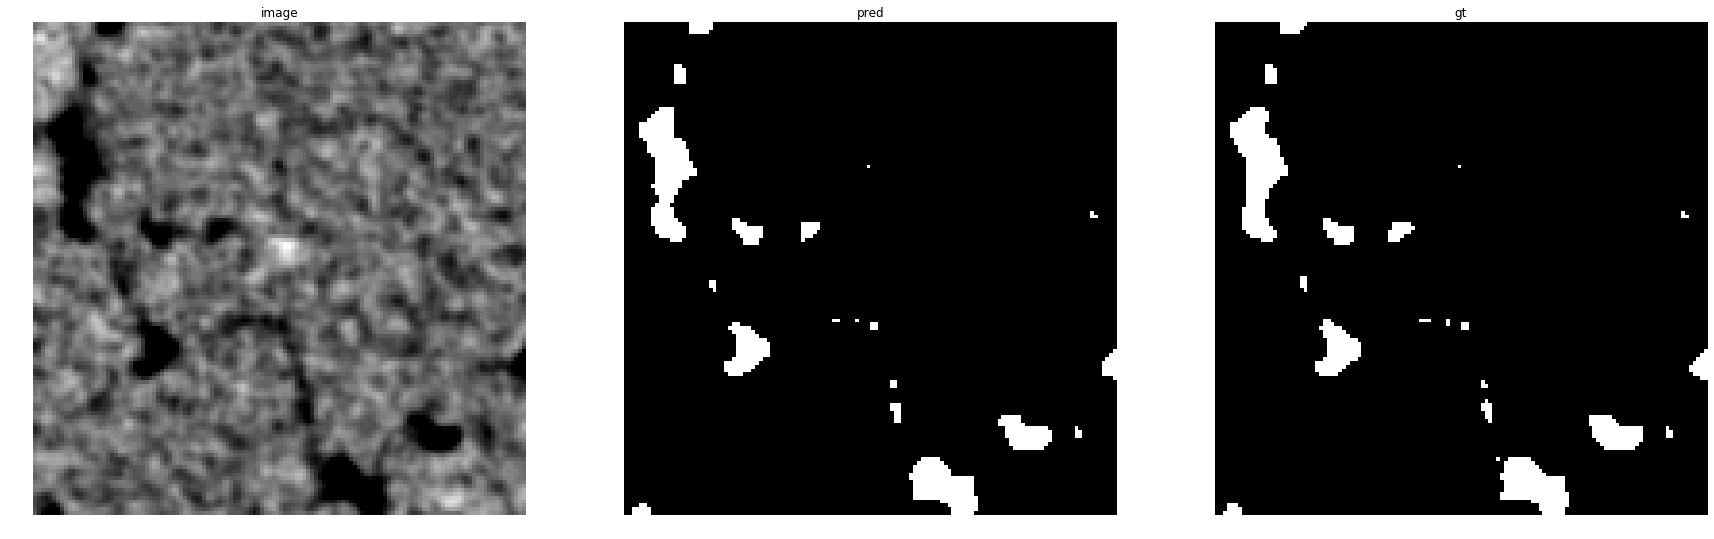

accuracy    : 0.9962158203125
precision   : 0.990979381443299
recall      : 0.933252427184466
f1          : 0.96125
pr_auc      : 0.9954989689205275
iou         : 0.9253910950661853


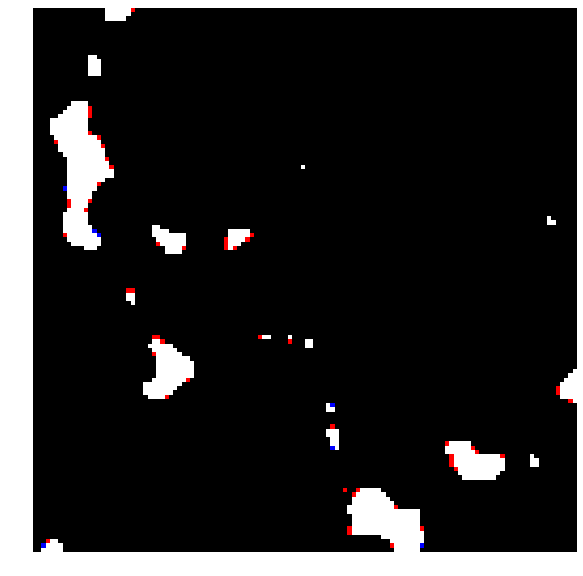

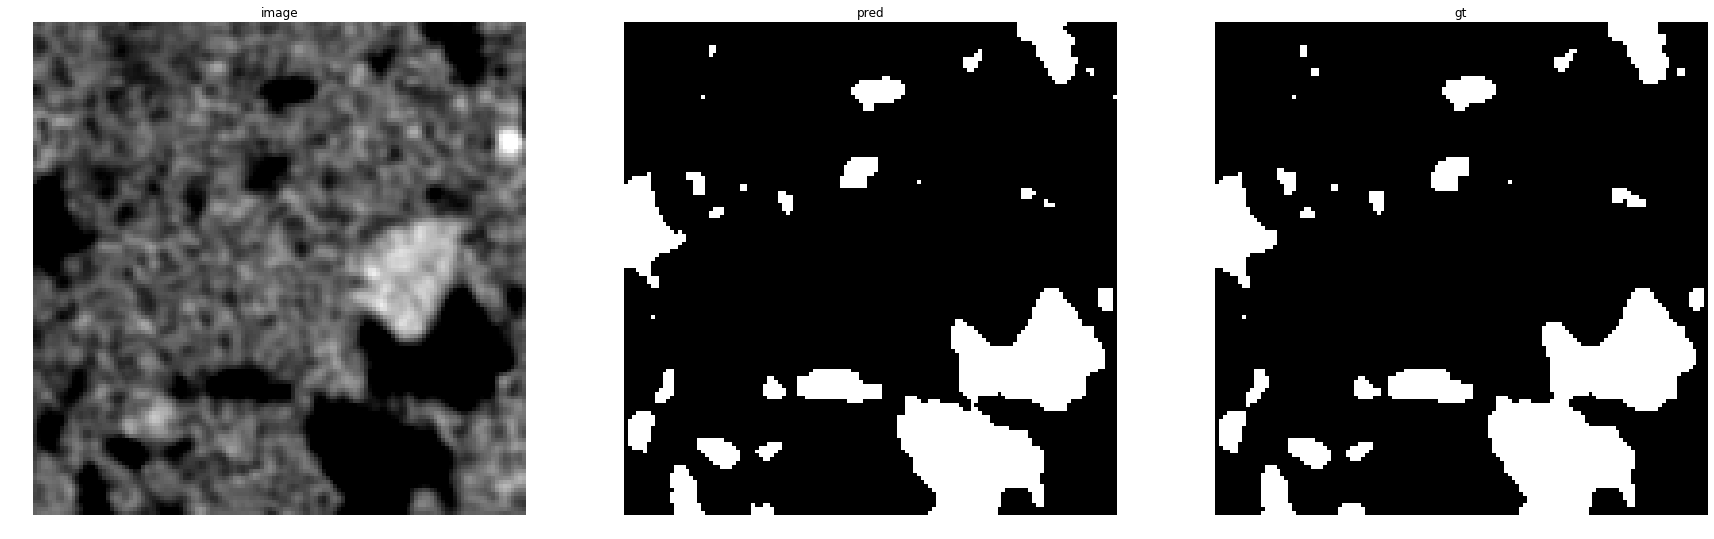

accuracy    : 0.9910888671875
precision   : 0.9951182876455126
recall      : 0.9522098454904779
f1          : 0.9731913330885054
pr_auc      : 0.9984804239383843
iou         : 0.9477825464949928


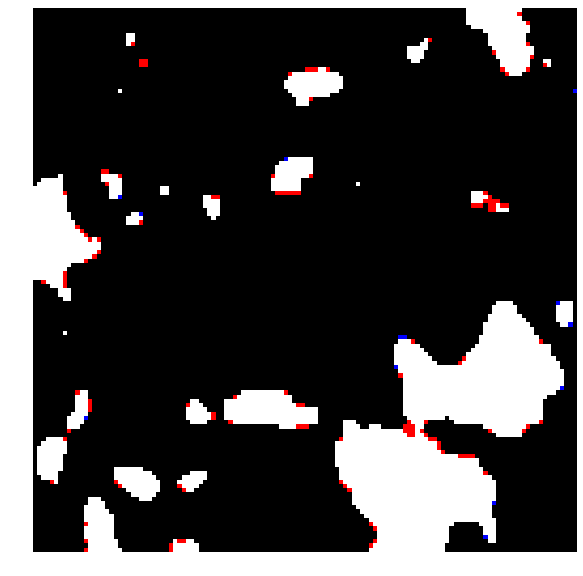

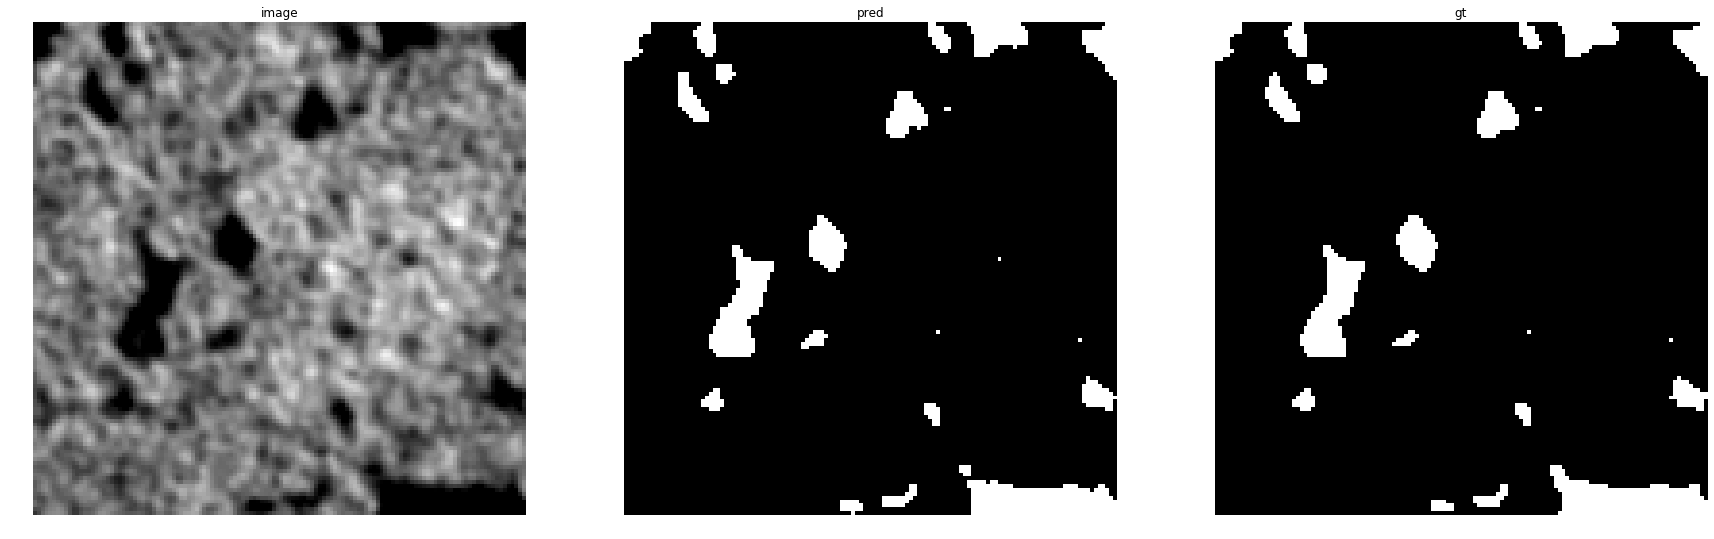

accuracy    : 0.99566650390625
precision   : 0.9818468823993686
recall      : 0.9628482972136223
f1          : 0.9722547870261821
pr_auc      : 0.997339503890574
iou         : 0.9460076045627377


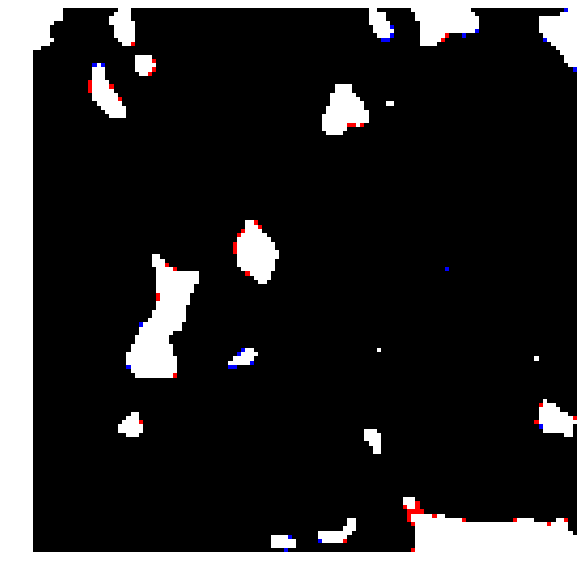

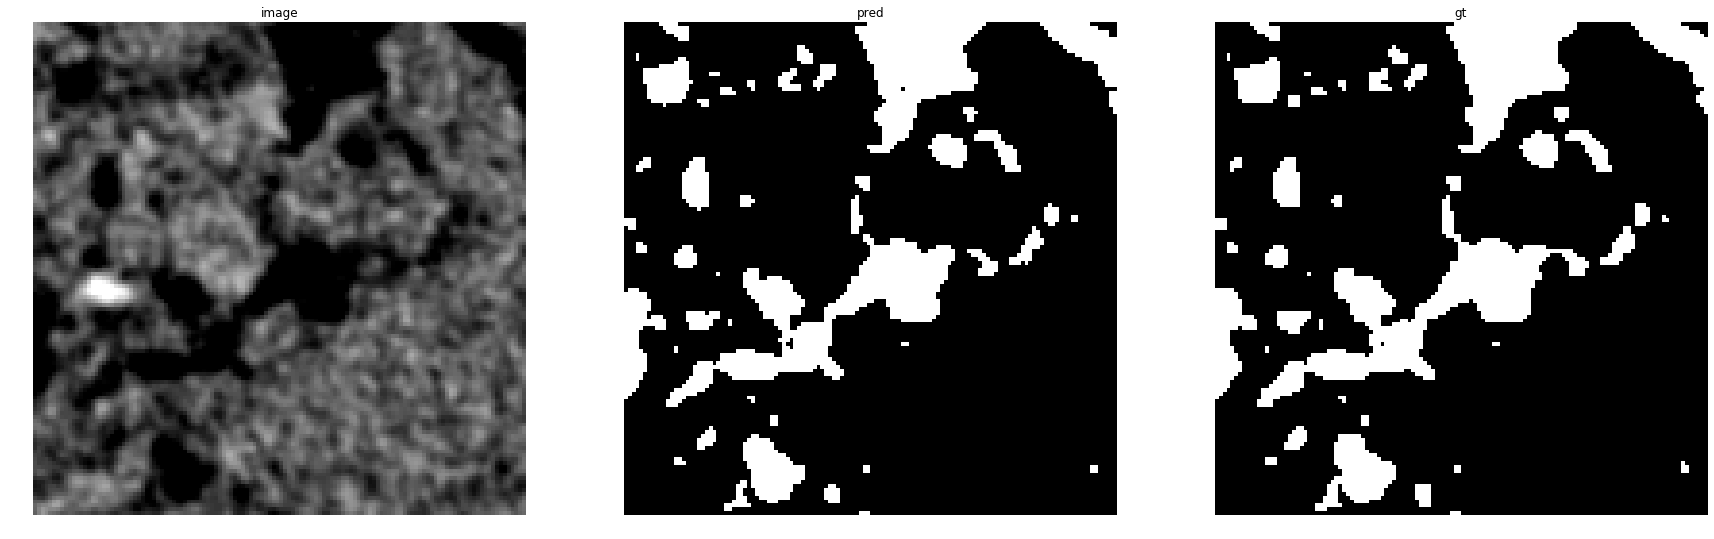

accuracy    : 0.98736572265625
precision   : 0.9925873632192023
recall      : 0.9379586390927285
f1          : 0.9645000857485851
pr_auc      : 0.9956537270434777
iou         : 0.9314342497515734


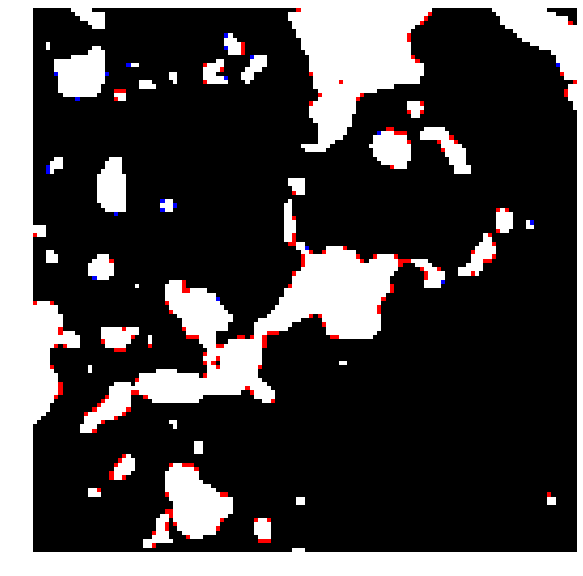

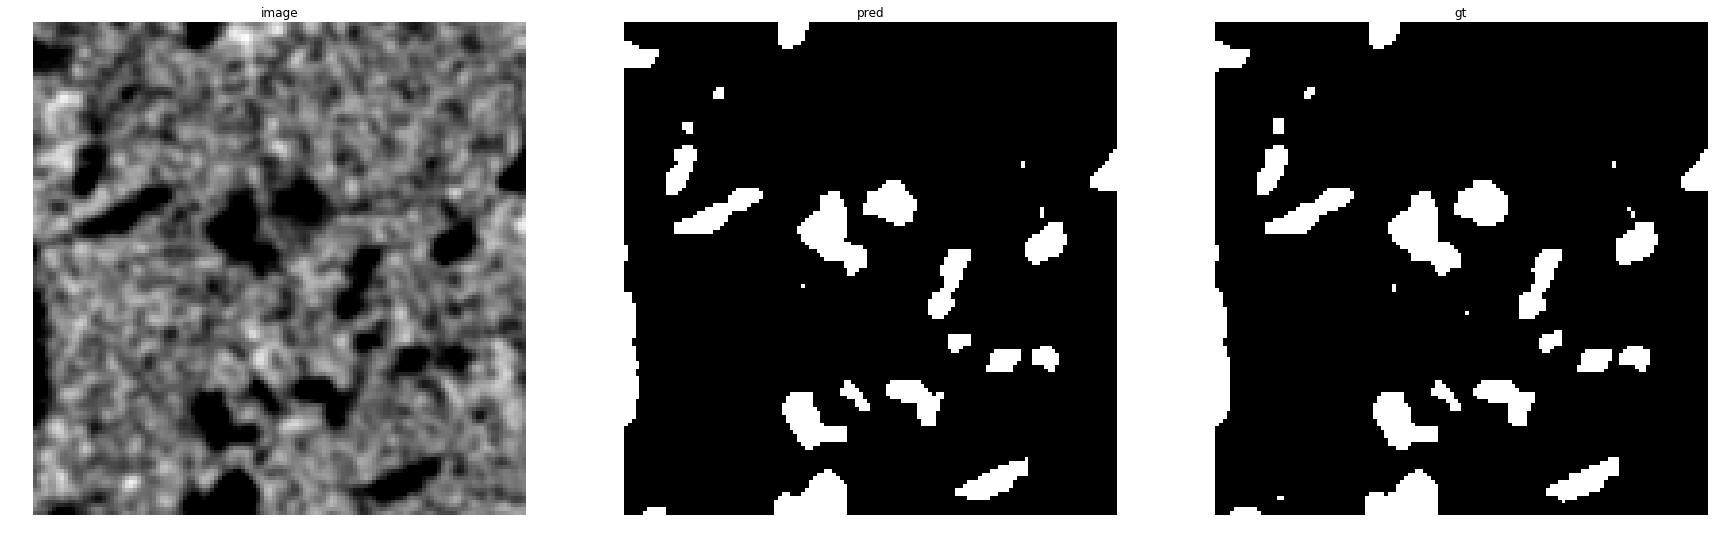

accuracy    : 0.99346923828125
precision   : 0.9942893401015228
recall      : 0.9411411411411411
f1          : 0.9669854983029929
pr_auc      : 0.9974368044744527
iou         : 0.9360812425328554


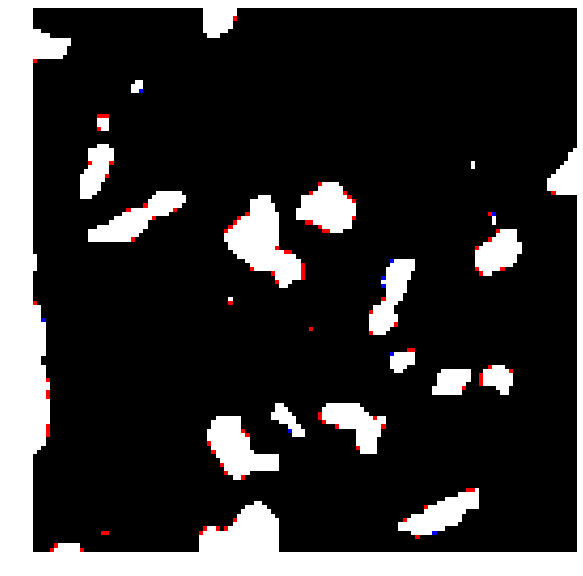

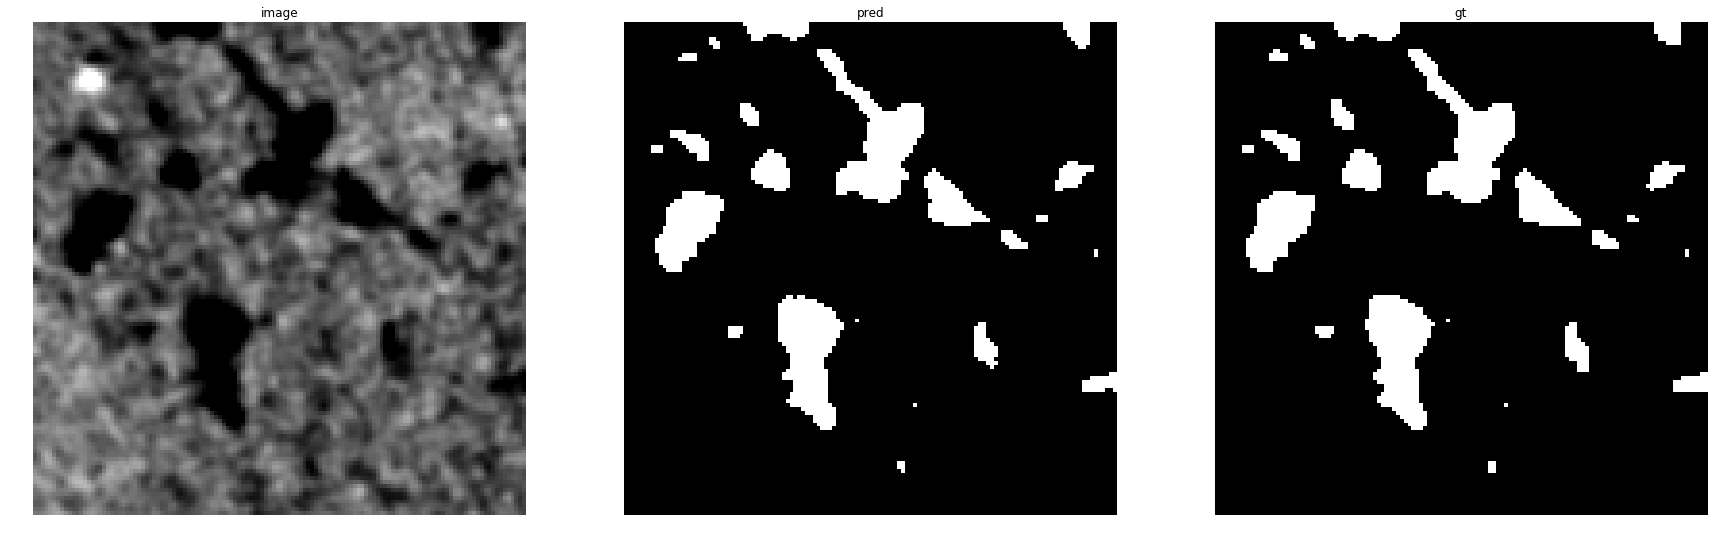

accuracy    : 0.99383544921875
precision   : 0.9895255699322243
recall      : 0.9502958579881656
f1          : 0.9695140356172652
pr_auc      : 0.9976316019653351
iou         : 0.9408318687756297


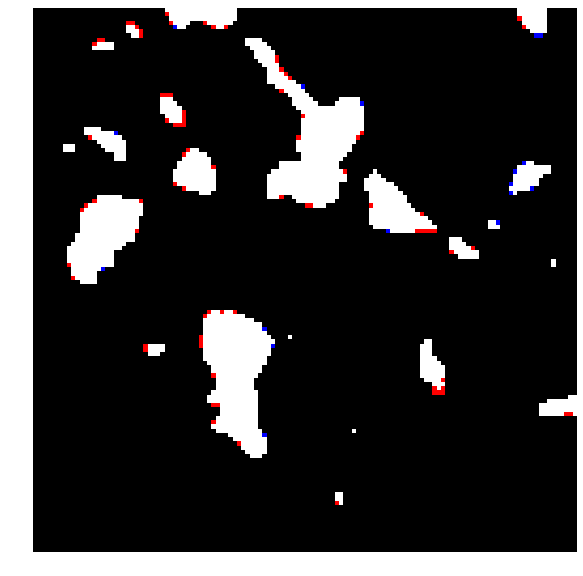

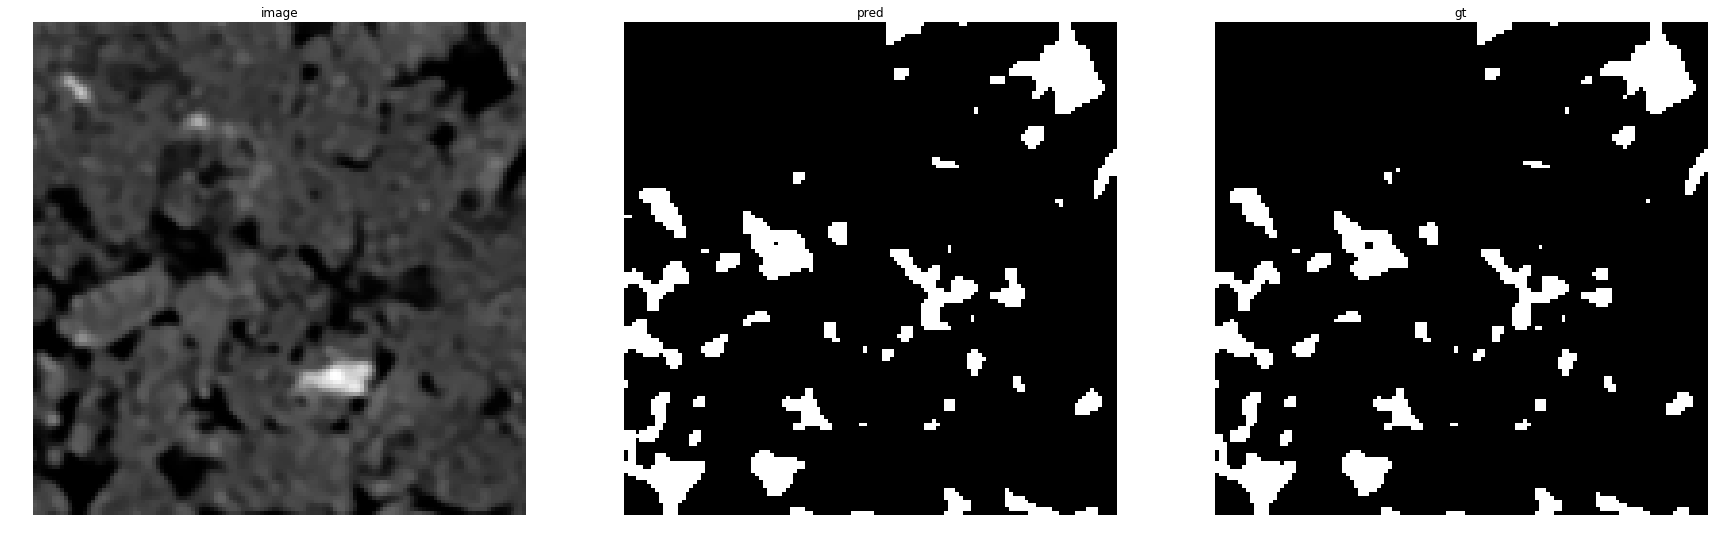

accuracy    : 0.9927978515625
precision   : 0.9403393541324576
recall      : 0.9947886508396062
f1          : 0.9667979741136747
pr_auc      : 0.9978186151476
iou         : 0.9357298474945533


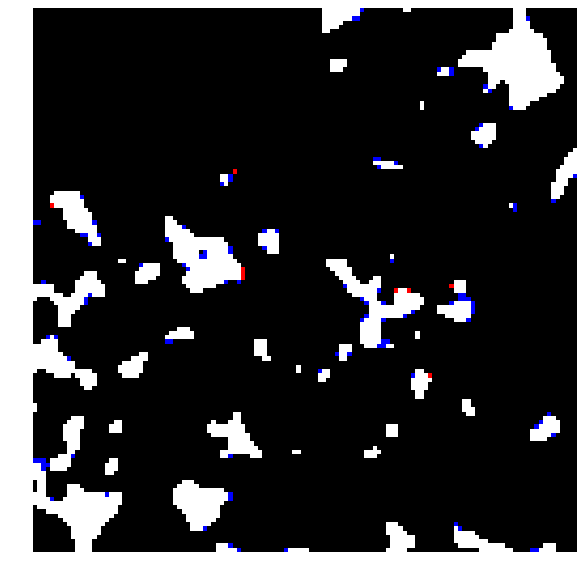

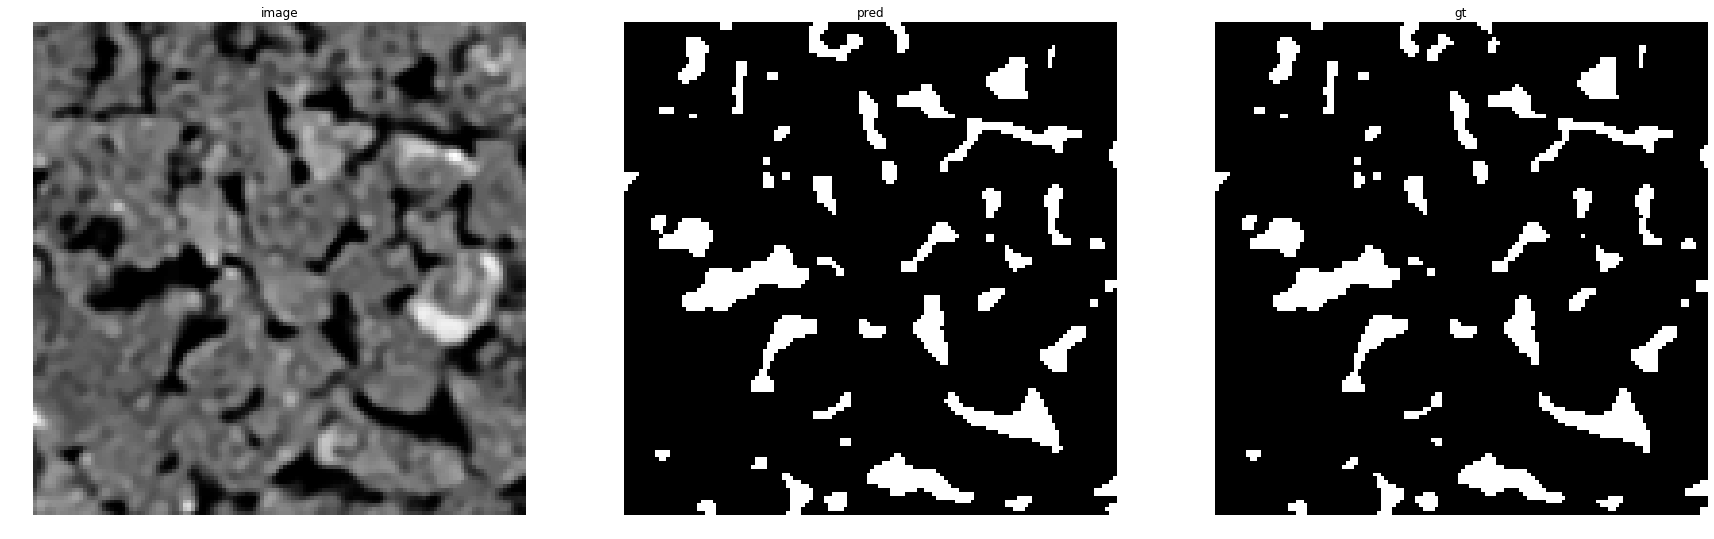

accuracy    : 0.9930419921875
precision   : 0.948292220113852
recall      : 0.9975049900199601
f1          : 0.9722762645914397
pr_auc      : 0.9979978080823126
iou         : 0.9460482725982016


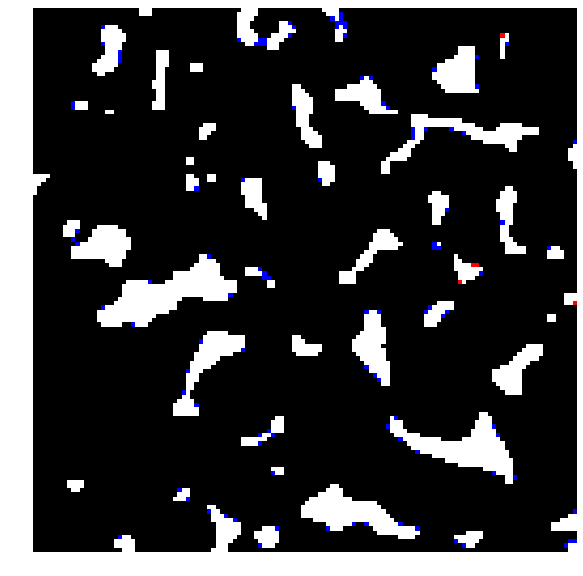

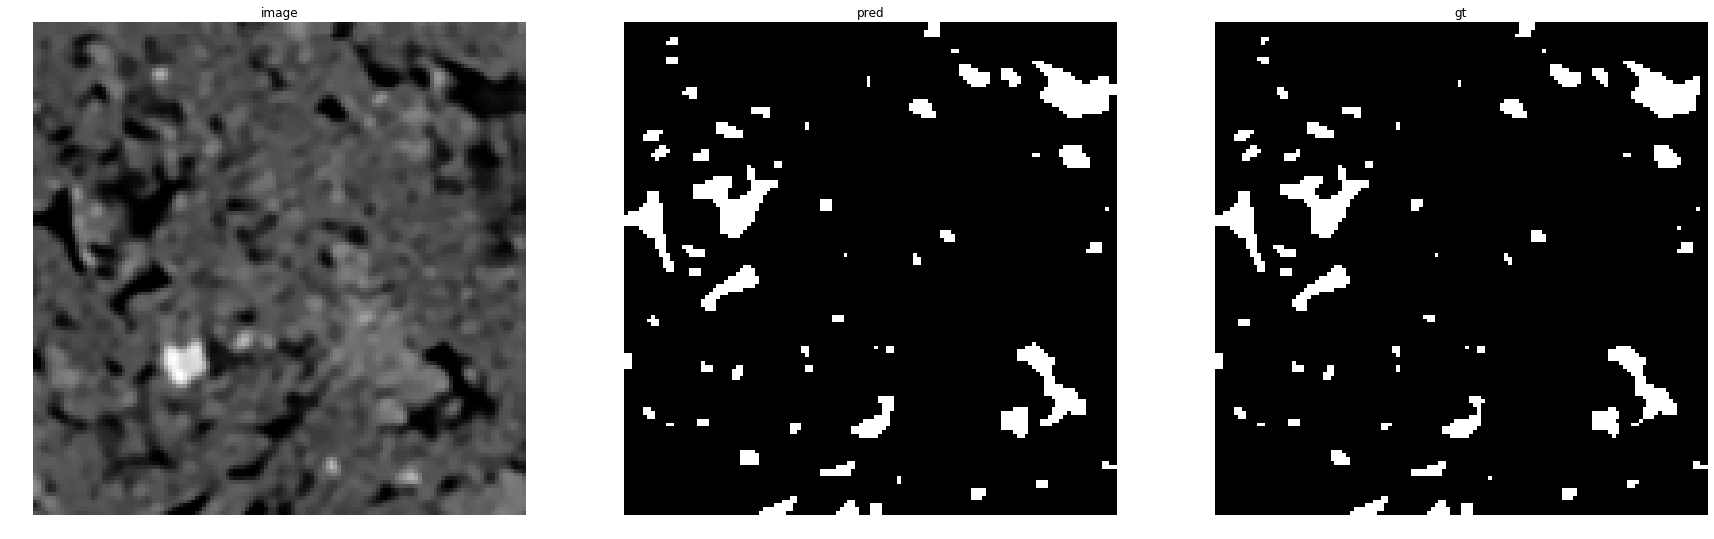

accuracy    : 0.99456787109375
precision   : 0.934264585045193
recall      : 0.9921465968586387
f1          : 0.9623360135421073
pr_auc      : 0.9960905506832434
iou         : 0.9274061990212071


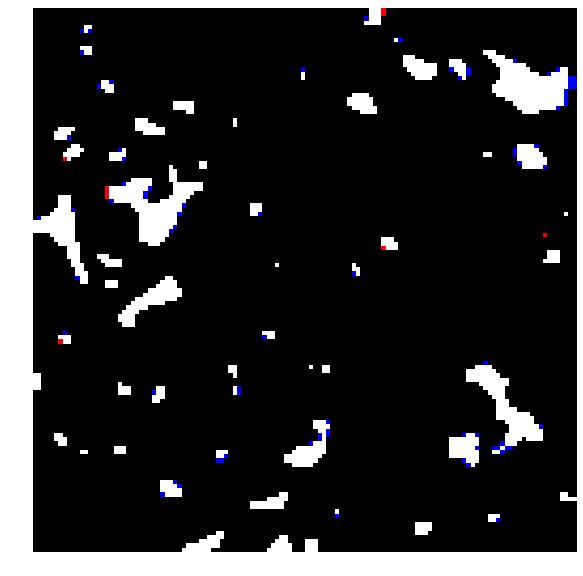

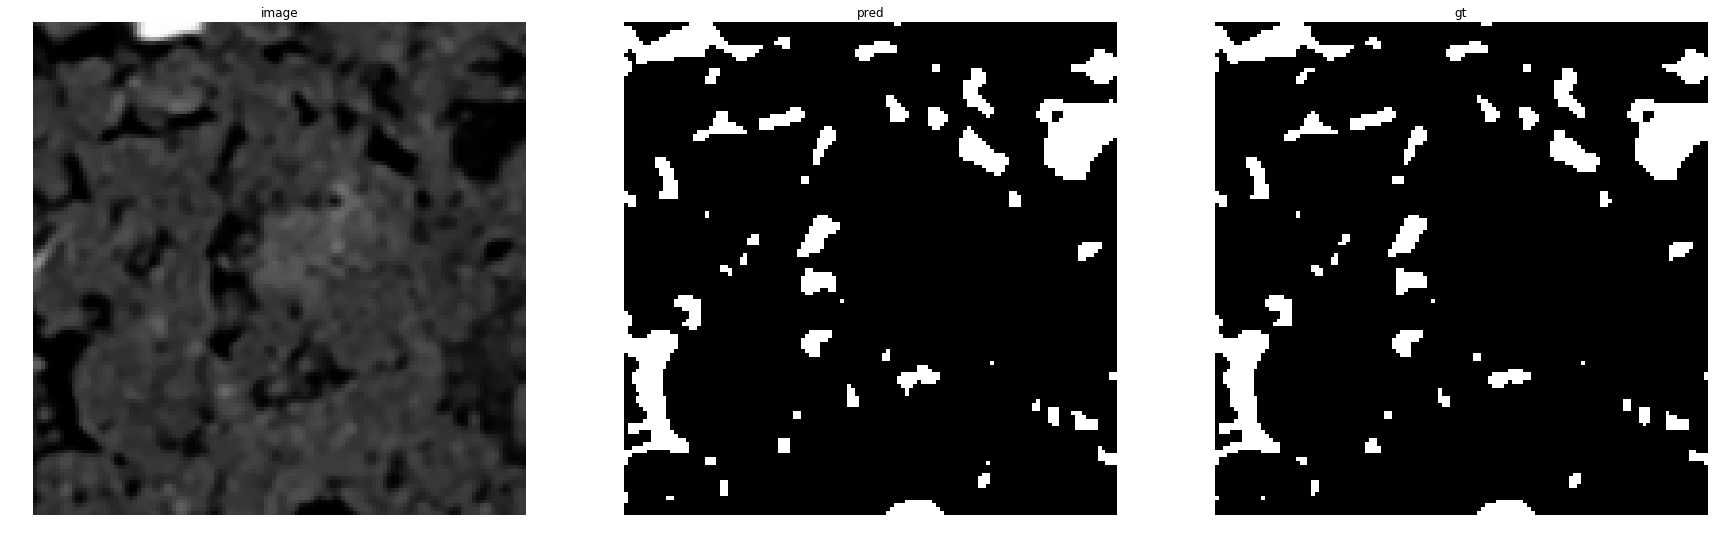

accuracy    : 0.99334716796875
precision   : 0.9482660602615123
recall      : 0.9893238434163701
f1          : 0.9683599419448478
pr_auc      : 0.997368163708475
iou         : 0.9386606640405177


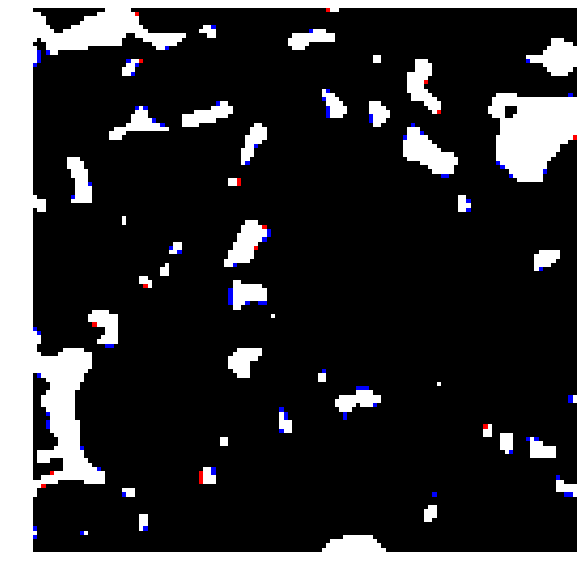

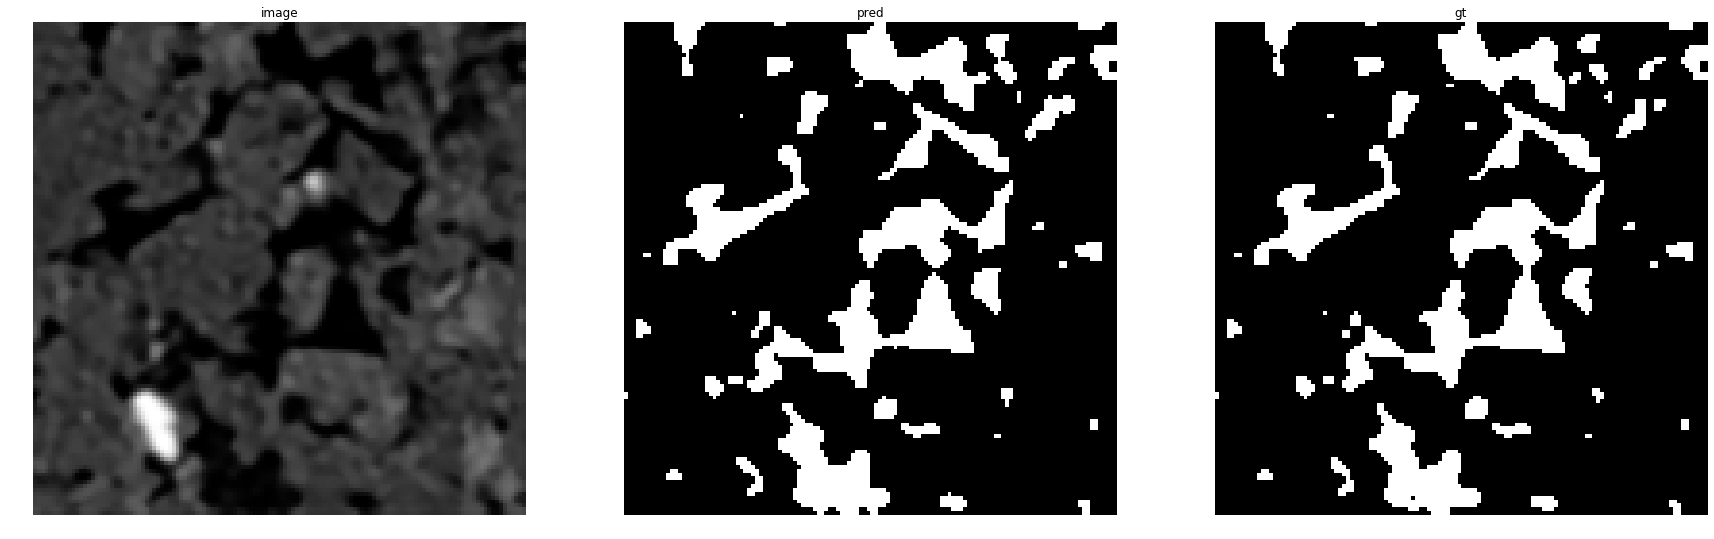

accuracy    : 0.9915771484375
precision   : 0.9577944179714091
recall      : 0.995049504950495
f1          : 0.9760665972944849
pr_auc      : 0.9984602768370283
iou         : 0.9532520325203252


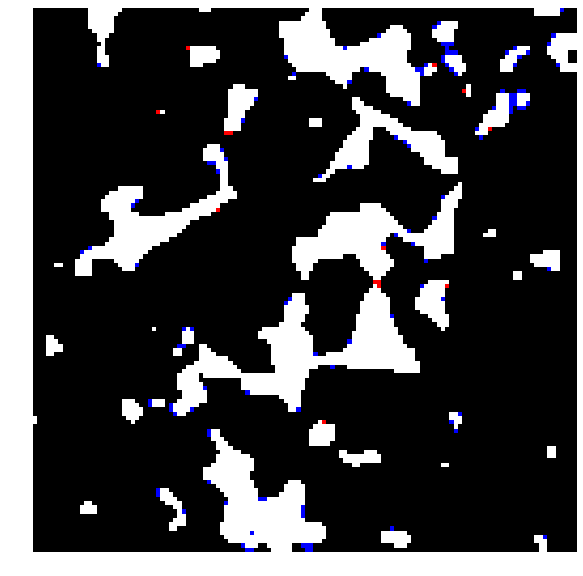

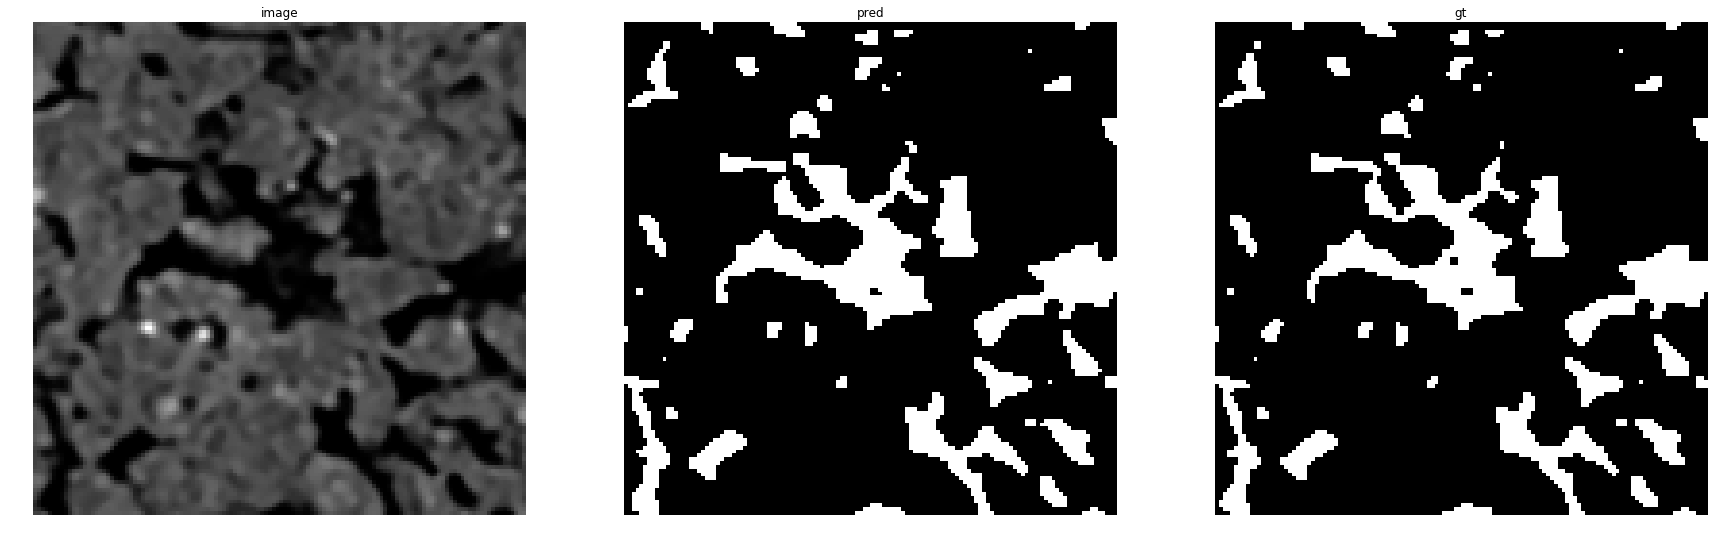

accuracy    : 0.9920654296875
precision   : 0.9602977667493796
recall      : 0.9933993399339934
f1          : 0.9765681326604182
pr_auc      : 0.9985479927990527
iou         : 0.9542092286016203


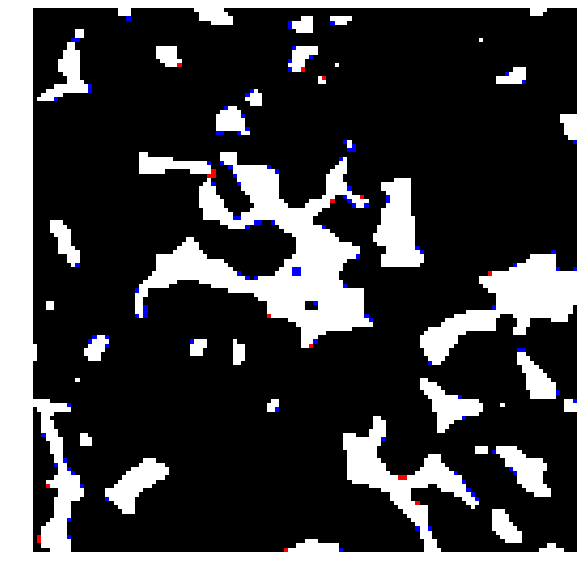

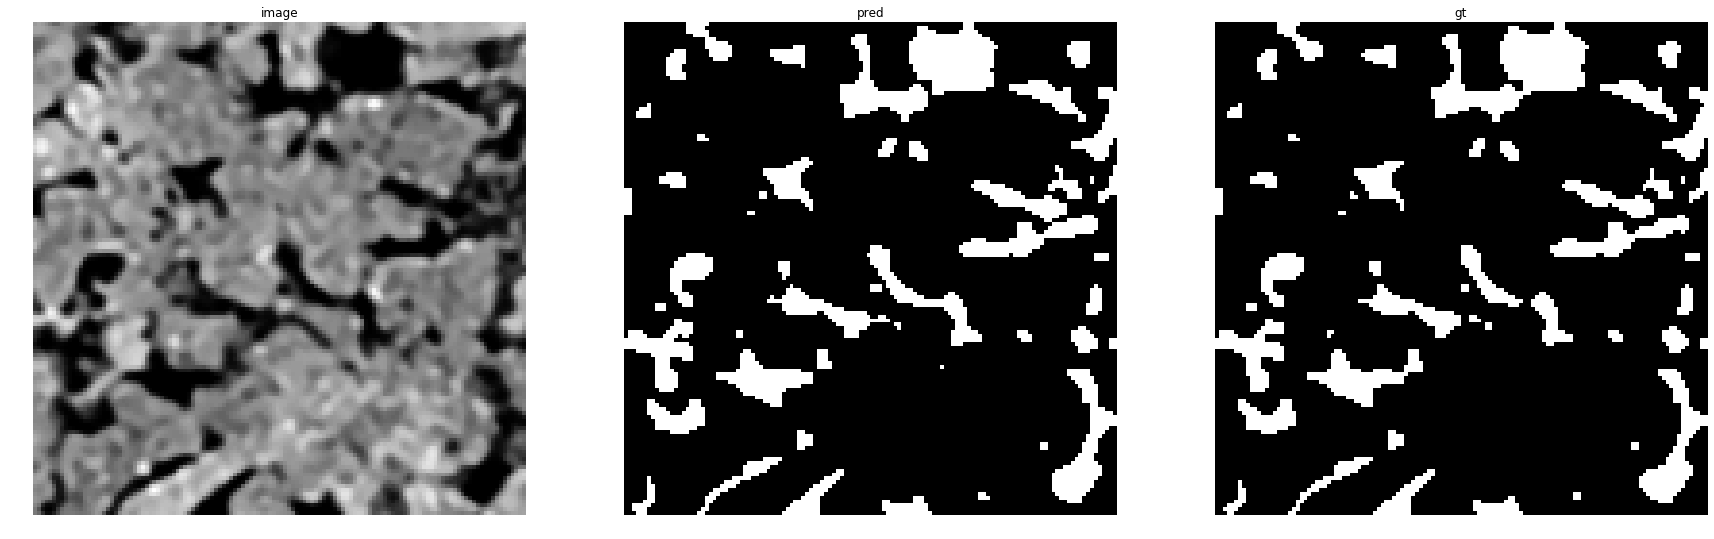

accuracy    : 0.99041748046875
precision   : 0.9510669610007358
recall      : 0.9908010732081257
f1          : 0.970527501407922
pr_auc      : 0.9979792187913831
iou         : 0.9427425237053246


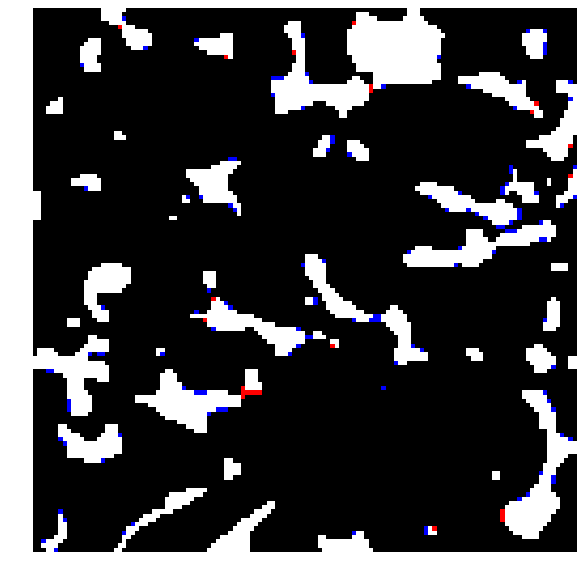

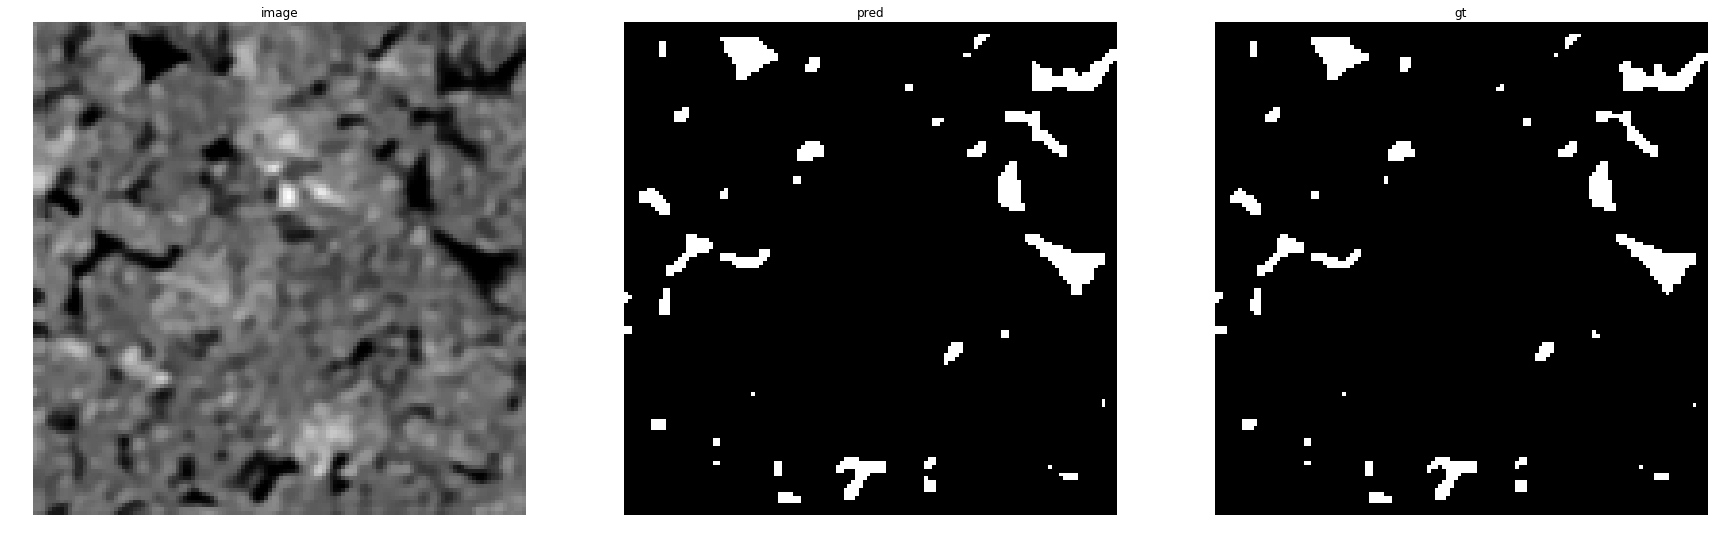

accuracy    : 0.99591064453125
precision   : 0.9369988545246277
recall      : 0.9855421686746988
f1          : 0.9606576629477394
pr_auc      : 0.9953173710547596
iou         : 0.9242937853107345


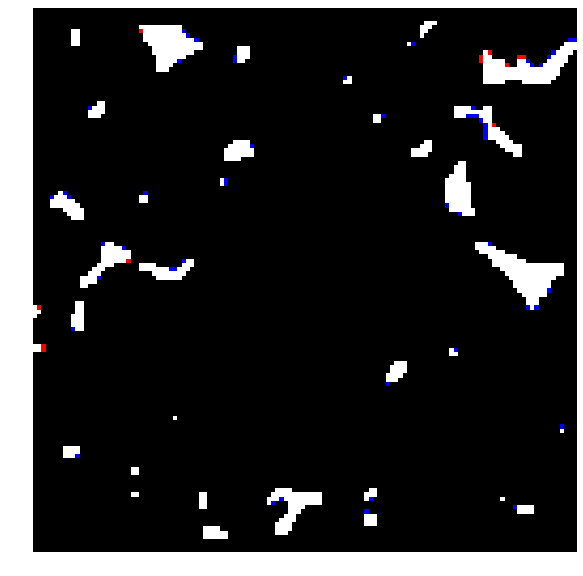

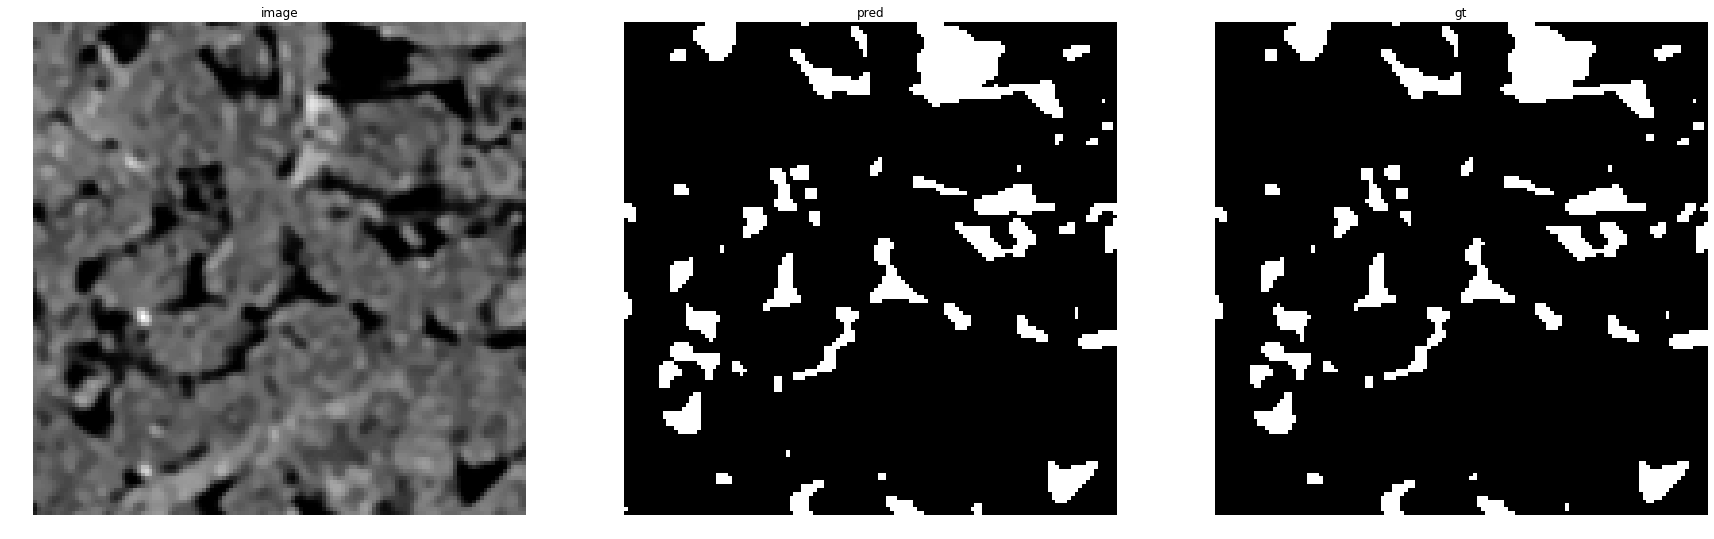

accuracy    : 0.99285888671875
precision   : 0.9487829614604463
recall      : 0.9915209326974033
f1          : 0.9696812645763151
pr_auc      : 0.9978543403909481
iou         : 0.9411468812877264


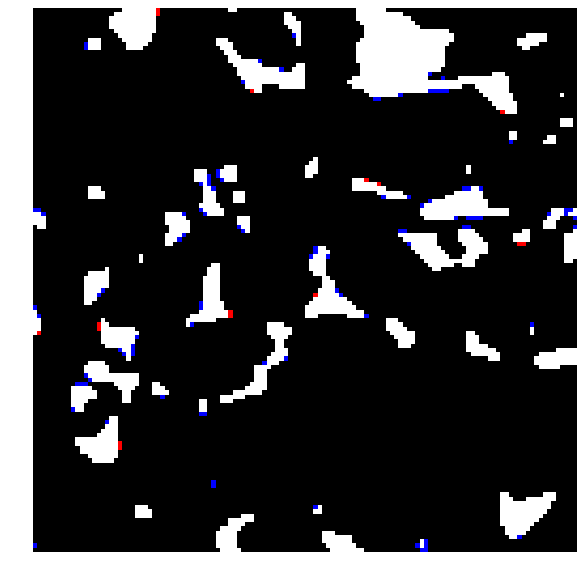

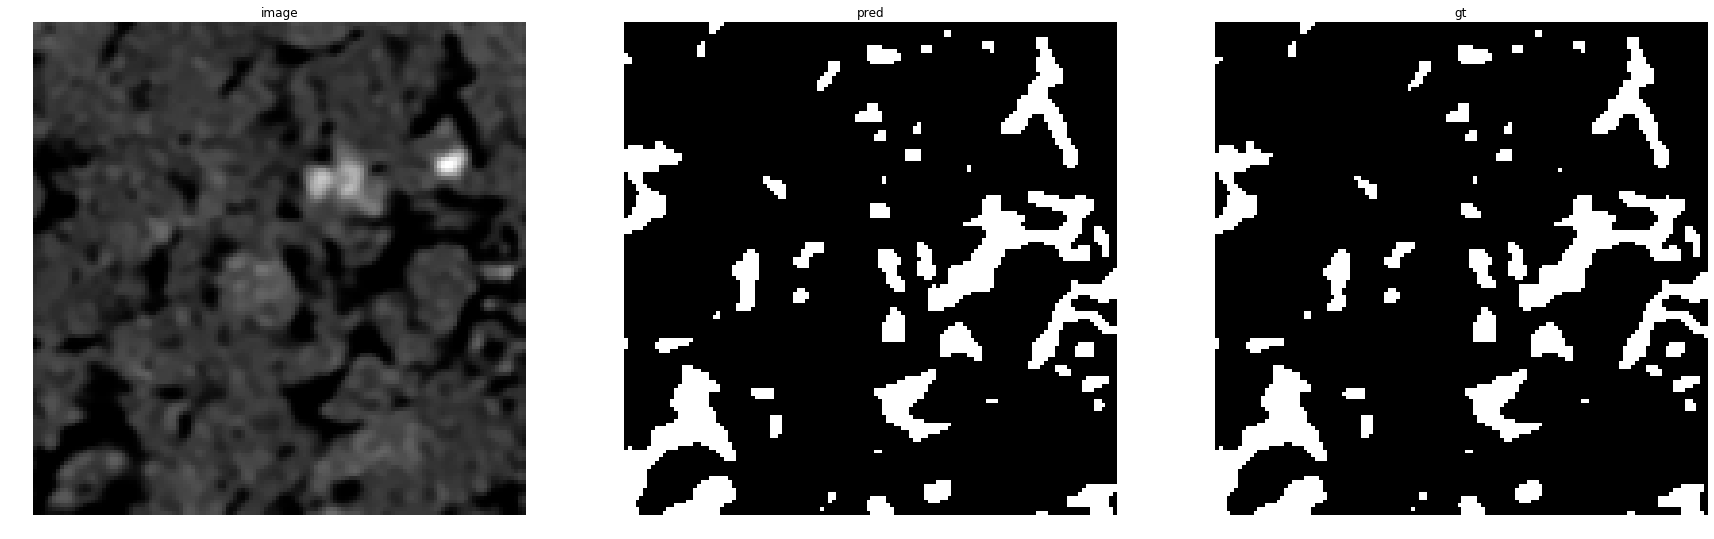

accuracy    : 0.99444580078125
precision   : 0.9670814933761541
recall      : 0.9962779156327544
f1          : 0.9814626196781421
pr_auc      : 0.9988660909520366
iou         : 0.9636


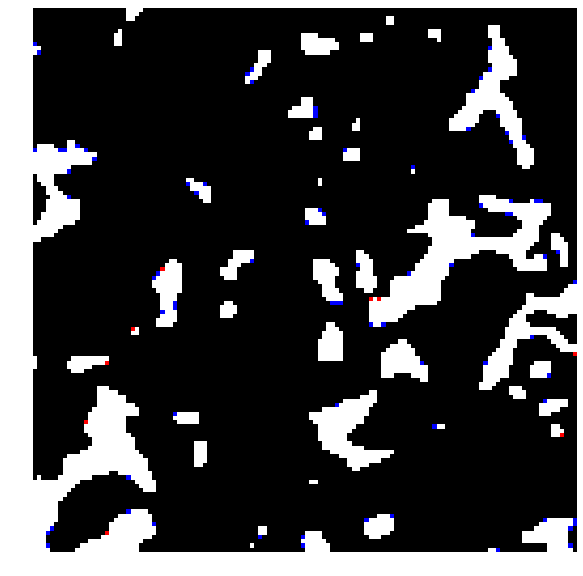

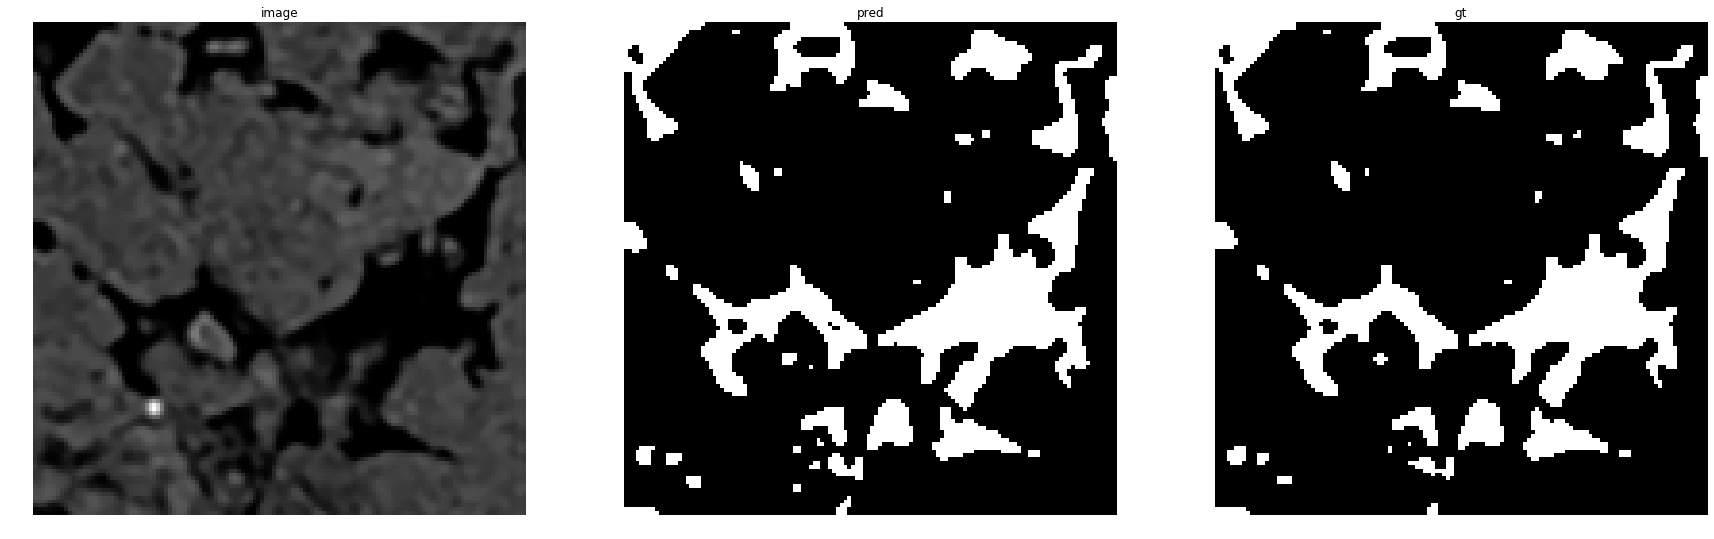

accuracy    : 0.9893798828125
precision   : 0.9590443686006825
recall      : 0.9865943185445261
f1          : 0.972624292007552
pr_auc      : 0.9982997305275088
iou         : 0.9467075038284839


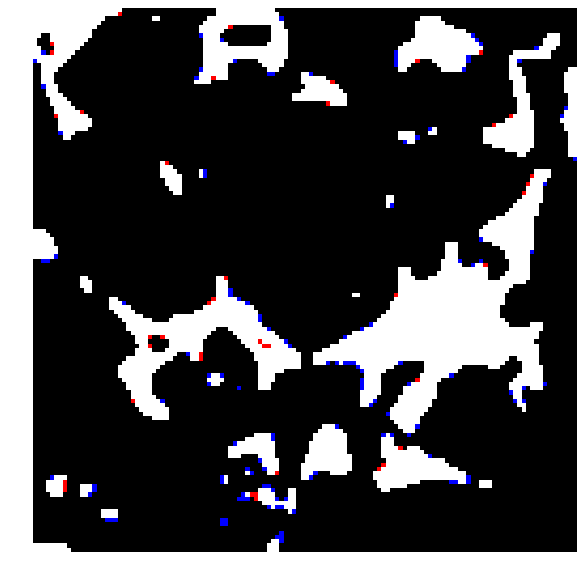

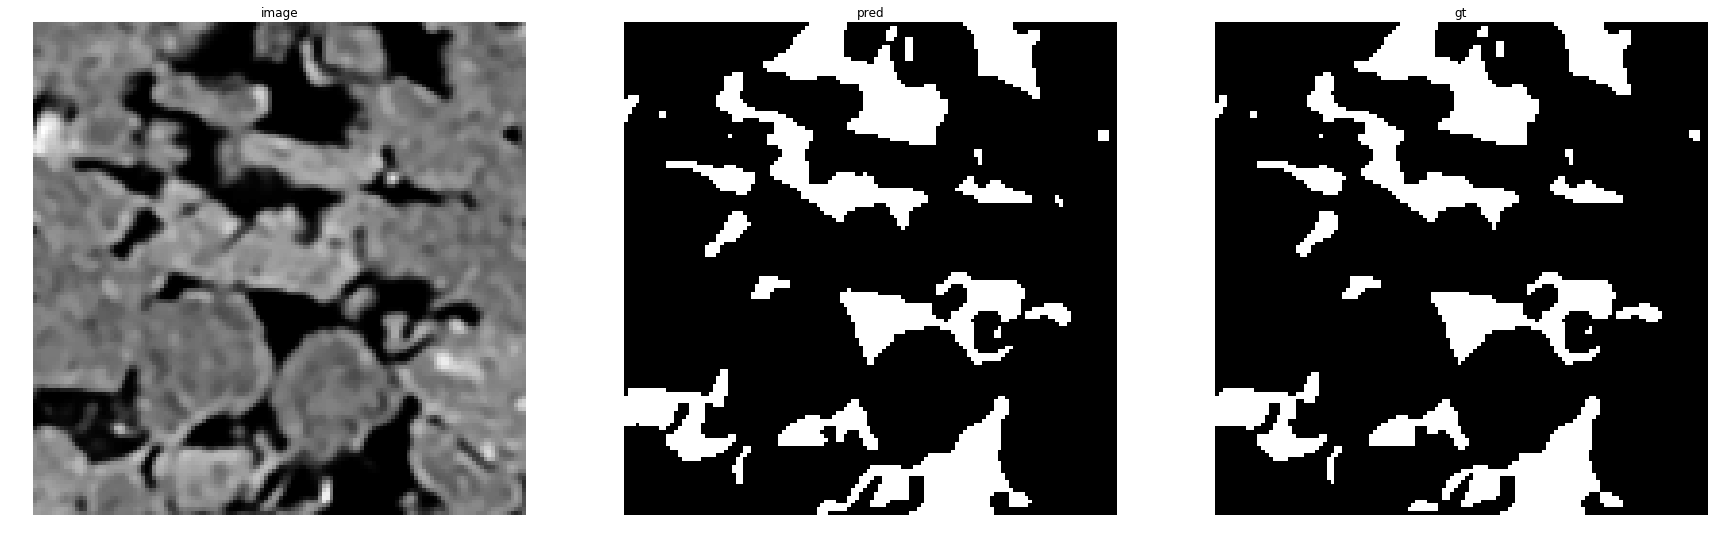

accuracy    : 0.99053955078125
precision   : 0.9640917320458661
recall      : 0.9888579387186629
f1          : 0.9763177998472116
pr_auc      : 0.9984870369532894
iou         : 0.9537313432835821


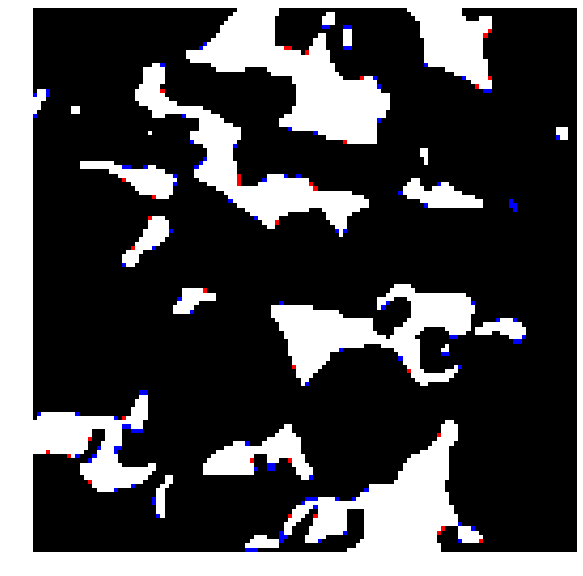

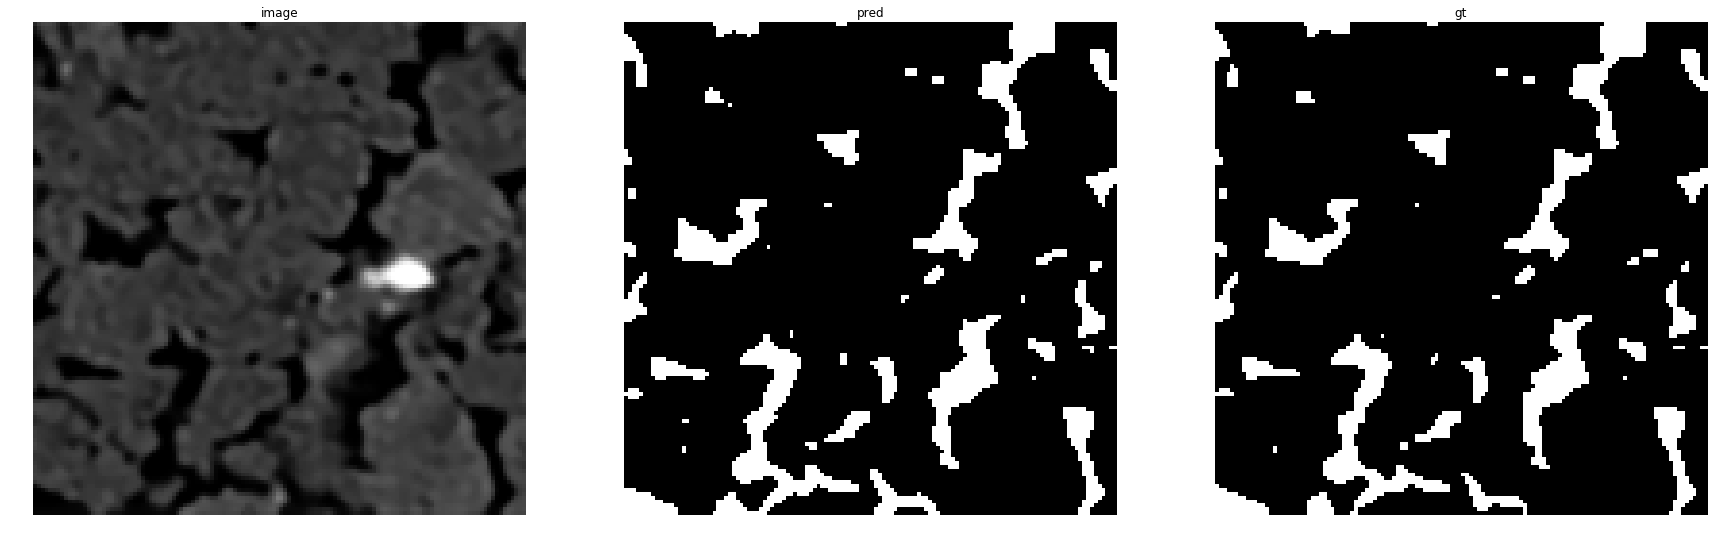

accuracy    : 0.9888916015625
precision   : 0.9352389459580169
recall      : 0.982637259502581
f1          : 0.9583524027459953
pr_auc      : 0.9960540128619229
iou         : 0.9200351493848857


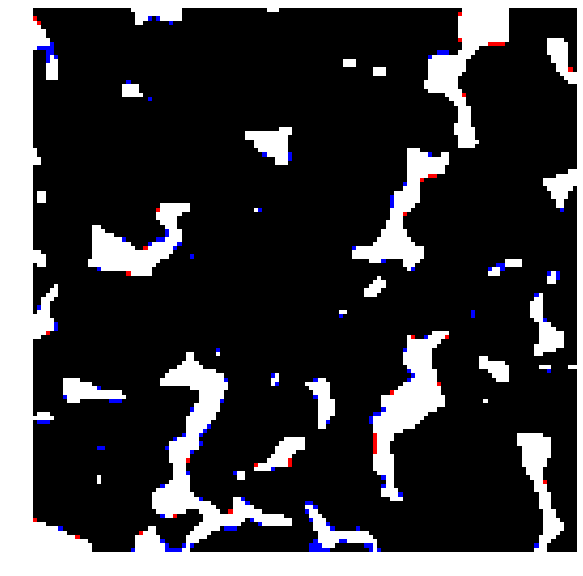

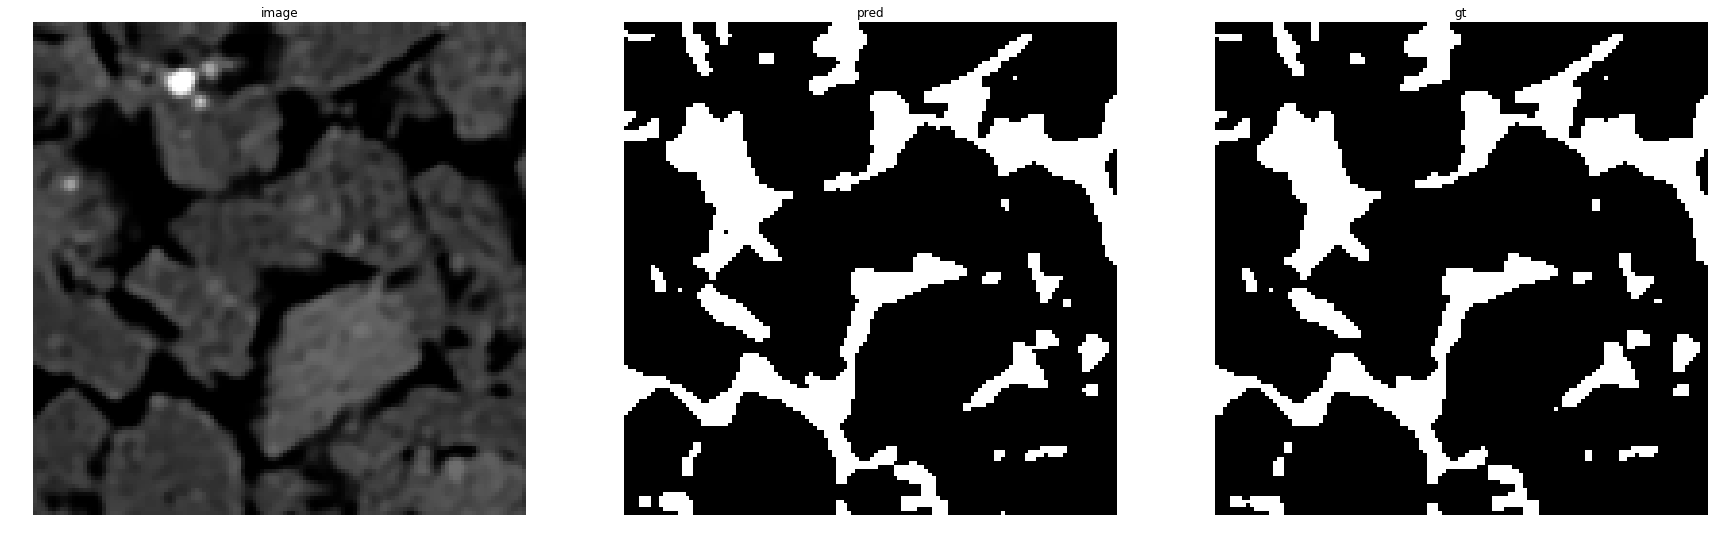

accuracy    : 0.9891357421875
precision   : 0.9647727272727272
recall      : 0.9843478260869565
f1          : 0.9744619799139168
pr_auc      : 0.9983946290626851
iou         : 0.9501958589815332


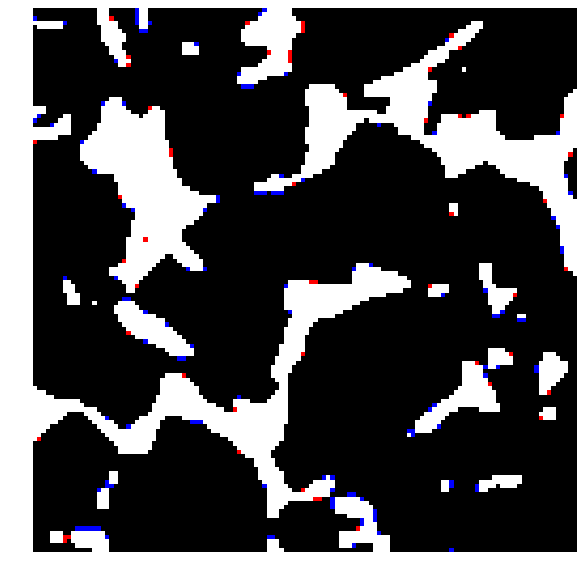

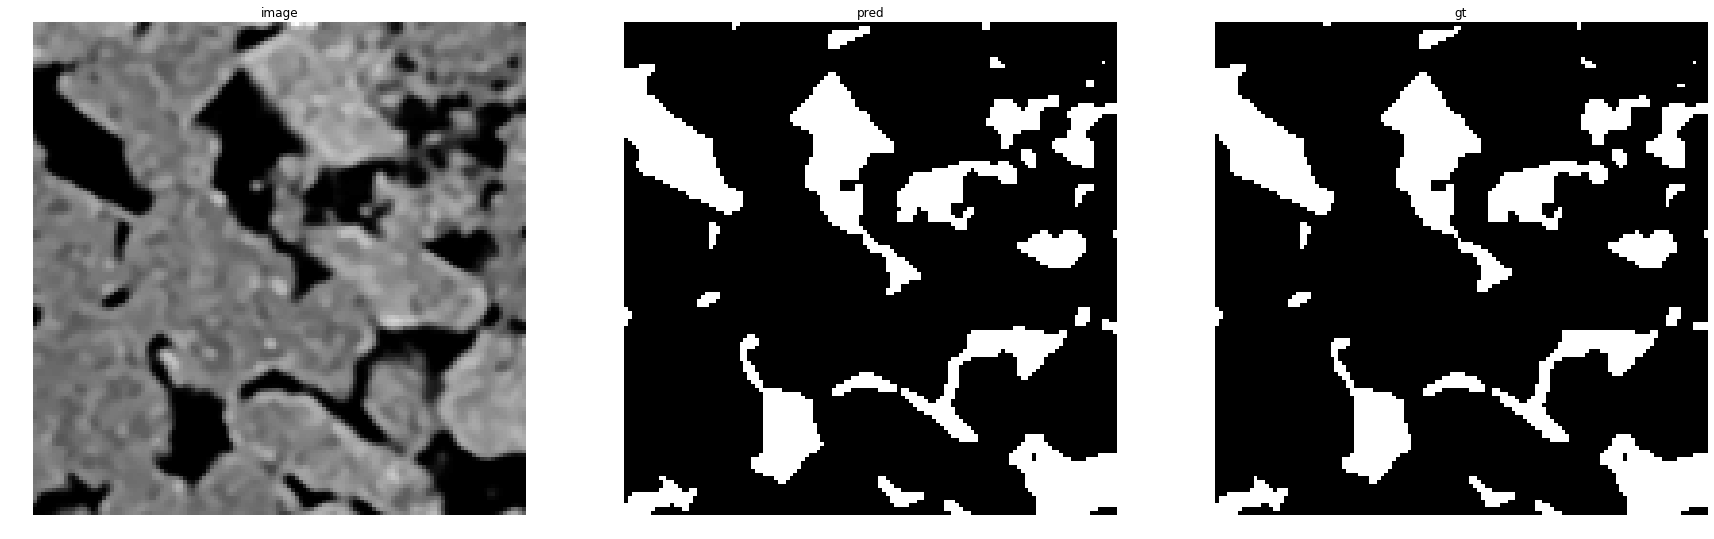

accuracy    : 0.991455078125
precision   : 0.9660807893925377
recall      : 0.9905153335441037
f1          : 0.9781454886044333
pr_auc      : 0.9989047732371253
iou         : 0.9572257867399939


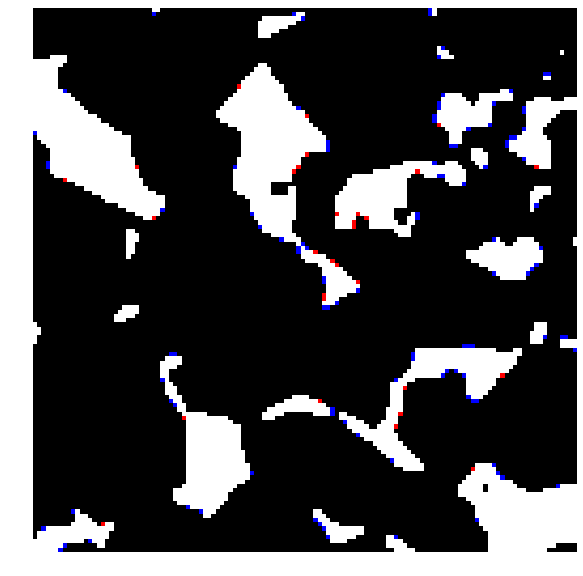

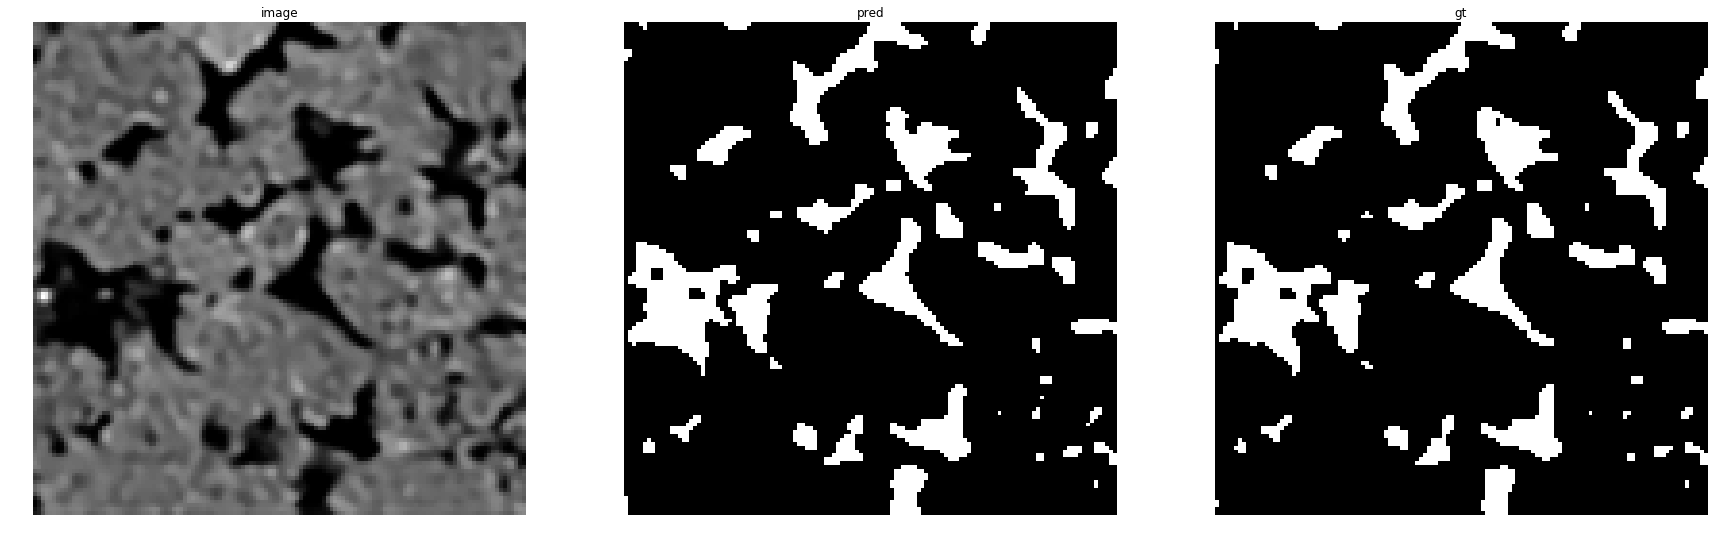

accuracy    : 0.98944091796875
precision   : 0.9533227848101266
recall      : 0.9776876267748479
f1          : 0.9653514920889245
pr_auc      : 0.9965568781830338
iou         : 0.9330236159504453


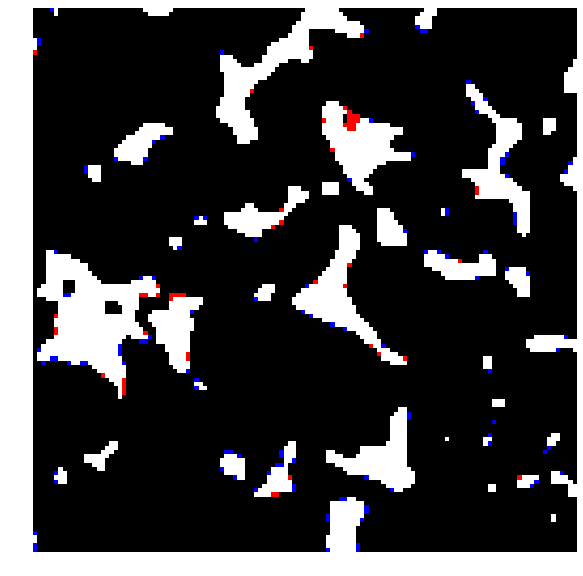

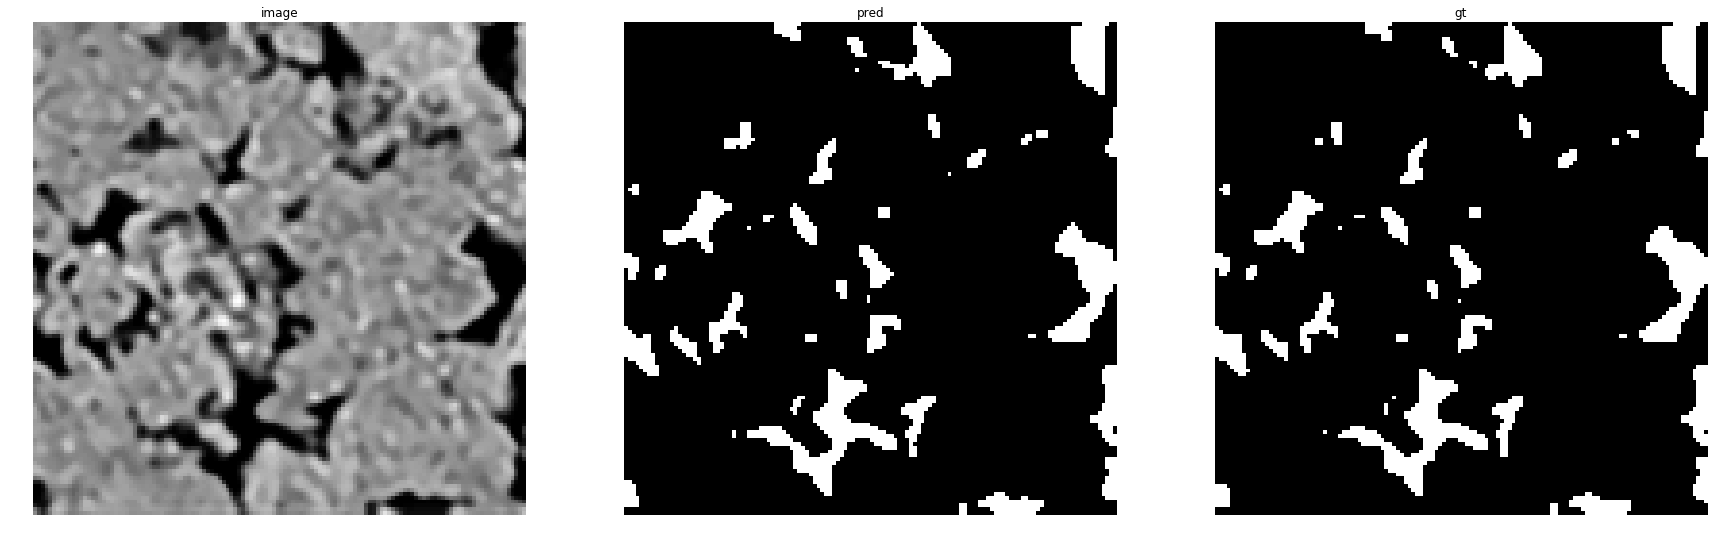

accuracy    : 0.99237060546875
precision   : 0.9501385041551247
recall      : 0.98
f1          : 0.9648382559774965
pr_auc      : 0.9968763523783183
iou         : 0.9320652173913043


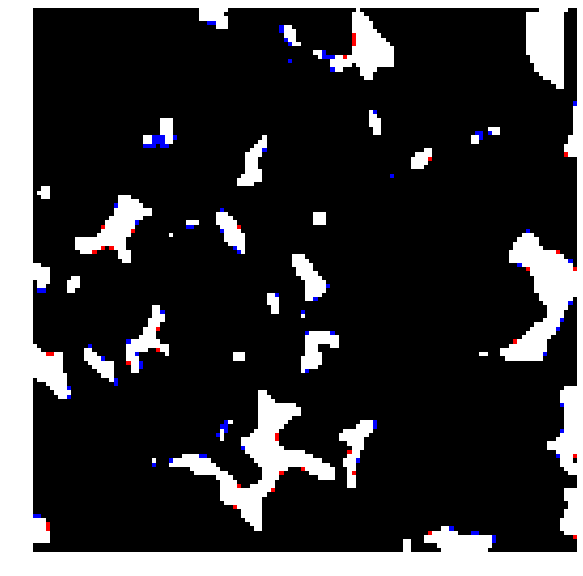

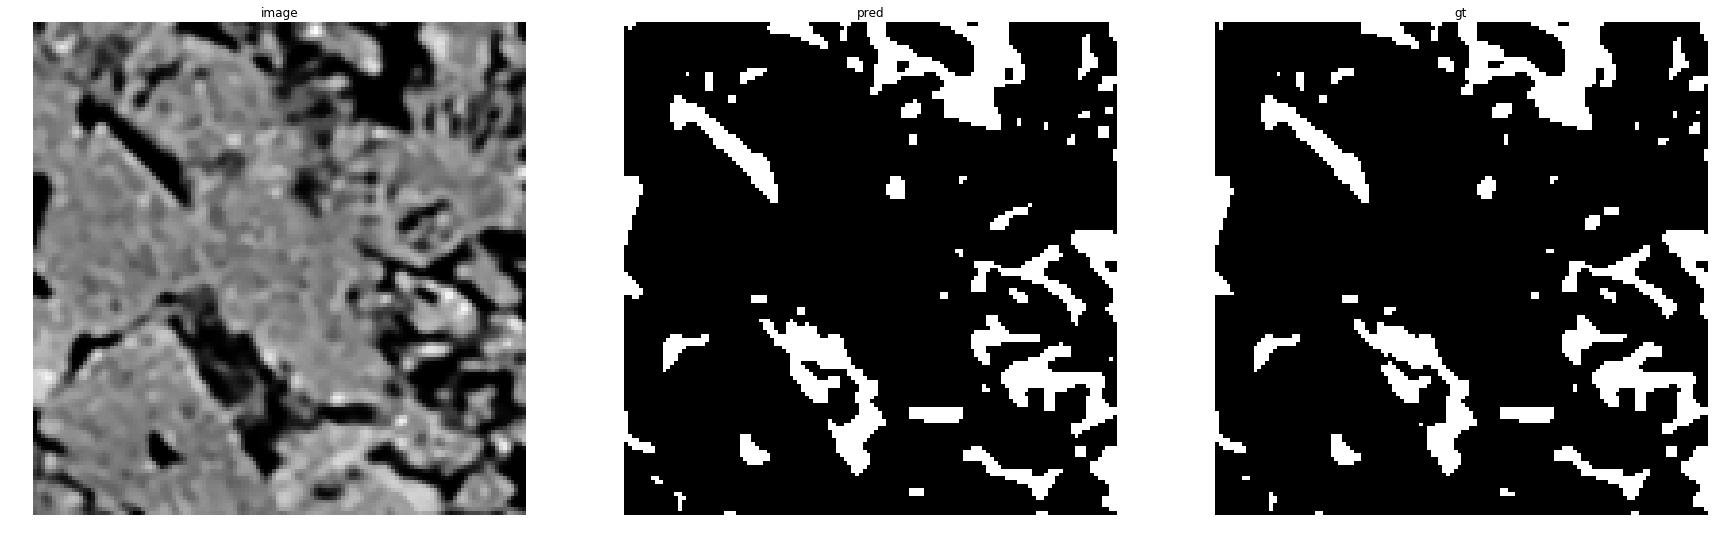

accuracy    : 0.98858642578125
precision   : 0.9428798095993653
recall      : 0.9822314049586777
f1          : 0.9621534102408418
pr_auc      : 0.996292378271656
iou         : 0.9270670826833073


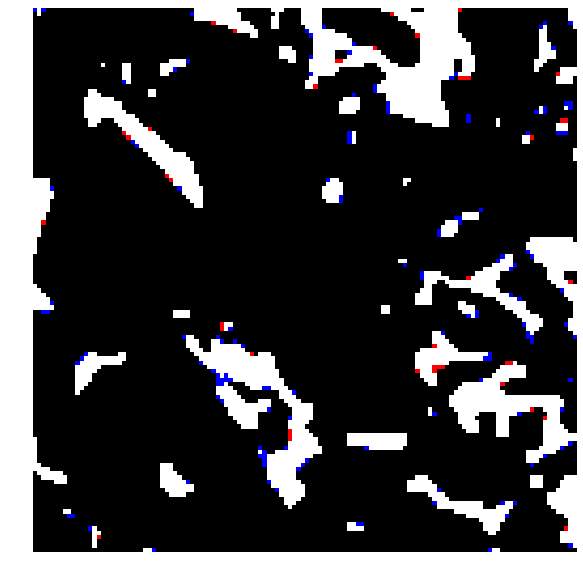

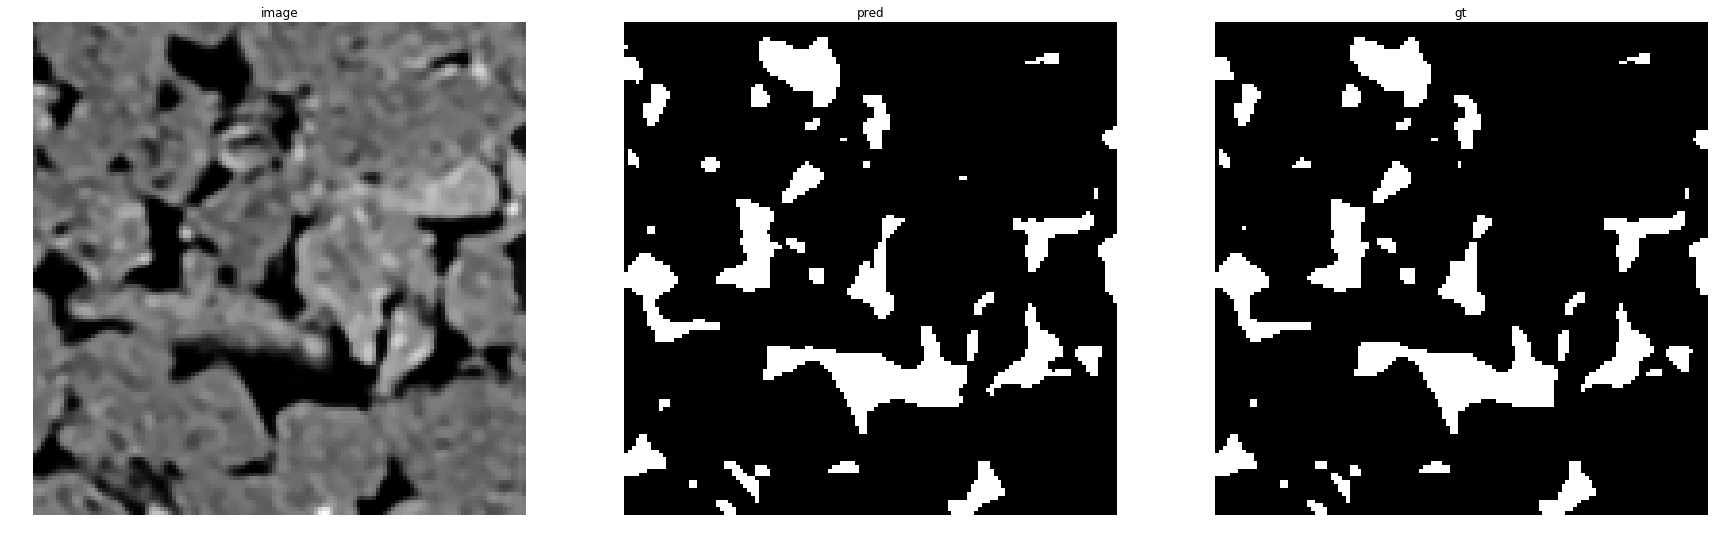

accuracy    : 0.99041748046875
precision   : 0.9519762005949851
recall      : 0.9807355516637478
f1          : 0.9661419020918698
pr_auc      : 0.9972071819316548
iou         : 0.9345014601585315


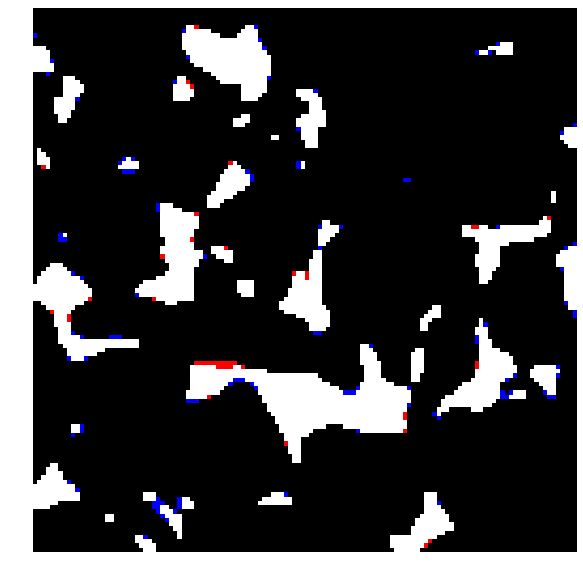

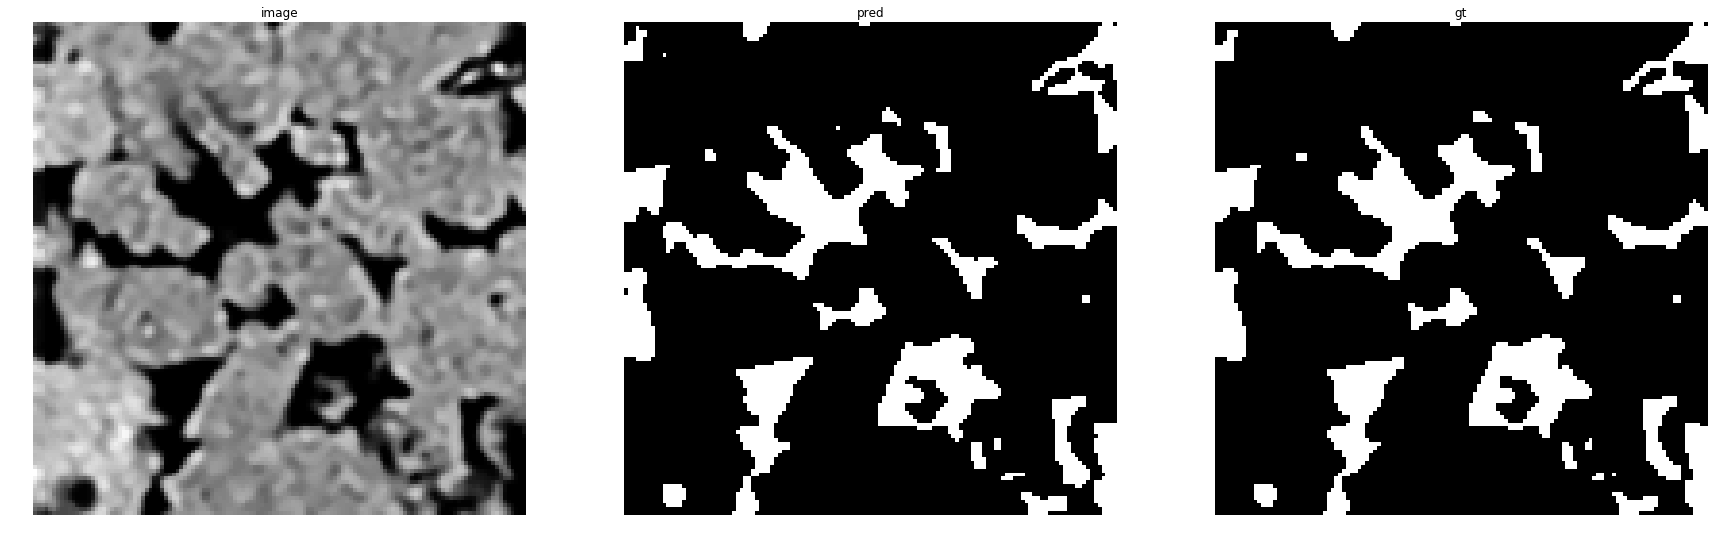

accuracy    : 0.99066162109375
precision   : 0.9653159340659341
recall      : 0.9818372336709745
f1          : 0.9735064935064937
pr_auc      : 0.998172816172443
iou         : 0.9483805668016194


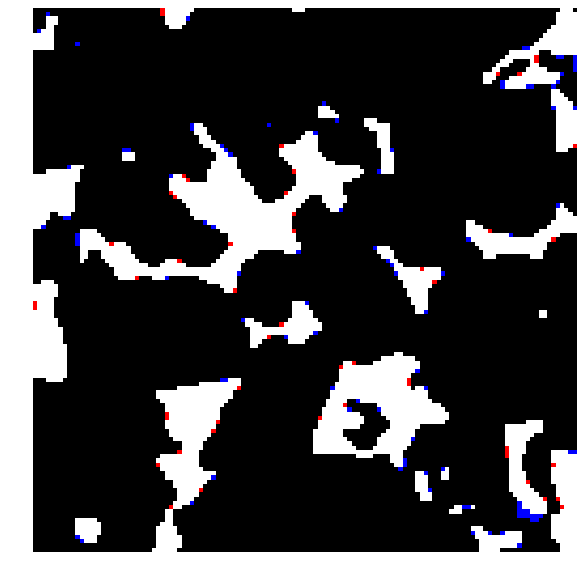

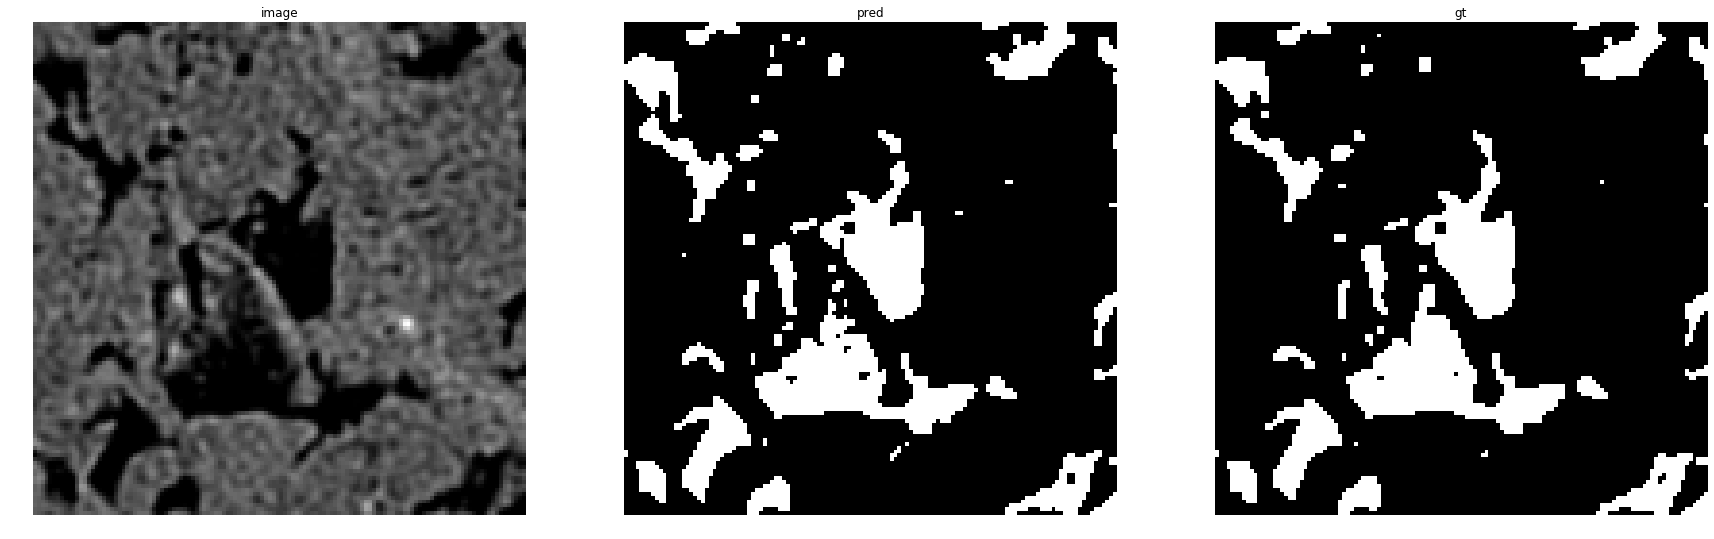

accuracy    : 0.98443603515625
precision   : 0.9487983281086729
recall      : 0.961864406779661
f1          : 0.9552866912151499
pr_auc      : 0.9923770160755622
iou         : 0.9144008056394763


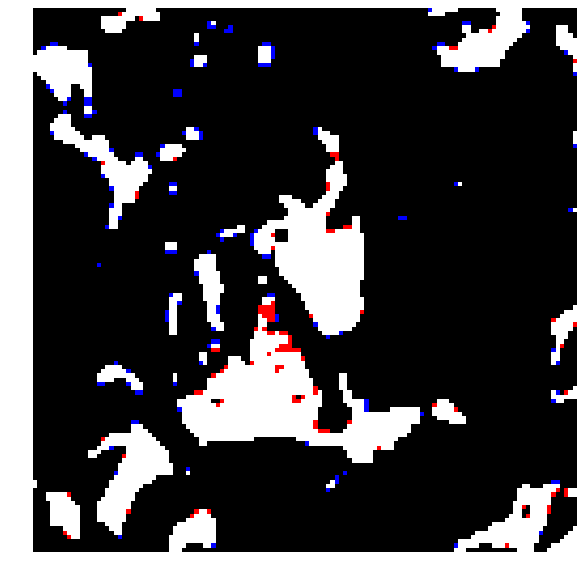

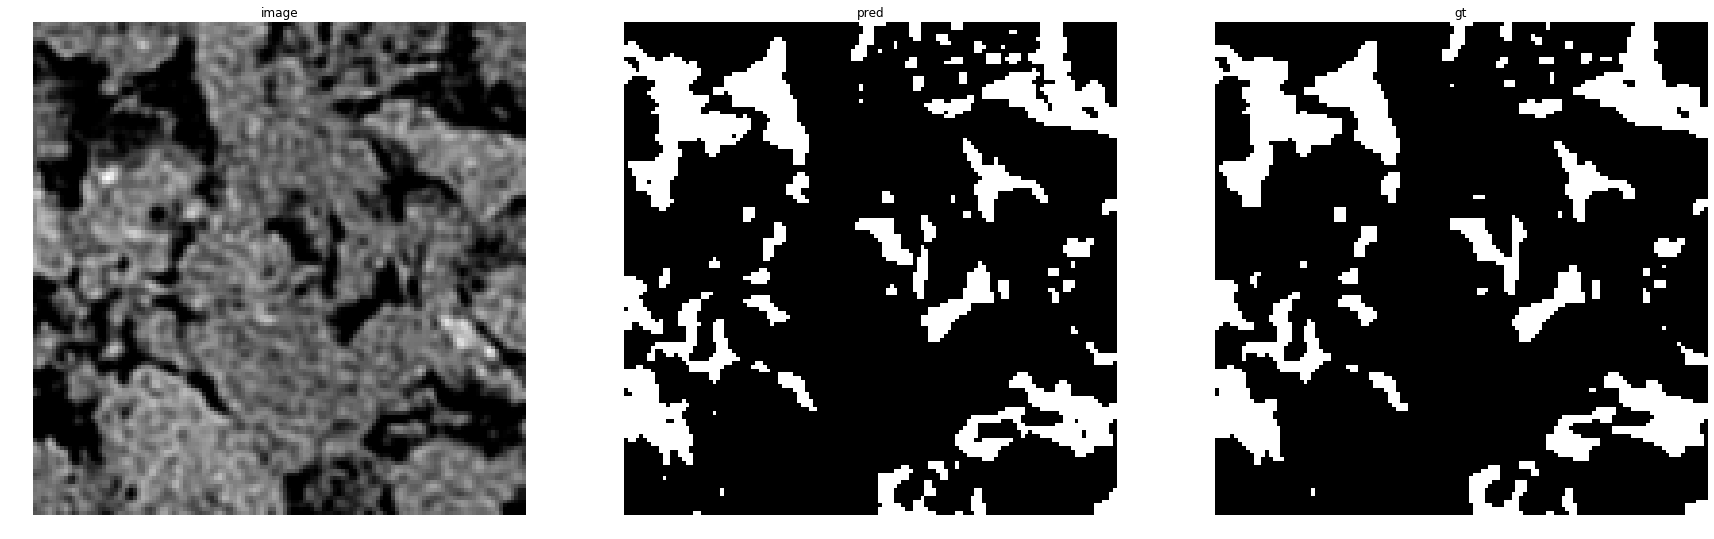

accuracy    : 0.9755859375
precision   : 0.9291955408255499
recall      : 0.9492151431209603
f1          : 0.9390986601705238
pr_auc      : 0.98812654408966
iou         : 0.8851894374282434


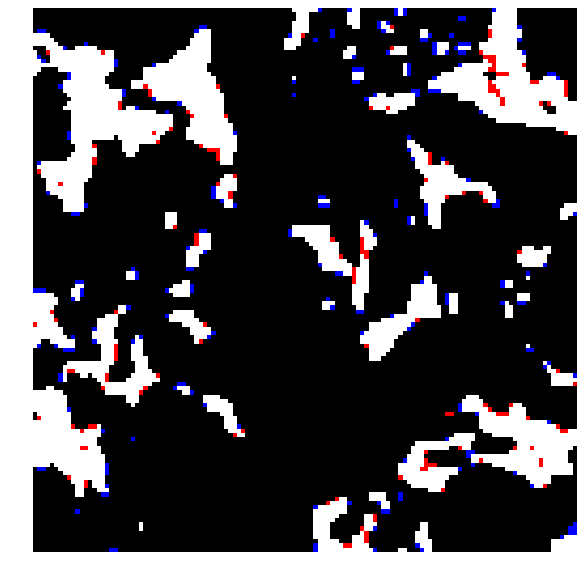

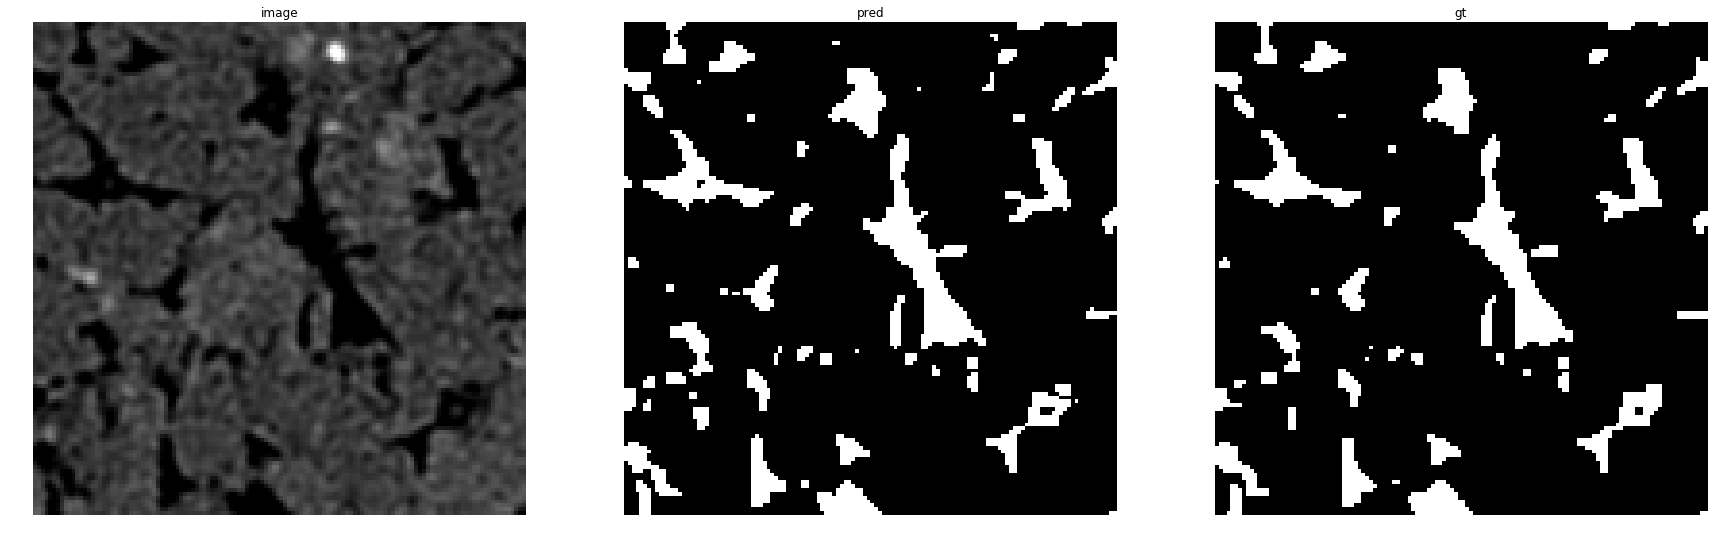

accuracy    : 0.98480224609375
precision   : 0.9095238095238095
recall      : 0.9700355510411376
f1          : 0.9388056033423444
pr_auc      : 0.9904268807345196
iou         : 0.8846688281611857


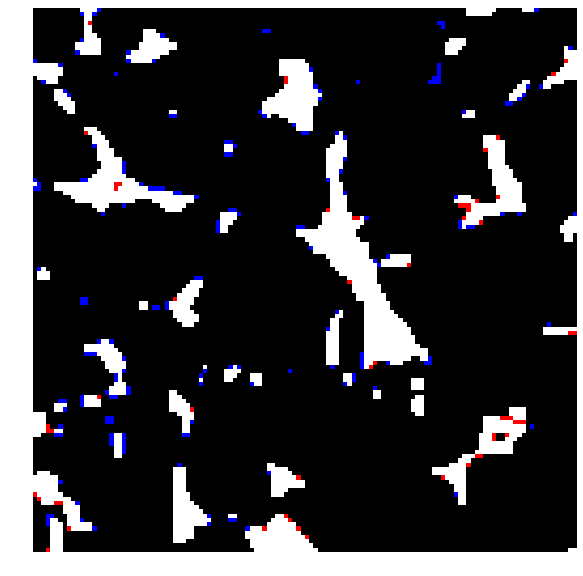

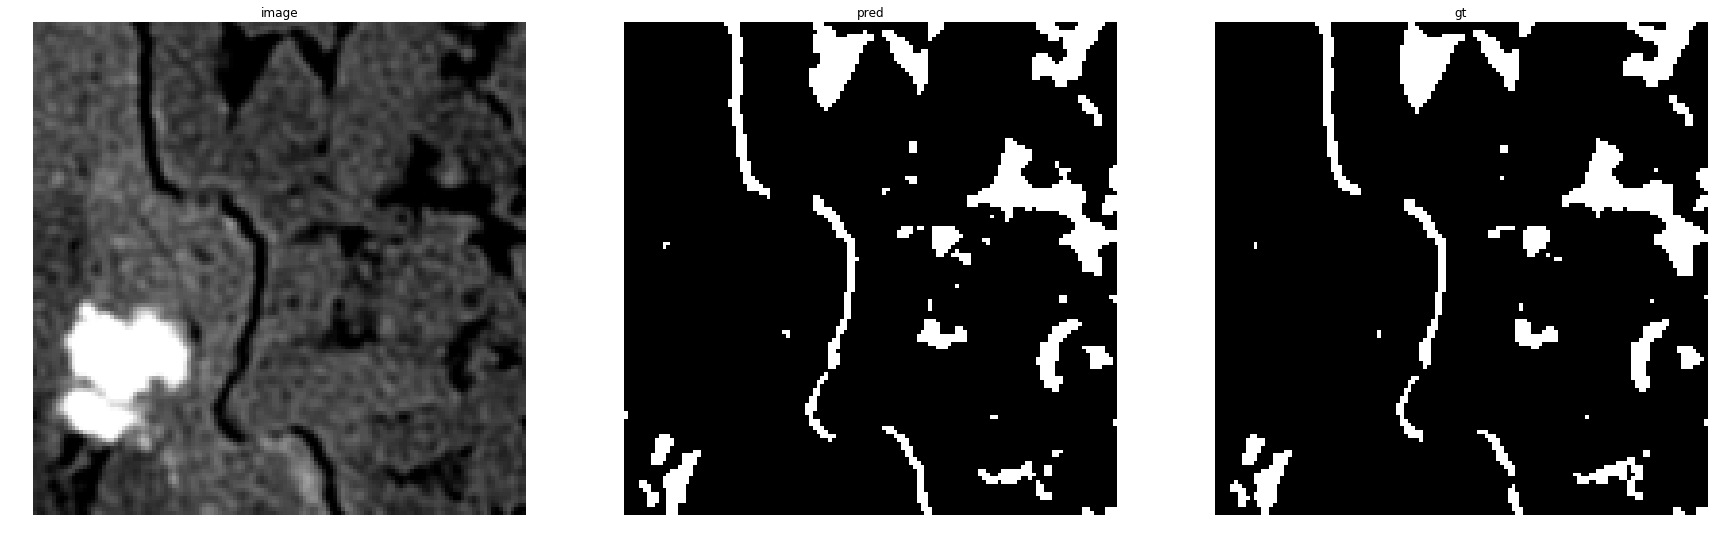

accuracy    : 0.986083984375
precision   : 0.9126984126984127
recall      : 0.9560570071258907
f1          : 0.933874709976798
pr_auc      : 0.9866040007874838
iou         : 0.8759521218715995


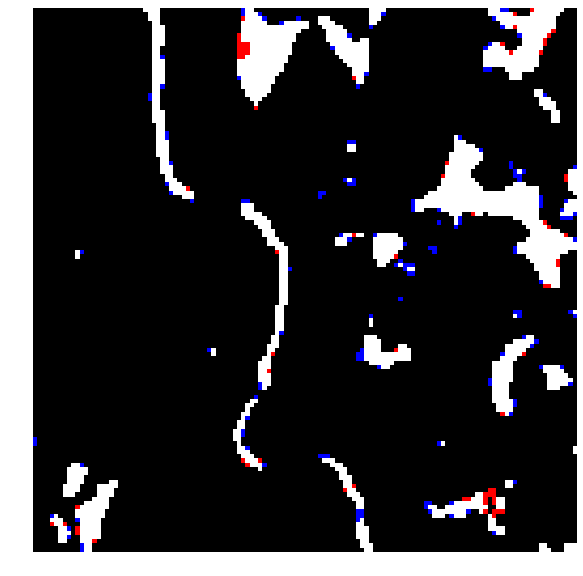

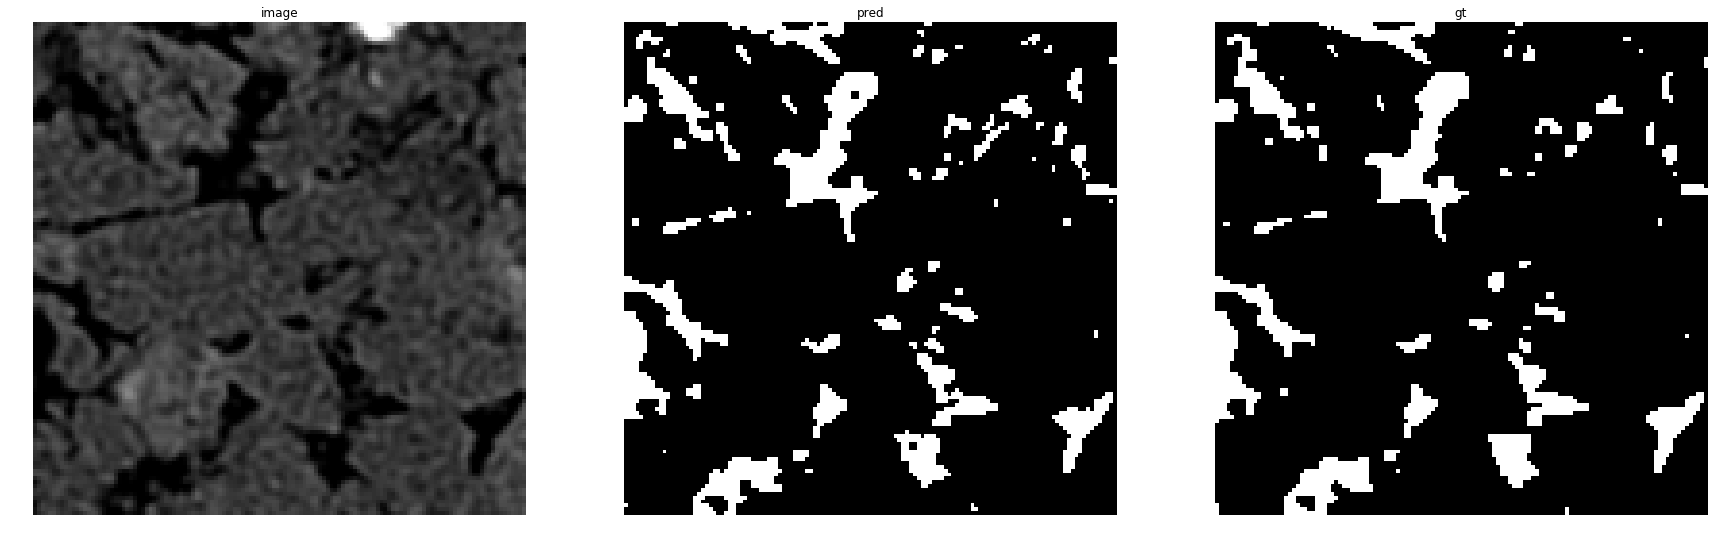

accuracy    : 0.97808837890625
precision   : 0.8863423760523854
recall      : 0.9423172550969667
f1          : 0.9134731260544711
pr_auc      : 0.9817558466813697
iou         : 0.8407275953859805


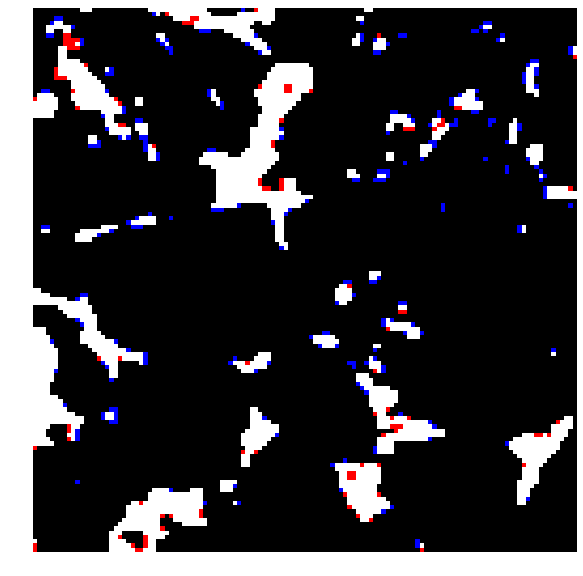

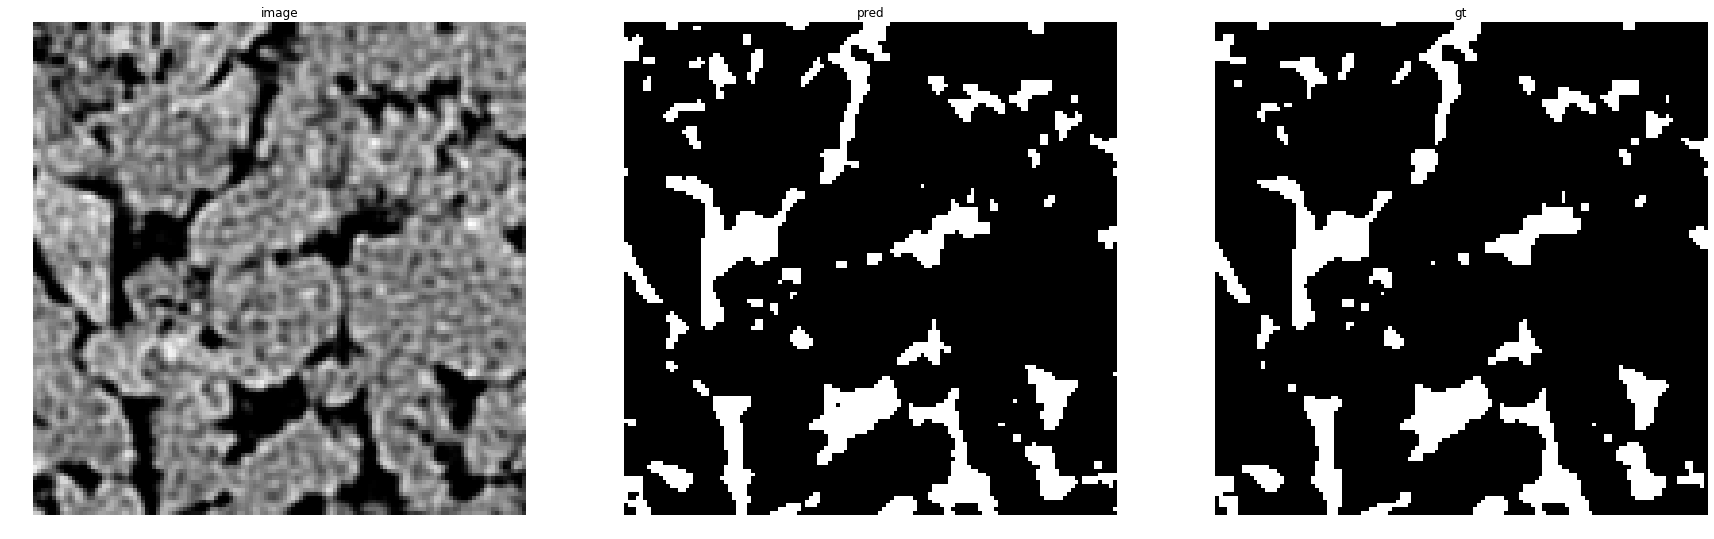

accuracy    : 0.97930908203125
precision   : 0.9043245311902028
recall      : 0.9637030995106036
f1          : 0.933070088845015
pr_auc      : 0.9882436627380643
iou         : 0.8745373797187269


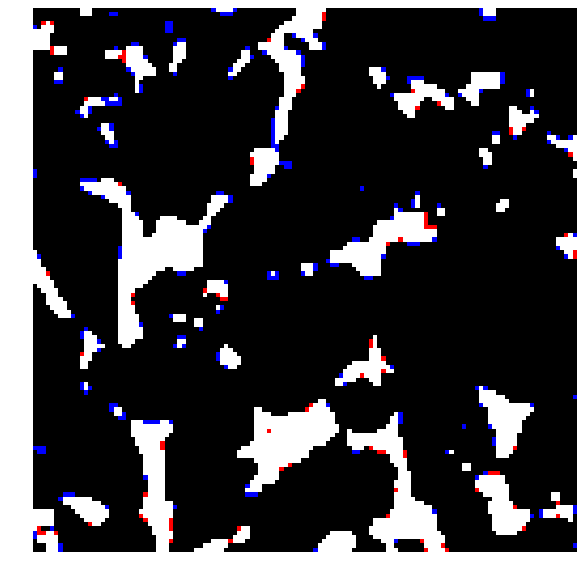

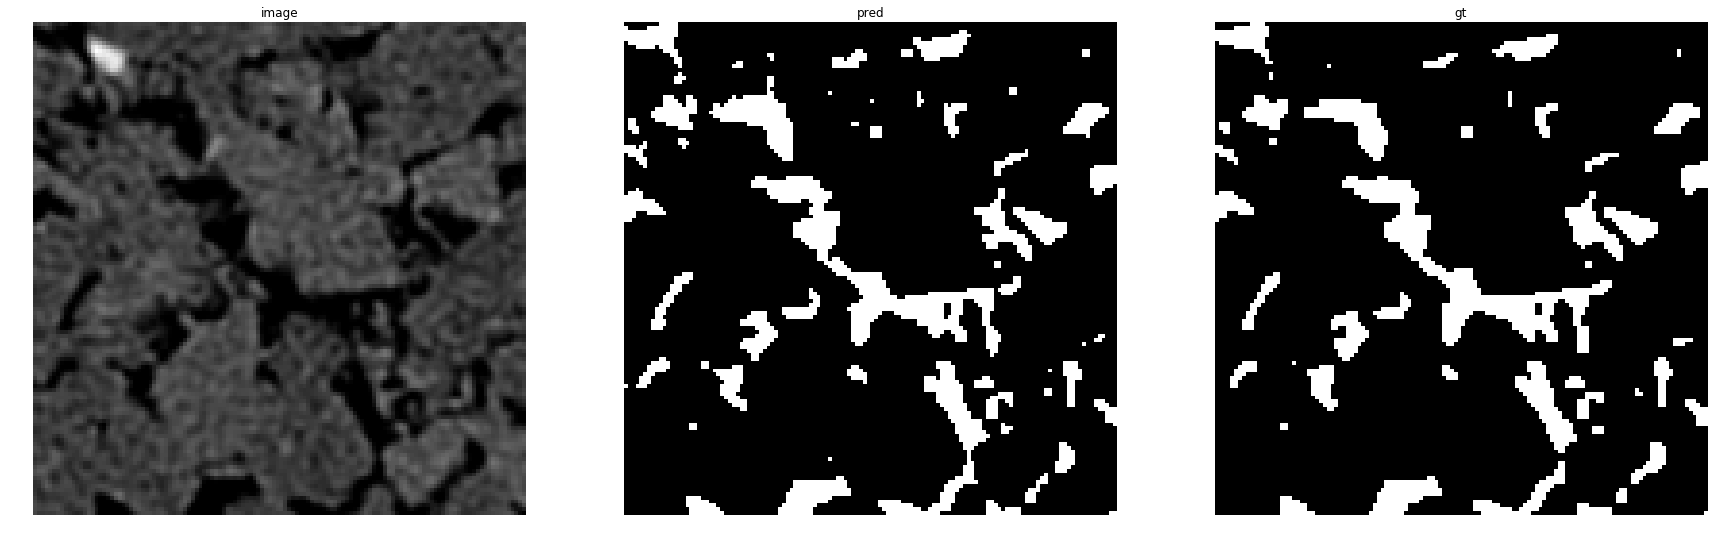

accuracy    : 0.97991943359375
precision   : 0.9130434782608695
recall      : 0.9461942257217848
f1          : 0.9293233082706767
pr_auc      : 0.986191051351004
iou         : 0.8679775280898876


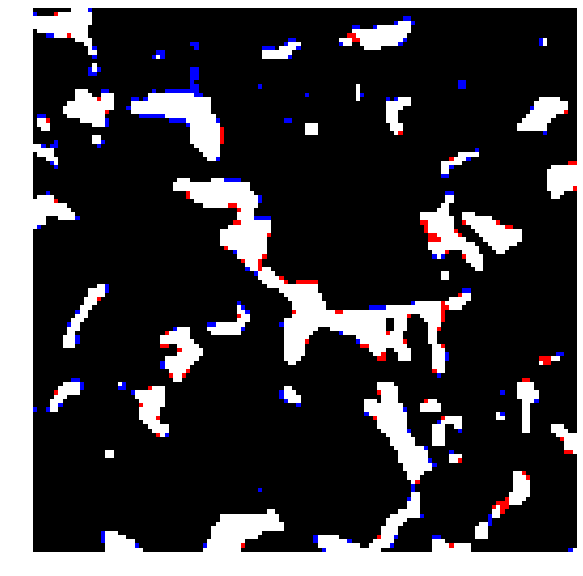

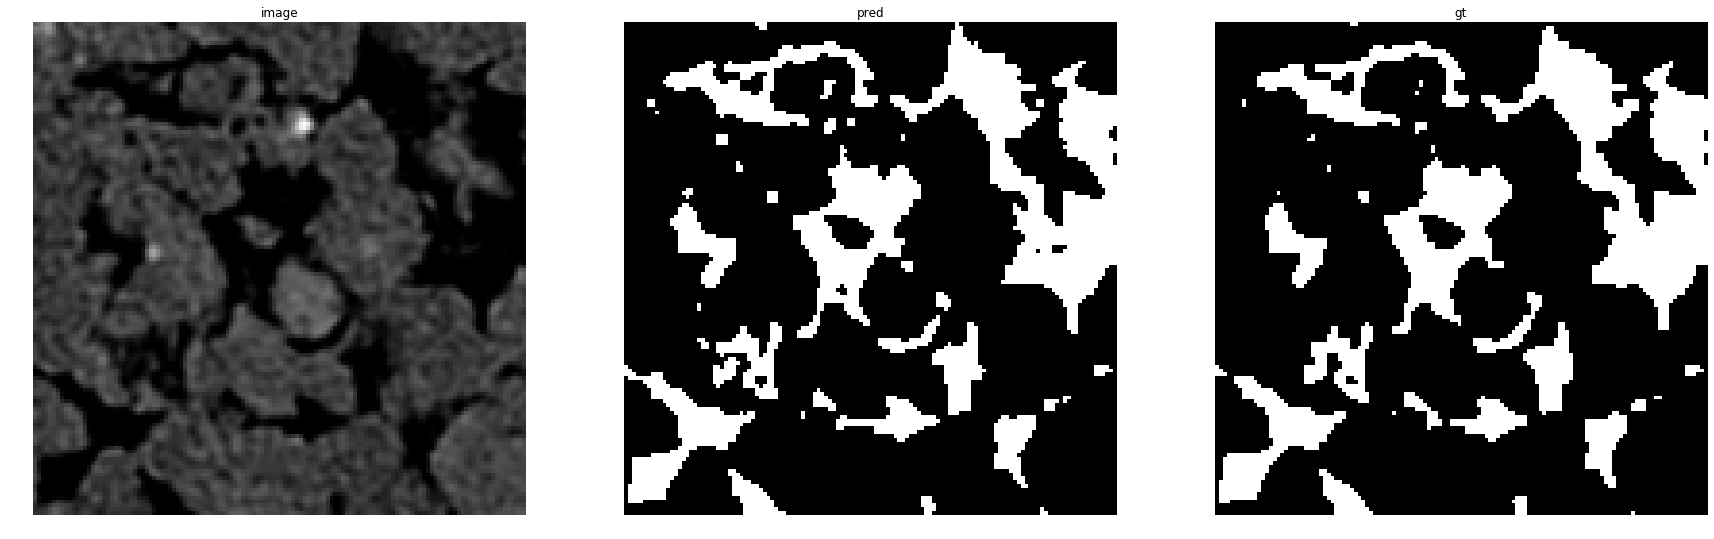

accuracy    : 0.9796142578125
precision   : 0.961433868974042
recall      : 0.9562330956478977
f1          : 0.9588264299802761
pr_auc      : 0.9940839679644113
iou         : 0.9209093061804404


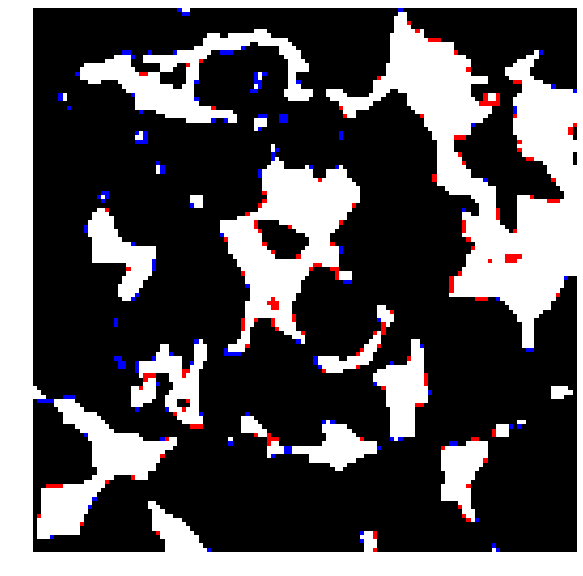

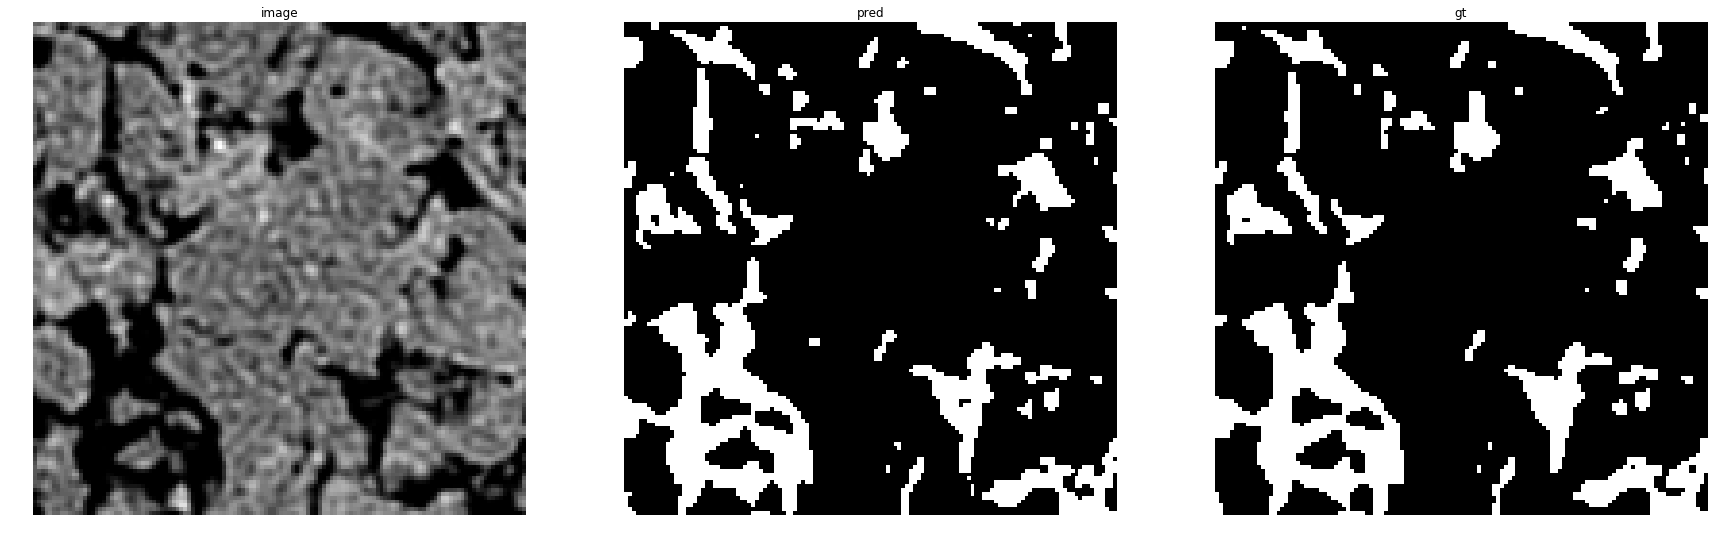

accuracy    : 0.97882080078125
precision   : 0.9384615384615385
recall      : 0.9519108280254777
f1          : 0.9451383399209486
pr_auc      : 0.9907416711637659
iou         : 0.8959832134292566


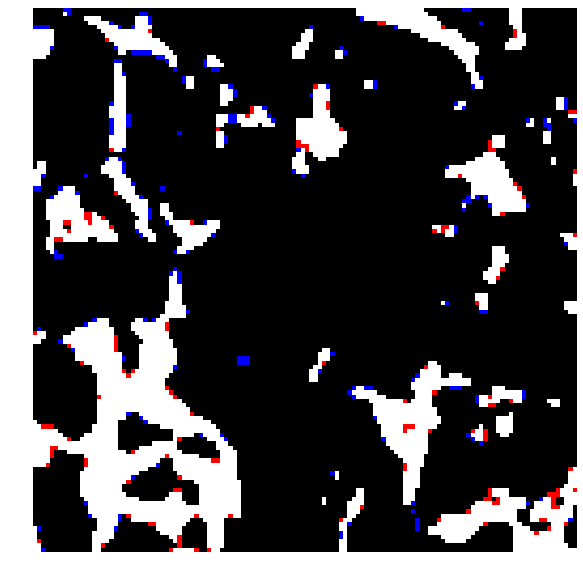

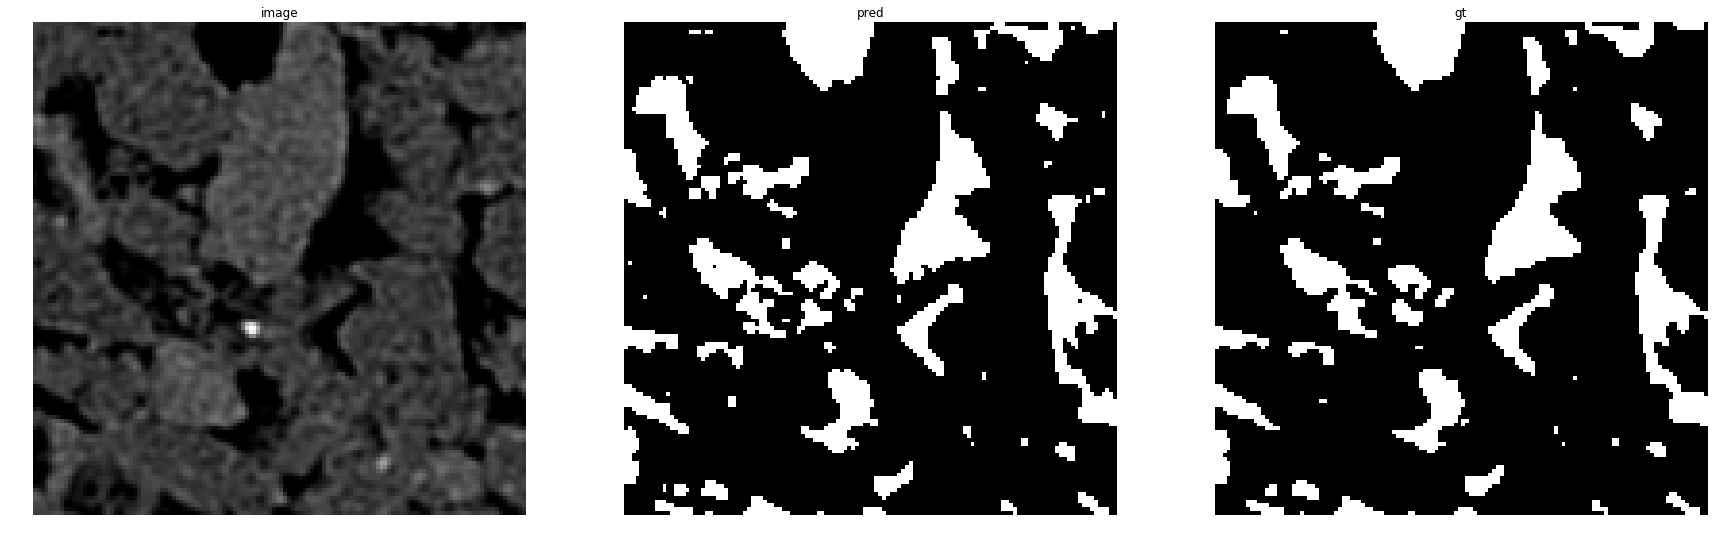

accuracy    : 0.97998046875
precision   : 0.9287548138639281
recall      : 0.9646666666666667
f1          : 0.9463701765860039
pr_auc      : 0.99154407084405
iou         : 0.8981998758535071


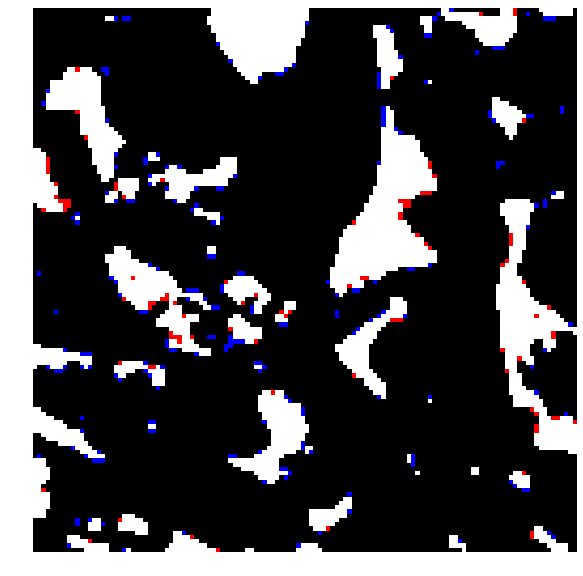

In [20]:
for stack_name, dataloader_test in dataloaders_test.items():
    cnt = to_plot
    
    stack_name = os.path.split(stack_name)[-1]
    dir_path = os.path.join(os.path.abspath('.'), 'samples', stack_name)
    if stack_name not in os.listdir(os.path.join('.', 'samples')):
        os.mkdir(dir_path)
    
    print('Prediction for {}:'.format(stack_name))
    for samples, masks in dataloader_test:

        preds = model(torch.from_numpy(samples).to(device)).cpu().data.numpy()

        for sample, mask, pred in list(zip(samples, masks, preds))[:cnt]:
            img_path = os.path.join('.', 'samples', stack_name, '{}.png'.format(cnt))
            plot_sample(sample[0], mask, pred, threshold, metrics, img_path)

            img_path = os.path.join('.', 'samples', stack_name, 'diff_{}.png'.format(cnt))
            make_colored_diff(mask, pred, threshold=threshold, path=img_path)
            
            cnt -= 1
            
        if cnt ==0:
            break
    print('\n')

## Make prediction for particular stack

In [29]:
stack_name = 'carbRNF'

In [30]:
stack = Stack.read_from_source('../../data/{}'.format(stack_name))

700it [00:00, 742.58it/s]
100%|██████████| 700/700 [00:06<00:00, 100.50it/s]


In [31]:
predicted_stack = stack.apply(
    model, 
    patch_sizes=(128, 128, 1), 
    bs=32, num_workers=8, device='cuda:0',
    threshold=None)

25200it [00:00, 238784.35it/s]
25200it [02:04, 202.42it/s]
100%|██████████| 25200/25200 [00:07<00:00, 3220.96it/s]


In [32]:
for k, v in metrics.items():
    print('{:12}: {:.6f}'.format(k, 
                                 v(np.where(predicted_stack.targets == 255, 0, 1).astype(np.uint8), 
                                    predicted_stack.preds, 
                                    mode='stack')))

accuracy    : 0.983521
precision   : 0.928582
recall      : 0.926553
f1          : 0.927566
pr_auc      : 0.983711
iou         : 0.864917
